# A4 Face Detection and Recognition 
Student Name: Fulin Huang 

Student ID: 260740689 

In [105]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
import os

## 1 Data Aquisition 

#### Test Image 

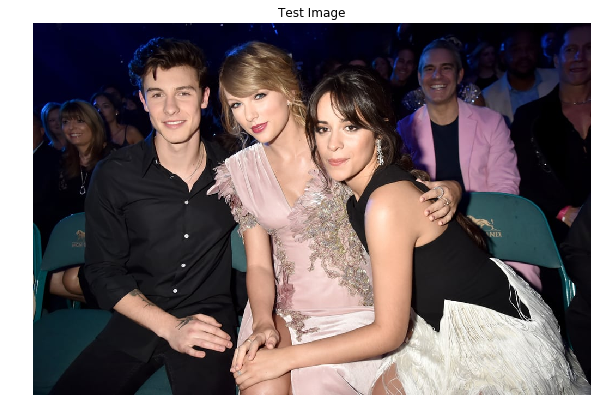

((-0.5, 1023.5, 681.5, -0.5), None)

In [106]:
# Image Reference:https://www.popsugar.com/celebrity/photo-gallery/44850420/image/44865671/Shawn-Mendes-Taylor-Swift-Camila-Cabello
test_image = cv2.imread('test.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(test_image),plt.title("Test Image")
plt.axis('off'), plt.show()

#### Training Images 

#### 1 Describe how you selected the images with respect to the conditions of the detection/recognition methods

I resized the training images to (128, 128) and convert the color to grayscale to make computation more efficient. The reason to make the images the same color and same dimension is for data consistency. It also helps making the computation eaiser in later steps. 

#### Show at least 5 example images for each individual

----- Training Images -----
There are three celebrities in training images:
    Taylor Swift
    Shane Mendes
    Camila Cabello
All training images are collected from Google Images


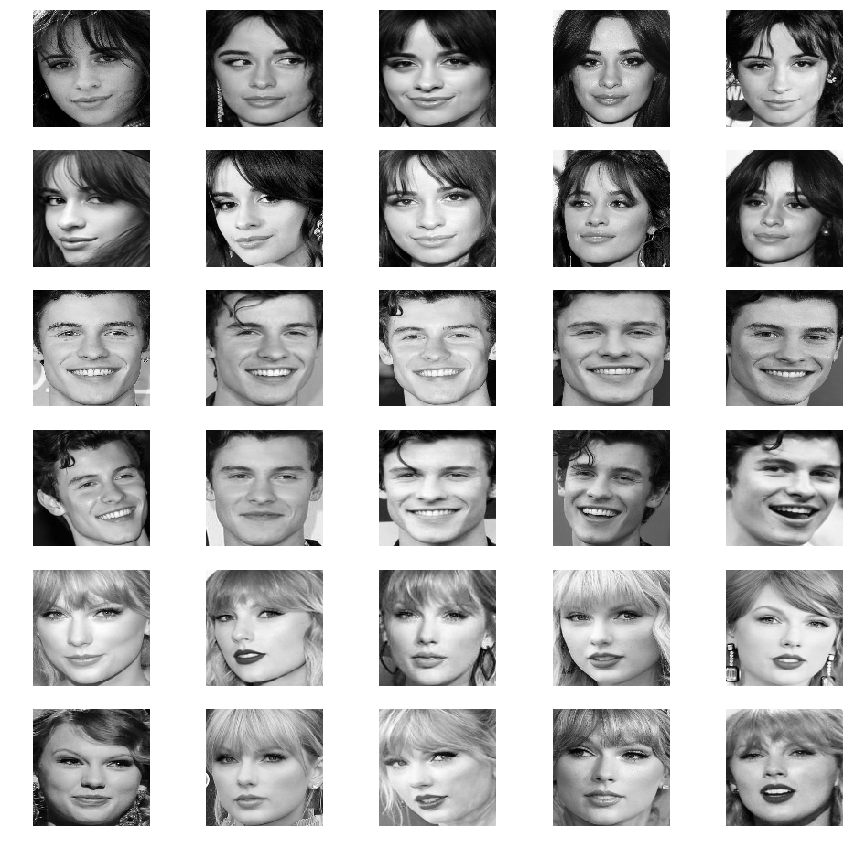

In [107]:
entry = os.listdir('Training_Image')

size = (128, 128)

# Append and Resize Image 
image_list = [] 

for file in sorted(entry): 
    image = cv2.imread('./Training_Image/' + file)
    image_1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_1 = cv2.resize(image_1, size)
    image_list.append(image_1)
    
plt.figure(figsize=(15,15))

# TODO: Proper refer- encing is required.

print("----- Training Images -----")
print("There are three celebrities in training images:")
print("    Taylor Swift")
print("    Shane Mendes")
print("    Camila Cabello")
print("All training images are collected from Google Images")
for i in range (0, len(image_list)): 
    plt.subplot(6, 5, i+1) 
    plt.axis('off')
    plt.imshow(image_list[i], cmap='gray')

## 2 Eigenface Representation

#### 1 Produce and eigenface representation for your training data through PCA

[0. 0. 0. ... 0. 0. 0.]
image vector is  [205 234 183 ...  14   6  10]
image vector is  [57 54 42 ... 38 48 44]
image vector is  [20 19 19 ... 76 57 52]
image vector is  [225 225 226 ...  18  16  14]
image vector is  [127 129 136 ...  16   7  12]
image vector is  [42 39 52 ... 40 40 42]
image vector is  [ 44  81  84 ... 144  16  19]
image vector is  [108  80  66 ...  58  58  65]
image vector is  [238 238 238 ...  23  21  43]
image vector is  [244 244 244 ...  17  19  21]
image vector is  [  9   8   6 ... 190 189 186]
image vector is  [ 25  26  25 ... 176 176 176]
image vector is  [28 25 35 ... 22 20 22]
image vector is  [25 39 21 ... 56 55 58]
image vector is  [16 17 22 ... 85 85 85]
image vector is  [ 31  33  32 ... 120 114  97]
image vector is  [ 15  15  16 ...  17 176 240]
image vector is  [29 33 24 ... 22 27 41]
image vector is  [70 79 85 ... 90 85 85]
image vector is  [ 32  37  46 ... 229 229 229]
image vector is  [140 139 139 ... 147 148 140]
image vector is  [222 219 219 ... 162

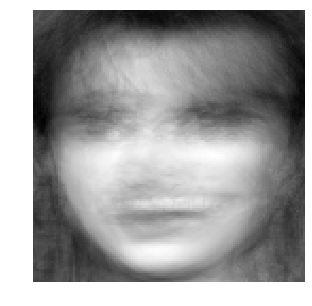

Image Matrix has shape:  (16384, 30)
cov matrix  (30, 30)
(16384,)
Eigen pair  [(14666.330365398419, array([ 266.63736268,  267.71255101,  257.94206803, ..., -150.47615617,
       -221.13104146, -231.44365889])), (7951.207408960886, array([101.91160597,  97.40943832, 114.02215157, ..., 178.18616202,
       183.19818246, 172.2284359 ])), (5468.199531242632, array([-169.11632726, -150.05690619, -149.23418875, ...,   84.71816064,
          4.41727806,    9.95374078])), (4281.321997188062, array([119.56037521, 126.07457778, 142.48909496, ...,  20.87442829,
        43.81419984,  73.94618118])), (3867.277077548777, array([ -50.55998658,  -58.87226173,  -60.96550035, ..., -133.78883924,
       -100.65138526,  -70.12001313])), (2709.777342257291, array([  2.98355771,  11.07640139,   4.48150709, ...,  18.6449179 ,
       -20.52683952, -36.13212398])), (2280.347219161217, array([  8.74476465,  25.08702812,  24.34137626, ...,  13.63026413,
       -55.48734884, -52.34430038])), (1.715724081654156e

    36.91190311  -45.89915637]]
11
chosen  [[ 266.63736268  101.91160597 -169.11632726 ...   41.98073655
   -23.88520984  -67.9893939 ]
 [ 267.71255101   97.40943832 -150.05690619 ...   50.13380662
    -9.64933182  -86.28885074]
 [ 257.94206803  114.02215157 -149.23418875 ...   53.70783496
    16.1341321   -80.32193038]
 ...
 [-150.47615617  178.18616202   84.71816064 ...   -6.55735886
    22.82332682   86.65538613]
 [-221.13104146  183.19818246    4.41727806 ...   34.62064135
   -31.36776093   79.80557506]
 [-231.44365889  172.2284359     9.95374078 ...   36.91190311
   -45.89915637   55.53596716]]
12
chosen  [[ 266.63736268  101.91160597 -169.11632726 ...  -23.88520984
   -67.9893939   -75.27887209]
 [ 267.71255101   97.40943832 -150.05690619 ...   -9.64933182
   -86.28885074  -69.54850839]
 [ 257.94206803  114.02215157 -149.23418875 ...   16.1341321
   -80.32193038  -72.04264279]
 ...
 [-150.47615617  178.18616202   84.71816064 ...   22.82332682
    86.65538613   18.95576502]
 [-221

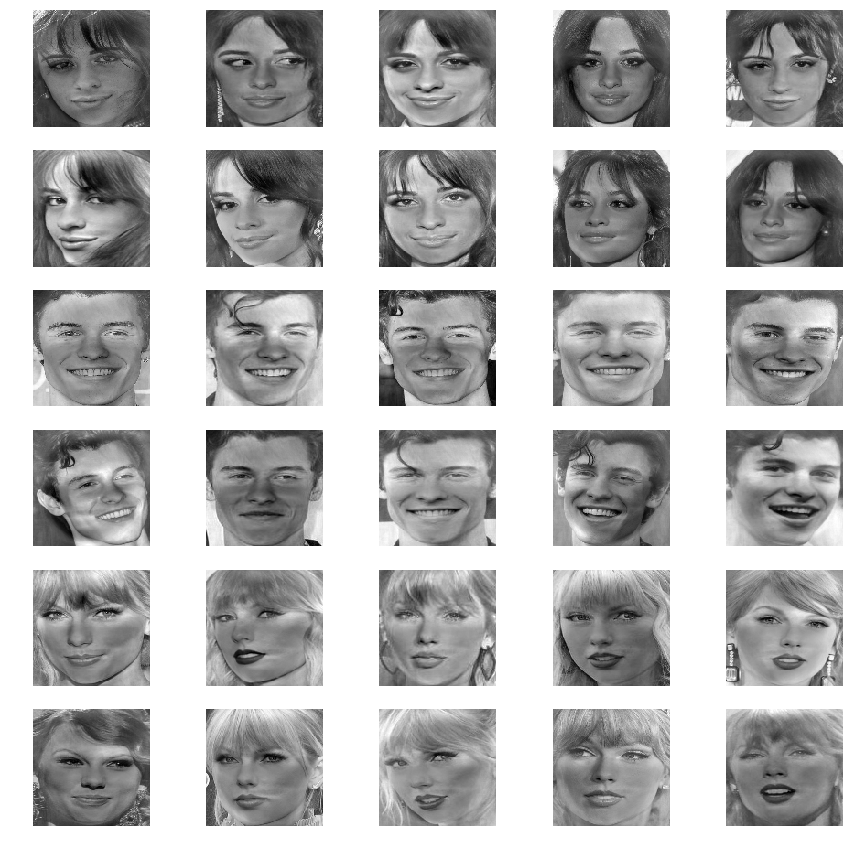

In [139]:
#Check this: https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/
# And this: https://towardsdatascience.com/eigenfaces-recovering-humans-from-ghosts-17606c328184
# SVD: https://medium.com/machine-learning-world/linear-algebra-svd-and-pca-5979f739e95a
# eigenface: chrome-extension://cbnaodkpfinfiipjblikofhlhlcickei/src/pdfviewer/web/viewer.html?file=http://www.vision.jhu.edu/teaching/vision08/Handouts/case_study_pca1.pdf
# http://laid.delanover.com/explanation-face-recognition-using-eigenfaces/

image_vector_list = [] 
image_sum = np.zeros(shape=(128,128)).ravel()
                    
print(image_sum)
for image in image_list: 
    # Obtain face images 
    # Represent image image as a vector 
    image_vector = image.reshape(128,128).ravel()
    print("image vector is ", image_vector)
    image_sum += image_vector 
    image_vector_list.append(image_vector)

# Compute average face vector 
average_face = (image_sum/len(image_list)).ravel()
print("Average face is ", average_face)
average_face_image = average_face.reshape(128,128)
plt.figure(figsize=(5,5))
plt.imshow(average_face_image, cmap='gray'), plt.axis('off'), plt.show()

# Normalize the training set 
new_image_vector_list = []
for image_vector in image_vector_list: 
    image_vector = np.subtract(image_vector, average_face).ravel()
    new_image_vector_list.append(image_vector)

# Display average faces 
plt.figure(figsize=(15,15))
for i in range (0, len(new_image_vector_list)): 
    plt.subplot(6, 5, i+1) 
    plt.axis('off')
    plt.imshow(new_image_vector_list[i].reshape(128, 128), cmap='gray')    


# Calculate Covariance C = AA^T (less computationaly expensive)
# Step 1) Concatenate vectors into a matrix 
image_matrix = new_image_vector_list[0]
for i in range(1, len(new_image_vector_list)): 
    b = new_image_vector_list[i]
    image_matrix = np.column_stack((image_matrix, b))    

print("Image Matrix has shape: ", image_matrix.shape)

# Step 2) Calculate Covariance 
cov_matrix = np.cov(image_matrix.T)
print("cov matrix ", cov_matrix.shape)

# Compute the eigenvector and eigenvalue 
eigenvalue, eigenvector = np.linalg.eig(cov_matrix) 

new_eigenvector = [] 
for i in range(len(eigenvalue)):
    # We previously calculate eigenvectors for A^T*A
    # Eigenvectors for A*A^T are Ui = A*Vi 
    new_eigenvector.append(np.dot(image_matrix, eigenvector[:, i]))

print(new_eigenvector[0].shape)
# Sort eigenvector and eigenvalue 

# Make eigen-pair 
eigen_pair = [(np.abs(eigenvalue[i]), new_eigenvector[i]) for i in range(len(eigenvalue))]
print("Eigen pair ", eigen_pair)



# Sort eigen-pair in descending form 
eigen_pair.sort(key=lambda x:x[0], reverse=True)
for i in range(len(eigen_pair)):
    print("eigenpair", eigen_pair[i][0], eigen_pair[i][1])

num_pair = len(eigen_pair)

# Variance captured by eah component 
tot = sum(eigenvalue)
var_exp = [(i/tot)*100 for i in sorted(eigenvalue, reverse=True)]
print("var exp ", var_exp)

# Total (Cumulative) sum 
cum_sum = np.cumsum(var_exp)
cum_sum_reverse = np.flipud(cum_sum)
print(cum_sum)

k = 17  # Eigenvector Number used for calculation 
# Create a matrix correspond to the eigenvectors 
chosen_eigen_pair = eigen_pair[0][1].reshape(128*128,1)
for i in range(1, k): 
    print(i)
    b = eigen_pair[i][1].reshape(128*128,1)
    print("chosen ", chosen_eigen_pair)
    chosen_eigen_pair = np.hstack((chosen_eigen_pair, b))

new_matrix = chosen_eigen_pair
print(new_matrix.shape)


# print("Image matrix shape", image_matrix.shape)
# print("new matrix shape", new_matrix.shape)
# eigenface = image_matrix.T.dot(new_matrix)

# print(eigenface.shape)


# From Eigenface Wiki 
# https://en.wikipedia.org/wiki/Eigenface
# 1) Each image is treated as one vector (r*c)

# 2) Store all images of training set in a single matrix T,
#    where each column of the matrix is an image 

# 3) Subtract the mean. The average image a has to be calculated and
#    then subtracted from each original image in T
    
# 4) Calculate the eigenvectors and eigenvalues of the covariance
#    matrix S

# 5)Choose the principal components 

# 6) K is the smallest number that satisfies ... 


# https://www.youtube.com/watch?v=uFbDWu0tDrE
# Also check this: https://plot.ly/python/v3/ipython-notebooks/principal-component-analysis/# Standardize the data 

# Standardize the data 
# -> x_std

# To find out covariance, use: 
# np.cov()

# To find out eigenvalue, vector, use: 
# eig_vals, eig_vecs = np.linalg.eig(a covaraince matrix) 


# To sort eigenvalue and eigenvector 

    # Make a list of (eigvalue, eigvector) tuple
    # eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
    
    # Sort the (eigvalue, eigvector) tuples from high to low 
#      eig_pairs.sort(key=lambda x:x[0], reverse=True)
    
# Variance captured by eah component 
# tot = sum(eig_vals)
# var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]

# Cumulative variance captured as we travel each component 
#cum_var_exp = np.cumsum(var_exp)

# Depend on the cumulative variance, we can see k components contribute to the data most 

# Create a matrix W that corresond to the eigenvectors of the top most eigenvalues 
# matrix_w = np.hstack((eig_pairs[x][x].reshape(4,1),
#                       eig_pairs[x][x].reshape(4,1)))

# Whatever data I have, I projected onto those eigenvectors 
# y = x_std.dot(matrix_w)
 

#### 2 Plot the variance against the eigenvector number in descending order (i.e. total variance vs. number of principal components)

Cumulative sum:  [100.         100.          99.3303625   98.56524278  97.79128838
  96.94395579  96.03832147  95.10526836  94.02611536  92.88541836
  91.66438046  90.41005669  89.036251    87.41185461  85.76869778
  83.99948814  82.17407286  80.25079702  78.21297514  76.10664593
  73.71463852  71.1527388   68.26883854  65.35908062  61.74371746
  57.44751681  51.31616497  44.52836804  35.85884305  23.25264775]
Number of Eigenvector  30


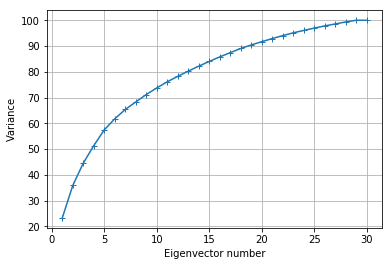

In [140]:
print("Cumulative sum: ", cum_sum_reverse)
print("Number of Eigenvector ", num_pair)

# Plot Diagram     
plt.xlabel("Eigenvector number")
plt.ylabel("Variance")
x = (np.arange(num_pair, 0, -1))
plt.plot(x, cum_sum_reverse, marker='+')
plt.grid(True)
plt.show() 

#### 3  Plot the total variance against the eigenvector number used for computation

Total Variance in reverse order  [100.         100.          99.3303625   98.56524278  97.79128838
  96.94395579  96.03832147  95.10526836  94.02611536  92.88541836
  91.66438046  90.41005669  89.036251    87.41185461  85.76869778
  83.99948814  82.17407286  80.25079702  78.21297514  76.10664593
  73.71463852  71.1527388   68.26883854  65.35908062  61.74371746
  57.44751681  51.31616497  44.52836804  35.85884305  23.25264775]


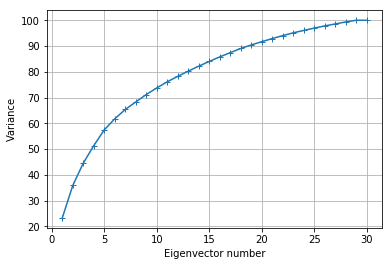

In [141]:
y = cum_sum[:k]
y = np.flipud(y)
print("Total Variance in reverse order ", y)

# Plot Diagram     
plt.xlabel("Eigenvector number")
plt.ylabel("Variance")
x = (np.arange(k, 0, -1))
plt.plot(x, y, marker='+')
plt.grid(True)
plt.show() 
          

#### 4 Do you need all the vectors to represent the data? Discuss

In [142]:
# TODO 

#### 5 Display the first 5 eigenfaces

(16384, 30)


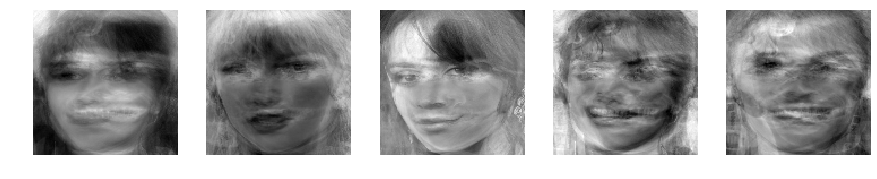

In [143]:
print(new_matrix.shape)

num_eigenface = 5

plt.figure(figsize=(15,15))
for i in range (0, num_eigenface): 
    plt.subplot(1, 5, i+1) 
    plt.axis('off')
    plt.imshow(new_matrix[:,i].reshape(128,128), cmap='gray')    


## 3 Neighbourhood Clustering

#### 1 For every training image, find the nearest neighbour (L2 distance), and check whether both images belong to the same person. 

In [144]:
from sklearn.neighbors import KNeighborsClassifier 
    
# https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
# https://medium.com/beesightsoft/build-your-own-face-recognition-using-face-recognition-library-and-k-nearest-neighbors-classifier-611ffc973d4b

# Prepare Feature and Label 
feature = image_matrix 
label = []
label[:10] = ['Camila Cabello' for x in range(10)]
label[10:20] = ['Shane Mendes' for x in range(10, 20)]
label[20:30] = ['Taylor Swift' for x in range(20, 30)]

print("Label: ", label)
print(feature.T.shape)
# Apply KNN Neighbor 
near_neighbor = KNeighborsClassifier(n_neighbors = 2, metric = 'l2')
near_neighbor.fit(feature.T, label)

# Make Prediction 
predict = near_neighbor.predict(feature.T)
print("Prediction: ", predict)

Label:  ['Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift']
(30, 16384)
Prediction:  ['Camila Cabello' 'Camila Cabello' 'Camila Cabello' 'Camila Cabello'
 'Camila Cabello' 'Camila Cabello' 'Camila Cabello' 'Camila Cabello'
 'Camila Cabello' 'Camila Cabello' 'Shane Mendes' 'Shane Mendes'
 'Shane Mendes' 'Shane Mendes' 'Shane Mendes' 'Camila Cabello'
 'Shane Mendes' 'Shane Mendes' 'Shane Mendes' 'Shane Mendes'
 'Taylor Swift' 'Taylor Swift' 'Taylor Swift' 'Taylor Swift'
 'Taylor Swift' 'Camila Cabello' 'Taylor Swift' 'Taylor Swift'
 'Taylor Swift'

#### 2 What fraction of your data has a neighbour that is of the same person?

In [145]:
# Calculate Fraction of Correct Data 
count = 0
for i in range(len(predict)):
    if predict[i] == label[i]:
        count+=1

fraction = count/len(predict)
print("{} of the data are correct".format(fraction))

0.9333333333333333 of the data are correct


#### 3 Do this both in the original high dimensional pixel space and then in the eigenspace, and compare the accuracy values. 

In [146]:
# Prepare Feature and Label 
feature_eigen = new_matrix.T
label_eigen = label 
print(label_eigen)

print(feature_eigen.shape)

print(image_matrix.shape)

term = [] 
reconstruct_value = 0
for i in range(len(image_matrix[1])): 
    for j in range(len(feature_eigen.shape)-1):
        value = np.dot(image_matrix[:,i], feature_eigen[j,:])
        reconstruct_value += value*feature_eigen[j,:]
    term.append(reconstruct_value)

print(len(term))

eigenspace = term[0]
for i in range(1, len(term)): 
    b = term[i]
    eigenspace = np.column_stack((eigenspace, b)) 
print("eigenspace ", eigenspace.shape)
print("eigenspace ", eigenspace)
    

# Apply KNN Neighbor 
near_neighbor_eigen = KNeighborsClassifier(n_neighbors = 2, metric = 'l2')
near_neighbor_eigen.fit(eigenspace.T, label_eigen)

# Make Prediction 
predict_eigen = near_neighbor_eigen.predict(eigenspace.T)
print("Prediction: ", predict_eigen, "\n")

# Calculate Fraction of Correct Data 
count_eigen = 0
for i in range(len(predict_eigen)):
    if predict_eigen[i] == label_eigen[i]:
        count_eigen+=1

fraction_eigen = count_eigen/len(predict_eigen)
print("{} of the data are correct".format(fraction_eigen), "\n")

print(" ------------- Comparison ------------")
print("Accuracy in high dim pixel space: ", fraction)
print("Accuracy in eigenspace:           ", fraction_eigen)

['Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift']
(30, 16384)
(16384, 30)
30
eigenspace  (16384, 30)
eigenspace  [[ 7.43865967e-05  7.43865967e-05  7.43865967e-05 ...  7.43865967e-05
   7.43865967e-05  7.43865967e-05]
 [ 3.43322754e-05  3.43322754e-05  3.43322754e-05 ...  3.43322754e-05
   3.43322754e-05  3.43322754e-05]
 [ 1.33514404e-05  1.33514404e-05  1.33514404e-05 ...  1.33514404e-05
   1.33514404e-05  1.33514404e-05]
 ...
 [-4.38690186e-05 -4.38690186e-05 -4.38690186e-05 ... -4.38690186e-05
  -4.38690186e-05 -4.38690186e-05]
 [-1.335144

#### 4 Would you expect there to be a significant difference?

In [116]:
# TODO 

## 4 Face Detection & Recognition

#### 1 Display your image with bounding boxes around detected faces for your best threshold

(16384, 7)
(128, 128)
reconstruct  [ 2.70173915e+10  3.02704447e+10  2.47194729e+10 ... -4.83949658e+10
 -5.87024073e+10 -5.98560565e+10]
reconstruct  [ 2.69932669e+10  3.02468494e+10  2.46981108e+10 ... -4.83642710e+10
 -5.86609812e+10 -5.98135073e+10]
reconstruct  [ 2.69525516e+10  3.02055067e+10  2.46605657e+10 ... -4.83181732e+10
 -5.85967612e+10 -5.97477342e+10]
reconstruct  [ 2.69048882e+10  3.01568477e+10  2.46157175e+10 ... -4.82616376e+10
 -5.85218764e+10 -5.96736273e+10]
reconstruct  [ 2.68753687e+10  3.01261292e+10  2.45867006e+10 ... -4.82287157e+10
 -5.84752153e+10 -5.96288640e+10]
reconstruct  [ 2.68635789e+10  3.01125889e+10  2.45716568e+10 ... -4.82356021e+10
 -5.84722464e+10 -5.96277689e+10]
reconstruct  [ 2.68609326e+10  3.01086842e+10  2.45648510e+10 ... -4.82644104e+10
 -5.84926585e+10 -5.96480553e+10]
reconstruct  [ 2.68578012e+10  3.01013637e+10  2.45589279e+10 ... -4.82733669e+10
 -5.84758805e+10 -5.96266942e+10]
reconstruct  [ 2.68743207e+10  3.01129026e+10  2.4

reconstruct  [ 2.07509635e+10  2.36227980e+10  1.92144316e+10 ... -4.02783732e+10
 -4.76048601e+10 -4.77418031e+10]
reconstruct  [ 2.12670425e+10  2.41628914e+10  1.96659395e+10 ... -4.09232535e+10
 -4.83050814e+10 -4.85100127e+10]
reconstruct  [ 2.14775982e+10  2.44276483e+10  1.98099359e+10 ... -4.17124399e+10
 -4.92732144e+10 -4.95466615e+10]
reconstruct  [ 2.19249013e+10  2.49356761e+10  2.01831759e+10 ... -4.26214098e+10
 -5.05050059e+10 -5.08793969e+10]
reconstruct  [ 2.28280593e+10  2.58819930e+10  2.10151116e+10 ... -4.34718443e+10
 -5.16835139e+10 -5.21731016e+10]
reconstruct  [ 2.35354846e+10  2.66467507e+10  2.16533778e+10 ... -4.42289516e+10
 -5.28502326e+10 -5.34791493e+10]
reconstruct  [ 2.39905104e+10  2.71507285e+10  2.20676350e+10 ... -4.46996456e+10
 -5.36421659e+10 -5.43806509e+10]
reconstruct  [ 2.42784318e+10  2.74657765e+10  2.23148006e+10 ... -4.50823356e+10
 -5.42469467e+10 -5.50712504e+10]
reconstruct  [ 2.45509463e+10  2.77712769e+10  2.25170635e+10 ... -4.568

reconstruct  [ 2.02910631e+10  2.31589457e+10  1.84046942e+10 ... -4.12662151e+10
 -4.93120771e+10 -5.00382506e+10]
reconstruct  [ 2.07550365e+10  2.35859053e+10  1.88829373e+10 ... -4.10573498e+10
 -4.90108408e+10 -4.97219410e+10]
reconstruct  [ 2.17566234e+10  2.45624216e+10  1.98820885e+10 ... -4.11425159e+10
 -4.91306217e+10 -4.98683949e+10]
reconstruct  [ 2.22444276e+10  2.50526904e+10  2.03353895e+10 ... -4.15530722e+10
 -4.96452738e+10 -5.04190294e+10]
reconstruct  [ 2.22946804e+10  2.51198334e+10  2.03584546e+10 ... -4.18671923e+10
 -5.01104816e+10 -5.09171943e+10]
reconstruct  [ 2.21213458e+10  2.49622201e+10  2.01778411e+10 ... -4.19111682e+10
 -5.03009467e+10 -5.11381392e+10]
reconstruct  [ 2.13748542e+10  2.42102226e+10  1.94373586e+10 ... -4.16150120e+10
 -4.99634110e+10 -5.07921614e+10]
reconstruct  [ 2.05129617e+10  2.33495495e+10  1.85996764e+10 ... -4.12784800e+10
 -4.95455009e+10 -5.03219519e+10]
reconstruct  [ 1.99351971e+10  2.27834565e+10  1.80629737e+10 ... -4.091

reconstruct  [ 1.72953862e+10  2.00062144e+10  1.61200647e+10 ... -3.62229882e+10
 -4.29630079e+10 -4.27184821e+10]
reconstruct  [ 1.77830562e+10  2.05481588e+10  1.65870279e+10 ... -3.67054509e+10
 -4.35711469e+10 -4.33818867e+10]
reconstruct  [ 1.81927868e+10  2.09752021e+10  1.69471024e+10 ... -3.71289151e+10
 -4.39859090e+10 -4.38644662e+10]
reconstruct  [ 1.85693625e+10  2.13732528e+10  1.72661821e+10 ... -3.76417071e+10
 -4.45271450e+10 -4.44766114e+10]
reconstruct  [ 1.91171730e+10  2.19359106e+10  1.77295796e+10 ... -3.84286479e+10
 -4.53421319e+10 -4.53586537e+10]
reconstruct  [ 1.97459359e+10  2.25973901e+10  1.82793683e+10 ... -3.92802866e+10
 -4.63070461e+10 -4.63994506e+10]
reconstruct  [ 2.03628958e+10  2.32708179e+10  1.88191749e+10 ... -4.02684359e+10
 -4.75431450e+10 -4.77215424e+10]
reconstruct  [ 2.11458834e+10  2.41051279e+10  1.95099472e+10 ... -4.13743184e+10
 -4.89613674e+10 -4.92481340e+10]
reconstruct  [ 2.23152260e+10  2.53107390e+10  2.05859525e+10 ... -4.243

reconstruct  [ 2.23798725e+10  2.51454095e+10  2.05084937e+10 ... -4.06933748e+10
 -4.89615795e+10 -4.97632246e+10]
reconstruct  [ 2.24631388e+10  2.52435376e+10  2.05895529e+10 ... -4.07784633e+10
 -4.91000953e+10 -4.99179629e+10]
reconstruct  [ 2.23878883e+10  2.51852880e+10  2.05254821e+10 ... -4.07374392e+10
 -4.90882219e+10 -4.99073118e+10]
reconstruct  [ 2.25742774e+10  2.53915119e+10  2.06929443e+10 ... -4.08966668e+10
 -4.93143559e+10 -5.01808339e+10]
reconstruct  [ 2.32117679e+10  2.60494900e+10  2.12569990e+10 ... -4.15556321e+10
 -5.01467933e+10 -5.11114653e+10]
reconstruct  [ 2.38097851e+10  2.66755637e+10  2.18006184e+10 ... -4.21165764e+10
 -5.09535287e+10 -5.20151151e+10]
reconstruct  [ 2.38081870e+10  2.66869812e+10  2.18195575e+10 ... -4.19921769e+10
 -5.09089825e+10 -5.19771907e+10]
reconstruct  [ 2.36934606e+10  2.65752743e+10  2.17175762e+10 ... -4.19130053e+10
 -5.08034465e+10 -5.18560198e+10]
reconstruct  [ 2.69427355e+10  3.02089478e+10  2.46511970e+10 ... -4.840

reconstruct  [ 2.48625430e+10  2.80047716e+10  2.27461248e+10 ... -4.64194719e+10
 -5.57688454e+10 -5.66300136e+10]
reconstruct  [ 2.50987628e+10  2.82610897e+10  2.29569276e+10 ... -4.69119812e+10
 -5.63419959e+10 -5.71956337e+10]
reconstruct  [ 2.53723459e+10  2.85539160e+10  2.32168330e+10 ... -4.72136815e+10
 -5.67646583e+10 -5.76328540e+10]
reconstruct  [ 2.54927646e+10  2.86987401e+10  2.33427777e+10 ... -4.73248468e+10
 -5.70232160e+10 -5.79064126e+10]
reconstruct  [ 2.56009408e+10  2.88230536e+10  2.34366536e+10 ... -4.74284220e+10
 -5.72772780e+10 -5.82092716e+10]
reconstruct  [ 2.59467513e+10  2.91697844e+10  2.37413354e+10 ... -4.76757853e+10
 -5.76775529e+10 -5.86824468e+10]
reconstruct  [ 2.57601359e+10  2.89662147e+10  2.35229254e+10 ... -4.76682605e+10
 -5.76237029e+10 -5.86568382e+10]
reconstruct  [ 2.54808856e+10  2.86766408e+10  2.32267317e+10 ... -4.76120001e+10
 -5.75307748e+10 -5.85700991e+10]
reconstruct  [ 2.53304999e+10  2.85242864e+10  2.30950436e+10 ... -4.745

reconstruct  [ 2.67680212e+10  3.00357982e+10  2.45019920e+10 ... -4.80984480e+10
 -5.84128600e+10 -5.95774307e+10]
reconstruct  [ 2.67111600e+10  2.99778688e+10  2.44449752e+10 ... -4.80843641e+10
 -5.83807851e+10 -5.95417941e+10]
reconstruct  [ 2.66992143e+10  2.99614247e+10  2.44268785e+10 ... -4.81094647e+10
 -5.83781779e+10 -5.95376377e+10]
reconstruct  [ 2.66898445e+10  2.99477047e+10  2.44101381e+10 ... -4.81598726e+10
 -5.84025844e+10 -5.95578330e+10]
reconstruct  [ 2.66843304e+10  2.99371847e+10  2.43993576e+10 ... -4.81811042e+10
 -5.84041377e+10 -5.95575445e+10]
reconstruct  [ 2.67276811e+10  2.99714339e+10  2.44340672e+10 ... -4.82093286e+10
 -5.84070423e+10 -5.95619382e+10]
reconstruct  [ 2.67602876e+10  2.99951791e+10  2.44608266e+10 ... -4.82059539e+10
 -5.83723187e+10 -5.95287072e+10]
reconstruct  [ 2.67279164e+10  2.99598898e+10  2.44247075e+10 ... -4.82038049e+10
 -5.83474424e+10 -5.95040216e+10]
reconstruct  [ 2.66027142e+10  2.98201583e+10  2.43064954e+10 ... -4.801

reconstruct  [ 2.26654990e+10  2.56348443e+10  2.08941431e+10 ... -4.17497737e+10
 -5.00909073e+10 -5.08080262e+10]
reconstruct  [ 2.29489465e+10  2.59599885e+10  2.10954967e+10 ... -4.25126646e+10
 -5.12225688e+10 -5.20550485e+10]
reconstruct  [ 2.32580616e+10  2.63105453e+10  2.13246223e+10 ... -4.33376163e+10
 -5.24443088e+10 -5.33770328e+10]
reconstruct  [ 2.35743404e+10  2.66600103e+10  2.15798000e+10 ... -4.41343131e+10
 -5.35682497e+10 -5.45479854e+10]
reconstruct  [ 2.39194016e+10  2.70252932e+10  2.18714581e+10 ... -4.49074618e+10
 -5.45705538e+10 -5.55611094e+10]
reconstruct  [ 2.40963416e+10  2.72027045e+10  2.20195060e+10 ... -4.54438914e+10
 -5.51584780e+10 -5.61050150e+10]
reconstruct  [ 2.40045126e+10  2.70953593e+10  2.19375200e+10 ... -4.55208594e+10
 -5.50673407e+10 -5.59289559e+10]
reconstruct  [ 2.39118245e+10  2.69856576e+10  2.18726993e+10 ... -4.53323347e+10
 -5.46265395e+10 -5.54200029e+10]
reconstruct  [ 2.38552621e+10  2.69125230e+10  2.18441828e+10 ... -4.500

reconstruct  [ 1.61829343e+10  1.90084806e+10  1.48712929e+10 ... -3.16767560e+10
 -3.88953259e+10 -4.01842246e+10]
reconstruct  [ 1.53618937e+10  1.81053770e+10  1.41276014e+10 ... -2.97798815e+10
 -3.67685229e+10 -3.81472582e+10]
reconstruct  [ 1.48106761e+10  1.74625596e+10  1.36064815e+10 ... -2.84847942e+10
 -3.52803609e+10 -3.67329793e+10]
reconstruct  [ 1.42047876e+10  1.67572807e+10  1.29797193e+10 ... -2.76762812e+10
 -3.43156707e+10 -3.58312924e+10]
reconstruct  [ 1.37005400e+10  1.61703905e+10  1.24826927e+10 ... -2.68809014e+10
 -3.34555526e+10 -3.50024080e+10]
reconstruct  [ 1.34711221e+10  1.58672675e+10  1.22695236e+10 ... -2.60892432e+10
 -3.27331645e+10 -3.43325716e+10]
reconstruct  [ 1.34099674e+10  1.57383747e+10  1.22131943e+10 ... -2.54004890e+10
 -3.22022005e+10 -3.38846903e+10]
reconstruct  [ 1.33019847e+10  1.55692977e+10  1.21084243e+10 ... -2.47200337e+10
 -3.17102904e+10 -3.34862466e+10]
reconstruct  [ 1.31072423e+10  1.53165139e+10  1.19086443e+10 ... -2.421

reconstruct  [ 1.97656065e+10  2.24669242e+10  1.78150683e+10 ... -3.79247173e+10
 -4.60671624e+10 -4.75280066e+10]
reconstruct  [ 2.00082910e+10  2.26641388e+10  1.79632496e+10 ... -3.88217307e+10
 -4.69782061e+10 -4.84090371e+10]
reconstruct  [ 2.04701078e+10  2.30851502e+10  1.83393509e+10 ... -3.97930968e+10
 -4.79715190e+10 -4.93532699e+10]
reconstruct  [ 2.11365647e+10  2.37196213e+10  1.89603098e+10 ... -4.06090314e+10
 -4.87984300e+10 -5.00982277e+10]
reconstruct  [ 2.17521960e+10  2.43542013e+10  1.95508528e+10 ... -4.15328626e+10
 -4.98690829e+10 -5.10957830e+10]
reconstruct  [ 2.19800390e+10  2.46154517e+10  1.98089394e+10 ... -4.20141476e+10
 -5.05121348e+10 -5.16357567e+10]
reconstruct  [ 2.18981790e+10  2.45653320e+10  1.97925321e+10 ... -4.21101759e+10
 -5.07137822e+10 -5.17140559e+10]
reconstruct  [ 2.14723782e+10  2.41844451e+10  1.94882979e+10 ... -4.16430358e+10
 -5.03234495e+10 -5.11959580e+10]
reconstruct  [ 2.08918779e+10  2.36687049e+10  1.90470533e+10 ... -4.106

reconstruct  [ 1.44194406e+10  1.64149004e+10  1.37939711e+10 ... -2.75458112e+10
 -3.38214379e+10 -3.32590904e+10]
reconstruct  [ 1.39782140e+10  1.60373166e+10  1.34537277e+10 ... -2.72200483e+10
 -3.32966377e+10 -3.26033696e+10]
reconstruct  [ 1.29884379e+10  1.50203433e+10  1.25867125e+10 ... -2.61518323e+10
 -3.14348695e+10 -3.05354014e+10]
reconstruct  [ 1.16885821e+10  1.37049009e+10  1.13826563e+10 ... -2.50791305e+10
 -2.96169443e+10 -2.85734923e+10]
reconstruct  [ 9.92270702e+09  1.19580444e+10  9.71577457e+09 ... -2.37815723e+10
 -2.77138408e+10 -2.65874860e+10]
reconstruct  [ 8.30030802e+09  1.03725722e+10  8.19145476e+09 ... -2.23386118e+10
 -2.59082194e+10 -2.47882118e+10]
reconstruct  [ 6.98413300e+09  9.07462134e+09  6.95904925e+09 ... -2.08800868e+10
 -2.41230144e+10 -2.30453192e+10]
reconstruct  [ 6.19994418e+09  8.32323737e+09  6.22552727e+09 ... -1.98804448e+10
 -2.29923203e+10 -2.20044445e+10]
reconstruct  [ 5.62766123e+09  7.76574220e+09  5.68455058e+09 ... -1.890

reconstruct  [ 2.28550171e+10  2.57399894e+10  2.10876224e+10 ... -4.04333797e+10
 -4.87384925e+10 -4.95896014e+10]
reconstruct  [ 2.30007557e+10  2.59094199e+10  2.12047192e+10 ... -4.06013110e+10
 -4.90661691e+10 -5.00021188e+10]
reconstruct  [ 2.29849484e+10  2.58853463e+10  2.11436351e+10 ... -4.07640887e+10
 -4.92748862e+10 -5.02715428e+10]
reconstruct  [ 2.28908082e+10  2.57663296e+10  2.10104524e+10 ... -4.08371289e+10
 -4.93065722e+10 -5.03365241e+10]
reconstruct  [ 2.28451271e+10  2.57063035e+10  2.09225406e+10 ... -4.10395869e+10
 -4.95264622e+10 -5.05876768e+10]
reconstruct  [ 2.28924105e+10  2.57415602e+10  2.09250591e+10 ... -4.13119436e+10
 -4.98694761e+10 -5.09596780e+10]
reconstruct  [ 2.30199214e+10  2.58503707e+10  2.10205138e+10 ... -4.15304266e+10
 -5.01565394e+10 -5.12541634e+10]
reconstruct  [ 2.30061759e+10  2.58237214e+10  2.09943331e+10 ... -4.15880110e+10
 -5.02571280e+10 -5.13537335e+10]
reconstruct  [ 2.29256295e+10  2.57311267e+10  2.09126279e+10 ... -4.155

reconstruct  [ 1.08746535e+10  1.29331205e+10  1.06961058e+10 ... -2.42466139e+10
 -2.82969688e+10 -2.70786327e+10]
reconstruct  [ 1.03838176e+10  1.25400862e+10  1.03059953e+10 ... -2.35714313e+10
 -2.75415546e+10 -2.63481697e+10]
reconstruct  [ 9.39973857e+09  1.16302506e+10  9.40010390e+09 ... -2.27199080e+10
 -2.65686591e+10 -2.54269933e+10]
reconstruct  [ 8.32265567e+09  1.06346973e+10  8.33023642e+09 ... -2.23924993e+10
 -2.62396225e+10 -2.51944917e+10]
reconstruct  [ 7.75963187e+09  1.01538309e+10  7.72408806e+09 ... -2.25354187e+10
 -2.65889620e+10 -2.56978128e+10]
reconstruct  [ 8.23753663e+09  1.07081648e+10  8.09939019e+09 ... -2.34341339e+10
 -2.79101776e+10 -2.72164354e+10]
reconstruct  [ 9.60324035e+09  1.21208622e+10  9.29542780e+09 ... -2.49830119e+10
 -2.99333403e+10 -2.94651066e+10]
reconstruct  [ 1.11798290e+10  1.37055244e+10  1.06476146e+10 ... -2.69599915e+10
 -3.22556574e+10 -3.19885740e+10]
reconstruct  [ 1.29531043e+10  1.54734891e+10  1.21741832e+10 ... -2.925

reconstruct  [ 2.50172500e+10  2.82125221e+10  2.29224753e+10 ... -4.58667876e+10
 -5.55220124e+10 -5.65665658e+10]
reconstruct  [ 2.53258024e+10  2.85269361e+10  2.31716342e+10 ... -4.63747106e+10
 -5.62131102e+10 -5.73168806e+10]
reconstruct  [ 2.56620410e+10  2.88683328e+10  2.34615969e+10 ... -4.68605282e+10
 -5.68375258e+10 -5.79719166e+10]
reconstruct  [ 2.59669979e+10  2.91724899e+10  2.37383516e+10 ... -4.72159428e+10
 -5.72520282e+10 -5.83891187e+10]
reconstruct  [ 2.61800970e+10  2.93840944e+10  2.39375504e+10 ... -4.74514442e+10
 -5.75151707e+10 -5.86423397e+10]
reconstruct  [ 2.63623653e+10  2.95665280e+10  2.41192013e+10 ... -4.75822504e+10
 -5.76573195e+10 -5.87680912e+10]
reconstruct  [ 2.64647706e+10  2.96608904e+10  2.42352899e+10 ... -4.74653328e+10
 -5.75168050e+10 -5.86158723e+10]
reconstruct  [ 2.63396797e+10  2.95205090e+10  2.41235111e+10 ... -4.71854058e+10
 -5.71581937e+10 -5.82526061e+10]
reconstruct  [ 2.60143162e+10  2.91810392e+10  2.38118597e+10 ... -4.683

reconstruct  [ 2.20330187e+10  2.49795841e+10  2.02569356e+10 ... -4.26380742e+10
 -5.06184200e+10 -5.10026503e+10]
reconstruct  [ 2.23204095e+10  2.53088102e+10  2.04753654e+10 ... -4.34266711e+10
 -5.17089291e+10 -5.21611096e+10]
reconstruct  [ 2.25491498e+10  2.55693442e+10  2.06503006e+10 ... -4.39517831e+10
 -5.24939641e+10 -5.30222904e+10]
reconstruct  [ 2.24571495e+10  2.54868228e+10  2.05445539e+10 ... -4.41073735e+10
 -5.26537645e+10 -5.31800059e+10]
reconstruct  [ 2.22343990e+10  2.52749664e+10  2.03573453e+10 ... -4.38866667e+10
 -5.23454416e+10 -5.28284699e+10]
reconstruct  [ 2.21143410e+10  2.51755236e+10  2.02663061e+10 ... -4.37278311e+10
 -5.21340171e+10 -5.26022794e+10]
reconstruct  [ 2.17946434e+10  2.48805494e+10  1.99965389e+10 ... -4.33002987e+10
 -5.16552077e+10 -5.21178114e+10]
reconstruct  [ 2.14741628e+10  2.45575032e+10  1.97205950e+10 ... -4.27085500e+10
 -5.08861674e+10 -5.13491532e+10]
reconstruct  [ 2.13163239e+10  2.43435594e+10  1.96421070e+10 ... -4.123

reconstruct  [ 8.33097583e+09  9.78933495e+09  7.61302066e+09 ... -1.50731584e+10
 -2.09051588e+10 -2.23771870e+10]
reconstruct  [ 8.79844150e+09  1.02187162e+10  8.02943698e+09 ... -1.63480026e+10
 -2.22031739e+10 -2.34995957e+10]
reconstruct  [ 8.45977403e+09  9.87931316e+09  7.65473095e+09 ... -1.77473398e+10
 -2.35754130e+10 -2.46020375e+10]
reconstruct  [ 7.75396453e+09  9.19449436e+09  7.07542204e+09 ... -1.81733393e+10
 -2.36301487e+10 -2.42113104e+10]
reconstruct  [ 7.06858175e+09  8.52999139e+09  6.55975021e+09 ... -1.81972786e+10
 -2.31350632e+10 -2.32536853e+10]
reconstruct  [ 6.97797701e+09  8.44606683e+09  6.46245749e+09 ... -1.92436820e+10
 -2.39456704e+10 -2.38150437e+10]
reconstruct  [ 7.44441929e+09  8.90318498e+09  6.91574456e+09 ... -2.03924430e+10
 -2.48563284e+10 -2.44674466e+10]
reconstruct  [ 9.06575167e+09  1.05888185e+10  8.50601389e+09 ... -2.22862225e+10
 -2.68984103e+10 -2.63186034e+10]
reconstruct  [ 9.72302363e+09  1.13206858e+10  9.16225818e+09 ... -2.346

reconstruct  [ 2.22201948e+10  2.50387378e+10  2.04080583e+10 ... -4.13747698e+10
 -4.96337559e+10 -5.02279473e+10]
reconstruct  [ 2.24552221e+10  2.52913848e+10  2.06826408e+10 ... -4.10638696e+10
 -4.93417746e+10 -4.99595902e+10]
reconstruct  [ 2.27410562e+10  2.55886975e+10  2.10217612e+10 ... -4.04513040e+10
 -4.86756934e+10 -4.93496809e+10]
reconstruct  [ 2.27048609e+10  2.55617638e+10  2.09978968e+10 ... -4.00187237e+10
 -4.81786150e+10 -4.89331913e+10]
reconstruct  [ 2.25641921e+10  2.54146372e+10  2.08400089e+10 ... -3.98247636e+10
 -4.79108182e+10 -4.87295655e+10]
reconstruct  [ 2.22678222e+10  2.51305438e+10  2.05233468e+10 ... -3.97373079e+10
 -4.78653443e+10 -4.87525569e+10]
reconstruct  [ 2.23472865e+10  2.52403896e+10  2.05757678e+10 ... -3.98582769e+10
 -4.81720038e+10 -4.91537961e+10]
reconstruct  [ 2.25462188e+10  2.54531337e+10  2.07372166e+10 ... -4.00137387e+10
 -4.85053245e+10 -4.95870047e+10]
reconstruct  [ 2.25974347e+10  2.55023101e+10  2.07445299e+10 ... -4.022

reconstruct  [ 3.83103400e+09  5.87418137e+09  4.40856675e+09 ... -1.36714943e+10
 -1.63810861e+10 -1.53337967e+10]
reconstruct  [ 3.94108078e+09  6.01426055e+09  4.35719507e+09 ... -1.45937548e+10
 -1.75482833e+10 -1.67239406e+10]
reconstruct  [ 4.96034515e+09  7.06931686e+09  5.16620947e+09 ... -1.63626874e+10
 -1.97641227e+10 -1.91686730e+10]
reconstruct  [ 6.72844101e+09  8.87424695e+09  6.67927038e+09 ... -1.88778993e+10
 -2.28728186e+10 -2.25010694e+10]
reconstruct  [ 8.81678442e+09  1.09990889e+10  8.49283871e+09 ... -2.17111496e+10
 -2.62918330e+10 -2.61366498e+10]
reconstruct  [ 1.11254310e+10  1.33409492e+10  1.05488422e+10 ... -2.44940200e+10
 -2.95765294e+10 -2.96001979e+10]
reconstruct  [ 1.31513217e+10  1.54155812e+10  1.23747790e+10 ... -2.69818418e+10
 -3.25190941e+10 -3.26624559e+10]
reconstruct  [ 1.49884421e+10  1.72892792e+10  1.40130300e+10 ... -2.93423828e+10
 -3.52353367e+10 -3.54901720e+10]
reconstruct  [ 1.62990980e+10  1.86330087e+10  1.51610589e+10 ... -3.113

reconstruct  [ 2.25985423e+10  2.53726821e+10  2.07001144e+10 ... -4.07171681e+10
 -4.89653782e+10 -4.98695606e+10]
reconstruct  [ 2.26321850e+10  2.53983433e+10  2.07523505e+10 ... -4.05902471e+10
 -4.88575953e+10 -4.97238661e+10]
reconstruct  [ 2.39580522e+10  2.71007197e+10  2.19178887e+10 ... -4.50312805e+10
 -5.44205200e+10 -5.53722027e+10]
reconstruct  [ 2.37188559e+10  2.68457628e+10  2.16881955e+10 ... -4.47899079e+10
 -5.40459315e+10 -5.49792945e+10]
reconstruct  [ 2.35656039e+10  2.66821031e+10  2.15744975e+10 ... -4.43499365e+10
 -5.35024841e+10 -5.44153421e+10]
reconstruct  [ 2.35980458e+10  2.67043442e+10  2.16246909e+10 ... -4.41776023e+10
 -5.32932370e+10 -5.41931149e+10]
reconstruct  [ 2.40135902e+10  2.71264866e+10  2.19810566e+10 ... -4.47431799e+10
 -5.40658167e+10 -5.50245073e+10]
reconstruct  [ 2.45181378e+10  2.76469902e+10  2.24155677e+10 ... -4.54823815e+10
 -5.50672572e+10 -5.60923515e+10]
reconstruct  [ 2.48888279e+10  2.80380734e+10  2.27437610e+10 ... -4.602

reconstruct  [ 1.79233239e+10  2.00873150e+10  1.63055276e+10 ... -3.20294267e+10
 -3.86401197e+10 -3.97136687e+10]
reconstruct  [ 1.71522214e+10  1.93127100e+10  1.56485315e+10 ... -3.14584417e+10
 -3.79750175e+10 -3.88650372e+10]
reconstruct  [ 1.60936725e+10  1.82485913e+10  1.47403578e+10 ... -3.03458808e+10
 -3.67466780e+10 -3.74727948e+10]
reconstruct  [ 1.44085591e+10  1.65666115e+10  1.32136262e+10 ... -2.87820142e+10
 -3.49619920e+10 -3.55618201e+10]
reconstruct  [ 1.29233542e+10  1.50841059e+10  1.18430243e+10 ... -2.75316215e+10
 -3.35160885e+10 -3.40259077e+10]
reconstruct  [ 1.16657883e+10  1.38315856e+10  1.06554713e+10 ... -2.67968905e+10
 -3.26365973e+10 -3.30590137e+10]
reconstruct  [ 1.09722713e+10  1.31557583e+10  1.00206882e+10 ... -2.65701022e+10
 -3.23863397e+10 -3.26913388e+10]
reconstruct  [ 1.15719493e+10  1.37391033e+10  1.06813066e+10 ... -2.64273482e+10
 -3.22725256e+10 -3.24827188e+10]
reconstruct  [ 1.33667428e+10  1.55080761e+10  1.25626950e+10 ... -2.631

reconstruct  [ 5.68160539e+09  6.91582782e+09  4.73239708e+09 ... -1.10624331e+10
 -1.40452928e+10 -1.61565666e+10]
reconstruct  [ 5.06640050e+09  6.21110637e+09  4.12476556e+09 ... -1.06738524e+10
 -1.34665836e+10 -1.54940553e+10]
reconstruct  [ 4.52303862e+09  5.57457020e+09  3.62233265e+09 ... -1.01502563e+10
 -1.26863016e+10 -1.45821141e+10]
reconstruct  [ 3.96355741e+09  4.92510478e+09  3.08619674e+09 ... -9.72352602e+09
 -1.21429597e+10 -1.39327041e+10]
reconstruct  [ 3.71266435e+09  4.60085966e+09  2.85916136e+09 ... -9.60874745e+09
 -1.20956635e+10 -1.37612614e+10]
reconstruct  [ 3.51391208e+09  4.36831744e+09  2.66751818e+09 ... -1.02489003e+10
 -1.29605613e+10 -1.44414121e+10]
reconstruct  [ 3.09831063e+09  3.99121156e+09  2.18086303e+09 ... -1.21367113e+10
 -1.53629111e+10 -1.66490299e+10]
reconstruct  [ 3.05264533e+09  3.93600891e+09  1.99632232e+09 ... -1.46656620e+10
 -1.81875504e+10 -1.92186594e+10]
reconstruct  [ 2.79057222e+09  3.68638486e+09  1.80673118e+09 ... -1.587

reconstruct  [ 1.52894732e+10  1.76063981e+10  1.42573787e+10 ... -2.96621159e+10
 -3.61563747e+10 -3.64891523e+10]
reconstruct  [ 1.56535115e+10  1.79865284e+10  1.45508712e+10 ... -3.06961404e+10
 -3.72524973e+10 -3.75584119e+10]
reconstruct  [ 1.65947903e+10  1.89370461e+10  1.54003109e+10 ... -3.20524209e+10
 -3.87139178e+10 -3.90018500e+10]
reconstruct  [ 1.75162006e+10  1.98899959e+10  1.62231160e+10 ... -3.36235888e+10
 -4.04827109e+10 -4.07554048e+10]
reconstruct  [ 1.77337105e+10  2.01473480e+10  1.63659895e+10 ... -3.47887892e+10
 -4.17150635e+10 -4.19503037e+10]
reconstruct  [ 1.79809485e+10  2.04343225e+10  1.65948644e+10 ... -3.54275375e+10
 -4.23824513e+10 -4.25780233e+10]
reconstruct  [ 1.83332670e+10  2.07877559e+10  1.69645685e+10 ... -3.55951712e+10
 -4.24275246e+10 -4.25593254e+10]
reconstruct  [ 1.87978999e+10  2.12801177e+10  1.73552917e+10 ... -3.66572138e+10
 -4.35930244e+10 -4.37215231e+10]
reconstruct  [ 1.93867451e+10  2.19014290e+10  1.78691839e+10 ... -3.776

reconstruct  [5.38887507e+08 1.70727404e+09 1.12375164e+09 ... 1.47205734e+09
 1.39785778e+09 6.49912748e+08]
reconstruct  [ 1.74845043e+09  2.85753527e+09  2.07225163e+09 ...  9.93366773e+07
 -4.08857572e+08 -1.50132689e+09]
reconstruct  [ 3.12134780e+09  4.21872330e+09  3.21705213e+09 ... -1.65595948e+09
 -2.77024051e+09 -4.14457958e+09]
reconstruct  [ 3.65452830e+09  4.74847781e+09  3.50129633e+09 ... -3.56811229e+09
 -5.25397767e+09 -6.85660918e+09]
reconstruct  [ 3.50632784e+09  4.54654285e+09  3.12528450e+09 ... -4.78472387e+09
 -6.76451519e+09 -8.56140026e+09]
reconstruct  [ 3.11111005e+09  4.02718047e+09  2.62860917e+09 ... -4.77320714e+09
 -6.56924168e+09 -8.40362569e+09]
reconstruct  [ 2.98874613e+09  3.79288732e+09  2.44283221e+09 ... -4.79476131e+09
 -6.53581635e+09 -8.34338008e+09]
reconstruct  [ 3.17381930e+09  3.95058989e+09  2.54910301e+09 ... -5.63261948e+09
 -7.73429391e+09 -9.53066733e+09]
reconstruct  [ 2.83936895e+09  3.56545948e+09  2.19610510e+09 ... -6.01924460e

reconstruct  [ 1.35172643e+10  1.57151925e+10  1.28256225e+10 ... -2.48464803e+10
 -3.10787145e+10 -3.14535334e+10]
reconstruct  [ 1.38778354e+10  1.60839560e+10  1.31515837e+10 ... -2.51912046e+10
 -3.14495874e+10 -3.18642454e+10]
reconstruct  [ 1.42011318e+10  1.64256898e+10  1.34104917e+10 ... -2.60369897e+10
 -3.24120440e+10 -3.28330524e+10]
reconstruct  [ 1.43103034e+10  1.65608831e+10  1.34138376e+10 ... -2.73855745e+10
 -3.38944346e+10 -3.42945205e+10]
reconstruct  [ 1.45067171e+10  1.67720266e+10  1.35239171e+10 ... -2.86155671e+10
 -3.51601303e+10 -3.55054288e+10]
reconstruct  [ 1.49509110e+10  1.72357456e+10  1.38936173e+10 ... -2.97501772e+10
 -3.63604619e+10 -3.66748577e+10]
reconstruct  [ 1.58756481e+10  1.81696037e+10  1.47303343e+10 ... -3.10296388e+10
 -3.77228412e+10 -3.80270999e+10]
reconstruct  [ 1.66075642e+10  1.89287609e+10  1.53630176e+10 ... -3.25539506e+10
 -3.93576386e+10 -3.96321901e+10]
reconstruct  [ 1.67260108e+10  1.90710487e+10  1.53999648e+10 ... -3.372

reconstruct  [-3.81662209e+08  9.14179061e+06 -5.43526043e+08 ... -2.99519874e+09
 -4.78470073e+09 -5.27715135e+09]
reconstruct  [-1.13582710e+09 -7.66010806e+08 -1.13512340e+09 ... -2.19258073e+09
 -3.75049215e+09 -3.96494385e+09]
reconstruct  [-2.14474588e+09 -1.76167789e+09 -1.97145028e+09 ... -1.43748250e+09
 -2.82167242e+09 -2.74081478e+09]
reconstruct  [-2.83013250e+09 -2.37905247e+09 -2.50243123e+09 ... -1.11642453e+09
 -2.54360188e+09 -2.22383559e+09]
reconstruct  [-3.38441653e+09 -2.83689141e+09 -2.83097833e+09 ... -4.89335043e+08
 -1.81669246e+09 -1.20266931e+09]
reconstruct  [-3.40447488e+09 -2.77001606e+09 -2.72253600e+09 ... -6.77623663e+08
 -1.93519343e+09 -1.08859533e+09]
reconstruct  [-1.91829090e+09 -1.21156792e+09 -1.29086034e+09 ... -2.70552010e+09
 -4.20530576e+09 -3.22967141e+09]
reconstruct  [ 6.86985588e+08  1.42239782e+09  1.15721541e+09 ... -5.64539408e+09
 -7.37567833e+09 -6.30552379e+09]
reconstruct  [ 3.79343652e+09  4.58446318e+09  4.14264145e+09 ... -8.511

reconstruct  [ 2.39705368e+10  2.67414646e+10  2.20085947e+10 ... -4.02325950e+10
 -4.94156159e+10 -5.07384168e+10]
reconstruct  [ 2.41115318e+10  2.68721047e+10  2.21712368e+10 ... -4.01974836e+10
 -4.94069032e+10 -5.06941182e+10]
reconstruct  [ 2.36602862e+10  2.64044962e+10  2.17586201e+10 ... -3.99070312e+10
 -4.90105297e+10 -5.02224399e+10]
reconstruct  [ 2.32550121e+10  2.59700895e+10  2.14195005e+10 ... -3.93375384e+10
 -4.82095280e+10 -4.93242434e+10]
reconstruct  [ 2.26168473e+10  2.53183084e+10  2.08256481e+10 ... -3.89657216e+10
 -4.76266983e+10 -4.86499603e+10]
reconstruct  [ 2.20059534e+10  2.46981758e+10  2.02439480e+10 ... -3.87409256e+10
 -4.72300108e+10 -4.81695321e+10]
reconstruct  [ 2.16902393e+10  2.43748182e+10  1.99715221e+10 ... -3.84042507e+10
 -4.67597431e+10 -4.76365416e+10]
reconstruct  [ 2.13780323e+10  2.40617592e+10  1.96951303e+10 ... -3.81328216e+10
 -4.63612826e+10 -4.71889090e+10]
reconstruct  [ 2.15041630e+10  2.42010758e+10  1.98312401e+10 ... -3.818

reconstruct  [ 1.72824031e+10  1.97093430e+10  1.63368803e+10 ... -3.34640672e+10
 -3.86651339e+10 -3.80646359e+10]
reconstruct  [ 1.77999917e+10  2.03497483e+10  1.67918275e+10 ... -3.43369677e+10
 -4.00551843e+10 -3.96304877e+10]
reconstruct  [ 1.83570079e+10  2.10399846e+10  1.72382883e+10 ... -3.56290241e+10
 -4.21057774e+10 -4.18953008e+10]
reconstruct  [ 1.88089868e+10  2.15950304e+10  1.75725858e+10 ... -3.67764503e+10
 -4.39134333e+10 -4.39106295e+10]
reconstruct  [ 1.95313514e+10  2.23887496e+10  1.82157693e+10 ... -3.76326678e+10
 -4.52656881e+10 -4.54176317e+10]
reconstruct  [ 2.00184757e+10  2.29331472e+10  1.86700026e+10 ... -3.80996475e+10
 -4.60480305e+10 -4.63013421e+10]
reconstruct  [ 1.99374010e+10  2.28627748e+10  1.85822926e+10 ... -3.79490369e+10
 -4.58790377e+10 -4.61884357e+10]
reconstruct  [ 1.97492887e+10  2.26295290e+10  1.84037994e+10 ... -3.71827470e+10
 -4.47085619e+10 -4.50713265e+10]
reconstruct  [ 1.94810809e+10  2.22896148e+10  1.82785091e+10 ... -3.503

reconstruct  [ 1.68251379e+10  1.92764337e+10  1.57071845e+10 ... -2.72012982e+10
 -3.29139067e+10 -3.40905493e+10]
reconstruct  [ 1.46159418e+10  1.69086458e+10  1.37169066e+10 ... -2.31002793e+10
 -2.79373812e+10 -2.91388917e+10]
reconstruct  [ 1.18989866e+10  1.40271890e+10  1.11976951e+10 ... -1.87790550e+10
 -2.27766150e+10 -2.40631780e+10]
reconstruct  [ 9.05177355e+09  1.10263599e+10  8.46422388e+09 ... -1.48674192e+10
 -1.81908819e+10 -1.96781376e+10]
reconstruct  [ 6.54979739e+09  8.34037458e+09  5.99942999e+09 ... -1.16713804e+10
 -1.43312852e+10 -1.60040471e+10]
reconstruct  [ 4.65265984e+09  6.24295490e+09  4.13261633e+09 ... -8.83443118e+09
 -1.07345948e+10 -1.25316163e+10]
reconstruct  [ 3.39762350e+09  4.78888292e+09  2.91231686e+09 ... -6.27100242e+09
 -7.51082059e+09 -9.41913775e+09]
reconstruct  [ 2.75540725e+09  3.92733909e+09  2.24972300e+09 ... -4.62637124e+09
 -5.19305961e+09 -7.14329782e+09]
reconstruct  [ 2.60824819e+09  3.56033945e+09  2.06682803e+09 ... -3.502

reconstruct  [ 1.61626716e+10  1.87972700e+10  1.53650750e+10 ... -2.82681853e+10
 -3.38476489e+10 -3.43142249e+10]
reconstruct  [ 1.48542186e+10  1.74385841e+10  1.40471279e+10 ... -2.66897805e+10
 -3.21170734e+10 -3.28113550e+10]
reconstruct  [ 1.43172770e+10  1.68504791e+10  1.33694729e+10 ... -2.64901135e+10
 -3.21322961e+10 -3.31109171e+10]
reconstruct  [ 1.46917149e+10  1.71713637e+10  1.35422530e+10 ... -2.71502678e+10
 -3.32087134e+10 -3.44838942e+10]
reconstruct  [ 1.55815361e+10  1.80164961e+10  1.42945205e+10 ... -2.77416853e+10
 -3.41843418e+10 -3.56632058e+10]
reconstruct  [ 1.64631741e+10  1.88684114e+10  1.50696112e+10 ... -2.83647874e+10
 -3.51044621e+10 -3.67236819e+10]
reconstruct  [ 1.70704658e+10  1.94186677e+10  1.55606718e+10 ... -2.91351163e+10
 -3.59476600e+10 -3.76249128e+10]
reconstruct  [ 1.75866535e+10  1.98550937e+10  1.59778190e+10 ... -2.97993334e+10
 -3.65718556e+10 -3.82477793e+10]
reconstruct  [ 1.78419861e+10  2.00345206e+10  1.61716734e+10 ... -3.015

reconstruct  [-3.75725321e+09 -3.94403584e+09 -4.71773839e+09 ... -2.09454767e+09
 -1.89590064e+09 -3.03998425e+09]
reconstruct  [-1.64702787e+09 -1.79926734e+09 -2.65212195e+09 ... -5.06603324e+09
 -5.92339848e+09 -6.71649224e+09]
reconstruct  [ 1.12840193e+09  1.03171529e+09  2.18987932e+08 ... -6.75557233e+09
 -8.43423971e+09 -8.93544045e+09]
reconstruct  [ 2.58397380e+09  2.56439638e+09  1.73808225e+09 ... -8.68617536e+09
 -1.07016098e+10 -1.08330233e+10]
reconstruct  [ 4.51923470e+09  4.56315112e+09  3.82309981e+09 ... -1.02830596e+10
 -1.23445276e+10 -1.19791794e+10]
reconstruct  [ 5.93206747e+09  6.12002490e+09  5.44623869e+09 ... -1.15028536e+10
 -1.36198823e+10 -1.27944515e+10]
reconstruct  [ 6.84456650e+09  7.17892969e+09  6.58090960e+09 ... -1.20691927e+10
 -1.41199270e+10 -1.29055883e+10]
reconstruct  [ 7.81248835e+09  8.29226601e+09  7.78483571e+09 ... -1.19508169e+10
 -1.40652598e+10 -1.26013851e+10]
reconstruct  [ 9.11425201e+09  9.70943644e+09  9.30385115e+09 ... -1.152

reconstruct  [ 1.49879690e+10  1.69002579e+10  1.38154084e+10 ... -2.78459797e+10
 -3.46183595e+10 -3.51878316e+10]
reconstruct  [ 1.50353539e+10  1.69781249e+10  1.38066081e+10 ... -2.91918781e+10
 -3.58120681e+10 -3.62254780e+10]
reconstruct  [ 1.43761711e+10  1.63496972e+10  1.31309913e+10 ... -3.00762895e+10
 -3.62955263e+10 -3.64906324e+10]
reconstruct  [ 1.37113142e+10  1.56970469e+10  1.24976360e+10 ... -3.05213738e+10
 -3.61864721e+10 -3.61274846e+10]
reconstruct  [ 1.34939958e+10  1.54611743e+10  1.23602739e+10 ... -3.05027081e+10
 -3.54772316e+10 -3.51356823e+10]
reconstruct  [ 1.40241770e+10  1.60558525e+10  1.28471092e+10 ... -3.18042612e+10
 -3.68010623e+10 -3.63666004e+10]
reconstruct  [ 1.46768121e+10  1.67884443e+10  1.34578857e+10 ... -3.30444045e+10
 -3.82349905e+10 -3.77630406e+10]
reconstruct  [ 1.58096514e+10  1.79877990e+10  1.45652915e+10 ... -3.40584945e+10
 -3.94838103e+10 -3.90111708e+10]
reconstruct  [ 1.69445503e+10  1.91830398e+10  1.56890060e+10 ... -3.485

reconstruct  [ 4.44883949e+09  4.83268716e+09  4.78661042e+09 ... -5.09016163e+09
 -6.70770348e+09 -5.81541789e+09]
reconstruct  [ 5.68006414e+09  6.19642565e+09  6.03049328e+09 ... -6.68693430e+09
 -8.47662022e+09 -7.46666548e+09]
reconstruct  [ 5.22841514e+09  5.83615994e+09  5.69792714e+09 ... -6.58770403e+09
 -8.11169974e+09 -6.92520534e+09]
reconstruct  [ 3.36603375e+09  4.03696838e+09  4.03465080e+09 ... -4.86606121e+09
 -5.75798137e+09 -4.42628974e+09]
reconstruct  [ 1.15799858e+09  1.89721931e+09  2.03270752e+09 ... -2.54889430e+09
 -2.97902242e+09 -1.61506705e+09]
reconstruct  [-1.57507202e+09 -7.80725830e+08 -5.09792102e+08 ...  1.47575975e+08
  1.22511154e+08  1.46102320e+09]
reconstruct  [-4.21283787e+09 -3.34650435e+09 -2.97494514e+09 ...  2.62149460e+09
  2.88195049e+09  4.15746935e+09]
reconstruct  [-6.05772348e+09 -5.12798396e+09 -4.70674141e+09 ...  4.23120263e+09
  4.59305952e+09  5.78946438e+09]
reconstruct  [-6.66008486e+09 -5.66445201e+09 -5.27778478e+09 ...  4.732

reconstruct  [ 2.19563112e+10  2.46408008e+10  2.02198432e+10 ... -3.93940279e+10
 -4.75478032e+10 -4.82148961e+10]
reconstruct  [ 2.33426841e+10  2.61353521e+10  2.14865597e+10 ... -4.10191032e+10
 -4.96860032e+10 -5.05290661e+10]
reconstruct  [ 2.47409706e+10  2.76375817e+10  2.27266040e+10 ... -4.28104891e+10
 -5.21773014e+10 -5.32569109e+10]
reconstruct  [ 2.24888323e+10  2.54128586e+10  2.05037274e+10 ... -4.19242404e+10
 -5.12403105e+10 -5.24022904e+10]
reconstruct  [ 2.24802030e+10  2.53851565e+10  2.04641270e+10 ... -4.22515062e+10
 -5.15430202e+10 -5.26687340e+10]
reconstruct  [ 2.25184343e+10  2.53933011e+10  2.04779023e+10 ... -4.24181406e+10
 -5.16096764e+10 -5.27027417e+10]
reconstruct  [ 2.26433813e+10  2.54984149e+10  2.06144244e+10 ... -4.23701315e+10
 -5.14689013e+10 -5.25135443e+10]
reconstruct  [ 2.28798599e+10  2.57712837e+10  2.08747944e+10 ... -4.26587072e+10
 -5.18045643e+10 -5.27977116e+10]
reconstruct  [ 2.29926354e+10  2.59195054e+10  2.10191001e+10 ... -4.285

reconstruct  [ 7.23412163e+09  8.97238120e+09  6.91001379e+09 ... -1.74840966e+10
 -2.30822175e+10 -2.33570012e+10]
reconstruct  [ 6.43137895e+09  8.26038552e+09  6.02003352e+09 ... -1.87620024e+10
 -2.48748459e+10 -2.51409046e+10]
reconstruct  [ 4.99202677e+09  6.82974196e+09  4.59094813e+09 ... -1.91074798e+10
 -2.49220544e+10 -2.49488119e+10]
reconstruct  [ 3.87008682e+09  5.67639170e+09  3.53505321e+09 ... -1.90477442e+10
 -2.42090788e+10 -2.39000167e+10]
reconstruct  [ 3.59571807e+09  5.36752807e+09  3.31044775e+09 ... -1.92466396e+10
 -2.36858457e+10 -2.30645726e+10]
reconstruct  [ 4.07740671e+09  5.77662215e+09  3.82940046e+09 ... -1.94525903e+10
 -2.31595099e+10 -2.22552948e+10]
reconstruct  [ 5.35487310e+09  6.99580442e+09  5.12755660e+09 ... -2.00274127e+10
 -2.31704738e+10 -2.20289545e+10]
reconstruct  [ 7.52984028e+09  9.18523838e+09  7.24032382e+09 ... -2.16718534e+10
 -2.47270839e+10 -2.34908094e+10]
reconstruct  [ 9.62078853e+09  1.13166998e+10  9.26130078e+09 ... -2.344

reconstruct  [ 2.24705214e+10  2.53014864e+10  2.04234971e+10 ... -4.23256428e+10
 -5.13921880e+10 -5.24414586e+10]
reconstruct  [ 2.28355529e+10  2.56945417e+10  2.08015229e+10 ... -4.26239346e+10
 -5.17403972e+10 -5.27617385e+10]
reconstruct  [ 2.28834036e+10  2.57818304e+10  2.08999953e+10 ... -4.26916524e+10
 -5.18121919e+10 -5.27684705e+10]
reconstruct  [ 2.27839015e+10  2.57066512e+10  2.08241624e+10 ... -4.28514642e+10
 -5.19612050e+10 -5.28601557e+10]
reconstruct  [ 2.26505872e+10  2.55880359e+10  2.07068727e+10 ... -4.30226769e+10
 -5.21009266e+10 -5.29361076e+10]
reconstruct  [ 2.24094931e+10  2.53677291e+10  2.04993986e+10 ... -4.29724864e+10
 -5.20215606e+10 -5.27994760e+10]
reconstruct  [ 2.21718614e+10  2.51445332e+10  2.02796654e+10 ... -4.29619682e+10
 -5.19801932e+10 -5.27170711e+10]
reconstruct  [ 2.20712490e+10  2.50378463e+10  2.02253467e+10 ... -4.26610652e+10
 -5.15205513e+10 -5.21919504e+10]
reconstruct  [ 2.21418259e+10  2.51089899e+10  2.03356408e+10 ... -4.243

reconstruct  [-6.73379405e+09 -6.18248727e+09 -5.31121264e+09 ...  7.82642355e+09
  8.94648415e+09  1.01332687e+10]
reconstruct  [-8.55870175e+09 -7.95824766e+09 -7.02229270e+09 ...  9.55835642e+09
  1.08373400e+10  1.19441068e+10]
reconstruct  [-9.40637134e+09 -8.75513487e+09 -7.81689582e+09 ...  1.03432054e+10
  1.16984256e+10  1.27157583e+10]
reconstruct  [-9.35298546e+09 -8.66435564e+09 -7.85848402e+09 ...  9.64026276e+09
  1.09463373e+10  1.18228100e+10]
reconstruct  [-8.51936120e+09 -7.79337348e+09 -7.14943515e+09 ...  8.44079499e+09
  9.57797124e+09  1.02878588e+10]
reconstruct  [-7.14803112e+09 -6.37806601e+09 -5.93246665e+09 ...  6.65368670e+09
  7.56141073e+09  8.12446957e+09]
reconstruct  [-5.51946854e+09 -4.70638057e+09 -4.50821081e+09 ...  4.32110450e+09
  4.92776861e+09  5.33536970e+09]
reconstruct  [-3.49343629e+09 -2.64057732e+09 -2.73999886e+09 ...  1.27541843e+09
  1.48735230e+09  1.75924874e+09]
reconstruct  [-8.63773219e+08  2.66679051e+06 -3.99386026e+08 ... -2.170

reconstruct  [ 2.24169577e+10  2.52714765e+10  2.03928665e+10 ... -4.19387435e+10
 -5.11018863e+10 -5.22364991e+10]
reconstruct  [ 2.25619222e+10  2.53995565e+10  2.05074173e+10 ... -4.22458044e+10
 -5.14044656e+10 -5.25162070e+10]
reconstruct  [ 2.28721385e+10  2.56769456e+10  2.08064261e+10 ... -4.24039966e+10
 -5.14607994e+10 -5.25249443e+10]
reconstruct  [ 2.32183859e+10  2.60408884e+10  2.11622670e+10 ... -4.26681158e+10
 -5.17409667e+10 -5.27732028e+10]
reconstruct  [ 2.30607835e+10  2.59175294e+10  2.10466065e+10 ... -4.26922033e+10
 -5.17282672e+10 -5.26971780e+10]
reconstruct  [ 2.28423554e+10  2.57302741e+10  2.08535251e+10 ... -4.28334618e+10
 -5.18620709e+10 -5.27723878e+10]
reconstruct  [ 2.27740811e+10  2.56843822e+10  2.08015381e+10 ... -4.30944317e+10
 -5.21176042e+10 -5.29611309e+10]
reconstruct  [ 2.26703892e+10  2.56054525e+10  2.07270600e+10 ... -4.31885920e+10
 -5.22243518e+10 -5.30057501e+10]
reconstruct  [ 2.25709008e+10  2.55212857e+10  2.06528466e+10 ... -4.318

reconstruct  [-6.70016498e+09 -7.01895327e+09 -6.07379783e+09 ...  1.11424439e+10
  1.24521578e+10  1.22528834e+10]
reconstruct  [-6.68017124e+09 -7.00071560e+09 -5.98683743e+09 ...  1.05688582e+10
  1.19363435e+10  1.20226686e+10]
reconstruct  [-5.68509125e+09 -5.97413021e+09 -5.06445998e+09 ...  8.36520849e+09
  9.50063115e+09  9.78019480e+09]
reconstruct  [-3.09805071e+09 -3.34787094e+09 -2.61975912e+09 ...  5.23799225e+09
  5.90004223e+09  6.28225838e+09]
reconstruct  [-2.30939935e+08 -3.84099410e+08  1.47459539e+08 ...  2.14940584e+09
  2.16861392e+09  2.65434655e+09]
reconstruct  [ 1.86156716e+09  1.85722202e+09  2.20525837e+09 ... -5.43665886e+08
 -1.09154541e+09 -4.45123076e+08]
reconstruct  [ 2.48912191e+09  2.64829525e+09  2.93049518e+09 ... -1.90179292e+09
 -2.58145781e+09 -1.67147022e+09]
reconstruct  [ 1.89493948e+09  2.14020096e+09  2.57373642e+09 ... -9.53752645e+08
 -1.27674492e+09 -8.17168294e+07]
reconstruct  [2.19914075e+08 5.20531125e+08 1.19945753e+09 ... 1.7574250

reconstruct  [ 8.11390542e+09  9.59622684e+09  7.80482532e+09 ... -1.20923292e+10
 -1.62642244e+10 -1.72085267e+10]
reconstruct  [ 1.00387063e+10  1.15607226e+10  9.49729654e+09 ... -1.45212804e+10
 -1.96146296e+10 -2.08013783e+10]
reconstruct  [ 1.14204787e+10  1.29285955e+10  1.07357055e+10 ... -1.62259631e+10
 -2.16709559e+10 -2.29124537e+10]
reconstruct  [ 1.18957556e+10  1.33851332e+10  1.11687666e+10 ... -1.71685843e+10
 -2.26477542e+10 -2.37945802e+10]
reconstruct  [ 1.17129331e+10  1.32167441e+10  1.09351531e+10 ... -1.82342695e+10
 -2.38311299e+10 -2.48711063e+10]
reconstruct  [ 1.11708944e+10  1.26768657e+10  1.03267620e+10 ... -1.92775541e+10
 -2.49511972e+10 -2.58708584e+10]
reconstruct  [ 1.07894071e+10  1.23153152e+10  9.88473080e+09 ... -2.04046972e+10
 -2.61768817e+10 -2.69714018e+10]
reconstruct  [ 1.08516756e+10  1.24180002e+10  9.90173950e+09 ... -2.18775217e+10
 -2.77132525e+10 -2.83172849e+10]
reconstruct  [ 1.02424060e+10  1.18474931e+10  9.26405442e+09 ... -2.330

reconstruct  [-2.49550535e+09 -2.87101807e+09 -2.54880847e+09 ...  9.19912723e+09
  1.05517014e+10  9.09445010e+09]
reconstruct  [-3.77289792e+09 -4.16212938e+09 -3.59103454e+09 ...  1.07277683e+10
  1.21892789e+10  1.10309360e+10]
reconstruct  [-4.97223392e+09 -5.40895064e+09 -4.58950077e+09 ...  1.19673691e+10
  1.37292390e+10  1.28995976e+10]
reconstruct  [-6.00843559e+09 -6.49191984e+09 -5.48650646e+09 ...  1.28153023e+10
  1.48059367e+10  1.42404289e+10]
reconstruct  [-7.36699152e+09 -7.84543802e+09 -6.79416293e+09 ...  1.29534095e+10
  1.49831509e+10  1.45966675e+10]
reconstruct  [-8.24293183e+09 -8.74904162e+09 -7.58787494e+09 ...  1.31957781e+10
  1.54091674e+10  1.52664126e+10]
reconstruct  [-8.30547227e+09 -8.81355510e+09 -7.55536250e+09 ...  1.28962750e+10
  1.51994939e+10  1.53449094e+10]
reconstruct  [-7.43948498e+09 -7.89831751e+09 -6.70360119e+09 ...  1.11061672e+10
  1.31993958e+10  1.35559612e+10]
reconstruct  [-5.22679695e+09 -5.63233932e+09 -4.59970452e+09 ...  8.245

reconstruct  [ 2.32977249e+10  2.61184166e+10  2.12597401e+10 ... -4.24737645e+10
 -5.15723955e+10 -5.26049322e+10]
reconstruct  [ 2.28080361e+10  2.56352435e+10  2.07856398e+10 ... -4.23824510e+10
 -5.13138464e+10 -5.22950516e+10]
reconstruct  [ 2.23927577e+10  2.52331129e+10  2.03715174e+10 ... -4.25065333e+10
 -5.13313464e+10 -5.22636559e+10]
reconstruct  [ 2.23110263e+10  2.51670834e+10  2.02939686e+10 ... -4.27472923e+10
 -5.15748793e+10 -5.24579533e+10]
reconstruct  [ 2.22683559e+10  2.51393540e+10  2.02684256e+10 ... -4.29170044e+10
 -5.17713964e+10 -5.25936094e+10]
reconstruct  [ 2.24017374e+10  2.52780886e+10  2.04191927e+10 ... -4.30811927e+10
 -5.19592186e+10 -5.27258091e+10]
reconstruct  [ 2.24115263e+10  2.52931540e+10  2.04847073e+10 ... -4.28545729e+10
 -5.17089603e+10 -5.24129429e+10]
reconstruct  [ 2.21679252e+10  2.50532308e+10  2.02850625e+10 ... -4.25637719e+10
 -5.13304893e+10 -5.19869350e+10]
reconstruct  [ 2.17941522e+10  2.46792693e+10  1.99354623e+10 ... -4.222

reconstruct  [ 9.77005425e+09  1.14118723e+10  9.34999291e+09 ... -2.50481412e+10
 -2.80871373e+10 -2.65169957e+10]
reconstruct  [ 1.01435594e+10  1.19669287e+10  9.71108257e+09 ... -2.61454678e+10
 -2.95564789e+10 -2.80518186e+10]
reconstruct  [ 1.03651103e+10  1.23522435e+10  9.94621752e+09 ... -2.67244246e+10
 -3.04335723e+10 -2.90169319e+10]
reconstruct  [ 1.03685104e+10  1.24764734e+10  9.94980912e+09 ... -2.69565831e+10
 -3.08250738e+10 -2.95149009e+10]
reconstruct  [ 1.04591902e+10  1.26752410e+10  1.00399859e+10 ... -2.71285995e+10
 -3.11659981e+10 -2.99576461e+10]
reconstruct  [ 1.10878194e+10  1.33813170e+10  1.06604987e+10 ... -2.72644449e+10
 -3.15402238e+10 -3.04624638e+10]
reconstruct  [ 1.17435305e+10  1.40831356e+10  1.13520563e+10 ... -2.66876802e+10
 -3.10684325e+10 -3.01381291e+10]
reconstruct  [ 1.23936042e+10  1.47079919e+10  1.20980423e+10 ... -2.49630696e+10
 -2.90943112e+10 -2.83256841e+10]
reconstruct  [ 1.24121609e+10  1.46914328e+10  1.22386414e+10 ... -2.264

reconstruct  [ 2.27864984e+10  2.56507064e+10  2.07537049e+10 ... -4.20718598e+10
 -5.14642796e+10 -5.26162368e+10]
reconstruct  [ 2.34945236e+10  2.63040239e+10  2.14469077e+10 ... -4.23172560e+10
 -5.15411433e+10 -5.26307919e+10]
reconstruct  [ 2.35303212e+10  2.63395229e+10  2.14972087e+10 ... -4.23604400e+10
 -5.14892342e+10 -5.25301556e+10]
reconstruct  [ 2.29764205e+10  2.57910065e+10  2.09674323e+10 ... -4.21775797e+10
 -5.11195113e+10 -5.21029092e+10]
reconstruct  [ 2.24438226e+10  2.52660319e+10  2.04346942e+10 ... -4.21898673e+10
 -5.10035000e+10 -5.19487626e+10]
reconstruct  [ 2.22858862e+10  2.51134956e+10  2.02643986e+10 ... -4.24497255e+10
 -5.12231191e+10 -5.21280059e+10]
reconstruct  [ 2.23122026e+10  2.51501994e+10  2.03026231e+10 ... -4.26091490e+10
 -5.14151559e+10 -5.22743203e+10]
reconstruct  [ 2.24132374e+10  2.52566922e+10  2.04166986e+10 ... -4.27829523e+10
 -5.16235667e+10 -5.24331729e+10]
reconstruct  [ 2.24652513e+10  2.53084014e+10  2.05165913e+10 ... -4.265

reconstruct  [-3.27243280e+09 -3.17949935e+09 -2.88241554e+09 ...  1.48539531e+09
  4.50273245e+09  5.08385689e+09]
reconstruct  [-1.69659785e+09 -1.49789681e+09 -1.46774260e+09 ... -9.00210544e+08
  1.17905048e+09  1.60434860e+09]
reconstruct  [-5.82174135e+08 -2.46078740e+08 -4.63200458e+08 ... -2.79860539e+09
 -1.88029600e+09 -1.62540831e+09]
reconstruct  [-1.76138089e+08  3.42175871e+08 -9.90394605e+07 ... -4.53949676e+09
 -5.01880529e+09 -4.84169980e+09]
reconstruct  [-3.33144864e+08  4.23784168e+08 -2.63950552e+08 ... -6.35431982e+09
 -8.34188329e+09 -8.18324173e+09]
reconstruct  [-5.24789927e+08  4.58441235e+08 -5.07024935e+08 ... -8.45215866e+09
 -1.18412093e+10 -1.16947088e+10]
reconstruct  [-1.30680412e+09 -2.17831593e+08 -1.19488534e+09 ... -8.95165954e+09
 -1.26658499e+10 -1.22665930e+10]
reconstruct  [-2.41436175e+09 -1.25482909e+09 -2.12494021e+09 ... -8.67749956e+09
 -1.20737182e+10 -1.12811491e+10]
reconstruct  [-3.01226226e+09 -1.84006565e+09 -2.61792062e+09 ... -8.577

reconstruct  [ 2.23580808e+10  2.51563947e+10  2.03575376e+10 ... -4.19490131e+10
 -5.06562984e+10 -5.15799024e+10]
reconstruct  [ 2.23327427e+10  2.51331922e+10  2.03264029e+10 ... -4.21721908e+10
 -5.08656247e+10 -5.17509953e+10]
reconstruct  [ 2.23777847e+10  2.51881990e+10  2.03850435e+10 ... -4.23304731e+10
 -5.10540346e+10 -5.18928595e+10]
reconstruct  [ 2.23762258e+10  2.51813989e+10  2.04227989e+10 ... -4.22301820e+10
 -5.09248914e+10 -5.16933765e+10]
reconstruct  [ 2.22161809e+10  2.50296912e+10  2.03068142e+10 ... -4.20916249e+10
 -5.07515232e+10 -5.14530968e+10]
reconstruct  [ 2.20039567e+10  2.48264370e+10  2.01281996e+10 ... -4.18776610e+10
 -5.05163919e+10 -5.11929521e+10]
reconstruct  [ 2.16943184e+10  2.45292255e+10  1.98488106e+10 ... -4.16239733e+10
 -5.01834937e+10 -5.08399236e+10]
reconstruct  [ 2.20617789e+10  2.48894181e+10  2.02516891e+10 ... -4.12796496e+10
 -4.97839238e+10 -5.04502008e+10]
reconstruct  [ 2.23864894e+10  2.52178956e+10  2.06126473e+10 ... -4.087

reconstruct  [-2.29016363e+09 -2.25991685e+09 -2.16947099e+09 ... -1.07781885e+08
  1.89894080e+09  2.19757647e+09]
reconstruct  [-1.67112776e+09 -1.43520676e+09 -1.58206919e+09 ... -2.02868448e+09
 -1.58152495e+09 -1.35623830e+09]
reconstruct  [-1.33991079e+09 -8.55248390e+08 -1.26069752e+09 ... -4.04720166e+09
 -5.30017906e+09 -5.11755090e+09]
reconstruct  [-1.20585462e+09 -4.44728361e+08 -1.14169992e+09 ... -6.30345777e+09
 -9.23494027e+09 -9.05882313e+09]
reconstruct  [-1.56408143e+09 -6.41775961e+08 -1.39371726e+09 ... -7.19066712e+09
 -1.07684827e+10 -1.03619808e+10]
reconstruct  [-2.45654081e+09 -1.42134895e+09 -2.07195869e+09 ... -6.88996787e+09
 -1.03667313e+10 -9.59269648e+09]
reconstruct  [-2.96369770e+09 -1.89969009e+09 -2.41907294e+09 ... -6.33511028e+09
 -9.46452132e+09 -8.40009974e+09]
reconstruct  [-1.81637218e+09 -7.90470956e+08 -1.22696192e+09 ... -6.67621575e+09
 -9.39562080e+09 -8.12637710e+09]
reconstruct  [ 1.37319648e+09  2.36382483e+09  1.92437974e+09 ... -8.336

reconstruct  [ 2.43803029e+10  2.71860580e+10  2.21106726e+10 ... -4.28617826e+10
 -5.17911859e+10 -5.32012408e+10]
reconstruct  [ 2.45236537e+10  2.73039313e+10  2.23111541e+10 ... -4.23211872e+10
 -5.12658108e+10 -5.26433458e+10]
reconstruct  [ 2.45268526e+10  2.72903608e+10  2.23542764e+10 ... -4.19602045e+10
 -5.09046841e+10 -5.22512290e+10]
reconstruct  [ 2.44330707e+10  2.71829949e+10  2.22909928e+10 ... -4.16798377e+10
 -5.06144186e+10 -5.19293578e+10]
reconstruct  [ 2.45674411e+10  2.73008601e+10  2.24500797e+10 ... -4.15216075e+10
 -5.04741994e+10 -5.17570468e+10]
reconstruct  [ 2.48811046e+10  2.75943108e+10  2.27777723e+10 ... -4.15172290e+10
 -5.05030896e+10 -5.17550077e+10]
reconstruct  [ 2.49521235e+10  2.76589624e+10  2.28506520e+10 ... -4.16929052e+10
 -5.07107215e+10 -5.19235783e+10]
reconstruct  [ 2.48695552e+10  2.75936410e+10  2.28041961e+10 ... -4.16957118e+10
 -5.08118014e+10 -5.19737796e+10]
reconstruct  [ 2.43301412e+10  2.70731226e+10  2.23395704e+10 ... -4.131

reconstruct  [-7.48901275e+09 -8.56306518e+09 -6.96701690e+09 ...  1.84807751e+10
  2.37919186e+10  2.31682687e+10]
reconstruct  [-9.04454395e+09 -1.01777186e+10 -8.26427321e+09 ...  2.08709653e+10
  2.64569306e+10  2.60846626e+10]
reconstruct  [-1.07675980e+10 -1.19301166e+10 -9.78497882e+09 ...  2.25936046e+10
  2.83995966e+10  2.82735703e+10]
reconstruct  [-1.29241629e+10 -1.40716979e+10 -1.18007688e+10 ...  2.37047455e+10
  2.96405956e+10  2.97311615e+10]
reconstruct  [-1.34299397e+10 -1.46106854e+10 -1.21692404e+10 ...  2.44844352e+10
  3.05852908e+10  3.09125005e+10]
reconstruct  [-1.28163168e+10 -1.40152693e+10 -1.14424709e+10 ...  2.44813877e+10
  3.06318793e+10  3.12045514e+10]
reconstruct  [-1.16069130e+10 -1.27228914e+10 -1.01809134e+10 ...  2.33125505e+10
  2.90060232e+10  2.97254470e+10]
reconstruct  [-1.01621944e+10 -1.11507023e+10 -8.80136305e+09 ...  2.06636374e+10
  2.55191999e+10  2.63457206e+10]
reconstruct  [-8.23877202e+09 -9.08085270e+09 -7.00316280e+09 ...  1.714

reconstruct  [ 8.81689952e+09  9.68711517e+09  8.00207093e+09 ... -1.17815532e+10
 -1.50190738e+10 -1.63220219e+10]
reconstruct  [ 8.63009253e+09  9.56289456e+09  7.85974092e+09 ... -1.24236917e+10
 -1.61543242e+10 -1.73215210e+10]
reconstruct  [ 8.32421388e+09  9.30829176e+09  7.58456332e+09 ... -1.31146021e+10
 -1.73012466e+10 -1.83252383e+10]
reconstruct  [ 7.96390855e+09  9.01633793e+09  7.24893711e+09 ... -1.40645579e+10
 -1.86554110e+10 -1.95013253e+10]
reconstruct  [ 7.83026349e+09  8.96434214e+09  7.15177765e+09 ... -1.52852611e+10
 -2.02095793e+10 -2.08092065e+10]
reconstruct  [ 7.79071563e+09  8.99219416e+09  7.14508569e+09 ... -1.65290847e+10
 -2.16153682e+10 -2.19401394e+10]
reconstruct  [ 7.47540004e+09  8.70274552e+09  6.87649543e+09 ... -1.72839219e+10
 -2.20657990e+10 -2.20633106e+10]
reconstruct  [ 7.95380653e+09  9.15473182e+09  7.45060038e+09 ... -1.75028545e+10
 -2.16286474e+10 -2.12749395e+10]
reconstruct  [ 9.81703079e+09  1.09330034e+10  9.46464349e+09 ... -1.743

reconstruct  [1.67595995e+09 1.63877777e+09 2.47199502e+09 ... 1.51396873e+10
 2.00655112e+10 1.87662925e+10]
reconstruct  [7.56179376e+08 6.06364686e+08 1.23188514e+09 ... 1.41315779e+10
 1.91177576e+10 1.75351699e+10]
reconstruct  [ 2.20490275e+08 -6.78885288e+07  3.94876803e+08 ...  1.30913302e+10
  1.80072709e+10  1.61904185e+10]
reconstruct  [ 9.87504081e+07 -3.84989437e+08 -6.90958298e+06 ...  1.20217009e+10
  1.69332020e+10  1.49972856e+10]
reconstruct  [-1.02558882e+09 -1.63596646e+09 -1.39468675e+09 ...  1.07245408e+10
  1.54631652e+10  1.34663166e+10]
reconstruct  [-3.61121869e+09 -4.33590997e+09 -4.08377282e+09 ...  1.06586057e+10
  1.55803924e+10  1.37192386e+10]
reconstruct  [-4.80123846e+09 -5.65029698e+09 -5.19161075e+09 ...  1.15633735e+10
  1.68099307e+10  1.52139977e+10]
reconstruct  [-5.33738469e+09 -6.28570065e+09 -5.55616289e+09 ...  1.28908379e+10
  1.83189492e+10  1.69998341e+10]
reconstruct  [-6.32348244e+09 -7.35471727e+09 -6.30465629e+09 ...  1.48018498e+10
  

reconstruct  [ 2.05423983e+10  2.21334586e+10  1.85068007e+10 ... -3.26167760e+10
 -3.77548969e+10 -3.88713174e+10]
reconstruct  [ 1.87095655e+10  2.02917776e+10  1.71046475e+10 ... -2.84982859e+10
 -3.32014646e+10 -3.41129349e+10]
reconstruct  [ 1.55703639e+10  1.71360530e+10  1.43739243e+10 ... -2.36102326e+10
 -2.76246607e+10 -2.84515625e+10]
reconstruct  [ 1.15067892e+10  1.30021334e+10  1.06468521e+10 ... -1.85603475e+10
 -2.17724507e+10 -2.25666440e+10]
reconstruct  [ 7.36834757e+09  8.78556165e+09  6.77326071e+09 ... -1.41736497e+10
 -1.67156294e+10 -1.74583020e+10]
reconstruct  [ 3.36991868e+09  4.69877459e+09  2.98960168e+09 ... -1.03490980e+10
 -1.23146958e+10 -1.29783578e+10]
reconstruct  [ 2.66691830e+07  1.27234750e+09 -1.48268626e+08 ... -7.14654229e+09
 -8.62945672e+09 -9.15783086e+09]
reconstruct  [-2.27347961e+09 -1.14451007e+09 -2.27156118e+09 ... -4.52060970e+09
 -5.44591712e+09 -5.79889775e+09]
reconstruct  [-3.59584073e+09 -2.60154300e+09 -3.44688227e+09 ... -2.228

reconstruct  [ 1.36272382e+10  1.54005215e+10  1.31815793e+10 ... -1.29355700e+10
 -1.64461289e+10 -1.80097582e+10]
reconstruct  [ 1.01417915e+10  1.17023733e+10  9.83315371e+09 ... -8.46410144e+09
 -1.09488970e+10 -1.26174227e+10]
reconstruct  [ 6.99741562e+09  8.37297284e+09  6.82608409e+09 ... -4.30579132e+09
 -5.93019255e+09 -7.70694666e+09]
reconstruct  [ 4.18370094e+09  5.38650032e+09  4.10671188e+09 ... -7.52728583e+08
 -1.57768481e+09 -3.46824723e+09]
reconstruct  [ 2.24867120e+09  3.22037251e+09  2.18068193e+09 ...  1.87090444e+09
  1.95780520e+09 -7.90658513e+06]
reconstruct  [1.35014683e+09 2.04268243e+09 1.21218986e+09 ... 3.53662365e+09
 4.56626205e+09 2.56630058e+09]
reconstruct  [1.31933428e+09 1.71147636e+09 1.04291982e+09 ... 4.35907011e+09
 6.22034837e+09 4.18395858e+09]
reconstruct  [1.89342487e+09 2.00035279e+09 1.46406453e+09 ... 4.74848589e+09
 7.18007581e+09 5.09276371e+09]
reconstruct  [2.69244833e+09 2.57151842e+09 2.16717673e+09 ... 5.01807917e+09
 7.72143845e

reconstruct  [-2.79695688e+09 -1.71664799e+09 -2.74833373e+09 ... -3.40415943e+09
 -4.23816760e+09 -4.59277101e+09]
reconstruct  [-3.92664656e+09 -2.99514990e+09 -3.72945355e+09 ... -9.99709513e+08
 -1.20649263e+09 -1.44556783e+09]
reconstruct  [-4.00066933e+09 -3.21403698e+09 -3.68856213e+09 ...  1.03770146e+09
  1.49461055e+09  1.28790197e+09]
reconstruct  [-3.04915628e+09 -2.41550565e+09 -2.66119726e+09 ...  2.69334952e+09
  3.83871856e+09  3.59589154e+09]
reconstruct  [-1.76693526e+09 -1.27362018e+09 -1.39108814e+09 ...  3.62938008e+09
  5.34474850e+09  4.98036602e+09]
reconstruct  [-3.69018422e+07  3.44585357e+08  2.25062744e+08 ...  3.30386534e+09
  5.30679007e+09  4.79106053e+09]
reconstruct  [1.63105965e+09 1.98965731e+09 1.69259402e+09 ... 1.36278222e+09
 3.09595112e+09 2.43960571e+09]
reconstruct  [ 3.58385791e+09  3.98844479e+09  3.39849798e+09 ... -1.54067013e+09
 -6.76863660e+08 -1.52323360e+09]
reconstruct  [ 5.20637311e+09  5.72588194e+09  4.73523292e+09 ... -4.92553419e

reconstruct  [ 2.59476837e+10  2.84014354e+10  2.46668640e+10 ... -3.10030680e+10
 -3.90142843e+10 -4.04760376e+10]
reconstruct  [ 2.32655161e+10  2.55437576e+10  2.23059090e+10 ... -2.53324234e+10
 -3.21173762e+10 -3.36195440e+10]
reconstruct  [ 1.91088793e+10  2.11825346e+10  1.84261123e+10 ... -1.95015549e+10
 -2.48439991e+10 -2.63739459e+10]
reconstruct  [ 1.49691263e+10  1.68222738e+10  1.44907033e+10 ... -1.42312874e+10
 -1.82449156e+10 -1.98266593e+10]
reconstruct  [ 1.13651710e+10  1.30046068e+10  1.10503091e+10 ... -9.49746448e+09
 -1.24299130e+10 -1.41027508e+10]
reconstruct  [ 8.18001512e+09  9.60541145e+09  7.99390987e+09 ... -5.20630557e+09
 -7.16981554e+09 -8.95150696e+09]
reconstruct  [ 5.19916839e+09  6.44227687e+09  5.11976770e+09 ... -1.42838453e+09
 -2.53790661e+09 -4.42295969e+09]
reconstruct  [ 2.82727498e+09  3.87091334e+09  2.80351436e+09 ...  1.64301080e+09
  1.39379062e+09 -5.75544838e+08]
reconstruct  [1.63064520e+09 2.41982763e+09 1.56733414e+09 ... 3.6390564

reconstruct  [ 6.52755653e+09  8.25204576e+09  5.87354792e+09 ... -1.60270721e+10
 -1.81323110e+10 -1.89193489e+10]
reconstruct  [ 8.36814763e+09  1.01484951e+10  7.43261976e+09 ... -1.90572303e+10
 -2.19421729e+10 -2.29270427e+10]
reconstruct  [ 1.09927939e+10  1.27923087e+10  9.81418387e+09 ... -2.19203777e+10
 -2.55001070e+10 -2.66472001e+10]
reconstruct  [ 1.38101763e+10  1.55937939e+10  1.23336218e+10 ... -2.52518253e+10
 -2.93764544e+10 -3.06536572e+10]
reconstruct  [ 1.66017980e+10  1.83406320e+10  1.47965258e+10 ... -2.87299365e+10
 -3.32926228e+10 -3.46809590e+10]
reconstruct  [ 1.84906354e+10  2.01520412e+10  1.64838050e+10 ... -3.10316536e+10
 -3.56229956e+10 -3.69533414e+10]
reconstruct  [ 1.96468017e+10  2.12639639e+10  1.75333618e+10 ... -3.28008700e+10
 -3.74575953e+10 -3.86307638e+10]
reconstruct  [ 2.02409473e+10  2.18224631e+10  1.81834306e+10 ... -3.29545906e+10
 -3.77156950e+10 -3.87004209e+10]
reconstruct  [ 1.91308664e+10  2.06711306e+10  1.74942390e+10 ... -2.891

reconstruct  [ 2.02608341e+10  2.24020276e+10  1.94693654e+10 ... -2.14095341e+10
 -2.72175623e+10 -2.87752818e+10]
reconstruct  [ 1.62200496e+10  1.81463605e+10  1.56361678e+10 ... -1.61821645e+10
 -2.06893951e+10 -2.22960328e+10]
reconstruct  [ 1.25169961e+10  1.42306899e+10  1.21262163e+10 ... -1.12917186e+10
 -1.46440850e+10 -1.62949324e+10]
reconstruct  [ 9.25364676e+09  1.07559812e+10  9.02793093e+09 ... -6.71440551e+09
 -9.05540845e+09 -1.07894018e+10]
reconstruct  [ 6.29246471e+09  7.60768477e+09  6.19710122e+09 ... -2.64807438e+09
 -4.13809881e+09 -5.98353155e+09]
reconstruct  [ 3.82394137e+09  4.95119688e+09  3.81866972e+09 ...  8.03672285e+08
  1.35407695e+08 -1.81214706e+09]
reconstruct  [2.35870417e+09 3.25400246e+09 2.35832698e+09 ... 3.23676900e+09
 3.43160051e+09 1.40997285e+09]
reconstruct  [1.69768610e+09 2.33306158e+09 1.61603112e+09 ... 4.67675861e+09
 5.67781006e+09 3.59877077e+09]
reconstruct  [1.70788077e+09 2.05704684e+09 1.51348920e+09 ... 5.56730438e+09
 7.333

reconstruct  [ 6.80419418e+09  7.32865861e+09  6.12999471e+09 ... -9.01983176e+09
 -1.16878731e+10 -1.25954450e+10]
reconstruct  [ 6.65448042e+09  7.28869577e+09  6.03021348e+09 ... -1.05473660e+10
 -1.36791963e+10 -1.43027840e+10]
reconstruct  [ 6.58131052e+09  7.32532274e+09  5.94958061e+09 ... -1.27441689e+10
 -1.63234663e+10 -1.66305897e+10]
reconstruct  [ 6.31318018e+09  7.12116310e+09  5.69511871e+09 ... -1.43401592e+10
 -1.80073565e+10 -1.79627662e+10]
reconstruct  [ 7.21700467e+09  8.05461771e+09  6.69935256e+09 ... -1.52102536e+10
 -1.86503212e+10 -1.82327566e+10]
reconstruct  [ 9.65654406e+09  1.04658736e+10  9.31179274e+09 ... -1.55317721e+10
 -1.85247148e+10 -1.77291374e+10]
reconstruct  [ 1.16299744e+10  1.25445325e+10  1.12961175e+10 ... -1.74714759e+10
 -2.06184104e+10 -1.96354608e+10]
reconstruct  [ 1.34437574e+10  1.45290484e+10  1.30172307e+10 ... -2.03078277e+10
 -2.40461625e+10 -2.30112541e+10]
reconstruct  [ 1.44839263e+10  1.57781713e+10  1.40184829e+10 ... -2.258

reconstruct  [ 7.78753052e+09  9.16161424e+09  7.61307561e+09 ... -4.56843260e+09
 -6.45841114e+09 -8.25906153e+09]
reconstruct  [ 5.20164093e+09  6.38987769e+09  5.15339018e+09 ... -7.05429886e+08
 -1.77896503e+09 -3.68889179e+09]
reconstruct  [3.39985527e+09 4.37915826e+09 3.40903750e+09 ... 2.26164892e+09
 2.02940879e+09 3.44573951e+07]
reconstruct  [2.31833691e+09 3.06180311e+09 2.28935020e+09 ... 4.13322877e+09
 4.71737815e+09 2.66160143e+09]
reconstruct  [1.94166470e+09 2.42399689e+09 1.82542370e+09 ... 5.31668617e+09
 6.64937369e+09 4.55749561e+09]
reconstruct  [2.30212304e+09 2.49820992e+09 2.06383153e+09 ... 5.83885288e+09
 7.83303388e+09 5.75197581e+09]
reconstruct  [2.51241227e+09 2.46105858e+09 2.14198694e+09 ... 5.90591268e+09
 8.37878426e+09 6.33811894e+09]
reconstruct  [2.71317574e+09 2.45912953e+09 2.22221754e+09 ... 5.89811476e+09
 8.59088628e+09 6.54988825e+09]
reconstruct  [2.68404189e+09 2.30293617e+09 2.08292323e+09 ... 5.50060039e+09
 8.06185747e+09 6.01636494e+09

reconstruct  [ 9.40185397e+09  1.10253255e+10  9.64019329e+09 ... -1.17304762e+10
 -1.30004793e+10 -1.26494018e+10]
reconstruct  [ 7.14806427e+09  8.71634867e+09  7.40446336e+09 ... -9.41143098e+09
 -1.00233459e+10 -9.88685119e+09]
reconstruct  [ 5.76951137e+09  7.34272476e+09  5.92415720e+09 ... -8.99298030e+09
 -9.46118806e+09 -9.58185114e+09]
reconstruct  [ 5.85723557e+09  7.44287429e+09  5.62144604e+09 ... -1.17843467e+10
 -1.28358355e+10 -1.32992033e+10]
reconstruct  [ 6.60653778e+09  8.18113150e+09  5.94173716e+09 ... -1.50457198e+10
 -1.67809835e+10 -1.75663491e+10]
reconstruct  [ 8.17760720e+09  9.79092763e+09  7.17455711e+09 ... -1.83604054e+10
 -2.08368957e+10 -2.18349661e+10]
reconstruct  [ 1.08823168e+10  1.25308100e+10  9.65775210e+09 ... -2.13570010e+10
 -2.45627622e+10 -2.56645990e+10]
reconstruct  [ 1.38756096e+10  1.55663696e+10  1.24132986e+10 ... -2.46329759e+10
 -2.85583317e+10 -2.97709555e+10]
reconstruct  [ 1.67051390e+10  1.84075405e+10  1.49509409e+10 ... -2.813

reconstruct  [ 6.45523597e+09  7.69895911e+09  6.30038673e+09 ... -2.99348412e+09
 -4.43359112e+09 -6.25507724e+09]
reconstruct  [ 4.34475889e+09  5.40568744e+09  4.31452865e+09 ...  5.42381316e+08
 -7.12255464e+07 -1.96811607e+09]
reconstruct  [3.00634643e+09 3.85694851e+09 2.99132266e+09 ... 3.02136389e+09
 3.19756656e+09 1.19790820e+09]
reconstruct  [2.39959564e+09 3.01522792e+09 2.32985422e+09 ... 4.57677440e+09
 5.47899580e+09 3.40963958e+09]
reconstruct  [2.53751005e+09 2.87204942e+09 2.35820021e+09 ... 5.32139285e+09
 6.95631539e+09 4.89119846e+09]
reconstruct  [2.53496837e+09 2.61111938e+09 2.21986071e+09 ... 5.52351892e+09
 7.72821833e+09 5.70053868e+09]
reconstruct  [2.60795478e+09 2.47855156e+09 2.16738539e+09 ... 5.53788038e+09
 7.98440115e+09 5.95136838e+09]
reconstruct  [2.57303913e+09 2.29561901e+09 2.00297138e+09 ... 5.16962210e+09
 7.61963238e+09 5.56948013e+09]
reconstruct  [1.87355976e+09 1.57758899e+09 1.17160053e+09 ... 3.67814361e+09
 5.78658311e+09 3.81734996e+09

reconstruct  [ 1.48224554e+10  1.62874264e+10  1.40705709e+10 ... -1.76656317e+10
 -2.17418734e+10 -2.25833660e+10]
reconstruct  [ 1.04412403e+10  1.18438435e+10  1.00393014e+10 ... -1.19391237e+10
 -1.55003900e+10 -1.64249716e+10]
reconstruct  [ 6.35568373e+09  7.67488336e+09  6.26346229e+09 ... -6.66458826e+09
 -9.69046530e+09 -1.06656689e+10]
reconstruct  [ 3.03794776e+09  4.23877360e+09  3.20602322e+09 ... -2.31849405e+09
 -4.70714168e+09 -5.63124639e+09]
reconstruct  [ 1.30137657e+09  2.35195301e+09  1.68748934e+09 ...  1.07011138e+09
 -6.59950005e+08 -1.47840503e+09]
reconstruct  [1.17206087e+09 2.04118426e+09 1.66917498e+09 ... 3.41149645e+09
 2.28360896e+09 1.48447772e+09]
reconstruct  [1.92169644e+09 2.59999377e+09 2.44659487e+09 ... 5.01231911e+09
 4.52386133e+09 3.67100679e+09]
reconstruct  [2.70629881e+09 3.19287652e+09 3.21235973e+09 ... 6.17226622e+09
 6.41302398e+09 5.49676919e+09]
reconstruct  [3.38774923e+09 3.67369323e+09 3.82526922e+09 ... 6.88127709e+09
 8.00656925e

reconstruct  [ 5.81324120e+09  5.89756629e+09  4.59064169e+09 ... -9.26589507e+09
 -1.12395425e+10 -1.24978918e+10]
reconstruct  [ 9.27781651e+09  9.45447072e+09  8.06956523e+09 ... -1.23153891e+10
 -1.54551453e+10 -1.64178690e+10]
reconstruct  [ 1.24555298e+10  1.27403932e+10  1.14341645e+10 ... -1.38760692e+10
 -1.78842997e+10 -1.84939121e+10]
reconstruct  [ 1.39858473e+10  1.44231301e+10  1.32746233e+10 ... -1.41423569e+10
 -1.87408393e+10 -1.89317072e+10]
reconstruct  [ 1.42251289e+10  1.47666184e+10  1.38086639e+10 ... -1.35238152e+10
 -1.81152342e+10 -1.79374492e+10]
reconstruct  [ 1.40701890e+10  1.46782075e+10  1.40271547e+10 ... -1.19257133e+10
 -1.61531000e+10 -1.55539529e+10]
reconstruct  [ 1.29861064e+10  1.36824863e+10  1.33278765e+10 ... -9.75902205e+09
 -1.35183351e+10 -1.25622488e+10]
reconstruct  [ 1.04582522e+10  1.13268903e+10  1.12095887e+10 ... -7.07248671e+09
 -1.04833593e+10 -9.25716078e+09]
reconstruct  [ 7.55844612e+09  8.57516454e+09  8.69153403e+09 ... -3.822

 -2.50639449e+09 -4.26073904e+09]
reconstruct  [ 1.00105422e+10  1.01677601e+10  9.22595785e+09 ... -4.12632273e+09
 -4.92701598e+09 -6.72296837e+09]
reconstruct  [ 8.83710432e+09  9.03840599e+09  8.10633906e+09 ... -4.43386452e+09
 -5.60045607e+09 -7.22653587e+09]
reconstruct  [ 7.66166947e+09  7.90198752e+09  6.96984009e+09 ... -5.10400600e+09
 -6.60131204e+09 -7.99184960e+09]
reconstruct  [ 6.41499297e+09  6.71482436e+09  5.77428365e+09 ... -5.86886970e+09
 -7.65581460e+09 -8.77867977e+09]
reconstruct  [ 5.22812708e+09  5.64749642e+09  4.65004523e+09 ... -7.21011599e+09
 -9.46362004e+09 -1.02581602e+10]
reconstruct  [ 4.35450487e+09  4.89916677e+09  3.79885739e+09 ... -9.14318570e+09
 -1.18745228e+10 -1.23121478e+10]
reconstruct  [ 4.35084728e+09  4.96887250e+09  3.78543720e+09 ... -1.10567273e+10
 -1.41435897e+10 -1.42683659e+10]
reconstruct  [ 6.00073814e+09  6.62958679e+09  5.47698566e+09 ... -1.25897747e+10
 -1.56205097e+10 -1.53890316e+10]
reconstruct  [ 9.49071323e+09  1.00912

reconstruct  [6.23473114e+09 6.53786727e+09 7.29348768e+09 ... 1.09834802e+10
 1.20007439e+10 1.10604201e+10]
reconstruct  [6.55200130e+09 6.76535966e+09 7.41062485e+09 ... 1.05315111e+10
 1.15697964e+10 1.03620976e+10]
reconstruct  [5.68760734e+09 5.83193717e+09 6.33602401e+09 ... 1.00927397e+10
 1.11951106e+10 9.75757970e+09]
reconstruct  [3.20785666e+09 3.27604235e+09 3.63959563e+09 ... 9.91384141e+09
 1.11868365e+10 9.58447038e+09]
reconstruct  [6.95961697e+08 6.38650861e+08 9.70973577e+08 ... 1.02259433e+10
 1.18293910e+10 1.01762136e+10]
reconstruct  [1.92871668e+08 1.23201821e+06 4.13726119e+08 ... 1.07550577e+10
 1.24791084e+10 1.08263891e+10]
reconstruct  [-1.58745586e+08 -4.41445058e+08  5.02126720e+07 ...  1.13601625e+10
  1.31221129e+10  1.14844923e+10]
reconstruct  [-1.31622042e+09 -1.72139031e+09 -1.01703295e+09 ...  1.28615172e+10
  1.50120163e+10  1.35317397e+10]
reconstruct  [-2.80939362e+09 -3.40522737e+09 -2.34281831e+09 ...  1.51795170e+10
  1.81630099e+10  1.697803

reconstruct  [ 1.52238416e+10  1.62391759e+10  1.47507270e+10 ... -2.09039449e+10
 -2.48971046e+10 -2.38604423e+10]
reconstruct  [ 1.61738590e+10  1.73987215e+10  1.56961000e+10 ... -2.29809934e+10
 -2.75698026e+10 -2.64523954e+10]
reconstruct  [ 1.65638107e+10  1.80241800e+10  1.61325074e+10 ... -2.44075538e+10
 -2.96335535e+10 -2.84707881e+10]
reconstruct  [ 1.64772728e+10  1.81909569e+10  1.61090506e+10 ... -2.54218978e+10
 -3.13019320e+10 -3.01462163e+10]
reconstruct  [ 1.63325597e+10  1.82808329e+10  1.60158235e+10 ... -2.62865683e+10
 -3.27014928e+10 -3.15732462e+10]
reconstruct  [ 1.61680254e+10  1.83050786e+10  1.58660179e+10 ... -2.71465453e+10
 -3.38478581e+10 -3.27469321e+10]
reconstruct  [ 1.62889703e+10  1.85768084e+10  1.60031934e+10 ... -2.78694783e+10
 -3.46590668e+10 -3.35724214e+10]
reconstruct  [ 1.66806833e+10  1.90775420e+10  1.63636876e+10 ... -2.88003008e+10
 -3.55144661e+10 -3.44531185e+10]
reconstruct  [ 1.73812375e+10  1.98523698e+10  1.69829151e+10 ... -2.999

reconstruct  [6.41725174e+09 6.77846467e+09 7.41990959e+09 ... 1.00111113e+10
 1.04320975e+10 9.42619575e+09]
reconstruct  [6.84854171e+09 7.13544385e+09 7.68363991e+09 ... 9.64826137e+09
 1.00340568e+10 8.78252875e+09]
reconstruct  [5.72141375e+09 5.94744406e+09 6.36430682e+09 ... 9.42523672e+09
 9.84515550e+09 8.35944239e+09]
reconstruct  [2.84809301e+09 3.00900175e+09 3.31270876e+09 ... 9.62059390e+09
 1.02159860e+10 8.58954525e+09]
reconstruct  [4.07504836e+08 4.39653597e+08 7.51234448e+08 ... 1.03031486e+10
 1.12439423e+10 9.56141680e+09]
reconstruct  [ 5.29593251e+07 -5.75764089e+07  3.91420468e+08 ...  1.11887644e+10
  1.22954744e+10  1.06347495e+10]
reconstruct  [-6.45437314e+08 -8.57319227e+08 -3.07796866e+08 ...  1.20426995e+10
  1.32713478e+10  1.16285511e+10]
reconstruct  [-1.74103952e+09 -2.08771411e+09 -1.33450656e+09 ...  1.34674041e+10
  1.51888099e+10  1.36951008e+10]
reconstruct  [-3.26330196e+09 -3.77778021e+09 -2.67447285e+09 ...  1.58979463e+10
  1.84779083e+10  1.

reconstruct  [ 1.60166355e+10  1.71806628e+10  1.55175953e+10 ... -2.27636942e+10
 -2.71468633e+10 -2.60163493e+10]
reconstruct  [ 1.65466335e+10  1.79444522e+10  1.60794021e+10 ... -2.43277208e+10
 -2.93919683e+10 -2.82263192e+10]
reconstruct  [ 1.65748313e+10  1.82309345e+10  1.61805277e+10 ... -2.53345245e+10
 -3.11091878e+10 -2.99504563e+10]
reconstruct  [ 1.65202917e+10  1.84250908e+10  1.61979470e+10 ... -2.61470106e+10
 -3.25367214e+10 -3.14045597e+10]
reconstruct  [ 1.63636778e+10  1.84787351e+10  1.60746964e+10 ... -2.69910264e+10
 -3.37411401e+10 -3.26366321e+10]
reconstruct  [ 1.64060635e+10  1.86779876e+10  1.61338912e+10 ... -2.77332698e+10
 -3.45860529e+10 -3.34929595e+10]
reconstruct  [ 1.67398676e+10  1.91247308e+10  1.64492016e+10 ... -2.85882959e+10
 -3.53602693e+10 -3.42819592e+10]
reconstruct  [ 1.73112928e+10  1.97712239e+10  1.69467802e+10 ... -2.97129316e+10
 -3.62737316e+10 -3.52278466e+10]
reconstruct  [ 1.83365081e+10  2.08580955e+10  1.78144561e+10 ... -3.151

reconstruct  [1.25945012e+08 3.94160130e+07 4.99346424e+08 ... 1.12411401e+10
 1.19559403e+10 1.02636023e+10]
reconstruct  [-8.95944720e+08 -1.06967938e+09 -4.96144922e+08 ...  1.20515779e+10
  1.29935811e+10  1.13952419e+10]
reconstruct  [-2.27058355e+09 -2.56901533e+09 -1.77507446e+09 ...  1.36546350e+10
  1.51989348e+10  1.37747978e+10]
reconstruct  [-3.79796108e+09 -4.25783988e+09 -3.11553838e+09 ...  1.62335256e+10
  1.86693386e+10  1.74931087e+10]
reconstruct  [-5.38128962e+09 -6.00513343e+09 -4.45986347e+09 ...  1.92621838e+10
  2.26317154e+10  2.17294012e+10]
reconstruct  [-7.22497751e+09 -8.02112281e+09 -6.08915302e+09 ...  2.21333254e+10
  2.64275587e+10  2.58099545e+10]
reconstruct  [-8.55429662e+09 -9.52343738e+09 -7.27133705e+09 ...  2.44838879e+10
  2.94933876e+10  2.90790537e+10]
reconstruct  [-8.94527805e+09 -1.01246023e+10 -7.55961929e+09 ...  2.64950038e+10
  3.22522709e+10  3.19966216e+10]
reconstruct  [-9.66092073e+09 -1.10518478e+10 -8.15080974e+09 ...  2.87226946e

reconstruct  [-8.45537551e+07  3.37734760e+08 -4.83691696e+08 ... -5.23344157e+09
 -6.79445332e+09 -7.17820183e+09]
reconstruct  [ 1.26419895e+09  1.74664095e+09  8.09354899e+08 ... -7.80478102e+09
 -1.00033747e+10 -1.01332483e+10]
reconstruct  [ 3.93578956e+09  4.41775840e+09  3.43309300e+09 ... -1.01909707e+10
 -1.26688004e+10 -1.25367789e+10]
reconstruct  [ 8.37361619e+09  8.83613624e+09  7.94147617e+09 ... -1.21522264e+10
 -1.46328778e+10 -1.41612889e+10]
reconstruct  [ 1.08134024e+10  1.13672120e+10  1.04433216e+10 ... -1.42128199e+10
 -1.67367889e+10 -1.59522246e+10]
reconstruct  [ 1.29042901e+10  1.36159852e+10  1.25085012e+10 ... -1.69541119e+10
 -1.98804871e+10 -1.89180739e+10]
reconstruct  [ 1.47083509e+10  1.56091574e+10  1.42304936e+10 ... -1.99969497e+10
 -2.35540955e+10 -2.25051732e+10]
reconstruct  [ 1.58744854e+10  1.69834431e+10  1.53596811e+10 ... -2.24341736e+10
 -2.66503769e+10 -2.55259926e+10]
reconstruct  [ 1.64972316e+10  1.78341916e+10  1.60068797e+10 ... -2.410

reconstruct  [ 2.34894885e+10  2.57423232e+10  2.19574099e+10 ... -3.17749685e+10
 -3.86147294e+10 -3.99574069e+10]
reconstruct  [ 2.09844423e+10  2.30707423e+10  1.96067048e+10 ... -2.76254947e+10
 -3.36876906e+10 -3.51491364e+10]
reconstruct  [ 1.82371307e+10  2.01542016e+10  1.70142259e+10 ... -2.35840495e+10
 -2.87762721e+10 -3.03051008e+10]
reconstruct  [ 1.58518888e+10  1.75896431e+10  1.47981502e+10 ... -1.95645109e+10
 -2.39164639e+10 -2.54951930e+10]
reconstruct  [ 1.40434104e+10  1.56047106e+10  1.31471459e+10 ... -1.58976110e+10
 -1.95142888e+10 -2.11462422e+10]
reconstruct  [ 1.23642631e+10  1.37484933e+10  1.16190136e+10 ... -1.23666011e+10
 -1.52383496e+10 -1.69198183e+10]
reconstruct  [ 1.02268873e+10  1.14476771e+10  9.61633156e+09 ... -8.97163336e+09
 -1.10135679e+10 -1.27337771e+10]
reconstruct  [ 7.81185061e+09  8.86948436e+09  7.29333124e+09 ... -5.86882612e+09
 -7.03402183e+09 -8.79988890e+09]
reconstruct  [ 6.15719665e+09  7.02431037e+09  5.67896453e+09 ... -3.486

reconstruct  [-1.27616851e+10 -1.42678211e+10 -1.11601106e+10 ...  2.77547838e+10
  3.67399774e+10  3.76934589e+10]
reconstruct  [-1.29390787e+10 -1.43047384e+10 -1.14255514e+10 ...  2.60416138e+10
  3.45829129e+10  3.54920807e+10]
reconstruct  [-1.39632532e+10 -1.51516856e+10 -1.25991024e+10 ...  2.39316140e+10
  3.18274596e+10  3.26502428e+10]
reconstruct  [-1.55224614e+10 -1.65673491e+10 -1.44379491e+10 ...  2.08338172e+10
  2.80935586e+10  2.88579938e+10]
reconstruct  [-1.44147927e+10 -1.54005416e+10 -1.36262210e+10 ...  1.72708672e+10
  2.38108504e+10  2.45253448e+10]
reconstruct  [-1.28316525e+10 -1.37695541e+10 -1.22609661e+10 ...  1.42229466e+10
  1.98689871e+10  2.05970416e+10]
reconstruct  [-1.03800058e+10 -1.12538437e+10 -9.98260280e+09 ...  1.10040823e+10
  1.56934116e+10  1.64622484e+10]
reconstruct  [-6.69888212e+09 -7.42208979e+09 -6.36543667e+09 ...  7.60755126e+09
  1.10772894e+10  1.19343940e+10]
reconstruct  [-3.27279954e+09 -3.81711844e+09 -3.00516334e+09 ...  4.035

reconstruct  [ 2.87355441e+10  3.21387430e+10  2.63062336e+10 ... -5.04719684e+10
 -6.12986081e+10 -6.26347441e+10]
reconstruct  [ 2.85407064e+10  3.19357918e+10  2.61083372e+10 ... -5.03442970e+10
 -6.11108134e+10 -6.24523055e+10]
reconstruct  [ 2.84700320e+10  3.18469135e+10  2.60386281e+10 ... -5.01580663e+10
 -6.08339261e+10 -6.21771744e+10]
reconstruct  [ 2.84579635e+10  3.18262999e+10  2.60282719e+10 ... -5.00443726e+10
 -6.06796389e+10 -6.20245007e+10]
reconstruct  [ 2.84230011e+10  3.17854576e+10  2.59920032e+10 ... -4.99358407e+10
 -6.05526328e+10 -6.19093936e+10]
reconstruct  [ 2.83628362e+10  3.17148965e+10  2.59334644e+10 ... -4.97707289e+10
 -6.03563922e+10 -6.17220153e+10]
reconstruct  [ 2.82721180e+10  3.16101497e+10  2.58467794e+10 ... -4.95605052e+10
 -6.00989211e+10 -6.14693247e+10]
reconstruct  [ 2.81947402e+10  3.15150073e+10  2.57741810e+10 ... -4.93182499e+10
 -5.98031084e+10 -6.11785002e+10]
reconstruct  [ 2.81133744e+10  3.14138571e+10  2.56973034e+10 ... -4.906

reconstruct  [5.71452284e+08 7.32394432e+08 1.05362771e+09 ... 1.02917290e+10
 1.02535165e+10 8.53841474e+09]
reconstruct  [-7.49998130e+08 -7.06307157e+08 -3.28561593e+08 ...  1.10636698e+10
  1.14193607e+10  9.67792688e+09]
reconstruct  [-9.00173396e+08 -9.63691302e+08 -4.62716589e+08 ...  1.16404168e+10
  1.22771624e+10  1.06162115e+10]
reconstruct  [-2.15122984e+09 -2.28589379e+09 -1.65259548e+09 ...  1.25106389e+10
  1.35040064e+10  1.19936251e+10]
reconstruct  [-3.79422863e+09 -4.05302536e+09 -3.16732094e+09 ...  1.43579834e+10
  1.59888964e+10  1.46844373e+10]
reconstruct  [-5.42533112e+09 -5.87798365e+09 -4.64995670e+09 ...  1.68057859e+10
  1.94056485e+10  1.83477424e+10]
reconstruct  [-7.18654090e+09 -7.83416800e+09 -6.24138784e+09 ...  1.95271811e+10
  2.31233727e+10  2.23169315e+10]
reconstruct  [-8.91286244e+09 -9.74488415e+09 -7.79301718e+09 ...  2.21879743e+10
  2.67156334e+10  2.61620580e+10]
reconstruct  [-9.67351888e+09 -1.07036792e+10 -8.40489708e+09 ...  2.45681291e

reconstruct  [ 1.28049356e+10  1.34764377e+10  1.23410754e+10 ... -1.65489060e+10
 -1.96195578e+10 -1.88264967e+10]
reconstruct  [ 1.46468703e+10  1.54982235e+10  1.41169543e+10 ... -1.95722770e+10
 -2.31663371e+10 -2.22383205e+10]
reconstruct  [ 1.59046325e+10  1.69519687e+10  1.53378735e+10 ... -2.20396911e+10
 -2.62121441e+10 -2.51890161e+10]
reconstruct  [ 1.67412340e+10  1.79950247e+10  1.61957063e+10 ... -2.38279754e+10
 -2.85892975e+10 -2.74813888e+10]
reconstruct  [ 1.73032038e+10  1.87973876e+10  1.68093389e+10 ... -2.52872025e+10
 -3.07695159e+10 -2.96279238e+10]
reconstruct  [ 1.75298671e+10  1.92626695e+10  1.71034252e+10 ... -2.63201958e+10
 -3.24418100e+10 -3.12996499e+10]
reconstruct  [ 1.74810150e+10  1.94505030e+10  1.71195741e+10 ... -2.71600547e+10
 -3.37941854e+10 -3.26729436e+10]
reconstruct  [ 1.72695943e+10  1.94383902e+10  1.69535599e+10 ... -2.77397010e+10
 -3.46587898e+10 -3.35792129e+10]
reconstruct  [ 1.71131690e+10  1.94303595e+10  1.68077552e+10 ... -2.837

reconstruct  [ 8.56453719e+09  9.44567307e+09  8.97496945e+09 ... -3.45274669e+09
 -7.43158797e+09 -7.79454881e+09]
reconstruct  [ 7.32054367e+09  8.23540865e+09  7.94405557e+09 ... -1.21226378e+09
 -5.22997231e+09 -5.61242897e+09]
reconstruct  [ 6.19748199e+09  7.11600820e+09  7.01368482e+09 ...  1.20736692e+09
 -2.61388457e+09 -3.04679779e+09]
reconstruct  [5.38029922e+09 6.24392085e+09 6.35673586e+09 ... 3.83771829e+09
 5.21640185e+08 1.06618351e+07]
reconstruct  [4.66206812e+09 5.46007513e+09 5.78989234e+09 ... 6.45015857e+09
 3.73218619e+09 3.14243052e+09]
reconstruct  [3.61980231e+09 4.37030732e+09 4.80495916e+09 ... 8.10734634e+09
 5.85613192e+09 5.17501058e+09]
reconstruct  [2.78927136e+09 3.49069057e+09 3.97015072e+09 ... 9.19362537e+09
 7.29780931e+09 6.48825738e+09]
reconstruct  [2.19705369e+09 2.80578731e+09 3.29398212e+09 ... 1.00256397e+10
 8.44934461e+09 7.41464805e+09]
reconstruct  [2.54700063e+09 3.03871615e+09 3.51922363e+09 ... 1.02847139e+10
 9.09163946e+09 7.843201

reconstruct  [ 4.28050107e+09  4.77602394e+09  3.73235108e+09 ... -9.27910010e+09
 -1.21145543e+10 -1.23137394e+10]
reconstruct  [ 9.10239972e+09  9.58223996e+09  8.52234488e+09 ... -1.22368064e+10
 -1.53477786e+10 -1.52665295e+10]
reconstruct  [ 1.17508163e+10  1.22832521e+10  1.11958907e+10 ... -1.45677780e+10
 -1.76936450e+10 -1.72834326e+10]
reconstruct  [ 1.34820642e+10  1.41647496e+10  1.29306642e+10 ... -1.71278803e+10
 -2.04837832e+10 -1.98221466e+10]
reconstruct  [ 1.51402505e+10  1.60085021e+10  1.45424977e+10 ... -1.99840031e+10
 -2.38207218e+10 -2.30115602e+10]
reconstruct  [ 1.64769171e+10  1.75329075e+10  1.58487036e+10 ... -2.23349284e+10
 -2.67202558e+10 -2.58233951e+10]
reconstruct  [ 1.74261755e+10  1.86802628e+10  1.68163732e+10 ... -2.41107103e+10
 -2.90569254e+10 -2.80820871e+10]
reconstruct  [ 1.80941950e+10  1.95757252e+10  1.75227142e+10 ... -2.57056618e+10
 -3.13425809e+10 -3.03216811e+10]
reconstruct  [ 1.82961460e+10  2.00152917e+10  1.77914239e+10 ... -2.678

reconstruct  [ 2.23731427e+10  2.45509112e+10  2.09069122e+10 ... -2.97814015e+10
 -3.63497495e+10 -3.77739198e+10]
reconstruct  [ 2.01195274e+10  2.21199054e+10  1.87756516e+10 ... -2.62449914e+10
 -3.19715584e+10 -3.34434331e+10]
reconstruct  [ 1.79373464e+10  1.97543643e+10  1.67276430e+10 ... -2.26155340e+10
 -2.74712685e+10 -2.89790308e+10]
reconstruct  [ 1.62229288e+10  1.78638473e+10  1.51413045e+10 ... -1.92037899e+10
 -2.32655432e+10 -2.48290388e+10]
reconstruct  [ 1.49971467e+10  1.64522919e+10  1.40330611e+10 ... -1.60020946e+10
 -1.92841763e+10 -2.09039018e+10]
reconstruct  [ 1.34487585e+10  1.47296424e+10  1.26038416e+10 ... -1.27818633e+10
 -1.52442558e+10 -1.69125066e+10]
reconstruct  [ 1.13877173e+10  1.25035502e+10  1.06342619e+10 ... -9.83101344e+09
 -1.14386648e+10 -1.31383782e+10]
reconstruct  [ 9.33612190e+09  1.02725749e+10  8.61473153e+09 ... -7.45971145e+09
 -8.16777764e+09 -9.87969940e+09]
reconstruct  [ 7.68427581e+09  8.42620917e+09  6.98862163e+09 ... -5.408

reconstruct  [ 5.46504700e+09  6.95100992e+09  5.09610735e+09 ... -1.49481894e+10
 -1.60200530e+10 -1.59644267e+10]
reconstruct  [ 6.43718499e+09  7.93999773e+09  5.84053729e+09 ... -1.74049357e+10
 -1.87365986e+10 -1.87426399e+10]
reconstruct  [ 8.12965374e+09  9.60652936e+09  7.30639290e+09 ... -2.00494852e+10
 -2.15590453e+10 -2.15612635e+10]
reconstruct  [ 1.10023987e+10  1.24196116e+10  9.98360659e+09 ... -2.26218426e+10
 -2.44148574e+10 -2.44017057e+10]
reconstruct  [ 1.43185268e+10  1.56106240e+10  1.32390044e+10 ... -2.34247341e+10
 -2.54655491e+10 -2.54682910e+10]
reconstruct  [ 1.56290779e+10  1.68437628e+10  1.46700119e+10 ... -2.18685129e+10
 -2.39596171e+10 -2.40127770e+10]
reconstruct  [ 1.47033338e+10  1.58912718e+10  1.39797800e+10 ... -1.86418238e+10
 -2.06730852e+10 -2.08029260e+10]
reconstruct  [ 1.22939515e+10  1.34932721e+10  1.18244826e+10 ... -1.48309063e+10
 -1.68878493e+10 -1.71521277e+10]
reconstruct  [ 9.17512294e+09  1.03856274e+10  8.99972729e+09 ... -1.047

reconstruct  [ 2.42105255e+10  2.69194776e+10  2.24042338e+10 ... -3.86571134e+10
 -4.74125792e+10 -4.86034159e+10]
reconstruct  [ 2.46610734e+10  2.73430592e+10  2.28598659e+10 ... -3.86963643e+10
 -4.73160552e+10 -4.84762749e+10]
reconstruct  [ 2.52328333e+10  2.79010707e+10  2.34114039e+10 ... -3.90390173e+10
 -4.76114500e+10 -4.87670813e+10]
reconstruct  [ 2.50372219e+10  2.77228588e+10  2.31876489e+10 ... -3.94776649e+10
 -4.80223292e+10 -4.91595769e+10]
reconstruct  [ 2.49599366e+10  2.76213930e+10  2.31059117e+10 ... -3.93187012e+10
 -4.77577500e+10 -4.89011872e+10]
reconstruct  [ 2.52857845e+10  2.78855209e+10  2.34926467e+10 ... -3.81980356e+10
 -4.65009490e+10 -4.76950557e+10]
reconstruct  [ 2.52402271e+10  2.77403650e+10  2.35440084e+10 ... -3.61164469e+10
 -4.41228887e+10 -4.54048208e+10]
reconstruct  [ 2.43442295e+10  2.67246201e+10  2.27583873e+10 ... -3.34452169e+10
 -4.09596384e+10 -4.23246565e+10]
reconstruct  [ 2.27762365e+10  2.50064513e+10  2.12929916e+10 ... -3.047

reconstruct  [9.63615987e+08 1.10471706e+09 2.18275120e+09 ... 6.81388204e+09
 7.78274337e+09 8.89047488e+09]
reconstruct  [1.86379298e+09 2.16638082e+09 2.95015324e+09 ... 4.53192006e+09
 4.65601842e+09 5.62207902e+09]
reconstruct  [3.42875270e+09 3.84539702e+09 4.33416909e+09 ... 1.80597748e+09
 1.20697043e+09 2.05985507e+09]
reconstruct  [ 5.80041216e+09  6.35542022e+09  6.54106003e+09 ... -1.14271870e+09
 -2.59330025e+09 -1.86293760e+09]
reconstruct  [ 8.39190221e+09  9.09094332e+09  9.04409857e+09 ... -3.60230458e+09
 -5.80814106e+09 -5.15369597e+09]
reconstruct  [ 1.04037221e+10  1.12545562e+10  1.09530165e+10 ... -6.10030961e+09
 -9.05941861e+09 -8.47726874e+09]
reconstruct  [ 1.21839560e+10  1.31988677e+10  1.26554443e+10 ... -8.27554789e+09
 -1.18806563e+10 -1.13847217e+10]
reconstruct  [ 1.37077553e+10  1.48517365e+10  1.41735985e+10 ... -9.23176285e+09
 -1.32588755e+10 -1.28898541e+10]
reconstruct  [ 1.43617173e+10  1.55738262e+10  1.48664734e+10 ... -9.12390883e+09
 -1.3306

reconstruct  [ 2.47590490e+10  2.75236452e+10  2.29201911e+10 ... -3.93716716e+10
 -4.84436577e+10 -4.96988738e+10]
reconstruct  [ 2.45796305e+10  2.73195689e+10  2.27388885e+10 ... -3.92715031e+10
 -4.81559821e+10 -4.93742772e+10]
reconstruct  [ 2.49633451e+10  2.76666025e+10  2.31331944e+10 ... -3.91545844e+10
 -4.78698254e+10 -4.90601435e+10]
reconstruct  [ 2.53540804e+10  2.80456107e+10  2.35137737e+10 ... -3.93925743e+10
 -4.80410993e+10 -4.92156137e+10]
reconstruct  [ 2.50056030e+10  2.77118138e+10  2.31427618e+10 ... -3.96844927e+10
 -4.82966002e+10 -4.94557515e+10]
reconstruct  [ 2.49314301e+10  2.76121867e+10  2.30689155e+10 ... -3.94925075e+10
 -4.79969798e+10 -4.91590998e+10]
reconstruct  [ 2.52939611e+10  2.79152429e+10  2.34846754e+10 ... -3.84803555e+10
 -4.68650214e+10 -4.80733821e+10]
reconstruct  [ 2.55742210e+10  2.81050662e+10  2.38616754e+10 ... -3.66164083e+10
 -4.47794072e+10 -4.60701592e+10]
reconstruct  [ 2.49586233e+10  2.73829795e+10  2.33511823e+10 ... -3.415

reconstruct  [1.16895886e+09 2.06721092e+09 1.69708550e+09 ... 1.87469552e+09
 1.27995128e+09 8.19554216e+08]
reconstruct  [1.55555011e+09 2.28533417e+09 2.07300837e+09 ... 2.97645390e+09
 3.10021217e+09 2.63654859e+09]
reconstruct  [3.07708950e+09 3.60394258e+09 3.49475905e+09 ... 2.97606715e+09
 3.85769859e+09 3.41202781e+09]
reconstruct  [5.10636767e+09 5.42052749e+09 5.43675280e+09 ... 2.99819354e+09
 4.69286243e+09 4.25546222e+09]
reconstruct  [6.43514575e+09 6.55617563e+09 6.65016202e+09 ... 3.00457268e+09
 5.52006791e+09 5.03579757e+09]
reconstruct  [6.86695853e+09 6.80742173e+09 6.88268999e+09 ... 2.19093627e+09
 5.53187673e+09 5.03621736e+09]
reconstruct  [6.22921640e+09 6.08881539e+09 6.05116413e+09 ... 9.30665909e+08
 4.71628601e+09 4.23266170e+09]
reconstruct  [ 4.54935993e+09  4.44278922e+09  4.22051000e+09 ... -3.11342568e+07
  3.59868243e+09  3.04895372e+09]
reconstruct  [ 3.94382819e+09  3.89838175e+09  3.54720576e+09 ... -4.65164912e+08
  2.52460603e+09  1.83900844e+09

reconstruct  [ 2.54811644e+10  2.83355805e+10  2.34227143e+10 ... -4.18780004e+10
 -5.14283349e+10 -5.28246313e+10]
reconstruct  [ 2.50338340e+10  2.78945885e+10  2.30321707e+10 ... -4.13329283e+10
 -5.08935881e+10 -5.22665764e+10]
reconstruct  [ 2.48991789e+10  2.77408948e+10  2.29460104e+10 ... -4.08380687e+10
 -5.03002166e+10 -5.16356723e+10]
reconstruct  [ 2.47801611e+10  2.76075160e+10  2.28756083e+10 ... -4.03549210e+10
 -4.97012338e+10 -5.09991047e+10]
reconstruct  [ 2.46884095e+10  2.74898999e+10  2.28055169e+10 ... -4.00385267e+10
 -4.92227363e+10 -5.04886969e+10]
reconstruct  [ 2.45977015e+10  2.73695767e+10  2.27254199e+10 ... -3.98082333e+10
 -4.87976150e+10 -5.00314282e+10]
reconstruct  [ 2.49382035e+10  2.76660903e+10  2.30799138e+10 ... -3.96587446e+10
 -4.84384375e+10 -4.96286997e+10]
reconstruct  [ 2.51075795e+10  2.78276258e+10  2.32510038e+10 ... -3.97580772e+10
 -4.84433337e+10 -4.96078544e+10]
reconstruct  [ 2.46690641e+10  2.74013644e+10  2.27976097e+10 ... -3.992

reconstruct  [ 3.82719867e+09  4.84235104e+09  4.18636606e+09 ... -4.94116177e+09
 -5.23628843e+09 -4.99215287e+09]
reconstruct  [ 4.21651318e+09  5.24832859e+09  4.44162462e+09 ... -6.71961807e+09
 -6.89187366e+09 -6.60326819e+09]
reconstruct  [ 3.91109274e+09  5.02870153e+09  4.04762789e+09 ... -8.34502200e+09
 -8.59349467e+09 -8.26154754e+09]
reconstruct  [ 3.22161441e+09  4.44469908e+09  3.23624482e+09 ... -1.02251745e+10
 -1.06511113e+10 -1.02922589e+10]
reconstruct  [ 4.12909075e+09  5.39835492e+09  3.98354134e+09 ... -1.23325083e+10
 -1.30001982e+10 -1.26720596e+10]
reconstruct  [ 6.13330548e+09  7.39146789e+09  5.75806185e+09 ... -1.50050326e+10
 -1.59138435e+10 -1.56345031e+10]
reconstruct  [ 8.90702776e+09  1.01106995e+10  8.23977324e+09 ... -1.83077976e+10
 -1.95059279e+10 -1.92563834e+10]
reconstruct  [ 1.25688364e+10  1.36400075e+10  1.16880082e+10 ... -2.05487330e+10
 -2.20521570e+10 -2.18503217e+10]
reconstruct  [ 1.47226487e+10  1.56687484e+10  1.37816719e+10 ... -2.081

reconstruct  [ 2.50118469e+10  2.76175671e+10  2.32604958e+10 ... -3.77129091e+10
 -4.60003654e+10 -4.72205754e+10]
reconstruct  [ 2.51154268e+10  2.76413194e+10  2.34715486e+10 ... -3.56500612e+10
 -4.37310917e+10 -4.50538597e+10]
reconstruct  [ 2.41394003e+10  2.65661928e+10  2.26022688e+10 ... -3.31685366e+10
 -4.08516830e+10 -4.22506117e+10]
reconstruct  [ 2.25174288e+10  2.48182918e+10  2.10814600e+10 ... -3.04719388e+10
 -3.75643111e+10 -3.89989373e+10]
reconstruct  [ 2.08001020e+10  2.29425883e+10  1.94707422e+10 ... -2.74979623e+10
 -3.38653368e+10 -3.53228443e+10]
reconstruct  [ 1.91208177e+10  2.11006889e+10  1.78935170e+10 ... -2.45439175e+10
 -3.01439322e+10 -3.16273234e+10]
reconstruct  [ 1.75535131e+10  1.93597516e+10  1.64106905e+10 ... -2.17448153e+10
 -2.65643731e+10 -2.80673289e+10]
reconstruct  [ 1.60101339e+10  1.76395632e+10  1.49468591e+10 ... -1.89333342e+10
 -2.29300034e+10 -2.44640662e+10]
reconstruct  [ 1.44686133e+10  1.59104477e+10  1.34683846e+10 ... -1.624

reconstruct  [ 5.26018404e+09  6.45766189e+09  5.02065378e+09 ... -1.34167126e+10
 -1.42842823e+10 -1.39390431e+10]
reconstruct  [ 7.84405975e+09  8.99100984e+09  7.29390088e+09 ... -1.67795744e+10
 -1.79620032e+10 -1.76700570e+10]
reconstruct  [ 1.13409033e+10  1.23737827e+10  1.05516301e+10 ... -1.92433678e+10
 -2.07942033e+10 -2.05754613e+10]
reconstruct  [ 1.38591701e+10  1.47750493e+10  1.29817496e+10 ... -1.99101733e+10
 -2.16331497e+10 -2.14585360e+10]
reconstruct  [ 1.47284928e+10  1.55764843e+10  1.39246406e+10 ... -1.86190765e+10
 -2.03831120e+10 -2.02722719e+10]
reconstruct  [ 1.41770549e+10  1.50086146e+10  1.35334916e+10 ... -1.62764302e+10
 -1.80638074e+10 -1.80335875e+10]
reconstruct  [ 1.18321587e+10  1.26886788e+10  1.14614515e+10 ... -1.26568363e+10
 -1.43358202e+10 -1.43478786e+10]
reconstruct  [ 8.84272189e+09  9.72852456e+09  8.76505545e+09 ... -8.61742666e+09
 -1.01127847e+10 -1.01695790e+10]
reconstruct  [ 5.97425545e+09  6.88320284e+09  6.18940910e+09 ... -4.536

reconstruct  [ 2.27334657e+10  2.50956459e+10  2.12886113e+10 ... -3.12724597e+10
 -3.85933193e+10 -3.99910110e+10]
reconstruct  [ 2.12919427e+10  2.35168422e+10  1.99490073e+10 ... -2.85756289e+10
 -3.52726147e+10 -3.66995322e+10]
reconstruct  [ 1.97054175e+10  2.17836419e+10  1.84508695e+10 ... -2.58767502e+10
 -3.18944201e+10 -3.33547932e+10]
reconstruct  [ 1.82522291e+10  2.01644573e+10  1.70826012e+10 ... -2.31211220e+10
 -2.84016160e+10 -2.98927294e+10]
reconstruct  [ 1.67948050e+10  1.85345263e+10  1.57088288e+10 ... -2.03306038e+10
 -2.48267010e+10 -2.63444216e+10]
reconstruct  [ 1.55537869e+10  1.71050395e+10  1.45340783e+10 ... -1.77008489e+10
 -2.13390989e+10 -2.28767954e+10]
reconstruct  [ 1.39261308e+10  1.52784056e+10  1.29831259e+10 ... -1.48638487e+10
 -1.74777959e+10 -1.90079417e+10]
reconstruct  [ 1.24007532e+10  1.35277047e+10  1.15299036e+10 ... -1.20223759e+10
 -1.34429202e+10 -1.49364106e+10]
reconstruct  [ 1.11676957e+10  1.20615257e+10  1.03086297e+10 ... -9.729

reconstruct  [ 1.33712320e+10  1.42600263e+10  1.25399759e+10 ... -1.94581913e+10
 -2.14137683e+10 -2.11960261e+10]
reconstruct  [ 1.47295385e+10  1.55524129e+10  1.39657927e+10 ... -1.84983162e+10
 -2.04926326e+10 -2.03105396e+10]
reconstruct  [ 1.43994590e+10  1.52096206e+10  1.38012783e+10 ... -1.63192777e+10
 -1.82590616e+10 -1.81236883e+10]
reconstruct  [ 1.21978582e+10  1.30284852e+10  1.18685213e+10 ... -1.27919723e+10
 -1.45687227e+10 -1.44617758e+10]
reconstruct  [ 9.30626576e+09  1.01549780e+10  9.25867615e+09 ... -8.86689487e+09
 -1.03675895e+10 -1.02881029e+10]
reconstruct  [ 6.57026021e+09  7.42408701e+09  6.79928135e+09 ... -4.89618684e+09
 -6.13645522e+09 -6.10995225e+09]
reconstruct  [ 4.08466088e+09  4.95687649e+09  4.55373720e+09 ... -1.49615421e+09
 -2.46087803e+09 -2.48129223e+09]
reconstruct  [2.34787041e+09 3.18267773e+09 2.95599091e+09 ... 1.10285704e+09
 6.26922037e+08 5.45710591e+08]
reconstruct  [1.86325345e+09 2.60691283e+09 2.51288854e+09 ... 2.68515033e+09


reconstruct  [ 1.51196301e+10  1.66117473e+10  1.41651546e+10 ... -1.64662060e+10
 -1.97763490e+10 -2.12973096e+10]
reconstruct  [ 1.35587565e+10  1.48351246e+10  1.26855143e+10 ... -1.35559592e+10
 -1.57511172e+10 -1.72393973e+10]
reconstruct  [ 1.23834691e+10  1.34243298e+10  1.15319734e+10 ... -1.11478742e+10
 -1.22275941e+10 -1.37163709e+10]
reconstruct  [ 1.14520317e+10  1.22914310e+10  1.05231308e+10 ... -9.99475568e+09
 -1.01220269e+10 -1.16279753e+10]
reconstruct  [ 1.03122319e+10  1.09862795e+10  9.25295089e+09 ... -9.90819819e+09
 -9.30473768e+09 -1.07577464e+10]
reconstruct  [ 9.43444240e+09  9.96763903e+09  8.19185792e+09 ... -1.07627638e+10
 -9.69980294e+09 -1.10778295e+10]
reconstruct  [ 9.52564153e+09  9.95288626e+09  8.15518577e+09 ... -1.19519805e+10
 -1.06902418e+10 -1.19299897e+10]
reconstruct  [ 9.72891070e+09  1.00916389e+10  8.25091425e+09 ... -1.32503643e+10
 -1.19699747e+10 -1.30791077e+10]
reconstruct  [ 8.86368692e+09  9.27035896e+09  7.33244171e+09 ... -1.455

reconstruct  [ 2.23033761e+09  3.25207596e+09  2.10647248e+09 ... -1.04789869e+10
 -1.12899683e+10 -1.09155113e+10]
reconstruct  [ 5.13798632e+09  6.13765464e+09  4.71090292e+09 ... -1.42529800e+10
 -1.55085509e+10 -1.51426053e+10]
reconstruct  [ 9.45503636e+09  1.03909321e+10  8.80978472e+09 ... -1.72339659e+10
 -1.90150629e+10 -1.86936137e+10]
reconstruct  [ 1.33199477e+10  1.41916033e+10  1.25953775e+10 ... -1.86840400e+10
 -2.08365202e+10 -2.05454380e+10]
reconstruct  [ 1.48491426e+10  1.56790650e+10  1.41866083e+10 ... -1.80423828e+10
 -2.03079294e+10 -2.00431932e+10]
reconstruct  [ 1.44351448e+10  1.52514706e+10  1.39229564e+10 ... -1.60378626e+10
 -1.81773454e+10 -1.79476584e+10]
reconstruct  [ 1.23512216e+10  1.31640267e+10  1.20770019e+10 ... -1.26467329e+10
 -1.44599219e+10 -1.42594568e+10]
reconstruct  [ 9.48055585e+09  1.03046274e+10  9.47546270e+09 ... -8.74383115e+09
 -1.02091355e+10 -1.00480716e+10]
reconstruct  [ 6.68553310e+09  7.51085043e+09  6.94602760e+09 ... -4.861

reconstruct  [ 1.48005580e+10  1.62181451e+10  1.38996245e+10 ... -1.53491294e+10
 -1.82793227e+10 -1.97665946e+10]
reconstruct  [ 1.34386659e+10  1.46338849e+10  1.25777171e+10 ... -1.27274421e+10
 -1.45774926e+10 -1.60734639e+10]
reconstruct  [ 1.24135599e+10  1.34356029e+10  1.15208390e+10 ... -1.13189036e+10
 -1.22834167e+10 -1.37835478e+10]
reconstruct  [ 1.13034996e+10  1.21588137e+10  1.02802048e+10 ... -1.11590820e+10
 -1.13764864e+10 -1.28265072e+10]
reconstruct  [ 1.05081833e+10  1.12152536e+10  9.35761535e+09 ... -1.16146344e+10
 -1.12308877e+10 -1.25539379e+10]
reconstruct  [ 1.05520165e+10  1.11416562e+10  9.28642849e+09 ... -1.26957854e+10
 -1.19300085e+10 -1.30796580e+10]
reconstruct  [ 1.07523072e+10  1.12567234e+10  9.37273732e+09 ... -1.39814325e+10
 -1.30220525e+10 -1.40192752e+10]
reconstruct  [ 9.67281940e+09  1.01833201e+10  8.21205993e+09 ... -1.51092818e+10
 -1.42014837e+10 -1.50611868e+10]
reconstruct  [ 9.08771538e+09  9.60842279e+09  7.56592457e+09 ... -1.611

reconstruct  [-1.58698776e+09 -7.07962205e+08 -1.06081107e+09 ... -2.30625115e+09
 -2.19987012e+09 -1.70415619e+09]
reconstruct  [-1.00792095e+09 -8.55456112e+07 -7.20832527e+08 ... -5.04751782e+09
 -5.27399092e+09 -4.81177498e+09]
reconstruct  [ 9.13798542e+08  1.85993920e+09  9.33143123e+08 ... -8.47380054e+09
 -9.11750455e+09 -8.66061430e+09]
reconstruct  [ 4.00755804e+09  4.96279674e+09  3.75066810e+09 ... -1.23233444e+10
 -1.35029172e+10 -1.30396554e+10]
reconstruct  [ 8.39019280e+09  9.32126868e+09  7.92980552e+09 ... -1.53768871e+10
 -1.71907032e+10 -1.67835215e+10]
reconstruct  [ 1.23618878e+10  1.32709626e+10  1.18287617e+10 ... -1.70075183e+10
 -1.93316075e+10 -1.89769763e+10]
reconstruct  [ 1.39763298e+10  1.48515776e+10  1.34740485e+10 ... -1.67608061e+10
 -1.92308072e+10 -1.89142359e+10]
reconstruct  [ 1.36358908e+10  1.44756886e+10  1.32403018e+10 ... -1.51149108e+10
 -1.73269373e+10 -1.70347392e+10]
reconstruct  [ 1.16244823e+10  1.24517819e+10  1.14604839e+10 ... -1.181

reconstruct  [ 2.35355984e+10  2.58878625e+10  2.20695340e+10 ... -3.16378861e+10
 -3.91400506e+10 -4.05608837e+10]
reconstruct  [ 2.26352179e+10  2.48869446e+10  2.12488475e+10 ... -2.95644398e+10
 -3.66229165e+10 -3.80856292e+10]
reconstruct  [ 2.15599048e+10  2.37033765e+10  2.02545346e+10 ... -2.74459406e+10
 -3.40228799e+10 -3.55086919e+10]
reconstruct  [ 2.04955093e+10  2.25194398e+10  1.92694645e+10 ... -2.52508141e+10
 -3.13109645e+10 -3.28213980e+10]
reconstruct  [ 1.92957668e+10  2.11893009e+10  1.81448707e+10 ... -2.29786538e+10
 -2.84534159e+10 -2.99842173e+10]
reconstruct  [ 1.78421262e+10  1.95830990e+10  1.67911798e+10 ... -2.03342093e+10
 -2.50288739e+10 -2.65454486e+10]
reconstruct  [ 1.61401960e+10  1.76989666e+10  1.51924375e+10 ... -1.73924945e+10
 -2.11364582e+10 -2.26231705e+10]
reconstruct  [ 1.46068682e+10  1.59723909e+10  1.37245898e+10 ... -1.45986479e+10
 -1.73560192e+10 -1.88671877e+10]
reconstruct  [ 1.34585150e+10  1.46581658e+10  1.25729961e+10 ... -1.287

reconstruct  [6.91492721e+09 7.50247728e+09 8.01484016e+09 ... 3.13019786e+09
 1.89805591e+09 2.16604079e+09]
reconstruct  [3.88344577e+09 4.50022728e+09 4.98377050e+09 ... 3.64261496e+09
 3.15186088e+09 3.52789775e+09]
reconstruct  [1.43879275e+09 2.07583219e+09 2.50420165e+09 ... 3.52652152e+09
 3.65158037e+09 4.15509785e+09]
reconstruct  [-6.39586219e+08  1.31255424e+07  3.42237976e+08 ...  3.03355720e+09
  3.57124203e+09  4.15353673e+09]
reconstruct  [-2.02505085e+09 -1.35534028e+09 -1.18960414e+09 ...  1.97465209e+09
  2.69144720e+09  3.27777088e+09]
reconstruct  [-3.29092838e+09 -2.56640469e+09 -2.62566942e+09 ...  4.28060361e+08
  1.08074882e+09  1.65287164e+09]
reconstruct  [-2.71077529e+09 -1.92572844e+09 -2.28345566e+09 ... -2.42069264e+09
 -2.15231355e+09 -1.61352884e+09]
reconstruct  [-8.41837510e+08 -2.22663988e+06 -6.83020572e+08 ... -6.03580192e+09
 -6.33221171e+09 -5.80588811e+09]
reconstruct  [ 1.87804321e+09  2.77721796e+09  1.77074667e+09 ... -9.79204695e+09
 -1.0801

reconstruct  [ 2.26736585e+10  2.54059934e+10  2.08084523e+10 ... -3.94795796e+10
 -4.76634966e+10 -4.87137740e+10]
reconstruct  [ 2.29536240e+10  2.56570126e+10  2.11082523e+10 ... -3.92936191e+10
 -4.74027732e+10 -4.84284702e+10]
reconstruct  [ 2.28416904e+10  2.55361598e+10  2.10018878e+10 ... -3.92149253e+10
 -4.72864849e+10 -4.82970303e+10]
reconstruct  [ 2.22111575e+10  2.49184859e+10  2.03649653e+10 ... -3.91791682e+10
 -4.72698312e+10 -4.82776295e+10]
reconstruct  [ 2.17706126e+10  2.44708181e+10  1.99330235e+10 ... -3.89463858e+10
 -4.70129792e+10 -4.80135613e+10]
reconstruct  [ 2.20067186e+10  2.46808068e+10  2.01853478e+10 ... -3.86363348e+10
 -4.66898938e+10 -4.77083783e+10]
reconstruct  [ 2.31137163e+10  2.57359511e+10  2.13148202e+10 ... -3.82431179e+10
 -4.63189800e+10 -4.73888516e+10]
reconstruct  [ 2.38397823e+10  2.64185032e+10  2.20875135e+10 ... -3.75015408e+10
 -4.55919807e+10 -4.67193570e+10]
reconstruct  [ 2.41270462e+10  2.66602426e+10  2.24344720e+10 ... -3.632

reconstruct  [ 7.07835072e+09  7.61924476e+09  7.51463283e+09 ...  6.70612596e+08
 -3.31149558e+09 -4.08081266e+09]
reconstruct  [ 6.54658819e+09  7.20224124e+09  6.91856286e+09 ... -1.24422773e+09
 -5.65673306e+09 -6.29110750e+09]
reconstruct  [ 6.02487930e+09  6.73828175e+09  6.44494142e+09 ... -1.86586952e+09
 -6.19054429e+09 -6.61783883e+09]
reconstruct  [ 6.49593334e+09  7.21113234e+09  6.98562604e+09 ... -2.13941568e+09
 -6.21087351e+09 -6.43762925e+09]
reconstruct  [ 7.18424440e+09  7.87886383e+09  7.73229556e+09 ... -2.31819607e+09
 -6.07629469e+09 -6.12008921e+09]
reconstruct  [ 8.18316353e+09  8.83070115e+09  8.84567633e+09 ... -1.63341315e+09
 -5.01968751e+09 -4.94423478e+09]
reconstruct  [ 8.77442507e+09  9.33302489e+09  9.64307981e+09 ...  4.23860712e+08
 -2.20324237e+09 -2.02132663e+09]
reconstruct  [8.79405111e+09 9.24560796e+09 9.87048487e+09 ... 3.16093405e+09
 1.46192953e+09 1.67515138e+09]
reconstruct  [6.30442510e+09 6.76020261e+09 7.45066239e+09 ... 4.49608585e+09


reconstruct  [ 2.53503237e+10  2.86723926e+10  2.31044649e+10 ... -4.92601500e+10
 -5.92806746e+10 -6.01195831e+10]
reconstruct  [ 2.46348457e+10  2.79444924e+10  2.24925414e+10 ... -4.83596374e+10
 -5.79784238e+10 -5.86835613e+10]
reconstruct  [ 2.43508334e+10  2.76520257e+10  2.22990186e+10 ... -4.76550784e+10
 -5.69971840e+10 -5.76045402e+10]
reconstruct  [ 2.46043051e+10  2.79101338e+10  2.25440520e+10 ... -4.77453528e+10
 -5.71147734e+10 -5.77464183e+10]
reconstruct  [ 2.48622055e+10  2.81867957e+10  2.27857306e+10 ... -4.79185258e+10
 -5.73606165e+10 -5.80380127e+10]
reconstruct  [ 2.52076172e+10  2.85576719e+10  2.30948866e+10 ... -4.82421408e+10
 -5.78401354e+10 -5.85941764e+10]
reconstruct  [ 2.57780719e+10  2.91652208e+10  2.35876499e+10 ... -4.89314292e+10
 -5.88864070e+10 -5.97742006e+10]
reconstruct  [ 2.63086325e+10  2.97193340e+10  2.40290918e+10 ... -4.96949594e+10
 -5.99597204e+10 -6.09678383e+10]
reconstruct  [ 2.67354323e+10  3.01650176e+10  2.43968601e+10 ... -5.026

reconstruct  [-5.36479785e+09 -6.18853624e+09 -3.59840494e+09 ...  2.10776286e+10
  2.74551363e+10  2.88104946e+10]
reconstruct  [-7.79264993e+09 -8.53448548e+09 -5.95473638e+09 ...  2.24875276e+10
  2.89514513e+10  3.01941936e+10]
reconstruct  [-9.77010922e+09 -1.04362140e+10 -7.91219040e+09 ...  2.35095625e+10
  2.98868666e+10  3.09402311e+10]
reconstruct  [-1.11571633e+10 -1.17657085e+10 -9.36020272e+09 ...  2.36365940e+10
  2.98026454e+10  3.06690380e+10]
reconstruct  [-1.15431409e+10 -1.21127122e+10 -9.88528990e+09 ...  2.25617268e+10
  2.84270754e+10  2.91725037e+10]
reconstruct  [-1.04463472e+10 -1.10177910e+10 -8.95612714e+09 ...  2.08387206e+10
  2.63046288e+10  2.69696021e+10]
reconstruct  [-9.47898299e+09 -1.00333132e+10 -8.12018141e+09 ...  1.93775098e+10
  2.42396987e+10  2.48222129e+10]
reconstruct  [-7.36221107e+09 -7.89034276e+09 -6.08842757e+09 ...  1.80424198e+10
  2.21260635e+10  2.25798904e+10]
reconstruct  [-4.55553887e+09 -5.05098356e+09 -3.37591184e+09 ...  1.644

reconstruct  [ 2.59742892e+10  2.92958945e+10  2.37390351e+10 ... -4.84921801e+10
 -5.86360127e+10 -5.96828888e+10]
reconstruct  [ 2.66119258e+10  2.99560390e+10  2.43041229e+10 ... -4.93611621e+10
 -5.98309726e+10 -6.09449134e+10]
reconstruct  [ 2.68963624e+10  3.02632010e+10  2.45221432e+10 ... -5.01184644e+10
 -6.08601544e+10 -6.20238178e+10]
reconstruct  [ 2.69028260e+10  3.02856993e+10  2.44985837e+10 ... -5.05703554e+10
 -6.14658365e+10 -6.26265691e+10]
reconstruct  [ 2.67885886e+10  3.01770172e+10  2.44168777e+10 ... -5.05839123e+10
 -6.14462371e+10 -6.25260166e+10]
reconstruct  [ 2.65172627e+10  2.98895119e+10  2.41937443e+10 ... -5.03104470e+10
 -6.09762530e+10 -6.19547449e+10]
reconstruct  [ 2.57950816e+10  2.91352136e+10  2.35468326e+10 ... -4.95484532e+10
 -5.98125870e+10 -6.06675728e+10]
reconstruct  [ 2.48157673e+10  2.81279210e+10  2.26619530e+10 ... -4.85557380e+10
 -5.83388007e+10 -5.90575453e+10]
reconstruct  [ 2.42624050e+10  2.75578745e+10  2.22085924e+10 ... -4.760

reconstruct  [-1.07254311e+09 -2.19324049e+09  3.19083056e+08 ...  1.99452862e+10
  2.38194769e+10  2.45196474e+10]
reconstruct  [ 6.53391050e+08 -3.99814442e+08  1.97329166e+09 ...  1.82754882e+10
  2.20603269e+10  2.27835517e+10]
reconstruct  [ 9.71925498e+08 -3.13130567e+07  2.35509304e+09 ...  1.79068644e+10
  2.20775553e+10  2.29792009e+10]
reconstruct  [ 6.73721214e+08 -2.61299665e+08  2.21923639e+09 ...  1.83547281e+10
  2.30759281e+10  2.42094550e+10]
reconstruct  [-4.10115309e+08 -1.31440933e+09  1.26563511e+09 ...  1.92344849e+10
  2.46482602e+10  2.59463104e+10]
reconstruct  [-2.63679737e+09 -3.48816296e+09 -8.66538553e+08 ...  2.04015852e+10
  2.63301350e+10  2.76767955e+10]
reconstruct  [-5.48422947e+09 -6.25351614e+09 -3.66720376e+09 ...  2.15785952e+10
  2.78050735e+10  2.90868891e+10]
reconstruct  [-8.25868744e+09 -8.96705243e+09 -6.40667490e+09 ...  2.29149844e+10
  2.93098280e+10  3.04754441e+10]
reconstruct  [-1.05814272e+10 -1.12365647e+10 -8.73023105e+09 ...  2.383

 -5.51153462e+10 -5.58230711e+10]
reconstruct  [ 2.43118157e+10  2.75206192e+10  2.22220579e+10 ... -4.66384185e+10
 -5.58641238e+10 -5.66639170e+10]
reconstruct  [ 2.48967776e+10  2.81561893e+10  2.27567443e+10 ... -4.73020303e+10
 -5.68933633e+10 -5.77906227e+10]
reconstruct  [ 2.56964639e+10  2.89944807e+10  2.34844025e+10 ... -4.82183755e+10
 -5.82017612e+10 -5.91918351e+10]
reconstruct  [ 2.64473331e+10  2.97782586e+10  2.41542785e+10 ... -4.92160117e+10
 -5.95836598e+10 -6.06592724e+10]
reconstruct  [ 2.68837427e+10  3.02357028e+10  2.45144122e+10 ... -5.00639153e+10
 -6.07389347e+10 -6.18795699e+10]
reconstruct  [ 2.70405001e+10  3.04080417e+10  2.46215726e+10 ... -5.06487581e+10
 -6.15377128e+10 -6.27045539e+10]
reconstruct  [ 2.69425854e+10  3.03174506e+10  2.45377464e+10 ... -5.07433304e+10
 -6.16800401e+10 -6.27961584e+10]
reconstruct  [ 2.67415101e+10  3.01129443e+10  2.43992172e+10 ... -5.04161507e+10
 -6.12672881e+10 -6.22915638e+10]
reconstruct  [ 2.63014441e+10  2.96479

reconstruct  [-2.44518243e+09 -3.38647293e+09 -2.24001098e+09 ...  1.79519775e+10
  2.30345593e+10  2.13365371e+10]
reconstruct  [-6.07091209e+09 -7.06794164e+09 -5.75598889e+09 ...  2.03240678e+10
  2.55073593e+10  2.38653447e+10]
reconstruct  [-8.89614887e+09 -9.97444328e+09 -8.45914434e+09 ...  2.28411658e+10
  2.80876481e+10  2.64743611e+10]
reconstruct  [-9.74355083e+09 -1.09514359e+10 -9.16310801e+09 ...  2.50808889e+10
  3.03745865e+10  2.88239511e+10]
reconstruct  [-9.18537897e+09 -1.05239346e+10 -8.47790728e+09 ...  2.66432254e+10
  3.18443289e+10  3.03578934e+10]
reconstruct  [-7.77524693e+09 -9.27158351e+09 -6.96406627e+09 ...  2.79179627e+10
  3.30127754e+10  3.15826295e+10]
reconstruct  [-6.23549363e+09 -7.84579749e+09 -5.29318086e+09 ...  2.89485628e+10
  3.37824054e+10  3.24421661e+10]
reconstruct  [-5.45421953e+09 -7.13296575e+09 -4.36271148e+09 ...  2.99384378e+10
  3.45656144e+10  3.33522635e+10]
reconstruct  [-5.34713884e+09 -7.06729284e+09 -4.13296385e+09 ...  3.081

reconstruct  [ 4.69697015e+09  4.92856989e+09  4.25383765e+09 ... -3.43164751e+09
 -1.03690978e+09 -1.55750743e+09]
reconstruct  [ 5.98508281e+09  6.22163652e+09  5.34682170e+09 ... -5.08954578e+09
 -3.35687401e+09 -4.08549477e+09]
reconstruct  [ 6.85073112e+09  7.11627287e+09  6.09018214e+09 ... -6.42826719e+09
 -5.34781274e+09 -6.19814619e+09]
reconstruct  [ 7.22713868e+09  7.54561966e+09  6.37619984e+09 ... -7.50519351e+09
 -7.11324116e+09 -8.07506750e+09]
reconstruct  [ 6.94431164e+09  7.36773051e+09  6.07034782e+09 ... -8.20648721e+09
 -8.56190816e+09 -9.58550465e+09]
reconstruct  [ 6.91878061e+09  7.49197238e+09  6.02068287e+09 ... -9.69074418e+09
 -1.09020930e+10 -1.18957493e+10]
reconstruct  [ 8.00024637e+09  8.70116480e+09  7.13573566e+09 ... -1.13009400e+10
 -1.32989720e+10 -1.41524882e+10]
reconstruct  [ 9.69711804e+09  1.04720446e+10  8.87145468e+09 ... -1.29270660e+10
 -1.54808328e+10 -1.61397498e+10]
reconstruct  [ 1.18181207e+10  1.26237935e+10  1.10081427e+10 ... -1.458

reconstruct  [ 1.92400123e+10  2.10417935e+10  1.80758216e+10 ... -2.26842439e+10
 -2.81581335e+10 -2.96210044e+10]
reconstruct  [ 1.83016726e+10  2.00503707e+10  1.71590886e+10 ... -2.20227537e+10
 -2.70892334e+10 -2.84666353e+10]
reconstruct  [ 1.71468458e+10  1.88717069e+10  1.60068586e+10 ... -2.17351796e+10
 -2.64562573e+10 -2.77355373e+10]
reconstruct  [ 1.64309668e+10  1.81202323e+10  1.52706939e+10 ... -2.16598507e+10
 -2.60707427e+10 -2.72712957e+10]
reconstruct  [ 1.63340552e+10  1.79749763e+10  1.51269691e+10 ... -2.18887440e+10
 -2.60454418e+10 -2.71908363e+10]
reconstruct  [ 1.66258219e+10  1.81972778e+10  1.53394931e+10 ... -2.24040137e+10
 -2.63172436e+10 -2.74103918e+10]
reconstruct  [ 1.76681245e+10  1.91250715e+10  1.63020436e+10 ... -2.29429130e+10
 -2.66188920e+10 -2.76530475e+10]
reconstruct  [ 1.92011011e+10  2.05008824e+10  1.77779787e+10 ... -2.31145840e+10
 -2.65488260e+10 -2.75368420e+10]
reconstruct  [ 2.06381883e+10  2.18121618e+10  1.92113820e+10 ... -2.276

reconstruct  [2.73369458e+09 2.88884786e+09 2.97961913e+09 ... 3.11542770e+09
 1.23850324e+09 4.43860445e+08]
reconstruct  [ 3.99589854e+09  4.17430530e+09  4.24167081e+09 ...  2.26439455e+09
 -1.71059391e+07 -7.85889320e+08]
reconstruct  [ 5.63310600e+09  5.75873061e+09  5.94126260e+09 ...  2.03177266e+09
 -1.02267506e+08 -7.48908510e+08]
reconstruct  [5.98900701e+09 6.06675743e+09 6.43859620e+09 ... 2.56556994e+09
 9.55805347e+08 5.42680277e+08]
reconstruct  [5.48534794e+09 5.54223061e+09 6.10936459e+09 ... 3.32214755e+09
 2.37715677e+09 2.26253531e+09]
reconstruct  [4.00041370e+09 3.99709852e+09 4.85143044e+09 ... 5.17789785e+09
 5.27747885e+09 5.47884756e+09]
reconstruct  [1.51471320e+09 1.43679281e+09 2.57608186e+09 ... 7.40089075e+09
 8.60111949e+09 9.11859071e+09]
reconstruct  [-2.63439587e+09 -2.65540558e+09 -1.47718776e+09 ...  8.61668576e+09
  1.03460717e+10  1.10678839e+10]
reconstruct  [-6.55679152e+09 -6.49888094e+09 -5.31477153e+09 ...  9.69039252e+09
  1.17767433e+10  1.

reconstruct  [ 2.65065026e+10  2.98739617e+10  2.41957372e+10 ... -4.94789442e+10
 -5.99909849e+10 -6.11018516e+10]
reconstruct  [ 2.65841668e+10  2.99502145e+10  2.42701322e+10 ... -4.94733311e+10
 -6.00513703e+10 -6.11789269e+10]
reconstruct  [ 2.64846704e+10  2.98427551e+10  2.41806434e+10 ... -4.93081204e+10
 -5.98823588e+10 -6.10064200e+10]
reconstruct  [ 2.49198034e+10  2.79720402e+10  2.27300784e+10 ... -4.49127769e+10
 -5.44060777e+10 -5.56842569e+10]
reconstruct  [ 2.49089686e+10  2.79447129e+10  2.26985750e+10 ... -4.49929600e+10
 -5.45186033e+10 -5.58027469e+10]
reconstruct  [ 2.47370145e+10  2.77573177e+10  2.25201878e+10 ... -4.49136781e+10
 -5.44415628e+10 -5.57213421e+10]
reconstruct  [ 2.44339656e+10  2.74264533e+10  2.22338506e+10 ... -4.45972508e+10
 -5.39992058e+10 -5.52402339e+10]
reconstruct  [ 2.40172037e+10  2.69732800e+10  2.18533908e+10 ... -4.40695469e+10
 -5.32425925e+10 -5.44203931e+10]
reconstruct  [ 2.36189617e+10  2.65388198e+10  2.14956355e+10 ... -4.349

reconstruct  [-1.81856731e+09 -2.37775526e+09 -5.01488151e+08 ...  1.92083130e+10
  2.24151808e+10  2.21299088e+10]
reconstruct  [-1.60399917e+09 -2.06855690e+09 -4.30037037e+08 ...  1.77694483e+10
  2.05018305e+10  2.00036162e+10]
reconstruct  [-1.74030407e+09 -2.11873025e+09 -7.26683398e+08 ...  1.61076674e+10
  1.84126077e+10  1.77650075e+10]
reconstruct  [-1.99839215e+09 -2.26321861e+09 -1.19477684e+09 ...  1.34873243e+10
  1.51455276e+10  1.44298325e+10]
reconstruct  [-1.12691666e+09 -1.28349061e+09 -5.16254092e+08 ...  1.03384720e+10
  1.11543495e+10  1.04441746e+10]
reconstruct  [2.12840382e+08 1.66494009e+08 6.18028991e+08 ... 7.09236949e+09
 6.89777264e+09 6.13555465e+09]
reconstruct  [1.99184795e+09 1.97995746e+09 2.23592574e+09 ... 4.68871081e+09
 3.71807432e+09 2.89839331e+09]
reconstruct  [3.94617461e+09 3.90508617e+09 4.14066177e+09 ... 3.42363823e+09
 2.11619825e+09 1.32325289e+09]
reconstruct  [5.69357402e+09 5.59738278e+09 5.96816381e+09 ... 3.22002110e+09
 2.02377782e

reconstruct  [ 2.62257155e+10  2.95695493e+10  2.39398100e+10 ... -4.89809703e+10
 -5.94274926e+10 -6.05388307e+10]
reconstruct  [ 2.61917778e+10  2.95315404e+10  2.39075075e+10 ... -4.89150629e+10
 -5.93847841e+10 -6.05013226e+10]
reconstruct  [ 2.47523102e+10  2.77891954e+10  2.25972152e+10 ... -4.45486868e+10
 -5.40112250e+10 -5.52601106e+10]
reconstruct  [ 2.49085659e+10  2.79305170e+10  2.27249516e+10 ... -4.47622639e+10
 -5.42814174e+10 -5.55382687e+10]
reconstruct  [ 2.48681797e+10  2.78737144e+10  2.26723420e+10 ... -4.47697039e+10
 -5.42944184e+10 -5.55491213e+10]
reconstruct  [ 2.44994779e+10  2.74832686e+10  2.23216576e+10 ... -4.44543397e+10
 -5.38590263e+10 -5.50768671e+10]
reconstruct  [ 2.40328673e+10  2.69768221e+10  2.18911466e+10 ... -4.39307633e+10
 -5.30634940e+10 -5.42090849e+10]
reconstruct  [ 2.36110292e+10  2.65177127e+10  2.15110073e+10 ... -4.33254807e+10
 -5.21871919e+10 -5.32720361e+10]
reconstruct  [ 2.32658386e+10  2.61326646e+10  2.12128244e+10 ... -4.268

reconstruct  [3.23084536e+09 2.41724995e+09 4.51925181e+09 ... 1.47532107e+10
 1.77481614e+10 1.85888906e+10]
reconstruct  [3.28132514e+09 2.49577279e+09 4.72198607e+09 ... 1.53894397e+10
 1.90538398e+10 2.01229592e+10]
reconstruct  [2.38211695e+09 1.60671750e+09 3.96714464e+09 ... 1.68981199e+10
 2.12346993e+10 2.23786854e+10]
reconstruct  [ 1.57232059e+08 -5.98258647e+08  1.82407299e+09 ...  1.85205138e+10
  2.33849849e+10  2.45028147e+10]
reconstruct  [-2.90044183e+09 -3.61985282e+09 -1.18895009e+09 ...  2.02484217e+10
  2.54543987e+10  2.64683343e+10]
reconstruct  [-5.78621944e+09 -6.46398054e+09 -4.02404864e+09 ...  2.19436250e+10
  2.72849027e+10  2.81758892e+10]
reconstruct  [-8.13962177e+09 -8.77111392e+09 -6.32658116e+09 ...  2.34173830e+10
  2.87572478e+10  2.95171146e+10]
reconstruct  [-9.30400667e+09 -9.91742820e+09 -7.48912679e+09 ...  2.41891349e+10
  2.94436724e+10  3.00646032e+10]
reconstruct  [-1.02912814e+10 -1.08896018e+10 -8.52464554e+09 ...  2.43278716e+10
  2.9484

reconstruct  [ 2.45200990e+10  2.71594450e+10  2.31080841e+10 ... -3.85374812e+10
 -4.67258713e+10 -4.69907832e+10]
reconstruct  [ 2.43577746e+10  2.70767410e+10  2.28072259e+10 ... -4.02230553e+10
 -4.85039576e+10 -4.88131373e+10]
reconstruct  [ 2.36745987e+10  2.65036515e+10  2.20328396e+10 ... -4.15966644e+10
 -4.99976476e+10 -5.03181553e+10]
reconstruct  [ 2.25315738e+10  2.54609420e+10  2.08146157e+10 ... -4.26498678e+10
 -5.11557880e+10 -5.14751502e+10]
reconstruct  [ 2.22755216e+10  2.52703115e+10  2.05274083e+10 ... -4.32178657e+10
 -5.18606383e+10 -5.22035594e+10]
reconstruct  [ 2.27474853e+10  2.57643926e+10  2.09784995e+10 ... -4.35686990e+10
 -5.23013199e+10 -5.26812649e+10]
reconstruct  [ 2.30846552e+10  2.61227162e+10  2.12901116e+10 ... -4.38778300e+10
 -5.26937908e+10 -5.31198509e+10]
reconstruct  [ 2.33835627e+10  2.64484478e+10  2.15634328e+10 ... -4.41661240e+10
 -5.30867368e+10 -5.35720893e+10]
reconstruct  [ 2.37127125e+10  2.68027885e+10  2.18594618e+10 ... -4.452

reconstruct  [ 2.05081004e+10  2.25458962e+10  1.91482077e+10 ... -2.79437076e+10
 -3.42345213e+10 -3.54223317e+10]
reconstruct  [ 2.17728549e+10  2.37545707e+10  2.04429015e+10 ... -2.77114952e+10
 -3.38855418e+10 -3.50502971e+10]
reconstruct  [ 2.27200449e+10  2.46323427e+10  2.14136682e+10 ... -2.73210224e+10
 -3.32801975e+10 -3.44284968e+10]
reconstruct  [ 2.29295729e+10  2.47662646e+10  2.16517215e+10 ... -2.65107467e+10
 -3.22007919e+10 -3.33517493e+10]
reconstruct  [ 2.27449299e+10  2.44954669e+10  2.15096481e+10 ... -2.52852621e+10
 -3.06902001e+10 -3.18628621e+10]
reconstruct  [ 2.19937210e+10  2.36639679e+10  2.07929961e+10 ... -2.38442519e+10
 -2.89387122e+10 -3.01573550e+10]
reconstruct  [ 2.05007798e+10  2.20567638e+10  1.94101303e+10 ... -2.14636751e+10
 -2.60037419e+10 -2.71884865e+10]
reconstruct  [ 1.86942810e+10  2.00967879e+10  1.77970322e+10 ... -1.78636432e+10
 -2.16089051e+10 -2.27760941e+10]
reconstruct  [ 1.69867763e+10  1.81968215e+10  1.63094533e+10 ... -1.351

reconstruct  [-1.51314193e+10 -1.55342417e+10 -1.37189856e+10 ...  1.60670735e+10
  2.04221159e+10  2.17502587e+10]
reconstruct  [-1.44766114e+10 -1.48491673e+10 -1.31237475e+10 ...  1.54344237e+10
  1.95660493e+10  2.08302183e+10]
reconstruct  [-1.31759875e+10 -1.34916171e+10 -1.19270330e+10 ...  1.40372978e+10
  1.77703136e+10  1.89529483e+10]
reconstruct  [-1.14161843e+10 -1.16768842e+10 -1.03513051e+10 ...  1.17213373e+10
  1.49232303e+10  1.60164247e+10]
reconstruct  [-9.45117845e+09 -9.62422539e+09 -8.60932727e+09 ...  8.52210886e+09
  1.11193757e+10  1.21714164e+10]
reconstruct  [-7.14171883e+09 -7.17153062e+09 -6.49488448e+09 ...  4.80264125e+09
  6.71285476e+09  7.79096699e+09]
reconstruct  [-4.94982094e+09 -4.78411179e+09 -4.43253320e+09 ...  1.09758242e+09
  2.32419172e+09  3.49922397e+09]
reconstruct  [-2.71751191e+09 -2.36393102e+09 -2.33840240e+09 ... -2.81490380e+09
 -2.14082799e+09 -8.33322742e+08]
reconstruct  [ 1.01785060e+09  1.49913497e+09  1.24907694e+09 ... -6.774

reconstruct  [ 2.17516865e+10  2.44252444e+10  1.99703763e+10 ... -3.84107258e+10
 -4.61227630e+10 -4.70284672e+10]
reconstruct  [ 2.19993188e+10  2.46688696e+10  2.01978274e+10 ... -3.84357250e+10
 -4.62509632e+10 -4.72123143e+10]
reconstruct  [ 2.21133587e+10  2.47901484e+10  2.02844464e+10 ... -3.85498489e+10
 -4.65153831e+10 -4.75412752e+10]
reconstruct  [ 2.21455542e+10  2.48111456e+10  2.03258061e+10 ... -3.83143579e+10
 -4.62822751e+10 -4.73280447e+10]
reconstruct  [ 2.21013576e+10  2.47545676e+10  2.03000240e+10 ... -3.80156701e+10
 -4.59503028e+10 -4.70012275e+10]
reconstruct  [ 2.18439478e+10  2.44915174e+10  2.00544579e+10 ... -3.77617094e+10
 -4.56861414e+10 -4.67436196e+10]
reconstruct  [ 2.16826540e+10  2.43241217e+10  1.98949993e+10 ... -3.76042898e+10
 -4.55450866e+10 -4.66180163e+10]
reconstruct  [ 2.16537769e+10  2.42819150e+10  1.98596780e+10 ... -3.75338175e+10
 -4.54728939e+10 -4.65588459e+10]
reconstruct  [ 2.17550820e+10  2.43627040e+10  1.99517932e+10 ... -3.751

  2.13923958e+10  2.25603410e+10]
reconstruct  [-2.35361230e+09 -2.98584956e+09 -6.43291488e+08 ...  1.89677752e+10
  2.35685642e+10  2.46575947e+10]
reconstruct  [-4.73978964e+09 -5.35142778e+09 -2.93597685e+09 ...  2.11634642e+10
  2.58881087e+10  2.68293516e+10]
reconstruct  [-6.96593136e+09 -7.54158513e+09 -5.07960512e+09 ...  2.31789535e+10
  2.79307028e+10  2.86990630e+10]
reconstruct  [-8.85064441e+09 -9.41025943e+09 -6.91479456e+09 ...  2.47104693e+10
  2.95185033e+10  3.01491226e+10]
reconstruct  [-1.02963765e+10 -1.08238932e+10 -8.34675191e+09 ...  2.56351697e+10
  3.04444875e+10  3.09270642e+10]
reconstruct  [-1.15481276e+10 -1.20680441e+10 -9.62935446e+09 ...  2.62016355e+10
  3.10698558e+10  3.14060580e+10]
reconstruct  [-1.18628704e+10 -1.24135531e+10 -9.99389391e+09 ...  2.65082630e+10
  3.15264859e+10  3.17316669e+10]
reconstruct  [-1.05244679e+10 -1.11666921e+10 -8.77602016e+09 ...  2.60936335e+10
  3.12172974e+10  3.12652449e+10]
reconstruct  [-9.12358688e+09 -9.81547

reconstruct  [ 2.46214032e+10  2.75973818e+10  2.25451431e+10 ... -4.38060620e+10
 -5.32841587e+10 -5.44494436e+10]
reconstruct  [ 2.45823557e+10  2.75517750e+10  2.24851497e+10 ... -4.39198905e+10
 -5.34482010e+10 -5.46197295e+10]
reconstruct  [ 2.43029950e+10  2.72581281e+10  2.22025452e+10 ... -4.38103291e+10
 -5.32850862e+10 -5.44397902e+10]
reconstruct  [ 2.37194998e+10  2.66465271e+10  2.16803121e+10 ... -4.30945951e+10
 -5.22828999e+10 -5.33576470e+10]
reconstruct  [ 2.31506356e+10  2.60430967e+10  2.11758597e+10 ... -4.23345734e+10
 -5.11894749e+10 -5.21761589e+10]
reconstruct  [ 2.26731303e+10  2.55275660e+10  2.07477462e+10 ... -4.17387930e+10
 -5.02815266e+10 -5.11805651e+10]
reconstruct  [ 2.24106588e+10  2.52257057e+10  2.05105494e+10 ... -4.13900441e+10
 -4.96757655e+10 -5.05030163e+10]
reconstruct  [ 2.22912082e+10  2.50767638e+10  2.04153452e+10 ... -4.10768358e+10
 -4.91778270e+10 -4.99565679e+10]
reconstruct  [ 2.21618707e+10  2.49240042e+10  2.02992545e+10 ... -4.085

reconstruct  [-1.13512492e+10 -1.34830855e+10 -9.12923613e+09 ...  3.98811953e+10
  4.83167780e+10  4.87124259e+10]
reconstruct  [-1.17456171e+10 -1.38508429e+10 -9.46845086e+09 ...  4.03439964e+10
  4.87488271e+10  4.91502173e+10]
reconstruct  [-1.15225100e+10 -1.35868720e+10 -9.22763254e+09 ...  4.01557934e+10
  4.84039833e+10  4.88058151e+10]
reconstruct  [-1.10290405e+10 -1.30346798e+10 -8.76240337e+09 ...  3.93967368e+10
  4.73194801e+10  4.76894722e+10]
reconstruct  [-1.08735860e+10 -1.28347731e+10 -8.69639086e+09 ...  3.81178163e+10
  4.57339588e+10  4.61003875e+10]
reconstruct  [-1.09211704e+10 -1.28243258e+10 -8.81933708e+09 ...  3.67676237e+10
  4.41316928e+10  4.45424748e+10]
reconstruct  [-1.04930589e+10 -1.23572686e+10 -8.47088798e+09 ...  3.54090447e+10
  4.25890414e+10  4.30299131e+10]
reconstruct  [-9.93896048e+09 -1.18132081e+10 -8.03246721e+09 ...  3.40757882e+10
  4.12139740e+10  4.16727345e+10]
reconstruct  [-9.60820641e+09 -1.14899894e+10 -7.79653679e+09 ...  3.286

reconstruct  [ 1.55593956e+10  1.67470981e+10  1.45755971e+10 ... -1.74679626e+10
 -2.21709982e+10 -2.32763699e+10]
reconstruct  [ 1.58653370e+10  1.70778956e+10  1.49088067e+10 ... -1.80307235e+10
 -2.29340913e+10 -2.39230536e+10]
reconstruct  [ 1.63825617e+10  1.76240884e+10  1.54361849e+10 ... -1.89120350e+10
 -2.40185044e+10 -2.48863430e+10]
reconstruct  [ 1.73070792e+10  1.85951819e+10  1.63676873e+10 ... -2.00422233e+10
 -2.54103464e+10 -2.61688794e+10]
reconstruct  [ 1.77237506e+10  1.90851814e+10  1.67850011e+10 ... -2.12704594e+10
 -2.68662287e+10 -2.75097582e+10]
reconstruct  [ 1.81894942e+10  1.96243231e+10  1.72324433e+10 ... -2.26853976e+10
 -2.84666397e+10 -2.89965225e+10]
reconstruct  [ 1.86405316e+10  2.01662844e+10  1.76666462e+10 ... -2.41251020e+10
 -3.01508649e+10 -3.05869122e+10]
reconstruct  [ 1.89797733e+10  2.06193592e+10  1.79969066e+10 ... -2.55763676e+10
 -3.19203506e+10 -3.22622219e+10]
reconstruct  [ 1.94579500e+10  2.12143632e+10  1.84602799e+10 ... -2.702

reconstruct  [ 2.15734123e+10  2.39831760e+10  1.98875948e+10 ... -3.48981845e+10
 -4.25796155e+10 -4.37005924e+10]
reconstruct  [ 2.17765273e+10  2.41689997e+10  2.01128514e+10 ... -3.47612739e+10
 -4.24067710e+10 -4.34936403e+10]
reconstruct  [ 2.17989708e+10  2.41797029e+10  2.01728839e+10 ... -3.43875906e+10
 -4.19791730e+10 -4.30440153e+10]
reconstruct  [ 2.19349095e+10  2.42897619e+10  2.03503150e+10 ... -3.38984693e+10
 -4.13569345e+10 -4.24008428e+10]
reconstruct  [ 2.22281483e+10  2.45509507e+10  2.06719910e+10 ... -3.34921907e+10
 -4.08187103e+10 -4.18575395e+10]
reconstruct  [ 2.27686488e+10  2.50501778e+10  2.12313853e+10 ... -3.31026331e+10
 -4.03263034e+10 -4.13859991e+10]
reconstruct  [ 2.32575744e+10  2.55033762e+10  2.17324397e+10 ... -3.26714359e+10
 -3.98288461e+10 -4.09339968e+10]
reconstruct  [ 2.33646103e+10  2.55845473e+10  2.18487857e+10 ... -3.21665993e+10
 -3.92674660e+10 -4.04218932e+10]
reconstruct  [ 2.34542318e+10  2.56149682e+10  2.19577080e+10 ... -3.133

reconstruct  [-1.37649537e+09 -2.14138735e+09 -4.97911482e+08 ...  1.09857891e+10
  1.42720526e+10  1.53162275e+10]
reconstruct  [ 4.15880910e+08 -1.18936225e+08  1.20807086e+09 ...  7.78861674e+09
  1.03459636e+10  1.14331565e+10]
reconstruct  [1.90476124e+09 1.62795568e+09 2.62253440e+09 ... 4.55008590e+09
 6.38808838e+09 7.53798043e+09]
reconstruct  [3.28354092e+09 3.26022070e+09 3.91010411e+09 ... 1.32421515e+09
 2.52601551e+09 3.71105118e+09]
reconstruct  [ 4.97839445e+09  5.17414998e+09  5.47991081e+09 ... -2.04551430e+09
 -1.41033681e+09 -1.97903003e+08]
reconstruct  [ 7.34365748e+09  7.68608011e+09  7.68904844e+09 ... -5.39782689e+09
 -5.27457067e+09 -4.04941244e+09]
reconstruct  [ 9.28495719e+09  9.73486597e+09  9.48844309e+09 ... -7.99226915e+09
 -8.31331877e+09 -7.12834610e+09]
reconstruct  [ 1.08326175e+10  1.13771472e+10  1.09261443e+10 ... -9.67266537e+09
 -1.04442997e+10 -9.38451564e+09]
reconstruct  [ 1.15323510e+10  1.21603793e+10  1.15298543e+10 ... -1.07171572e+10
 -

reconstruct  [ 2.50190501e+10  2.82627730e+10  2.27737305e+10 ... -4.76746115e+10
 -5.76025108e+10 -5.86650516e+10]
reconstruct  [ 2.48153620e+10  2.80508096e+10  2.25938280e+10 ... -4.73900724e+10
 -5.72614937e+10 -5.83010765e+10]
reconstruct  [ 2.37608208e+10  2.66818674e+10  2.17845103e+10 ... -4.23778190e+10
 -5.15848944e+10 -5.27034878e+10]
reconstruct  [ 2.41220415e+10  2.70534355e+10  2.21221489e+10 ... -4.27258147e+10
 -5.20991294e+10 -5.32402128e+10]
reconstruct  [ 2.41411893e+10  2.70780569e+10  2.21176249e+10 ... -4.30075492e+10
 -5.24586491e+10 -5.35938593e+10]
reconstruct  [ 2.40067650e+10  2.69375506e+10  2.19749068e+10 ... -4.30717206e+10
 -5.25129617e+10 -5.36257666e+10]
reconstruct  [ 2.34063691e+10  2.63092577e+10  2.14552960e+10 ... -4.22144893e+10
 -5.13554813e+10 -5.23730127e+10]
reconstruct  [ 2.27735532e+10  2.56457810e+10  2.08991311e+10 ... -4.13927498e+10
 -5.01888443e+10 -5.11032246e+10]
reconstruct  [ 2.22709661e+10  2.51067902e+10  2.04411484e+10 ... -4.080

reconstruct  [-2.50854546e+09 -3.63637350e+09 -2.11393817e+09 ...  1.49761170e+10
  1.92052383e+10  1.86619044e+10]
reconstruct  [-4.13396695e+09 -5.18016948e+09 -3.62772336e+09 ...  1.47023718e+10
  1.85446819e+10  1.83119077e+10]
reconstruct  [-7.05153517e+09 -8.01904231e+09 -6.39679422e+09 ...  1.51734480e+10
  1.89570571e+10  1.90736079e+10]
reconstruct  [-1.11211349e+10 -1.20686404e+10 -1.03189889e+10 ...  1.66138667e+10
  2.07680388e+10  2.12131980e+10]
reconstruct  [-1.39068568e+10 -1.49423208e+10 -1.28774231e+10 ...  1.91112853e+10
  2.40436449e+10  2.48458461e+10]
reconstruct  [-1.42667957e+10 -1.54209885e+10 -1.29836337e+10 ...  2.16579354e+10
  2.72286184e+10  2.82850609e+10]
reconstruct  [-1.27658759e+10 -1.39819344e+10 -1.13629657e+10 ...  2.24329895e+10
  2.81567826e+10  2.93216903e+10]
reconstruct  [-1.03262876e+10 -1.15688224e+10 -8.93656127e+09 ...  2.17495014e+10
  2.72988923e+10  2.84652574e+10]
reconstruct  [-7.70790451e+09 -8.94506291e+09 -6.39833587e+09 ...  2.022

reconstruct  [ 2.23310774e+10  2.48981591e+10  2.05091285e+10 ... -3.75348489e+10
 -4.53748930e+10 -4.64974685e+10]
reconstruct  [ 2.22572033e+10  2.48217552e+10  2.04191700e+10 ... -3.76338185e+10
 -4.55102857e+10 -4.66447389e+10]
reconstruct  [ 2.20996521e+10  2.46559497e+10  2.03144219e+10 ... -3.70200380e+10
 -4.48622666e+10 -4.59932197e+10]
reconstruct  [ 2.21691117e+10  2.47134896e+10  2.04179687e+10 ... -3.66341043e+10
 -4.44602471e+10 -4.55945415e+10]
reconstruct  [ 2.21971617e+10  2.47207534e+10  2.04325932e+10 ... -3.65717744e+10
 -4.44400378e+10 -4.55979788e+10]
reconstruct  [ 2.20871555e+10  2.45973873e+10  2.03048695e+10 ... -3.66151206e+10
 -4.45116238e+10 -4.56717135e+10]
reconstruct  [ 2.17602187e+10  2.42503419e+10  1.99747449e+10 ... -3.64418193e+10
 -4.43052938e+10 -4.54527796e+10]
reconstruct  [ 2.13338868e+10  2.38235805e+10  1.95641567e+10 ... -3.62907031e+10
 -4.41352755e+10 -4.52457508e+10]
reconstruct  [ 2.13431556e+10  2.38283662e+10  1.95874152e+10 ... -3.636

reconstruct  [ 1.53019786e+10  1.62765106e+10  1.49639865e+10 ... -1.49163924e+10
 -1.82227681e+10 -1.79223388e+10]
reconstruct  [ 1.50323251e+10  1.61004936e+10  1.47967810e+10 ... -1.40137986e+10
 -1.75122910e+10 -1.73126360e+10]
reconstruct  [ 1.48650413e+10  1.60428815e+10  1.47345684e+10 ... -1.29229997e+10
 -1.66970339e+10 -1.66727547e+10]
reconstruct  [ 1.44032047e+10  1.56825028e+10  1.43616833e+10 ... -1.17703256e+10
 -1.57019532e+10 -1.58618351e+10]
reconstruct  [ 1.41132489e+10  1.54762044e+10  1.41131573e+10 ... -1.09649612e+10
 -1.49911598e+10 -1.53472962e+10]
reconstruct  [ 1.38944750e+10  1.52928680e+10  1.38664562e+10 ... -1.05722375e+10
 -1.44790698e+10 -1.50262423e+10]
reconstruct  [ 1.40576704e+10  1.54532666e+10  1.39494651e+10 ... -1.06372398e+10
 -1.43365043e+10 -1.50527687e+10]
reconstruct  [ 1.49869947e+10  1.63562132e+10  1.47266792e+10 ... -1.15183557e+10
 -1.51429441e+10 -1.60313276e+10]
reconstruct  [ 1.69132918e+10  1.82336769e+10  1.64512453e+10 ... -1.311

reconstruct  [ 2.10203499e+10  2.35325978e+10  1.92661676e+10 ... -3.65741972e+10
 -4.43880467e+10 -4.54044296e+10]
reconstruct  [ 2.10609308e+10  2.35755259e+10  1.93228882e+10 ... -3.65587146e+10
 -4.43669590e+10 -4.53547706e+10]
reconstruct  [ 2.16241005e+10  2.41174218e+10  1.99088997e+10 ... -3.64628754e+10
 -4.42278383e+10 -4.51938562e+10]
reconstruct  [ 2.21772199e+10  2.46469589e+10  2.04852672e+10 ... -3.63296841e+10
 -4.40473188e+10 -4.49945123e+10]
reconstruct  [ 2.22740411e+10  2.47308152e+10  2.06023670e+10 ... -3.60571581e+10
 -4.37332422e+10 -4.46824426e+10]
reconstruct  [ 2.23087279e+10  2.47470233e+10  2.06410219e+10 ... -3.59505469e+10
 -4.35676081e+10 -4.45031256e+10]
reconstruct  [ 2.26446545e+10  2.50575497e+10  2.09649857e+10 ... -3.59859063e+10
 -4.35777444e+10 -4.45145429e+10]
reconstruct  [ 2.32561426e+10  2.56427565e+10  2.15495778e+10 ... -3.61832268e+10
 -4.38113595e+10 -4.47691806e+10]
reconstruct  [ 2.39046815e+10  2.62738344e+10  2.21873782e+10 ... -3.622

reconstruct  [-9.96658083e+09 -1.11020531e+10 -8.12394832e+09 ...  3.21832864e+10
  3.90201711e+10  3.86457278e+10]
reconstruct  [-8.13897676e+09 -9.45750652e+09 -6.55745318e+09 ...  3.03081833e+10
  3.76574150e+10  3.72625963e+10]
reconstruct  [-6.25525891e+09 -7.75133852e+09 -4.96316394e+09 ...  2.81783877e+10
  3.59103574e+10  3.54623982e+10]
reconstruct  [-4.22126510e+09 -5.84940853e+09 -3.19094908e+09 ...  2.59820717e+10
  3.39073027e+10  3.33947573e+10]
reconstruct  [-2.34639721e+09 -4.01149086e+09 -1.51260162e+09 ...  2.37127859e+10
  3.14899835e+10  3.09321144e+10]
reconstruct  [-1.68824602e+09 -3.28186130e+09 -1.02512000e+09 ...  2.12666459e+10
  2.84492876e+10  2.78491885e+10]
reconstruct  [-2.36236890e+09 -3.88901600e+09 -1.96667849e+09 ...  1.84164657e+10
  2.48398497e+10  2.41837501e+10]
reconstruct  [-3.52159285e+09 -4.98203824e+09 -3.24535122e+09 ...  1.68191416e+10
  2.26270746e+10  2.20400073e+10]
reconstruct  [-4.20297315e+09 -5.53534448e+09 -3.82004189e+09 ...  1.651

reconstruct  [ 2.15451794e+10  2.43470169e+10  1.97815318e+10 ... -4.00816623e+10
 -4.84238382e+10 -4.91927732e+10]
reconstruct  [ 2.10633951e+10  2.38476017e+10  1.93315905e+10 ... -3.96156253e+10
 -4.77668811e+10 -4.84900742e+10]
reconstruct  [ 2.07753032e+10  2.35470004e+10  1.90647614e+10 ... -3.93329191e+10
 -4.73420260e+10 -4.80238343e+10]
reconstruct  [ 2.06728409e+10  2.34378937e+10  1.89719651e+10 ... -3.92123217e+10
 -4.71303646e+10 -4.77867227e+10]
reconstruct  [ 2.06848478e+10  2.34428301e+10  1.89760419e+10 ... -3.92068344e+10
 -4.71047715e+10 -4.77618332e+10]
reconstruct  [ 2.07034623e+10  2.34495354e+10  1.89862870e+10 ... -3.91626752e+10
 -4.70202805e+10 -4.76790029e+10]
reconstruct  [ 2.08156439e+10  2.35522658e+10  1.90943077e+10 ... -3.90960106e+10
 -4.69129662e+10 -4.75793563e+10]
reconstruct  [ 2.10471072e+10  2.37829837e+10  1.93283560e+10 ... -3.90389690e+10
 -4.68548713e+10 -4.75369230e+10]
reconstruct  [ 2.12204627e+10  2.39552329e+10  1.94966197e+10 ... -3.896

  4.67556148e+10  4.70737299e+10]
reconstruct  [-1.02814474e+10 -1.23256726e+10 -8.31379309e+09 ...  3.69011349e+10
  4.49018164e+10  4.51688513e+10]
reconstruct  [-9.40955077e+09 -1.13759057e+10 -7.49977846e+09 ...  3.55816449e+10
  4.29211108e+10  4.31478432e+10]
reconstruct  [-8.18950985e+09 -1.00501014e+10 -6.29655662e+09 ...  3.43607935e+10
  4.09626656e+10  4.11535159e+10]
reconstruct  [-7.27338735e+09 -9.05333986e+09 -5.45522108e+09 ...  3.29153886e+10
  3.88628201e+10  3.89926967e+10]
reconstruct  [-7.32870021e+09 -9.05459517e+09 -5.56093993e+09 ...  3.17658769e+10
  3.75240768e+10  3.77340144e+10]
reconstruct  [-7.54247200e+09 -9.25244091e+09 -5.71340891e+09 ...  3.16716559e+10
  3.76205240e+10  3.80004216e+10]
reconstruct  [-8.31346266e+09 -1.00636443e+10 -6.29481667e+09 ...  3.30923959e+10
  3.97370098e+10  4.03826764e+10]
reconstruct  [-8.50746692e+09 -1.02440955e+10 -6.44086471e+09 ...  3.31922517e+10
  4.00632167e+10  4.08065387e+10]
reconstruct  [-9.31947721e+09 -1.10174

reconstruct  [ 2.03898797e+10  2.25832921e+10  1.90491113e+10 ... -3.39267422e+10
 -4.14244137e+10 -4.16573634e+10]
reconstruct  [ 2.08214456e+10  2.30809118e+10  1.95007856e+10 ... -3.43451379e+10
 -4.19848734e+10 -4.22025237e+10]
reconstruct  [ 2.07267450e+10  2.30626765e+10  1.94256790e+10 ... -3.47414869e+10
 -4.24627032e+10 -4.26428150e+10]
reconstruct  [ 2.02533307e+10  2.26873851e+10  1.89854536e+10 ... -3.50525445e+10
 -4.28221499e+10 -4.29541839e+10]
reconstruct  [ 1.97377674e+10  2.22616913e+10  1.84982303e+10 ... -3.53608493e+10
 -4.31131305e+10 -4.31995872e+10]
reconstruct  [ 1.90353741e+10  2.16471205e+10  1.78149850e+10 ... -3.55659644e+10
 -4.32836773e+10 -4.33503751e+10]
reconstruct  [ 1.83235481e+10  2.10042129e+10  1.70778865e+10 ... -3.59300421e+10
 -4.35453980e+10 -4.36218873e+10]
reconstruct  [ 1.80679152e+10  2.07761266e+10  1.67470854e+10 ... -3.65652675e+10
 -4.39844114e+10 -4.40889842e+10]
reconstruct  [ 1.80360393e+10  2.07467649e+10  1.66426949e+10 ... -3.712

 -7.43063718e+09 -9.06245113e+09]
reconstruct  [ 8.14299777e+09  9.25799407e+09  8.15515751e+09 ... -1.29417253e+09
 -2.45330934e+09 -4.21547185e+09]
reconstruct  [5.59579970e+09 6.50800140e+09 5.71210184e+09 ... 2.60721088e+09
 2.28426772e+09 3.75979687e+08]
reconstruct  [3.38891561e+09 4.07476557e+09 3.53236666e+09 ... 5.65480636e+09
 6.12676208e+09 4.10228288e+09]
reconstruct  [2.03182754e+09 2.47284646e+09 2.12777261e+09 ... 7.67319423e+09
 8.85550877e+09 6.73958010e+09]
reconstruct  [1.57339338e+09 1.76218526e+09 1.53237409e+09 ... 8.47620583e+09
 1.01696325e+10 7.96581259e+09]
reconstruct  [2.31000311e+09 2.26432438e+09 2.00468755e+09 ... 7.64301676e+09
 9.46746369e+09 7.12674143e+09]
reconstruct  [3.63146548e+09 3.34793118e+09 3.12672560e+09 ... 6.91354804e+09
 8.91201138e+09 6.55019786e+09]
reconstruct  [4.49935752e+09 4.02187157e+09 4.04567019e+09 ... 7.92468271e+09
 1.04247879e+10 8.20621398e+09]
reconstruct  [4.54074442e+09 3.91383680e+09 4.20252490e+09 ... 9.49030759e+09
 1

reconstruct  [ 1.25641614e+10  1.42316696e+10  1.16021937e+10 ... -2.35664092e+10
 -2.83153868e+10 -2.85641475e+10]
reconstruct  [ 1.29385663e+10  1.46530799e+10  1.19579728e+10 ... -2.48023791e+10
 -2.95703600e+10 -2.96859174e+10]
reconstruct  [ 1.38347305e+10  1.55990411e+10  1.28131208e+10 ... -2.63588890e+10
 -3.12806500e+10 -3.12878425e+10]
reconstruct  [ 1.53179657e+10  1.71551974e+10  1.42417516e+10 ... -2.79956770e+10
 -3.33700330e+10 -3.33732363e+10]
reconstruct  [ 1.69848605e+10  1.89065907e+10  1.58368808e+10 ... -2.96836377e+10
 -3.56425920e+10 -3.56982064e+10]
reconstruct  [ 1.80497919e+10  2.00747040e+10  1.68204901e+10 ... -3.13383046e+10
 -3.78522025e+10 -3.79601122e+10]
reconstruct  [ 1.89817278e+10  2.10858175e+10  1.77057298e+10 ... -3.25586172e+10
 -3.94402038e+10 -3.95670435e+10]
reconstruct  [ 1.95496900e+10  2.17303070e+10  1.82798227e+10 ... -3.31808015e+10
 -4.02902708e+10 -4.04142691e+10]
reconstruct  [ 1.98057498e+10  2.20642218e+10  1.85559211e+10 ... -3.361

reconstruct  [1.66722570e+09 1.95825201e+09 1.64785565e+09 ... 7.82706454e+09
 9.24979336e+09 7.06497335e+09]
reconstruct  [2.29606123e+09 2.35628088e+09 2.00529241e+09 ... 6.82534124e+09
 8.40917856e+09 6.11366198e+09]
reconstruct  [3.56429134e+09 3.38671971e+09 3.03335830e+09 ... 5.64771832e+09
 7.37301175e+09 5.06394737e+09]
reconstruct  [4.16647429e+09 3.79169051e+09 3.69639083e+09 ... 6.84335682e+09
 9.11758989e+09 6.96053899e+09]
reconstruct  [4.29460254e+09 3.77237169e+09 3.94454382e+09 ... 8.48999716e+09
 1.11122820e+10 9.07989042e+09]
reconstruct  [3.66232186e+09 2.97088630e+09 3.40959599e+09 ... 1.01592237e+10
 1.31555926e+10 1.12716081e+10]
reconstruct  [2.39164296e+09 1.54363290e+09 2.28765239e+09 ... 1.24280711e+10
 1.57905826e+10 1.40700164e+10]
reconstruct  [-1.00806898e+06 -9.56196153e+08  1.63965045e+08 ...  1.59801407e+10
  1.97205097e+10  1.81574070e+10]
reconstruct  [-3.07853725e+09 -4.12786560e+09 -2.61893313e+09 ...  1.97522308e+10
  2.40102532e+10  2.26481318e+10

reconstruct  [ 1.85721815e+10  2.10173098e+10  1.74707475e+10 ... -3.34328852e+10
 -4.04538521e+10 -4.04028894e+10]
reconstruct  [ 1.84577681e+10  2.09953543e+10  1.73368730e+10 ... -3.40421873e+10
 -4.11844055e+10 -4.11645400e+10]
reconstruct  [ 1.83736521e+10  2.09746307e+10  1.71972299e+10 ... -3.47979157e+10
 -4.19347364e+10 -4.19445006e+10]
reconstruct  [ 1.83136164e+10  2.09384742e+10  1.70720699e+10 ... -3.54616367e+10
 -4.25230867e+10 -4.25499126e+10]
reconstruct  [ 1.82903195e+10  2.09219506e+10  1.69689847e+10 ... -3.61541644e+10
 -4.30926597e+10 -4.31395737e+10]
reconstruct  [ 1.83428566e+10  2.09712826e+10  1.69235053e+10 ... -3.69972051e+10
 -4.37646512e+10 -4.38258143e+10]
reconstruct  [ 1.84928662e+10  2.11091756e+10  1.69594949e+10 ... -3.79819049e+10
 -4.45683018e+10 -4.46420182e+10]
reconstruct  [ 1.87643946e+10  2.13661274e+10  1.71173405e+10 ... -3.90024786e+10
 -4.54165666e+10 -4.54999527e+10]
reconstruct  [ 1.92071106e+10  2.17902472e+10  1.74417128e+10 ... -4.008

reconstruct  [-6.58599753e+09 -8.43337648e+09 -4.74929888e+09 ...  3.34335673e+10
  3.98328291e+10  3.99452618e+10]
reconstruct  [-5.33187127e+09 -7.06640938e+09 -3.51659995e+09 ...  3.22628791e+10
  3.77976752e+10  3.78189765e+10]
reconstruct  [-5.19990509e+09 -6.85436031e+09 -3.44910434e+09 ...  3.11251306e+10
  3.61796045e+10  3.61674176e+10]
reconstruct  [-5.41765308e+09 -7.05205840e+09 -3.65425520e+09 ...  3.06908500e+10
  3.57786607e+10  3.58819608e+10]
reconstruct  [-6.24016434e+09 -7.94232738e+09 -4.28355858e+09 ...  3.23765465e+10
  3.81401463e+10  3.84900642e+10]
reconstruct  [-6.68554637e+09 -8.37386556e+09 -4.64934235e+09 ...  3.27954557e+10
  3.87322906e+10  3.91874849e+10]
reconstruct  [-7.87045108e+09 -9.51297782e+09 -5.81027499e+09 ...  3.27345226e+10
  3.88266477e+10  3.93844922e+10]
reconstruct  [-9.46748602e+09 -1.10266281e+10 -7.42667923e+09 ...  3.20409164e+10
  3.82769727e+10  3.89534261e+10]
reconstruct  [-1.06819005e+10 -1.21580294e+10 -8.71086758e+09 ...  3.054

reconstruct  [ 1.68014520e+10  1.87179243e+10  1.57390507e+10 ... -2.89482026e+10
 -3.47103484e+10 -3.46677677e+10]
reconstruct  [ 1.73926063e+10  1.93805134e+10  1.62736372e+10 ... -3.01831901e+10
 -3.61699657e+10 -3.61157391e+10]
reconstruct  [ 1.76713857e+10  1.97361423e+10  1.65370376e+10 ... -3.10153455e+10
 -3.71610608e+10 -3.70779683e+10]
reconstruct  [ 1.77191659e+10  1.98668401e+10  1.66028257e+10 ... -3.15013331e+10
 -3.77548067e+10 -3.76396138e+10]
reconstruct  [ 1.74821659e+10  1.97343100e+10  1.64120546e+10 ... -3.17554046e+10
 -3.81112101e+10 -3.79608837e+10]
reconstruct  [ 1.74520116e+10  1.98044834e+10  1.64171193e+10 ... -3.20481263e+10
 -3.85222735e+10 -3.83664478e+10]
reconstruct  [ 1.75960254e+10  2.00449380e+10  1.65643904e+10 ... -3.25523564e+10
 -3.91955391e+10 -3.90700686e+10]
reconstruct  [ 1.77206968e+10  2.02684656e+10  1.66602167e+10 ... -3.32770134e+10
 -4.01254205e+10 -4.00578529e+10]
reconstruct  [ 1.79551229e+10  2.05472394e+10  1.68382680e+10 ... -3.399

reconstruct  [ 2.04316049e+10  2.26964563e+10  1.92813507e+10 ... -2.82765767e+10
 -3.44780383e+10 -3.55095772e+10]
reconstruct  [ 1.87757881e+10  2.09050554e+10  1.77444643e+10 ... -2.51620148e+10
 -3.07722508e+10 -3.18925519e+10]
reconstruct  [ 1.74002770e+10  1.93749886e+10  1.64692049e+10 ... -2.21404922e+10
 -2.71727263e+10 -2.83989072e+10]
reconstruct  [ 1.56482149e+10  1.74579218e+10  1.49112100e+10 ... -1.80624741e+10
 -2.24271738e+10 -2.37393237e+10]
reconstruct  [ 1.38573419e+10  1.54939873e+10  1.33419744e+10 ... -1.37143493e+10
 -1.72881699e+10 -1.86738420e+10]
reconstruct  [ 1.17528648e+10  1.32004734e+10  1.14451002e+10 ... -9.17746784e+09
 -1.19123280e+10 -1.34113298e+10]
reconstruct  [ 9.06022381e+09  1.03409794e+10  8.92751489e+09 ... -4.67526419e+09
 -6.60090931e+09 -8.26710336e+09]
reconstruct  [ 6.66673372e+09  7.75022537e+09  6.65453809e+09 ... -5.52728509e+08
 -1.65641636e+09 -3.50423840e+09]
reconstruct  [4.50298775e+09 5.38530199e+09 4.55626346e+09 ... 2.9451992

reconstruct  [ 1.20322914e+10  1.35298404e+10  1.12232592e+10 ... -2.19822299e+10
 -2.57816133e+10 -2.56867831e+10]
reconstruct  [ 1.27602312e+10  1.43689981e+10  1.19879627e+10 ... -2.30017804e+10
 -2.70937512e+10 -2.69116520e+10]
reconstruct  [ 1.42704135e+10  1.59826069e+10  1.34758824e+10 ... -2.44634344e+10
 -2.90597907e+10 -2.88843860e+10]
reconstruct  [ 1.58040668e+10  1.75900087e+10  1.49148049e+10 ... -2.63127056e+10
 -3.13857261e+10 -3.12462397e+10]
reconstruct  [ 1.66594644e+10  1.85235926e+10  1.56996268e+10 ... -2.77350324e+10
 -3.32152209e+10 -3.31007549e+10]
reconstruct  [ 1.71917390e+10  1.91254247e+10  1.61677964e+10 ... -2.89931487e+10
 -3.47256320e+10 -3.46094117e+10]
reconstruct  [ 1.74846281e+10  1.94971498e+10  1.64155370e+10 ... -3.01074774e+10
 -3.60303756e+10 -3.58919482e+10]
reconstruct  [ 1.76226550e+10  1.97141306e+10  1.65553332e+10 ... -3.07110519e+10
 -3.67792399e+10 -3.66202188e+10]
reconstruct  [ 1.73750742e+10  1.95663048e+10  1.63382470e+10 ... -3.101

reconstruct  [4.05881347e+09 4.77658036e+09 4.04809936e+09 ... 4.18246503e+09
 4.12511245e+09 1.95197385e+09]
reconstruct  [3.42010342e+09 3.92500556e+09 3.31490804e+09 ... 5.13585477e+09
 5.62302939e+09 3.38267412e+09]
reconstruct  [3.99373767e+09 4.31035364e+09 3.66272682e+09 ... 4.11680061e+09
 4.80530913e+09 2.50645331e+09]
reconstruct  [5.35872210e+09 5.44681694e+09 4.75678006e+09 ... 2.36518833e+09
 3.15908463e+09 8.84221447e+08]
reconstruct  [6.18016328e+09 6.06793163e+09 5.61031270e+09 ... 3.13958486e+09
 4.39521657e+09 2.27748793e+09]
reconstruct  [6.64563085e+09 6.39521241e+09 6.19905344e+09 ... 4.84226658e+09
 6.42813748e+09 4.38764034e+09]
reconstruct  [6.11987265e+09 5.69614567e+09 5.75000703e+09 ... 6.83464528e+09
 8.74731051e+09 6.71899994e+09]
reconstruct  [5.07304691e+09 4.48325908e+09 4.76948412e+09 ... 8.72496102e+09
 1.09028161e+10 8.92361390e+09]
reconstruct  [3.32853502e+09 2.60818854e+09 3.19902572e+09 ... 1.15215039e+10
 1.39103152e+10 1.20178141e+10]
reconstruc

reconstruct  [ 1.42053996e+10  1.55892491e+10  1.31362208e+10 ... -1.84687407e+10
 -2.28750774e+10 -2.42354644e+10]
reconstruct  [ 1.42975740e+10  1.56882840e+10  1.32747908e+10 ... -1.82006188e+10
 -2.28862734e+10 -2.42371104e+10]
reconstruct  [ 1.39711354e+10  1.53825347e+10  1.29539206e+10 ... -1.83267683e+10
 -2.32780841e+10 -2.46048237e+10]
reconstruct  [ 1.37575692e+10  1.51730064e+10  1.27333959e+10 ... -1.86683806e+10
 -2.37622852e+10 -2.50176058e+10]
reconstruct  [ 1.36084166e+10  1.50409390e+10  1.26045416e+10 ... -1.91484998e+10
 -2.43291057e+10 -2.54349609e+10]
reconstruct  [ 1.36592613e+10  1.50965662e+10  1.26703227e+10 ... -2.00117031e+10
 -2.51450174e+10 -2.60166696e+10]
reconstruct  [ 1.35661203e+10  1.49793151e+10  1.25577784e+10 ... -2.11503169e+10
 -2.59874846e+10 -2.65814048e+10]
reconstruct  [ 1.34516349e+10  1.48200832e+10  1.24312812e+10 ... -2.19567361e+10
 -2.63393702e+10 -2.66777157e+10]
reconstruct  [ 1.29693961e+10  1.43329507e+10  1.20010209e+10 ... -2.219

reconstruct  [6.06510127e+09 5.55393384e+09 5.65941664e+09 ... 6.96448661e+09
 8.81197775e+09 6.77964735e+09]
reconstruct  [4.43659112e+09 3.78341612e+09 4.16521933e+09 ... 9.49378766e+09
 1.15294477e+10 9.56583895e+09]
reconstruct  [2.43772539e+09 1.68534628e+09 2.41092838e+09 ... 1.25410041e+10
 1.47610726e+10 1.29655402e+10]
reconstruct  [ 9.04218999e+06 -8.37779370e+08  2.89254111e+08 ...  1.59936717e+10
  1.85876303e+10  1.70428060e+10]
reconstruct  [-2.61108132e+09 -3.57232780e+09 -2.01536472e+09 ...  1.97243948e+10
  2.28690279e+10  2.15821600e+10]
reconstruct  [-4.34044290e+09 -5.46840047e+09 -3.43166099e+09 ...  2.34135920e+10
  2.73866042e+10  2.63868572e+10]
reconstruct  [-5.60284599e+09 -6.92359901e+09 -4.37745037e+09 ...  2.71868910e+10
  3.21044918e+10  3.13930197e+10]
reconstruct  [-7.37676877e+09 -8.82176388e+09 -5.91643346e+09 ...  3.02797250e+10
  3.58834553e+10  3.53559292e+10]
reconstruct  [-9.10071083e+09 -1.06401122e+10 -7.41302982e+09 ...  3.30842172e+10
  3.9248

reconstruct  [ 1.67591244e+10  1.85460777e+10  1.59319046e+10 ... -2.62151112e+10
 -3.12670354e+10 -3.10391249e+10]
reconstruct  [ 1.79672623e+10  1.98340682e+10  1.70883660e+10 ... -2.76321459e+10
 -3.31096131e+10 -3.28953992e+10]
reconstruct  [ 1.89453526e+10  2.08625145e+10  1.80032076e+10 ... -2.88755997e+10
 -3.46283158e+10 -3.44226259e+10]
reconstruct  [ 1.93716841e+10  2.13585059e+10  1.83754714e+10 ... -2.99553778e+10
 -3.59617867e+10 -3.57668460e+10]
reconstruct  [ 1.92723190e+10  2.13474547e+10  1.82636588e+10 ... -3.05685494e+10
 -3.67667143e+10 -3.65780005e+10]
reconstruct  [ 1.88396717e+10  2.10260287e+10  1.78598416e+10 ... -3.07522795e+10
 -3.71189088e+10 -3.69484969e+10]
reconstruct  [ 1.84130642e+10  2.07119576e+10  1.74702191e+10 ... -3.07870990e+10
 -3.72676033e+10 -3.71319713e+10]
reconstruct  [ 1.82278825e+10  2.06250797e+10  1.72848139e+10 ... -3.10692525e+10
 -3.76879533e+10 -3.76146833e+10]
reconstruct  [ 1.84759487e+10  2.09407849e+10  1.75225464e+10 ... -3.137

reconstruct  [6.62431912e+09 6.20142802e+09 6.13227767e+09 ... 5.20704601e+09
 6.83088312e+09 4.80748334e+09]
reconstruct  [5.08326173e+09 4.50891531e+09 4.68494322e+09 ... 7.37628159e+09
 9.18220523e+09 7.22520744e+09]
reconstruct  [2.98090582e+09 2.31318824e+09 2.81229544e+09 ... 1.03987289e+10
 1.23021377e+10 1.04830568e+10]
reconstruct  [ 4.59591964e+08 -2.93161153e+08  5.94221501e+08 ...  1.38583723e+10
  1.60290952e+10  1.44413074e+10]
reconstruct  [-2.01345662e+09 -2.86453061e+09 -1.54314915e+09 ...  1.76209073e+10
  2.02160963e+10  1.88881066e+10]
reconstruct  [-3.73200785e+09 -4.73313139e+09 -2.91239023e+09 ...  2.15075865e+10
  2.48032471e+10  2.37628841e+10]
reconstruct  [-5.13787356e+09 -6.31355363e+09 -3.95968032e+09 ...  2.56580820e+10
  2.98315387e+10  2.90633708e+10]
reconstruct  [-6.98873290e+09 -8.27709933e+09 -5.53330762e+09 ...  2.92238567e+10
  3.40965829e+10  3.34880551e+10]
reconstruct  [-8.89272630e+09 -1.02852128e+10 -7.19010369e+09 ...  3.23866004e+10
  3.7930

reconstruct  [ 1.47820661e+10  1.62040395e+10  1.36389899e+10 ... -2.15851815e+10
 -2.70951180e+10 -2.80377702e+10]
reconstruct  [ 1.45256493e+10  1.59489365e+10  1.34148960e+10 ... -2.26719087e+10
 -2.79460786e+10 -2.85213615e+10]
reconstruct  [ 1.44404052e+10  1.58021851e+10  1.33164529e+10 ... -2.36070281e+10
 -2.83155922e+10 -2.85828594e+10]
reconstruct  [ 1.45717848e+10  1.59051532e+10  1.34878038e+10 ... -2.40501992e+10
 -2.81977918e+10 -2.82094205e+10]
reconstruct  [ 1.42373952e+10  1.56124585e+10  1.32440618e+10 ... -2.40988680e+10
 -2.78799964e+10 -2.76837373e+10]
reconstruct  [ 1.45148344e+10  1.59596554e+10  1.36055618e+10 ... -2.42909803e+10
 -2.79367080e+10 -2.76087857e+10]
reconstruct  [ 1.51547552e+10  1.67350804e+10  1.43118594e+10 ... -2.48084900e+10
 -2.88807483e+10 -2.85419719e+10]
reconstruct  [ 1.60498848e+10  1.77585986e+10  1.52302865e+10 ... -2.57189000e+10
 -3.02992450e+10 -2.99649396e+10]
reconstruct  [ 1.72937420e+10  1.91211833e+10  1.64642512e+10 ... -2.700

reconstruct  [ 2.26073642e+10  2.51325308e+10  2.07835641e+10 ... -3.75649312e+10
 -4.54677777e+10 -4.65197402e+10]
reconstruct  [ 2.25256198e+10  2.50131093e+10  2.06760460e+10 ... -3.76752223e+10
 -4.54470448e+10 -4.64635615e+10]
reconstruct  [ 2.26761378e+10  2.51370265e+10  2.08065193e+10 ... -3.78902167e+10
 -4.55837322e+10 -4.65654414e+10]
reconstruct  [ 2.28360790e+10  2.52994750e+10  2.09620251e+10 ... -3.81075944e+10
 -4.58287317e+10 -4.67904570e+10]
reconstruct  [ 2.28249822e+10  2.53231630e+10  2.09693742e+10 ... -3.82192265e+10
 -4.60433609e+10 -4.69964849e+10]
reconstruct  [ 2.27441196e+10  2.52850897e+10  2.09203555e+10 ... -3.83163206e+10
 -4.62419086e+10 -4.71650576e+10]
reconstruct  [ 2.26869494e+10  2.52683479e+10  2.08857694e+10 ... -3.84904107e+10
 -4.65413570e+10 -4.74368211e+10]
reconstruct  [ 2.26910849e+10  2.53054143e+10  2.08986269e+10 ... -3.86704397e+10
 -4.68515616e+10 -4.77398552e+10]
reconstruct  [ 2.26761319e+10  2.52663751e+10  2.09139410e+10 ... -3.808

reconstruct  [ 2.79524884e+10  3.00580165e+10  2.69517526e+10 ... -2.77952327e+10
 -3.56528660e+10 -3.66920760e+10]
reconstruct  [ 2.76744963e+10  2.97426123e+10  2.66814234e+10 ... -2.68014644e+10
 -3.42208170e+10 -3.53824041e+10]
reconstruct  [ 2.68028623e+10  2.88324373e+10  2.58175735e+10 ... -2.56888444e+10
 -3.25776047e+10 -3.38493566e+10]
reconstruct  [ 2.54846175e+10  2.74732242e+10  2.44971652e+10 ... -2.47647579e+10
 -3.10478971e+10 -3.23704020e+10]
reconstruct  [ 2.38070615e+10  2.57518404e+10  2.28189092e+10 ... -2.39131217e+10
 -2.95483888e+10 -3.08656994e+10]
reconstruct  [ 2.15417553e+10  2.34467577e+10  2.05700264e+10 ... -2.28726276e+10
 -2.78105501e+10 -2.90787305e+10]
reconstruct  [ 1.86989178e+10  2.05790081e+10  1.77816733e+10 ... -2.13426298e+10
 -2.56533720e+10 -2.68810984e+10]
reconstruct  [ 1.63492447e+10  1.81967273e+10  1.54510740e+10 ... -2.00670439e+10
 -2.40372695e+10 -2.53007171e+10]
reconstruct  [ 1.41907377e+10  1.59875610e+10  1.32518033e+10 ... -1.925

reconstruct  [ 2.28659015e+10  2.53358244e+10  2.09974216e+10 ... -3.79582450e+10
 -4.57042367e+10 -4.66970709e+10]
reconstruct  [ 2.30116600e+10  2.54855116e+10  2.11466968e+10 ... -3.80862969e+10
 -4.58468789e+10 -4.68186754e+10]
reconstruct  [ 2.29271525e+10  2.54309391e+10  2.10744275e+10 ... -3.82690429e+10
 -4.61027368e+10 -4.70481959e+10]
reconstruct  [ 2.27806687e+10  2.53262349e+10  2.09460862e+10 ... -3.84707819e+10
 -4.64020105e+10 -4.73187346e+10]
reconstruct  [ 2.27831695e+10  2.53578390e+10  2.09649470e+10 ... -3.86267036e+10
 -4.66150560e+10 -4.75086507e+10]
reconstruct  [ 2.27522525e+10  2.53534673e+10  2.09519947e+10 ... -3.86570815e+10
 -4.67471613e+10 -4.76356565e+10]
reconstruct  [ 2.26169973e+10  2.52066997e+10  2.08393488e+10 ... -3.82044327e+10
 -4.63493969e+10 -4.72583274e+10]
reconstruct  [ 2.26499249e+10  2.51925632e+10  2.09498181e+10 ... -3.69206521e+10
 -4.49373971e+10 -4.58860937e+10]
reconstruct  [ 2.27113392e+10  2.51846018e+10  2.11059576e+10 ... -3.523

reconstruct  [-6.01613273e+08 -1.77470521e+09 -1.08647292e+08 ...  1.18699447e+10
  1.55912230e+10  1.61017093e+10]
reconstruct  [ 9.72892322e+07 -1.00010792e+09  7.20452738e+08 ...  1.17721908e+10
  1.52684866e+10  1.59689858e+10]
reconstruct  [1.42064686e+09 3.29703012e+08 2.18227167e+09 ... 1.19971259e+10
 1.55488320e+10 1.64603052e+10]
reconstruct  [3.38995302e+09 2.36551075e+09 4.30247385e+09 ... 1.18817089e+10
 1.52860981e+10 1.63676923e+10]
reconstruct  [3.78702873e+09 2.84899077e+09 4.79875559e+09 ... 1.15323456e+10
 1.50137965e+10 1.62797715e+10]
reconstruct  [3.69967344e+09 2.88219256e+09 4.75852424e+09 ... 1.06606859e+10
 1.42274788e+10 1.56591870e+10]
reconstruct  [3.54778452e+09 2.86399863e+09 4.63487751e+09 ... 9.58494649e+09
 1.32812614e+10 1.48700420e+10]
reconstruct  [3.87837282e+09 3.33149453e+09 4.93852502e+09 ... 8.06505847e+09
 1.17552484e+10 1.34283934e+10]
reconstruct  [4.43671552e+09 4.03602440e+09 5.40546827e+09 ... 5.99985419e+09
 9.53429479e+09 1.12343517e+10

reconstruct  [ 2.02365307e+10  2.27923437e+10  1.88133632e+10 ... -3.57284478e+10
 -4.31401264e+10 -4.35295152e+10]
reconstruct  [ 2.05868113e+10  2.31872751e+10  1.91566013e+10 ... -3.58874359e+10
 -4.35176515e+10 -4.39911026e+10]
reconstruct  [ 2.08523581e+10  2.34920475e+10  1.93862093e+10 ... -3.62742707e+10
 -4.40437292e+10 -4.45962943e+10]
reconstruct  [ 2.10815000e+10  2.37475019e+10  1.95760055e+10 ... -3.67044574e+10
 -4.44795024e+10 -4.50724924e+10]
reconstruct  [ 2.14367245e+10  2.41103955e+10  1.99056159e+10 ... -3.70324372e+10
 -4.47182279e+10 -4.53211902e+10]
reconstruct  [ 2.22033322e+10  2.48973209e+10  2.06245999e+10 ... -3.77208702e+10
 -4.54965787e+10 -4.61391582e+10]
reconstruct  [ 2.33429283e+10  2.60629838e+10  2.16865305e+10 ... -3.87414785e+10
 -4.67921816e+10 -4.75196123e+10]
reconstruct  [ 2.45589655e+10  2.73057037e+10  2.27893972e+10 ... -3.99443997e+10
 -4.83709588e+10 -4.92392681e+10]
reconstruct  [ 2.55592455e+10  2.83362167e+10  2.36616960e+10 ... -4.123

reconstruct  [-7.04655181e+09 -8.76066806e+09 -6.05401589e+09 ...  2.54748743e+10
  3.29773151e+10  3.28697176e+10]
reconstruct  [-5.41810501e+09 -7.05210418e+09 -4.86284117e+09 ...  1.98715168e+10
  2.63539826e+10  2.62535236e+10]
reconstruct  [-4.00865084e+09 -5.50937423e+09 -3.67216875e+09 ...  1.57011338e+10
  2.11059040e+10  2.11327008e+10]
reconstruct  [-2.27791444e+09 -3.60871610e+09 -1.98341251e+09 ...  1.28740739e+10
  1.72559490e+10  1.74221812e+10]
reconstruct  [-7.42990591e+08 -1.95629508e+09 -4.00614939e+08 ...  1.12201268e+10
  1.50318790e+10  1.53867762e+10]
reconstruct  [ 2.86456125e+08 -8.26387307e+08  7.22629889e+08 ...  1.03902591e+10
  1.38618006e+10  1.44136538e+10]
reconstruct  [1.06932631e+09 5.38069090e+07 1.63742836e+09 ... 1.01731597e+10
 1.33524716e+10 1.40838892e+10]
reconstruct  [2.30751665e+09 1.32998068e+09 3.01446577e+09 ... 1.03047948e+10
 1.34318472e+10 1.43469561e+10]
reconstruct  [3.88673691e+09 2.97445717e+09 4.72555112e+09 ... 1.01189852e+10
 1.312

reconstruct  [ 2.59953035e+10  2.91225505e+10  2.37750088e+10 ... -4.63979575e+10
 -5.62112938e+10 -5.73584100e+10]
reconstruct  [ 2.60286717e+10  2.91428314e+10  2.38001076e+10 ... -4.64550449e+10
 -5.62194629e+10 -5.73539890e+10]
reconstruct  [ 2.60375571e+10  2.91424563e+10  2.38056695e+10 ... -4.65080514e+10
 -5.62301944e+10 -5.73487046e+10]
reconstruct  [ 2.59486936e+10  2.90594759e+10  2.37202424e+10 ... -4.65668105e+10
 -5.63052332e+10 -5.74098999e+10]
reconstruct  [ 2.57810191e+10  2.89050681e+10  2.35583776e+10 ... -4.66063389e+10
 -5.63693542e+10 -5.74636556e+10]
reconstruct  [ 2.57674768e+10  2.89060663e+10  2.35474792e+10 ... -4.66634115e+10
 -5.64652959e+10 -5.75665661e+10]
reconstruct  [ 2.00519305e+10  2.23591656e+10  1.83679754e+10 ... -3.59178001e+10
 -4.24670579e+10 -4.30288063e+10]
reconstruct  [ 1.96036899e+10  2.19669235e+10  1.78841425e+10 ... -3.66627311e+10
 -4.34204645e+10 -4.39489801e+10]
reconstruct  [ 1.91987305e+10  2.16217280e+10  1.74733811e+10 ... -3.716

reconstruct  [-6.22223032e+09 -7.49319644e+09 -4.18376736e+09 ...  2.73915465e+10
  3.35968821e+10  3.46293798e+10]
reconstruct  [-7.25266012e+09 -8.59051266e+09 -5.13026216e+09 ...  2.93329770e+10
  3.59984883e+10  3.69716577e+10]
reconstruct  [-8.43205162e+09 -9.81852450e+09 -6.23753353e+09 ...  3.11315272e+10
  3.81090043e+10  3.90122134e+10]
reconstruct  [-9.47265646e+09 -1.08637564e+10 -7.20650832e+09 ...  3.27742251e+10
  3.98144210e+10  4.05941371e+10]
reconstruct  [-1.08887260e+10 -1.22483535e+10 -8.53773348e+09 ...  3.45673082e+10
  4.15346122e+10  4.21452693e+10]
reconstruct  [-1.22780687e+10 -1.36117299e+10 -9.85023585e+09 ...  3.62175170e+10
  4.32213660e+10  4.36888534e+10]
reconstruct  [-1.35055064e+10 -1.48246616e+10 -1.10439127e+10 ...  3.74803879e+10
  4.46063662e+10  4.49422962e+10]
reconstruct  [-1.41428882e+10 -1.54942837e+10 -1.17259278e+10 ...  3.79882427e+10
  4.53820483e+10  4.56155824e+10]
reconstruct  [-1.37837681e+10 -1.52154257e+10 -1.14956023e+10 ...  3.755

reconstruct  [ 2.07116052e+10  2.32720913e+10  1.92707399e+10 ... -3.58784319e+10
 -4.33404825e+10 -4.37732679e+10]
reconstruct  [ 2.10402745e+10  2.36598369e+10  1.95986424e+10 ... -3.61098045e+10
 -4.38741268e+10 -4.43852709e+10]
reconstruct  [ 2.12118487e+10  2.38766936e+10  1.97482656e+10 ... -3.63930938e+10
 -4.43278846e+10 -4.49177335e+10]
reconstruct  [ 2.13284372e+10  2.40150952e+10  1.98321093e+10 ... -3.66702829e+10
 -4.45981923e+10 -4.52415170e+10]
reconstruct  [ 2.15231021e+10  2.42105692e+10  2.00048261e+10 ... -3.67810953e+10
 -4.45539677e+10 -4.52278475e+10]
reconstruct  [ 2.20578476e+10  2.47576346e+10  2.04989633e+10 ... -3.72128132e+10
 -4.50033689e+10 -4.57289813e+10]
reconstruct  [ 2.31735351e+10  2.58884197e+10  2.15310634e+10 ... -3.82065066e+10
 -4.62426416e+10 -4.70540277e+10]
reconstruct  [ 2.44509202e+10  2.71963039e+10  2.26976188e+10 ... -3.95218810e+10
 -4.79709097e+10 -4.89022246e+10]
reconstruct  [ 2.55000101e+10  2.82858055e+10  2.36189648e+10 ... -4.097

reconstruct  [-4.57806431e+09 -6.15244917e+09 -3.92357418e+09 ...  2.00061147e+10
  2.61870671e+10  2.61285731e+10]
reconstruct  [-2.91744253e+09 -4.35788103e+09 -2.53737588e+09 ...  1.51257115e+10
  2.02579857e+10  2.03417500e+10]
reconstruct  [-1.06787228e+09 -2.33294170e+09 -7.85585834e+08 ...  1.16490119e+10
  1.57721922e+10  1.60057838e+10]
reconstruct  [ 3.76048833e+08 -7.22613449e+08  6.80505191e+08 ...  9.46874992e+09
  1.28405722e+10  1.32466277e+10]
reconstruct  [1.39419440e+09 4.25546785e+08 1.74431659e+09 ... 7.95189097e+09
 1.08461630e+10 1.14386672e+10]
reconstruct  [2.40367828e+09 1.53289554e+09 2.83674683e+09 ... 7.21186334e+09
 9.82735361e+09 1.05891769e+10]
reconstruct  [3.88949479e+09 3.10172236e+09 4.45772388e+09 ... 6.95300051e+09
 9.30905253e+09 1.02388467e+10]
reconstruct  [5.45879317e+09 4.74275404e+09 6.14216059e+09 ... 6.52789953e+09
 8.68455195e+09 9.79415598e+09]
reconstruct  [6.31709155e+09 5.71163874e+09 7.10879385e+09 ... 5.95132740e+09
 7.93672050e+09 9.

reconstruct  [ 6.81768570e+09  8.04120677e+09  6.58044735e+09 ... -3.71873109e+09
 -4.81477754e+09 -6.61399779e+09]
reconstruct  [ 4.58491840e+09  5.58021328e+09  4.36096211e+09 ... -9.22701614e+08
 -1.18478849e+09 -3.06516880e+09]
reconstruct  [ 3.24355279e+09  4.03899792e+09  2.99319436e+09 ...  7.25464898e+08
  1.09694104e+09 -8.16541435e+08]
reconstruct  [ 2.54500258e+09  3.20887846e+09  2.17816319e+09 ...  5.95091363e+08
  1.30761832e+09 -6.03653699e+08]
reconstruct  [ 3.73419475e+09  4.29391740e+09  3.17101060e+09 ... -1.01506690e+09
 -4.42256306e+08 -2.40098889e+09]
reconstruct  [ 5.69193266e+09  6.08462998e+09  4.96880479e+09 ... -2.09337440e+09
 -1.78222562e+09 -3.78499404e+09]
reconstruct  [ 6.89289126e+09  7.14019621e+09  6.17964254e+09 ... -1.47923482e+09
 -1.07151887e+09 -3.06944208e+09]
reconstruct  [ 7.02282358e+09  7.17164071e+09  6.40394584e+09 ... -8.06185794e+07
  4.89685679e+08 -1.48133690e+09]
reconstruct  [ 6.41812896e+09  6.42324693e+09  5.76665572e+09 ...  5.970

reconstruct  [ 1.94626898e+10  2.08436303e+10  1.80102674e+10 ... -2.62144966e+10
 -3.24760803e+10 -3.33780792e+10]
reconstruct  [ 1.91704925e+10  2.06073679e+10  1.78156920e+10 ... -2.64749507e+10
 -3.28386817e+10 -3.34983535e+10]
reconstruct  [ 1.85097652e+10  2.00264962e+10  1.73001494e+10 ... -2.65058949e+10
 -3.29086899e+10 -3.32880914e+10]
reconstruct  [ 1.72642106e+10  1.88634588e+10  1.62427375e+10 ... -2.60742281e+10
 -3.22565545e+10 -3.23297511e+10]
reconstruct  [ 1.53335216e+10  1.69104316e+10  1.44071249e+10 ... -2.55225774e+10
 -3.07784197e+10 -3.05556067e+10]
reconstruct  [ 1.36590204e+10  1.52431910e+10  1.28551458e+10 ... -2.50402711e+10
 -2.93182571e+10 -2.87572324e+10]
reconstruct  [ 1.24871214e+10  1.40988556e+10  1.18852728e+10 ... -2.38672462e+10
 -2.73092764e+10 -2.64571860e+10]
reconstruct  [ 1.21956507e+10  1.38878274e+10  1.17206319e+10 ... -2.34153365e+10
 -2.65760009e+10 -2.56156265e+10]
reconstruct  [ 1.20946756e+10  1.39244989e+10  1.16296011e+10 ... -2.386

reconstruct  [ 1.05789407e+10  1.20606582e+10  1.02421286e+10 ... -8.37352024e+09
 -1.05395945e+10 -1.21938680e+10]
reconstruct  [ 7.46742367e+09  8.72480141e+09  7.19751858e+09 ... -4.51524846e+09
 -5.71237599e+09 -7.50138824e+09]
reconstruct  [ 5.26753449e+09  6.30459835e+09  5.02934081e+09 ... -1.54978412e+09
 -1.93203570e+09 -3.81418050e+09]
reconstruct  [ 3.68941801e+09  4.52524696e+09  3.42334688e+09 ...  2.15460766e+08
  4.86086005e+08 -1.43586545e+09]
reconstruct  [ 2.52760558e+09  3.22689291e+09  2.14605363e+09 ...  2.55419723e+08
  9.47730634e+08 -9.59251031e+08]
reconstruct  [ 3.49826123e+09  4.09063597e+09  2.92534070e+09 ... -1.28448461e+09
 -6.66961500e+08 -2.60276624e+09]
reconstruct  [ 5.47941612e+09  5.90394361e+09  4.72640587e+09 ... -2.50743619e+09
 -2.17932496e+09 -4.17623111e+09]
reconstruct  [ 6.61790768e+09  6.89385011e+09  5.86627959e+09 ... -1.92093592e+09
 -1.52237178e+09 -3.52206336e+09]
reconstruct  [ 6.91983268e+09  7.10257068e+09  6.26550986e+09 ... -5.603

reconstruct  [ 2.92252831e+10  3.17586612e+10  2.75085775e+10 ... -3.80967122e+10
 -4.65959402e+10 -4.78085264e+10]
reconstruct  [ 2.67167595e+10  2.92096943e+10  2.50481069e+10 ... -3.62475656e+10
 -4.42834770e+10 -4.55352226e+10]
reconstruct  [ 2.41259144e+10  2.65502579e+10  2.25125190e+10 ... -3.41330108e+10
 -4.16093552e+10 -4.28918005e+10]
reconstruct  [ 2.20162436e+10  2.43710152e+10  2.05025847e+10 ... -3.17398483e+10
 -3.86650312e+10 -3.99748096e+10]
reconstruct  [ 1.96092893e+10  2.19227993e+10  1.83237922e+10 ... -2.83580437e+10
 -3.46381065e+10 -3.59311734e+10]
reconstruct  [ 1.74663564e+10  1.97565751e+10  1.63391845e+10 ... -2.58474294e+10
 -3.16808433e+10 -3.29872413e+10]
reconstruct  [ 1.52834404e+10  1.75011825e+10  1.42839543e+10 ... -2.34392941e+10
 -2.86774384e+10 -2.99693321e+10]
reconstruct  [ 1.34426122e+10  1.55743204e+10  1.25508093e+10 ... -2.12296389e+10
 -2.59249052e+10 -2.72115079e+10]
reconstruct  [ 1.15560454e+10  1.35765773e+10  1.07311371e+10 ... -1.894

reconstruct  [ 2.22514281e+10  2.49769216e+10  2.07420786e+10 ... -3.60943182e+10
 -4.41989214e+10 -4.52237344e+10]
reconstruct  [ 2.36582177e+10  2.64202410e+10  2.20001316e+10 ... -3.78318211e+10
 -4.64164026e+10 -4.75774441e+10]
reconstruct  [ 2.43852702e+10  2.71766391e+10  2.25824386e+10 ... -3.93314847e+10
 -4.82954613e+10 -4.95712824e+10]
reconstruct  [ 2.41710922e+10  2.69495721e+10  2.22862502e+10 ... -3.99253460e+10
 -4.89203626e+10 -5.02198429e+10]
reconstruct  [ 2.34682091e+10  2.62262072e+10  2.15379514e+10 ... -4.00940417e+10
 -4.89730247e+10 -5.02482861e+10]
reconstruct  [ 2.33128140e+10  2.60369992e+10  2.13729690e+10 ... -4.00118444e+10
 -4.87609452e+10 -5.00045526e+10]
reconstruct  [ 2.32114907e+10  2.59091322e+10  2.12770953e+10 ... -3.98508833e+10
 -4.84848994e+10 -4.96917272e+10]
reconstruct  [ 2.30192286e+10  2.56943236e+10  2.10990666e+10 ... -3.96427746e+10
 -4.81618169e+10 -4.93208428e+10]
reconstruct  [ 2.27134407e+10  2.53696169e+10  2.08183397e+10 ... -3.936

reconstruct  [-1.05091162e+10 -1.23015323e+10 -8.55577506e+09 ...  3.44437214e+10
  4.04508304e+10  4.06596958e+10]
reconstruct  [-1.10458346e+10 -1.28179456e+10 -9.01909131e+09 ...  3.45871711e+10
  4.06407656e+10  4.10032468e+10]
reconstruct  [-1.15545807e+10 -1.33261765e+10 -9.43175802e+09 ...  3.48970081e+10
  4.12541814e+10  4.18268746e+10]
reconstruct  [-1.21887305e+10 -1.39661558e+10 -9.97915928e+09 ...  3.53111438e+10
  4.20302873e+10  4.27961859e+10]
reconstruct  [-1.31207439e+10 -1.48723654e+10 -1.08810251e+10 ...  3.51836012e+10
  4.21610705e+10  4.30849284e+10]
reconstruct  [-1.34751301e+10 -1.51718936e+10 -1.12423473e+10 ...  3.44376889e+10
  4.14748582e+10  4.25192180e+10]
reconstruct  [-1.27521699e+10 -1.43969017e+10 -1.05975236e+10 ...  3.27558145e+10
  3.97282786e+10  4.08550805e+10]
reconstruct  [-1.11015553e+10 -1.27258313e+10 -9.00644663e+09 ...  3.13637996e+10
  3.82612531e+10  3.94179906e+10]
reconstruct  [-9.37923480e+09 -1.09797230e+10 -7.31903639e+09 ...  3.038

reconstruct  [ 1.47800466e+10  1.62636227e+10  1.33387326e+10 ... -2.27149900e+10
 -2.87959647e+10 -3.03776737e+10]
reconstruct  [ 1.57307113e+10  1.71901324e+10  1.42272490e+10 ... -2.41009042e+10
 -3.02681005e+10 -3.16766393e+10]
reconstruct  [ 1.65882934e+10  1.80438287e+10  1.50854171e+10 ... -2.51020438e+10
 -3.12996678e+10 -3.25032960e+10]
reconstruct  [ 1.76097423e+10  1.90549045e+10  1.61606602e+10 ... -2.57207634e+10
 -3.18786816e+10 -3.28477150e+10]
reconstruct  [ 1.84584916e+10  1.98963717e+10  1.70523713e+10 ... -2.64688625e+10
 -3.25325781e+10 -3.32448665e+10]
reconstruct  [ 1.84180401e+10  1.98826996e+10  1.71130530e+10 ... -2.66036599e+10
 -3.26366061e+10 -3.30930298e+10]
reconstruct  [ 1.78983950e+10  1.94573510e+10  1.68372384e+10 ... -2.58586828e+10
 -3.18456438e+10 -3.20057683e+10]
reconstruct  [ 1.61077188e+10  1.77633804e+10  1.53368723e+10 ... -2.42733461e+10
 -2.98922112e+10 -2.97599019e+10]
reconstruct  [ 1.33715499e+10  1.50124578e+10  1.26820473e+10 ... -2.356

reconstruct  [ 6.57754878e+09  7.69792367e+09  6.26348981e+09 ... -3.44010560e+09
 -4.13918108e+09 -5.99262754e+09]
reconstruct  [ 4.92326539e+09  5.84002194e+09  4.59590813e+09 ... -1.41739583e+09
 -1.41410673e+09 -3.32308226e+09]
reconstruct  [ 3.24409432e+09  4.01625487e+09  2.80315304e+09 ... -1.05174731e+09
 -5.50493555e+08 -2.46032471e+09]
reconstruct  [ 3.54408195e+09  4.19618195e+09  2.91115466e+09 ... -2.33823845e+09
 -1.75849100e+09 -3.67841981e+09]
reconstruct  [ 5.54090839e+09  6.02720270e+09  4.68357124e+09 ... -3.83808363e+09
 -3.62853323e+09 -5.65910333e+09]
reconstruct  [ 6.59930215e+09  6.92770144e+09  5.72227264e+09 ... -3.34621376e+09
 -3.06677941e+09 -5.10488852e+09]
reconstruct  [ 6.98410921e+09  7.21232401e+09  6.17046102e+09 ... -2.29980005e+09
 -1.86632257e+09 -3.87355840e+09]
reconstruct  [ 6.84416671e+09  6.94486320e+09  6.02545771e+09 ... -1.69884051e+09
 -1.10402606e+09 -3.07179023e+09]
reconstruct  [ 6.76232386e+09  6.71683346e+09  5.93776919e+09 ... -1.088

reconstruct  [ 1.59789204e+10  1.80091345e+10  1.49504458e+10 ... -2.46517496e+10
 -2.87106090e+10 -2.94734588e+10]
reconstruct  [ 1.43648547e+10  1.63601502e+10  1.34425106e+10 ... -2.23860118e+10
 -2.60784187e+10 -2.69532267e+10]
reconstruct  [ 1.24858927e+10  1.44531978e+10  1.16729774e+10 ... -2.02229304e+10
 -2.35210350e+10 -2.44639211e+10]
reconstruct  [ 1.08344325e+10  1.27215716e+10  1.00852371e+10 ... -1.83622620e+10
 -2.12419842e+10 -2.22331605e+10]
reconstruct  [ 9.30027027e+09  1.10819055e+10  8.57711567e+09 ... -1.66216739e+10
 -1.91406978e+10 -2.02166639e+10]
reconstruct  [ 8.49872674e+09  1.01537306e+10  7.73893228e+09 ... -1.53811774e+10
 -1.76792255e+10 -1.88929242e+10]
reconstruct  [ 8.54504219e+09  1.01070177e+10  7.71646595e+09 ... -1.48032343e+10
 -1.71603558e+10 -1.85617654e+10]
reconstruct  [ 9.20176611e+09  1.07124855e+10  8.29432867e+09 ... -1.47591240e+10
 -1.74798455e+10 -1.90833556e+10]
reconstruct  [ 1.01498461e+10  1.16376628e+10  9.16832007e+09 ... -1.525

reconstruct  [ 1.96641191e+10  2.21978502e+10  1.81067178e+10 ... -3.58734709e+10
 -4.24315370e+10 -4.29894585e+10]
reconstruct  [ 2.03499811e+10  2.29250207e+10  1.87023020e+10 ... -3.68186702e+10
 -4.38214524e+10 -4.45069452e+10]
reconstruct  [ 2.11854634e+10  2.37885816e+10  1.94574308e+10 ... -3.76599005e+10
 -4.50893113e+10 -4.58882496e+10]
reconstruct  [ 2.19118223e+10  2.45363676e+10  2.01227956e+10 ... -3.83679857e+10
 -4.61251636e+10 -4.70015984e+10]
reconstruct  [ 2.23876468e+10  2.50272501e+10  2.05694106e+10 ... -3.88192685e+10
 -4.68133572e+10 -4.77218861e+10]
reconstruct  [ 2.26461569e+10  2.53037646e+10  2.08114110e+10 ... -3.92157587e+10
 -4.73784890e+10 -4.82898486e+10]
reconstruct  [ 2.29534760e+10  2.56194038e+10  2.11114010e+10 ... -3.94193993e+10
 -4.76735839e+10 -4.85912029e+10]
reconstruct  [ 2.31443008e+10  2.58255861e+10  2.13058209e+10 ... -3.94304890e+10
 -4.78065478e+10 -4.87529490e+10]
reconstruct  [ 2.34277242e+10  2.61286149e+10  2.15980373e+10 ... -3.954

reconstruct  [ 2.56162023e+10  2.80763617e+10  2.39678612e+10 ... -3.62131207e+10
 -4.47242049e+10 -4.59852865e+10]
reconstruct  [ 2.58610613e+10  2.83433019e+10  2.41953922e+10 ... -3.70141656e+10
 -4.55473011e+10 -4.67124216e+10]
reconstruct  [ 2.53964906e+10  2.79261636e+10  2.36750648e+10 ... -3.81275828e+10
 -4.67470551e+10 -4.78193951e+10]
reconstruct  [ 2.50843698e+10  2.76331884e+10  2.33387425e+10 ... -3.88519933e+10
 -4.74735491e+10 -4.84319822e+10]
reconstruct  [ 2.48236735e+10  2.73607920e+10  2.30914598e+10 ... -3.89725176e+10
 -4.74337640e+10 -4.82824047e+10]
reconstruct  [ 2.42883418e+10  2.67668425e+10  2.25933176e+10 ... -3.83485065e+10
 -4.64034390e+10 -4.71569499e+10]
reconstruct  [ 2.31593800e+10  2.55847963e+10  2.15456290e+10 ... -3.70059450e+10
 -4.45574000e+10 -4.52347626e+10]
reconstruct  [ 2.16301674e+10  2.39819564e+10  2.00962284e+10 ... -3.52459479e+10
 -4.21546135e+10 -4.27774354e+10]
reconstruct  [ 1.97768257e+10  2.20397746e+10  1.83424772e+10 ... -3.313

reconstruct  [ 2.04132080e+10  2.30615447e+10  1.91025648e+10 ... -3.39908155e+10
 -4.16157942e+10 -4.23431486e+10]
reconstruct  [ 1.93726705e+10  2.20617980e+10  1.81650874e+10 ... -3.29257674e+10
 -4.04373548e+10 -4.11689818e+10]
reconstruct  [ 1.84344838e+10  2.11767361e+10  1.73292120e+10 ... -3.18865339e+10
 -3.93598626e+10 -4.01219356e+10]
reconstruct  [ 1.79107389e+10  2.06498037e+10  1.68651023e+10 ... -3.09077072e+10
 -3.82402835e+10 -3.90690895e+10]
reconstruct  [ 1.79492365e+10  2.06552772e+10  1.68836940e+10 ... -3.04783069e+10
 -3.76739408e+10 -3.86216000e+10]
reconstruct  [ 1.82917413e+10  2.09499008e+10  1.71321860e+10 ... -3.07196508e+10
 -3.78847757e+10 -3.89697135e+10]
reconstruct  [ 1.88637232e+10  2.14926542e+10  1.75764231e+10 ... -3.16083015e+10
 -3.89324005e+10 -4.01359445e+10]
reconstruct  [ 1.96061542e+10  2.22522357e+10  1.81655828e+10 ... -3.30707595e+10
 -4.08715207e+10 -4.22071976e+10]
reconstruct  [ 1.99696067e+10  2.26452605e+10  1.83752266e+10 ... -3.453

reconstruct  [-1.02628707e+10 -1.19229183e+10 -8.07805051e+09 ...  3.22178040e+10
  3.96437039e+10  4.08364984e+10]
reconstruct  [-1.05075242e+10 -1.21652442e+10 -8.20888168e+09 ...  3.35010241e+10
  4.12186539e+10  4.24133628e+10]
reconstruct  [-1.11518757e+10 -1.28080698e+10 -8.77573728e+09 ...  3.47462121e+10
  4.27234488e+10  4.38654162e+10]
reconstruct  [-1.20018277e+10 -1.36788464e+10 -9.60741360e+09 ...  3.57671214e+10
  4.40067186e+10  4.50578227e+10]
reconstruct  [-1.31177746e+10 -1.48154547e+10 -1.07349326e+10 ...  3.66258589e+10
  4.50944306e+10  4.60488892e+10]
reconstruct  [-1.38561813e+10 -1.55742595e+10 -1.14885991e+10 ...  3.72445564e+10
  4.58806204e+10  4.67572330e+10]
reconstruct  [-1.41898865e+10 -1.59104986e+10 -1.18464058e+10 ...  3.74892762e+10
  4.61460803e+10  4.69440901e+10]
reconstruct  [-1.43276041e+10 -1.60481568e+10 -1.20242284e+10 ...  3.74785631e+10
  4.61271205e+10  4.68491323e+10]
reconstruct  [-1.39779643e+10 -1.57203484e+10 -1.17440315e+10 ...  3.721

reconstruct  [ 1.46061198e+10  1.64428201e+10  1.40762094e+10 ... -2.34371465e+10
 -2.91767995e+10 -2.88773620e+10]
reconstruct  [ 1.26780481e+10  1.44802171e+10  1.21555500e+10 ... -2.30552687e+10
 -2.81011188e+10 -2.76635283e+10]
reconstruct  [ 1.15977683e+10  1.33423087e+10  1.10025128e+10 ... -2.34864675e+10
 -2.77968718e+10 -2.72068520e+10]
reconstruct  [ 1.10846902e+10  1.28058785e+10  1.04065972e+10 ... -2.43048990e+10
 -2.80784004e+10 -2.73657507e+10]
reconstruct  [ 1.15131082e+10  1.32506037e+10  1.07866725e+10 ... -2.52323746e+10
 -2.86577150e+10 -2.78484318e+10]
reconstruct  [ 1.29681462e+10  1.47498958e+10  1.21416682e+10 ... -2.69800920e+10
 -3.04144937e+10 -2.95761079e+10]
reconstruct  [ 1.54251934e+10  1.72759540e+10  1.44726629e+10 ... -2.92493619e+10
 -3.29854892e+10 -3.21867543e+10]
reconstruct  [ 1.71684364e+10  1.90979315e+10  1.61788590e+10 ... -3.02691023e+10
 -3.43482121e+10 -3.36548375e+10]
reconstruct  [ 1.86559017e+10  2.06820438e+10  1.76044407e+10 ... -3.141

reconstruct  [ 2.41284424e+10  2.67141375e+10  2.25229151e+10 ... -3.60419471e+10
 -4.38885914e+10 -4.49532232e+10]
reconstruct  [ 2.31805069e+10  2.56127133e+10  2.18488083e+10 ... -3.18490922e+10
 -3.87906277e+10 -3.98538592e+10]
reconstruct  [ 2.18226985e+10  2.40969931e+10  2.07629201e+10 ... -2.71680441e+10
 -3.32142119e+10 -3.43674327e+10]
reconstruct  [ 1.91026101e+10  2.12007345e+10  1.82642492e+10 ... -2.21560895e+10
 -2.72368310e+10 -2.85395287e+10]
reconstruct  [ 1.58547427e+10  1.77886932e+10  1.52283665e+10 ... -1.71463524e+10
 -2.12535246e+10 -2.26939369e+10]
reconstruct  [ 1.26812736e+10  1.44251534e+10  1.22196381e+10 ... -1.24607956e+10
 -1.55912097e+10 -1.71725631e+10]
reconstruct  [ 1.01392352e+10  1.16701976e+10  9.77882818e+09 ... -8.55577177e+09
 -1.07960832e+10 -1.25099413e+10]
reconstruct  [ 8.37032937e+09  9.65694784e+09  8.03869563e+09 ... -5.55929795e+09
 -6.93283556e+09 -8.75639081e+09]
reconstruct  [ 6.62398005e+09  7.67661366e+09  6.25699323e+09 ... -3.367

reconstruct  [ 2.84418491e+09  3.91824380e+09  2.40067752e+09 ... -9.63149513e+09
 -8.31300572e+09 -8.68243669e+09]
reconstruct  [ 3.18608451e+09  4.14291446e+09  2.50295229e+09 ... -1.06304982e+10
 -9.47492457e+09 -1.00476023e+10]
reconstruct  [ 4.30161517e+09  5.19828884e+09  3.44509042e+09 ... -1.17241838e+10
 -1.10764288e+10 -1.18329742e+10]
reconstruct  [ 5.87729376e+09  6.82429509e+09  4.96221896e+09 ... -1.28585159e+10
 -1.30771461e+10 -1.39558016e+10]
reconstruct  [ 7.62448984e+09  8.70394750e+09  6.66205359e+09 ... -1.47554677e+10
 -1.62367597e+10 -1.71967794e+10]
reconstruct  [ 9.66601326e+09  1.09017558e+10  8.70215825e+09 ... -1.67518515e+10
 -1.96821307e+10 -2.06641107e+10]
reconstruct  [ 1.15495348e+10  1.29218514e+10  1.05650047e+10 ... -1.85597714e+10
 -2.27964195e+10 -2.38349620e+10]
reconstruct  [ 1.34029598e+10  1.48597257e+10  1.23554547e+10 ... -2.02057232e+10
 -2.54277983e+10 -2.65498168e+10]
reconstruct  [ 1.48967790e+10  1.64153205e+10  1.37379022e+10 ... -2.218

reconstruct  [ 2.50255238e+10  2.77642672e+10  2.31518297e+10 ... -4.08515942e+10
 -4.97133140e+10 -5.06791453e+10]
reconstruct  [ 2.53375969e+10  2.80471125e+10  2.34614655e+10 ... -4.04966376e+10
 -4.92747302e+10 -5.02953877e+10]
reconstruct  [ 2.54260959e+10  2.81031425e+10  2.36210963e+10 ... -3.95243876e+10
 -4.80704155e+10 -4.90844977e+10]
reconstruct  [ 2.49812221e+10  2.76087325e+10  2.32417493e+10 ... -3.82864664e+10
 -4.64983346e+10 -4.75117607e+10]
reconstruct  [ 2.37912167e+10  2.63606064e+10  2.21892113e+10 ... -3.61659318e+10
 -4.38331461e+10 -4.48126606e+10]
reconstruct  [ 2.25064570e+10  2.49269850e+10  2.12057804e+10 ... -3.17239405e+10
 -3.83984947e+10 -3.93508516e+10]
reconstruct  [ 2.08317634e+10  2.31007251e+10  1.98264333e+10 ... -2.68646002e+10
 -3.26053302e+10 -3.36174151e+10]
reconstruct  [ 1.79767800e+10  2.00838454e+10  1.72020854e+10 ... -2.16998579e+10
 -2.65257441e+10 -2.77152823e+10]
reconstruct  [ 1.47476367e+10  1.67007751e+10  1.41983625e+10 ... -1.660

reconstruct  [ 2.29959536e+09  3.10382654e+09  1.64501274e+09 ... -9.73479621e+09
 -8.43176451e+09 -8.87495610e+09]
reconstruct  [ 4.02885336e+09  4.91953892e+09  3.26005949e+09 ... -1.18097632e+10
 -1.15133839e+10 -1.20596172e+10]
reconstruct  [ 5.96475142e+09  6.99745880e+09  5.15490758e+09 ... -1.39096997e+10
 -1.49672031e+10 -1.55630622e+10]
reconstruct  [ 8.47448204e+09  9.64553141e+09  7.66487658e+09 ... -1.59689316e+10
 -1.83602706e+10 -1.89566826e+10]
reconstruct  [ 1.07941257e+10  1.20903683e+10  9.96598843e+09 ... -1.77472503e+10
 -2.13706711e+10 -2.20336608e+10]
reconstruct  [ 1.29275048e+10  1.43186234e+10  1.20140300e+10 ... -1.96336715e+10
 -2.42988123e+10 -2.50786283e+10]
reconstruct  [ 1.48973752e+10  1.63369168e+10  1.38454550e+10 ... -2.17581742e+10
 -2.71471204e+10 -2.79998194e+10]
reconstruct  [ 1.61707515e+10  1.76539085e+10  1.49939935e+10 ... -2.36899796e+10
 -2.95783739e+10 -3.04292080e+10]
reconstruct  [ 1.68734223e+10  1.83794225e+10  1.55940505e+10 ... -2.552

reconstruct  [4.36454951e+09 3.97730292e+09 4.46876065e+09 ... 8.15937744e+09
 9.69114988e+09 8.50500886e+09]
reconstruct  [1.62981660e+09 1.10280755e+09 2.09300902e+09 ... 1.32426310e+10
 1.54529282e+10 1.43502968e+10]
reconstruct  [-2.65918387e+09 -3.32048889e+09 -1.86056921e+09 ...  1.83491968e+10
  2.14687793e+10  2.05214830e+10]
reconstruct  [-6.14588853e+09 -6.99335911e+09 -5.03331261e+09 ...  2.31463083e+10
  2.73492797e+10  2.66146638e+10]
reconstruct  [-8.95768728e+09 -9.96432941e+09 -7.49880721e+09 ...  2.79517163e+10
  3.30455438e+10  3.24921477e+10]
reconstruct  [-1.10637559e+10 -1.22722217e+10 -9.29371587e+09 ...  3.23261665e+10
  3.84818917e+10  3.81472800e+10]
reconstruct  [-1.14234174e+10 -1.28767728e+10 -9.47125139e+09 ...  3.55001898e+10
  4.26327416e+10  4.24092603e+10]
reconstruct  [-1.04474806e+10 -1.20845073e+10 -8.43253500e+09 ...  3.72471800e+10
  4.49071566e+10  4.46399141e+10]
reconstruct  [-9.75585592e+09 -1.14877112e+10 -7.77081024e+09 ...  3.80176286e+10
  

 -3.24477910e+09 -3.23732319e+09]
reconstruct  [ 4.44982520e+08  1.17909093e+09 -2.70673346e+07 ... -8.18670419e+09
 -6.43341335e+09 -6.57233826e+09]
reconstruct  [ 2.63682153e+09  3.47608487e+09  2.06447761e+09 ... -1.05246759e+10
 -9.96210224e+09 -1.01881423e+10]
reconstruct  [ 5.09141266e+09  6.09098247e+09  4.48711892e+09 ... -1.27766884e+10
 -1.36002111e+10 -1.38817183e+10]
reconstruct  [ 7.81990495e+09  8.94371036e+09  7.18532361e+09 ... -1.49959769e+10
 -1.70318852e+10 -1.73290118e+10]
reconstruct  [ 1.03711539e+10  1.15907907e+10  9.66502139e+09 ... -1.70128182e+10
 -2.02439836e+10 -2.06427825e+10]
reconstruct  [ 1.29055017e+10  1.41935733e+10  1.20770521e+10 ... -1.92155662e+10
 -2.33789352e+10 -2.38799835e+10]
reconstruct  [ 1.48448130e+10  1.61729132e+10  1.38730383e+10 ... -2.13724902e+10
 -2.61706801e+10 -2.67204784e+10]
reconstruct  [ 1.55659244e+10  1.69447255e+10  1.44969156e+10 ... -2.30038097e+10
 -2.81974219e+10 -2.87046443e+10]
reconstruct  [ 1.57663845e+10  1.72004

reconstruct  [ 1.60811583e+10  1.82647062e+10  1.48722519e+10 ... -3.08409226e+10
 -3.74876291e+10 -3.78482250e+10]
reconstruct  [ 1.51895471e+10  1.73328634e+10  1.40868435e+10 ... -3.00305678e+10
 -3.60156639e+10 -3.61416272e+10]
reconstruct  [ 1.45127895e+10  1.66234031e+10  1.35123589e+10 ... -2.92510191e+10
 -3.46260805e+10 -3.45456073e+10]
reconstruct  [ 1.38304690e+10  1.59149093e+10  1.29220632e+10 ... -2.84288916e+10
 -3.32624755e+10 -3.30253889e+10]
reconstruct  [ 1.33576901e+10  1.54270536e+10  1.25328034e+10 ... -2.76935326e+10
 -3.20621284e+10 -3.17052252e+10]
reconstruct  [ 1.30830050e+10  1.51567104e+10  1.23188679e+10 ... -2.71720402e+10
 -3.12027082e+10 -3.07757559e+10]
reconstruct  [ 1.29238507e+10  1.50004288e+10  1.22023379e+10 ... -2.67980337e+10
 -3.05427848e+10 -3.00664778e+10]
reconstruct  [ 1.28865397e+10  1.49808117e+10  1.21960430e+10 ... -2.65772512e+10
 -3.01800337e+10 -2.96859743e+10]
reconstruct  [ 1.30501966e+10  1.51872422e+10  1.23629883e+10 ... -2.661

reconstruct  [-1.22290344e+10 -1.40875086e+10 -9.65067473e+09 ...  3.85007781e+10
  4.64446997e+10  4.75431579e+10]
reconstruct  [-1.23171085e+10 -1.42009374e+10 -9.72109514e+09 ...  3.90770983e+10
  4.73140032e+10  4.83860028e+10]
reconstruct  [-1.29909421e+10 -1.48984382e+10 -1.04088942e+10 ...  3.95137864e+10
  4.80590810e+10  4.91044719e+10]
reconstruct  [-1.37807409e+10 -1.57079796e+10 -1.12253221e+10 ...  3.98342367e+10
  4.86706604e+10  4.96907743e+10]
reconstruct  [-1.43341910e+10 -1.62799603e+10 -1.18225733e+10 ...  3.99330865e+10
  4.89808060e+10  4.99719543e+10]
reconstruct  [-1.47269791e+10 -1.66783079e+10 -1.22691752e+10 ...  3.97976668e+10
  4.89358692e+10  4.98904085e+10]
reconstruct  [-1.46241244e+10 -1.65741114e+10 -1.22312128e+10 ...  3.93191317e+10
  4.84651480e+10  4.93758057e+10]
reconstruct  [-1.39538208e+10 -1.59088809e+10 -1.16593897e+10 ...  3.84327565e+10
  4.75563371e+10  4.84034164e+10]
reconstruct  [-1.29224994e+10 -1.48767522e+10 -1.07509961e+10 ...  3.707

reconstruct  [ 2.80227595e+10  3.09188866e+10  2.61889792e+10 ... -4.27150262e+10
 -5.24146833e+10 -5.33517068e+10]
reconstruct  [ 2.89410969e+10  3.19693541e+10  2.70681136e+10 ... -4.38246066e+10
 -5.44834757e+10 -5.55894988e+10]
reconstruct  [ 2.89640829e+10  3.20953858e+10  2.70744011e+10 ... -4.45185164e+10
 -5.57512141e+10 -5.69341063e+10]
reconstruct  [ 2.78446935e+10  3.10190055e+10  2.59556452e+10 ... -4.46258259e+10
 -5.58352162e+10 -5.69715122e+10]
reconstruct  [ 2.57340272e+10  2.88964092e+10  2.38340147e+10 ... -4.44199184e+10
 -5.52303931e+10 -5.62261805e+10]
reconstruct  [ 2.41579996e+10  2.72610750e+10  2.23030267e+10 ... -4.37012029e+10
 -5.38815816e+10 -5.46887044e+10]
reconstruct  [ 2.31867339e+10  2.62178841e+10  2.13775452e+10 ... -4.28852865e+10
 -5.23199405e+10 -5.29890458e+10]
reconstruct  [ 2.30000529e+10  2.59473346e+10  2.11472202e+10 ... -4.26309440e+10
 -5.14065929e+10 -5.20557137e+10]
reconstruct  [ 2.41558820e+10  2.71544893e+10  2.21398449e+10 ... -4.448

reconstruct  [6.66943979e+09 6.38572129e+09 6.33006742e+09 ... 2.73078431e+09
 4.03992527e+09 2.75398147e+09]
reconstruct  [4.50808606e+09 4.12925122e+09 4.52014660e+09 ... 7.01932544e+09
 8.62363230e+09 7.46423988e+09]
reconstruct  [1.84225133e+09 1.34909712e+09 2.22682976e+09 ... 1.20109630e+10
 1.41986624e+10 1.31307540e+10]
reconstruct  [-2.03585963e+09 -2.67682004e+09 -1.29772550e+09 ...  1.72264965e+10
  2.03637539e+10  1.94603241e+10]
reconstruct  [-5.49252887e+09 -6.31949610e+09 -4.38603600e+09 ...  2.23615519e+10
  2.66942428e+10  2.60535875e+10]
reconstruct  [-8.44813512e+09 -9.44308653e+09 -6.95581996e+09 ...  2.76074039e+10
  3.30192564e+10  3.25855158e+10]
reconstruct  [-1.08995483e+10 -1.20767187e+10 -9.09686652e+09 ...  3.20664034e+10
  3.85054991e+10  3.82718972e+10]
reconstruct  [-1.11393548e+10 -1.25346071e+10 -9.16708472e+09 ...  3.50788229e+10
  4.22666728e+10  4.20945786e+10]
reconstruct  [-1.04663250e+10 -1.20479699e+10 -8.45185359e+09 ...  3.67852212e+10
  4.4441

reconstruct  [ 1.58733314e+09  2.85350832e+09  2.10325199e+09 ... -6.62921002e+09
 -6.68031989e+09 -5.97504522e+09]
reconstruct  [-1.27315358e+07  1.15275128e+09  4.87102385e+08 ... -5.27733900e+09
 -4.71941838e+09 -4.02697568e+09]
reconstruct  [-1.66374670e+09 -6.08287814e+08 -1.11075097e+09 ... -3.16080713e+09
 -1.85404368e+09 -1.17016689e+09]
reconstruct  [-2.88047946e+09 -1.96493644e+09 -2.24005227e+09 ... -7.30247009e+08
  1.51339742e+09  2.21070378e+09]
reconstruct  [-3.94692227e+09 -3.15441044e+09 -3.27647612e+09 ...  1.31727885e+09
  4.33145878e+09  4.95333796e+09]
reconstruct  [-4.51606324e+09 -3.83800281e+09 -3.85978149e+09 ...  2.76303255e+09
  6.40657031e+09  6.93149688e+09]
reconstruct  [-5.18792695e+09 -4.56962645e+09 -4.49230292e+09 ...  4.01881090e+09
  8.10993001e+09  8.60359940e+09]
reconstruct  [-6.45926839e+09 -5.89526818e+09 -5.69635316e+09 ...  5.30234244e+09
  1.00299452e+10  1.05884591e+10]
reconstruct  [-7.19206475e+09 -6.72083600e+09 -6.46843821e+09 ...  5.282

reconstruct  [ 2.43419973e+09  3.28000703e+09  2.21067032e+09 ...  1.28510536e+07
  3.18632045e+08 -1.42929466e+09]
reconstruct  [ 4.50159507e+09  5.23370961e+09  3.88694831e+09 ... -3.09359647e+09
 -3.33761711e+09 -5.28956345e+09]
reconstruct  [ 6.63797918e+09  7.20802592e+09  5.85335341e+09 ... -4.42897862e+09
 -4.79322482e+09 -6.74609889e+09]
reconstruct  [ 8.59092818e+09  9.03227667e+09  7.75156742e+09 ... -4.73532035e+09
 -5.07155093e+09 -7.02713972e+09]
reconstruct  [ 9.34576014e+09  9.67509375e+09  8.44584969e+09 ... -5.12822077e+09
 -5.27898783e+09 -7.17351978e+09]
reconstruct  [ 9.68220657e+09  9.86660123e+09  8.79508558e+09 ... -4.86279180e+09
 -4.63977333e+09 -6.37574872e+09]
reconstruct  [ 9.39719461e+09  9.42743191e+09  8.59659038e+09 ... -3.55798657e+09
 -2.91328355e+09 -4.49396714e+09]
reconstruct  [ 8.47619382e+09  8.34946875e+09  7.83052225e+09 ... -1.35596755e+09
 -3.22112995e+08 -1.74970975e+09]
reconstruct  [6.83875217e+09 6.57008052e+09 6.44041530e+09 ... 1.9099589

reconstruct  [ 1.38909451e+10  1.50347081e+10  1.34693222e+10 ... -1.82898187e+10
 -2.23443782e+10 -2.18889566e+10]
reconstruct  [ 1.23613989e+10  1.35845635e+10  1.19844623e+10 ... -1.81134425e+10
 -2.21667351e+10 -2.16105947e+10]
reconstruct  [ 1.08106233e+10  1.20941520e+10  1.04526029e+10 ... -1.81157695e+10
 -2.22143302e+10 -2.15618038e+10]
reconstruct  [ 1.03860611e+10  1.17502553e+10  1.00399362e+10 ... -1.87513926e+10
 -2.28850248e+10 -2.21230583e+10]
reconstruct  [ 1.03128487e+10  1.17846001e+10  9.95986758e+09 ... -1.95718311e+10
 -2.39022894e+10 -2.31024673e+10]
reconstruct  [ 1.06291759e+10  1.23055389e+10  1.03629724e+10 ... -2.05057154e+10
 -2.53510901e+10 -2.44688527e+10]
reconstruct  [ 1.14548497e+10  1.32600127e+10  1.12978984e+10 ... -2.11454560e+10
 -2.60963157e+10 -2.50685994e+10]
reconstruct  [ 1.26275863e+10  1.45204202e+10  1.24596962e+10 ... -2.23623262e+10
 -2.71948089e+10 -2.61218001e+10]
reconstruct  [ 1.41903597e+10  1.61165682e+10  1.39054128e+10 ... -2.393

reconstruct  [-1.37401927e+10 -1.56798976e+10 -1.12148619e+10 ...  3.96925791e+10
  4.86122136e+10  4.96611594e+10]
reconstruct  [-1.31158996e+10 -1.50632339e+10 -1.07052142e+10 ...  3.85212696e+10
  4.75270296e+10  4.85579803e+10]
reconstruct  [-1.23228876e+10 -1.42554294e+10 -1.00481502e+10 ...  3.70122526e+10
  4.59724662e+10  4.69607957e+10]
reconstruct  [-1.15336174e+10 -1.34315682e+10 -9.42057195e+09 ...  3.51060469e+10
  4.39338941e+10  4.48840360e+10]
reconstruct  [-1.03933954e+10 -1.22178987e+10 -8.54446502e+09 ...  3.19179574e+10
  4.02710269e+10  4.11436592e+10]
reconstruct  [-9.34034454e+09 -1.10053495e+10 -7.83912144e+09 ...  2.70014377e+10
  3.45772611e+10  3.54399362e+10]
reconstruct  [-7.94678526e+09 -9.42281051e+09 -6.77076336e+09 ...  2.14331803e+10
  2.81752870e+10  2.91673979e+10]
reconstruct  [-5.49666104e+09 -6.78633958e+09 -4.45265088e+09 ...  1.71096074e+10
  2.31068547e+10  2.43125316e+10]
reconstruct  [-2.99422920e+09 -4.07168269e+09 -1.99628133e+09 ...  1.359

reconstruct  [ 1.76648554e+10  2.00835777e+10  1.62692304e+10 ... -3.10429687e+10
 -3.77635341e+10 -3.87780278e+10]
reconstruct  [ 1.78540881e+10  2.01974388e+10  1.64463546e+10 ... -3.05781856e+10
 -3.70794639e+10 -3.81383249e+10]
reconstruct  [ 1.79355471e+10  2.02383863e+10  1.65127243e+10 ... -3.04376813e+10
 -3.68472750e+10 -3.79367737e+10]
reconstruct  [ 1.75939328e+10  1.99068866e+10  1.61883431e+10 ... -3.02037170e+10
 -3.66495419e+10 -3.77689580e+10]
reconstruct  [ 1.67681147e+10  1.91305935e+10  1.54037186e+10 ... -2.98630387e+10
 -3.65049796e+10 -3.76611400e+10]
reconstruct  [ 1.59620635e+10  1.83656403e+10  1.46477210e+10 ... -2.94220033e+10
 -3.62727374e+10 -3.74583188e+10]
reconstruct  [ 1.60476591e+10  1.84597950e+10  1.48078665e+10 ... -2.88624449e+10
 -3.59227480e+10 -3.71238459e+10]
reconstruct  [ 1.63077961e+10  1.87172522e+10  1.51493926e+10 ... -2.82112993e+10
 -3.54588314e+10 -3.66767225e+10]
reconstruct  [ 1.64112343e+10  1.88128941e+10  1.53287122e+10 ... -2.744

reconstruct  [-1.03324150e+10 -1.22962558e+10 -7.84328251e+09 ...  3.80392150e+10
  4.52547677e+10  4.62392769e+10]
reconstruct  [-1.08228622e+10 -1.27580184e+10 -8.23995990e+09 ...  3.88830259e+10
  4.62945786e+10  4.73117442e+10]
reconstruct  [-1.15974593e+10 -1.35039613e+10 -8.93767752e+09 ...  3.96003718e+10
  4.72922009e+10  4.83596184e+10]
reconstruct  [-1.23543043e+10 -1.42377888e+10 -9.67089631e+09 ...  4.00141396e+10
  4.79687317e+10  4.90427070e+10]
reconstruct  [-1.28345640e+10 -1.47023631e+10 -1.01568038e+10 ...  4.01533695e+10
  4.83198807e+10  4.93830638e+10]
reconstruct  [-1.30854022e+10 -1.49604218e+10 -1.04558275e+10 ...  3.99490481e+10
  4.83300545e+10  4.93803948e+10]
reconstruct  [-1.30315528e+10 -1.49155124e+10 -1.04815904e+10 ...  3.93483830e+10
  4.78995227e+10  4.89296701e+10]
reconstruct  [-1.25564283e+10 -1.44422217e+10 -1.01315405e+10 ...  3.81942740e+10
  4.68165962e+10  4.78034292e+10]
reconstruct  [-1.19053199e+10 -1.37790594e+10 -9.63559091e+09 ...  3.660

reconstruct  [ 2.13136417e+10  2.39918450e+10  1.95969061e+10 ... -3.83455021e+10
 -4.68636035e+10 -4.76572842e+10]
reconstruct  [ 2.14331372e+10  2.40706284e+10  1.98134678e+10 ... -3.70356992e+10
 -4.54103109e+10 -4.62170593e+10]
reconstruct  [ 2.08800285e+10  2.34800845e+10  1.93383829e+10 ... -3.56535297e+10
 -4.37286478e+10 -4.45613543e+10]
reconstruct  [ 1.99545184e+10  2.25213634e+10  1.84728724e+10 ... -3.42315222e+10
 -4.19754009e+10 -4.28622573e+10]
reconstruct  [ 1.89938772e+10  2.15145206e+10  1.75470967e+10 ... -3.28954316e+10
 -4.02923123e+10 -4.12534439e+10]
reconstruct  [ 1.83490754e+10  2.08003837e+10  1.69158609e+10 ... -3.17837715e+10
 -3.88165495e+10 -3.98398906e+10]
reconstruct  [ 1.83928415e+10  2.07516491e+10  1.69592877e+10 ... -3.09964473e+10
 -3.76889348e+10 -3.87518915e+10]
reconstruct  [ 1.85437083e+10  2.08224644e+10  1.71061002e+10 ... -3.04461975e+10
 -3.68639621e+10 -3.79554902e+10]
reconstruct  [ 1.83248907e+10  2.05604254e+10  1.68775754e+10 ... -3.015

reconstruct  [-1.67463842e+10 -1.90567409e+10 -1.46778507e+10 ...  4.20964085e+10
  5.15752594e+10  5.17309948e+10]
reconstruct  [-1.77920318e+10 -2.01071310e+10 -1.56236191e+10 ...  4.26986130e+10
  5.22474753e+10  5.25786342e+10]
reconstruct  [-1.75111989e+10 -1.98515749e+10 -1.52666082e+10 ...  4.29520795e+10
  5.24129239e+10  5.28667105e+10]
reconstruct  [-1.63567290e+10 -1.87159782e+10 -1.41017266e+10 ...  4.25162919e+10
  5.16797953e+10  5.21788947e+10]
reconstruct  [-1.50367687e+10 -1.73963512e+10 -1.28121820e+10 ...  4.15624298e+10
  5.03589031e+10  5.08875054e+10]
reconstruct  [-1.39756772e+10 -1.63003092e+10 -1.17550390e+10 ...  4.06926698e+10
  4.91422608e+10  4.97097078e+10]
reconstruct  [-1.35248799e+10 -1.57953898e+10 -1.12984756e+10 ...  3.98836808e+10
  4.80712526e+10  4.87134701e+10]
reconstruct  [-1.31292804e+10 -1.53491873e+10 -1.08647393e+10 ...  3.93555861e+10
  4.73544108e+10  4.80996973e+10]
reconstruct  [-1.27204371e+10 -1.48942405e+10 -1.04147744e+10 ...  3.890

reconstruct  [ 1.34587817e+10  1.46817283e+10  1.37267090e+10 ... -1.40108778e+10
 -1.80309511e+10 -1.70598232e+10]
reconstruct  [ 1.16869726e+10  1.29975230e+10  1.19701083e+10 ... -1.41911183e+10
 -1.79818040e+10 -1.68905047e+10]
reconstruct  [ 9.52613827e+09  1.09240645e+10  9.76567935e+09 ... -1.51045573e+10
 -1.86015419e+10 -1.73116036e+10]
reconstruct  [ 8.77199471e+09  1.02670568e+10  8.91812802e+09 ... -1.65939398e+10
 -1.99930358e+10 -1.86142982e+10]
reconstruct  [ 9.88355706e+09  1.14485542e+10  1.00139678e+10 ... -1.77549232e+10
 -2.11075312e+10 -1.96547255e+10]
reconstruct  [ 1.20900230e+10  1.38049979e+10  1.22220347e+10 ... -1.93339615e+10
 -2.30233623e+10 -2.16013196e+10]
reconstruct  [ 1.39124587e+10  1.57619743e+10  1.39523523e+10 ... -2.13369138e+10
 -2.52350676e+10 -2.39157919e+10]
reconstruct  [ 1.47110855e+10  1.65595436e+10  1.46005691e+10 ... -2.27093652e+10
 -2.62569055e+10 -2.50125828e+10]
reconstruct  [ 1.53712952e+10  1.72170095e+10  1.51551786e+10 ... -2.377

reconstruct  [1.12372328e+09 1.93238522e+09 1.50037331e+09 ... 2.45424522e+09
 3.83243187e+09 3.02421165e+09]
reconstruct  [3.33160161e+08 1.07586418e+09 5.20873314e+08 ... 2.22362207e+09
 3.61064973e+09 2.57462212e+09]
reconstruct  [ 8.02094172e+08  1.54013112e+09  7.01970096e+08 ... -1.17839648e+08
  8.09796627e+08 -3.93959247e+08]
reconstruct  [ 3.48676769e+09  4.14133705e+09  3.19305917e+09 ... -2.04227216e+09
 -1.52117726e+09 -2.81253717e+09]
reconstruct  [ 6.61365090e+09  7.17782842e+09  6.18377560e+09 ... -3.41108902e+09
 -3.16718958e+09 -4.57388789e+09]
reconstruct  [ 8.11587199e+09  8.58464062e+09  7.52576475e+09 ... -4.73666951e+09
 -4.57883438e+09 -6.03994186e+09]
reconstruct  [ 8.96258311e+09  9.26698251e+09  8.23046082e+09 ... -5.62287343e+09
 -5.17790243e+09 -6.57673650e+09]
reconstruct  [ 8.89197322e+09  9.01067672e+09  8.13106194e+09 ... -5.25312640e+09
 -4.29530418e+09 -5.54616055e+09]
reconstruct  [ 7.13112124e+09  7.08548464e+09  6.48667595e+09 ... -3.09490010e+09
 -

reconstruct  [-5.66410742e+09 -5.34186526e+09 -4.26428238e+09 ...  1.07484617e+10
  1.26275825e+10  1.32109964e+10]
reconstruct  [-7.50554713e+09 -7.32416643e+09 -6.07398267e+09 ...  1.27637531e+10
  1.55191837e+10  1.61225507e+10]
reconstruct  [-9.32125517e+09 -9.25422830e+09 -7.79876603e+09 ...  1.51794517e+10
  1.88461271e+10  1.94705386e+10]
reconstruct  [-1.08580037e+10 -1.08480524e+10 -9.28603664e+09 ...  1.68383108e+10
  2.12725602e+10  2.18870943e+10]
reconstruct  [-1.24432532e+10 -1.24880408e+10 -1.08772326e+10 ...  1.79466319e+10
  2.30387243e+10  2.36232658e+10]
reconstruct  [-1.34593980e+10 -1.35744317e+10 -1.20218371e+10 ...  1.77915707e+10
  2.34590043e+10  2.40014946e+10]
reconstruct  [-1.39125736e+10 -1.41029763e+10 -1.27422095e+10 ...  1.56211964e+10
  2.17196729e+10  2.23252025e+10]
reconstruct  [-1.33546691e+10 -1.36111487e+10 -1.25181240e+10 ...  1.23331954e+10
  1.84652835e+10  1.91242284e+10]
reconstruct  [-1.14822988e+10 -1.17652992e+10 -1.09861082e+10 ...  8.092

reconstruct  [ 1.50111153e+10  1.71542650e+10  1.40243060e+10 ... -2.42710540e+10
 -3.14058860e+10 -3.27323566e+10]
reconstruct  [ 1.50154323e+10  1.71763165e+10  1.40859662e+10 ... -2.39463287e+10
 -3.14659364e+10 -3.28064075e+10]
reconstruct  [ 1.48900964e+10  1.70636164e+10  1.40533213e+10 ... -2.32860114e+10
 -3.11369221e+10 -3.24619132e+10]
reconstruct  [ 1.41034665e+10  1.62952637e+10  1.33486358e+10 ... -2.27469770e+10
 -3.07391362e+10 -3.19911030e+10]
reconstruct  [ 1.29498488e+10  1.51429315e+10  1.22527984e+10 ... -2.22457011e+10
 -3.02240987e+10 -3.13830852e+10]
reconstruct  [ 1.18265012e+10  1.39996219e+10  1.11860976e+10 ... -2.16705620e+10
 -2.94893217e+10 -3.05311105e+10]
reconstruct  [ 1.08571751e+10  1.29921135e+10  1.02616539e+10 ... -2.11024487e+10
 -2.86222057e+10 -2.95455588e+10]
reconstruct  [ 1.01499109e+10  1.22267853e+10  9.58416483e+09 ... -2.06259681e+10
 -2.77399029e+10 -2.85457350e+10]
reconstruct  [ 9.67060739e+09  1.16846772e+10  9.13571526e+09 ... -2.016

reconstruct  [-5.25017723e+09 -6.43072928e+09 -4.05973143e+09 ...  1.74942909e+10
  2.31517804e+10  2.43979606e+10]
reconstruct  [-3.98551319e+09 -4.97070513e+09 -2.72650932e+09 ...  1.53827296e+10
  2.06488981e+10  2.21161427e+10]
reconstruct  [-3.27688551e+09 -4.04407784e+09 -1.97686085e+09 ...  1.35840886e+10
  1.82743057e+10  1.98190340e+10]
reconstruct  [-3.03864814e+09 -3.58538243e+09 -1.73346909e+09 ...  1.19432725e+10
  1.59185007e+10  1.74553464e+10]
reconstruct  [-2.90033229e+09 -3.24594527e+09 -1.63072878e+09 ...  1.03948801e+10
  1.35861561e+10  1.50406814e+10]
reconstruct  [-2.25559655e+09 -2.42773430e+09 -1.06099536e+09 ...  8.51028878e+09
  1.08645712e+10  1.22302631e+10]
reconstruct  [-9.79815903e+08 -1.01282124e+09  9.59603724e+07 ...  6.05710625e+09
  7.60329119e+09  8.92076455e+09]
reconstruct  [8.44546692e+08 9.70893733e+08 1.82196072e+09 ... 3.46667274e+09
 4.04799406e+09 5.32180056e+09]
reconstruct  [2.54285312e+09 2.87074225e+09 3.53775205e+09 ... 1.72741931e+09


reconstruct  [ 2.73316956e+10  3.06035804e+10  2.49973736e+10 ... -4.88315170e+10
 -5.91900182e+10 -6.03746580e+10]
reconstruct  [ 2.74205404e+10  3.06879924e+10  2.50814493e+10 ... -4.88548835e+10
 -5.92138653e+10 -6.04025559e+10]
reconstruct  [ 2.74646557e+10  3.07300481e+10  2.51244034e+10 ... -4.88541902e+10
 -5.92197018e+10 -6.04106590e+10]
reconstruct  [ 2.75085439e+10  3.07721073e+10  2.51639695e+10 ... -4.88846486e+10
 -5.92521303e+10 -6.04454609e+10]
reconstruct  [ 2.40628874e+10  2.64363121e+10  2.23811198e+10 ... -3.64288142e+10
 -4.39515623e+10 -4.47893472e+10]
reconstruct  [ 2.44646780e+10  2.69034351e+10  2.26817637e+10 ... -3.76964069e+10
 -4.55794341e+10 -4.65062759e+10]
reconstruct  [ 2.46773808e+10  2.71652828e+10  2.28426244e+10 ... -3.85463617e+10
 -4.66789023e+10 -4.76380067e+10]
reconstruct  [ 2.43745984e+10  2.69185128e+10  2.25002157e+10 ... -3.92275665e+10
 -4.76220630e+10 -4.85931637e+10]
reconstruct  [ 2.38424342e+10  2.64234535e+10  2.19588021e+10 ... -3.949

reconstruct  [-1.62935423e+10 -1.87820194e+10 -1.40420466e+10 ...  4.33898622e+10
  5.32100513e+10  5.38163299e+10]
reconstruct  [-1.49632428e+10 -1.74270954e+10 -1.27009025e+10 ...  4.26222530e+10
  5.20546095e+10  5.26984475e+10]
reconstruct  [-1.38518026e+10 -1.62708044e+10 -1.16391726e+10 ...  4.12689565e+10
  5.02183246e+10  5.08761702e+10]
reconstruct  [-1.33062634e+10 -1.56701265e+10 -1.11231977e+10 ...  4.00580073e+10
  4.87058550e+10  4.94270470e+10]
reconstruct  [-1.27309507e+10 -1.50488139e+10 -1.05162228e+10 ...  3.93547631e+10
  4.78469694e+10  4.86733582e+10]
reconstruct  [-1.19064492e+10 -1.41707992e+10 -9.66150037e+09 ...  3.86769250e+10
  4.69287393e+10  4.78156105e+10]
reconstruct  [-1.12016375e+10 -1.33739221e+10 -8.96607410e+09 ...  3.75556487e+10
  4.54027137e+10  4.63029430e+10]
reconstruct  [-1.01457773e+10 -1.22341254e+10 -7.93488502e+09 ...  3.63278548e+10
  4.37268387e+10  4.46171893e+10]
reconstruct  [-9.19091544e+09 -1.12063299e+10 -6.96523951e+09 ...  3.563

reconstruct  [ 2.46937872e+10  2.76417830e+10  2.25435503e+10 ... -4.55252005e+10
 -5.52694719e+10 -5.60885849e+10]
reconstruct  [ 2.49146688e+10  2.79275482e+10  2.29464340e+10 ... -4.44258336e+10
 -5.45252562e+10 -5.52876608e+10]
reconstruct  [ 2.52387160e+10  2.83589187e+10  2.34177303e+10 ... -4.38254738e+10
 -5.42350165e+10 -5.49885216e+10]
reconstruct  [ 2.52363252e+10  2.84707633e+10  2.33377303e+10 ... -4.46994274e+10
 -5.52543582e+10 -5.61481471e+10]
reconstruct  [ 2.82594787e+10  3.14269536e+10  2.61642090e+10 ... -4.64330571e+10
 -5.68736741e+10 -5.79482029e+10]
reconstruct  [ 2.72919945e+10  3.05769968e+10  2.49797342e+10 ... -4.87633613e+10
 -5.91705098e+10 -6.03418453e+10]
reconstruct  [ 2.72217168e+10  3.05106109e+10  2.48901398e+10 ... -4.89165020e+10
 -5.93117754e+10 -6.04917071e+10]
reconstruct  [ 2.73415681e+10  3.06271195e+10  2.50037971e+10 ... -4.89676319e+10
 -5.93627790e+10 -6.05478523e+10]
reconstruct  [ 2.74367882e+10  3.07186028e+10  2.50945565e+10 ... -4.899

reconstruct  [-8.57160171e+09 -1.02870438e+10 -6.33653252e+09 ...  3.50920269e+10
  4.14692309e+10  4.20453419e+10]
reconstruct  [-8.57504957e+09 -1.02366724e+10 -6.47321985e+09 ...  3.33850231e+10
  3.97445533e+10  4.03420952e+10]
reconstruct  [-8.48839832e+09 -1.01085252e+10 -6.56523498e+09 ...  3.12304710e+10
  3.76075910e+10  3.82410160e+10]
reconstruct  [-7.86560932e+09 -9.41815612e+09 -6.18458008e+09 ...  2.81619930e+10
  3.43944040e+10  3.50451039e+10]
reconstruct  [-7.97188495e+09 -9.39664826e+09 -6.49708354e+09 ...  2.45929911e+10
  3.07620457e+10  3.16042583e+10]
reconstruct  [-7.82773819e+09 -9.08892327e+09 -6.43451646e+09 ...  2.14723502e+10
  2.75933540e+10  2.87345913e+10]
reconstruct  [-7.02748407e+09 -8.14526300e+09 -5.58479951e+09 ...  1.95131293e+10
  2.55410278e+10  2.69711448e+10]
reconstruct  [-6.18345821e+09 -7.13113020e+09 -4.66454974e+09 ...  1.81053739e+10
  2.38675079e+10  2.54479341e+10]
reconstruct  [-5.60441547e+09 -6.36650138e+09 -4.04954525e+09 ...  1.690

reconstruct  [ 2.29795564e+10  2.57694780e+10  2.09223847e+10 ... -4.37837309e+10
 -5.19585281e+10 -5.24922174e+10]
reconstruct  [ 2.42925780e+10  2.71983077e+10  2.21677769e+10 ... -4.49053852e+10
 -5.43526622e+10 -5.51176864e+10]
reconstruct  [ 2.51816426e+10  2.81461829e+10  2.31960058e+10 ... -4.41142457e+10
 -5.40975139e+10 -5.48803475e+10]
reconstruct  [ 2.65369607e+10  2.95704293e+10  2.46579196e+10 ... -4.38271647e+10
 -5.41445362e+10 -5.49677778e+10]
reconstruct  [ 2.68722717e+10  3.00337040e+10  2.49373230e+10 ... -4.48080805e+10
 -5.53807370e+10 -5.63399388e+10]
reconstruct  [ 3.00462336e+10  3.31867041e+10  2.79407647e+10 ... -4.67628021e+10
 -5.73207674e+10 -5.84485919e+10]
reconstruct  [ 2.73699013e+10  3.06622425e+10  2.50516249e+10 ... -4.89140607e+10
 -5.93490397e+10 -6.05188716e+10]
reconstruct  [ 2.71849121e+10  3.04856955e+10  2.48489218e+10 ... -4.90454233e+10
 -5.94683645e+10 -6.06465314e+10]
reconstruct  [ 2.73089615e+10  3.06080974e+10  2.49672552e+10 ... -4.909

reconstruct  [-6.62254320e+09 -7.04077842e+09 -5.59288911e+09 ...  1.63190701e+10
  1.99332379e+10  1.98932033e+10]
reconstruct  [-1.07916977e+10 -1.13649701e+10 -9.21249788e+09 ...  2.35820144e+10
  2.85451398e+10  2.87029347e+10]
reconstruct  [-1.31576111e+10 -1.39005238e+10 -1.12650822e+10 ...  2.88851191e+10
  3.47173410e+10  3.48528229e+10]
reconstruct  [-1.28151659e+10 -1.37667652e+10 -1.07677182e+10 ...  3.22193053e+10
  3.86440393e+10  3.86917016e+10]
reconstruct  [-1.06234890e+10 -1.17767873e+10 -8.55637417e+09 ...  3.39222508e+10
  4.06130073e+10  4.04643048e+10]
reconstruct  [-9.09927347e+09 -1.04298867e+10 -7.11979202e+09 ...  3.45283492e+10
  4.14242691e+10  4.10950316e+10]
reconstruct  [-8.43316901e+09 -9.88669681e+09 -6.58632228e+09 ...  3.44939101e+10
  4.15441069e+10  4.10589131e+10]
reconstruct  [-8.00153462e+09 -9.58473058e+09 -6.25844095e+09 ...  3.46683273e+10
  4.19633004e+10  4.13675603e+10]
reconstruct  [-7.75863058e+09 -9.46590208e+09 -6.12854436e+09 ...  3.470

reconstruct  [-1.32438600e+10 -1.39047183e+10 -1.21611825e+10 ...  1.55659326e+10
  2.15223412e+10  2.25299686e+10]
reconstruct  [-1.07737111e+10 -1.14056925e+10 -9.99588905e+09 ...  1.08983288e+10
  1.63841377e+10  1.75028954e+10]
reconstruct  [-7.76719896e+09 -8.32929961e+09 -7.29970029e+09 ...  5.83438023e+09
  1.05365170e+10  1.17246563e+10]
reconstruct  [-5.12421373e+09 -5.53459442e+09 -4.91749100e+09 ...  1.00120686e+09
  4.62457902e+09  5.84858001e+09]
reconstruct  [-2.13825789e+09 -2.37425092e+09 -2.20412871e+09 ... -4.06470274e+09
 -1.83125129e+09 -6.17649282e+08]
reconstruct  [ 1.50287884e+09  1.44952228e+09  1.26363609e+09 ... -8.50465021e+09
 -7.84776487e+09 -6.63098269e+09]
reconstruct  [ 5.10583434e+09  5.24411446e+09  4.89300523e+09 ... -1.08387791e+10
 -1.16688257e+10 -1.04667159e+10]
reconstruct  [ 7.56398152e+09  7.94365854e+09  7.49301861e+09 ... -1.19143362e+10
 -1.39347237e+10 -1.27289717e+10]
reconstruct  [ 9.82101385e+09  1.04131220e+10  9.92190958e+09 ... -1.227

reconstruct  [ 2.44712664e+09  2.76392624e+09  2.30814911e+09 ... -2.55833929e+08
  1.25295344e+09  4.41478223e+08]
reconstruct  [ 4.43279331e+09  4.70812025e+09  4.19278596e+09 ... -1.53567381e+09
 -1.42466012e+08 -9.68760639e+08]
reconstruct  [ 5.57734795e+09  5.75945471e+09  5.25550210e+09 ... -2.17505406e+09
 -7.33001550e+08 -1.52771547e+09]
reconstruct  [ 5.92008551e+09  6.01672795e+09  5.57118523e+09 ... -1.97682606e+09
 -6.55022348e+08 -1.45040409e+09]
reconstruct  [ 5.33410871e+09  5.38923292e+09  5.14518902e+09 ... -6.42860403e+07
  1.21250945e+09  4.49101768e+08]
reconstruct  [3.57075485e+09 3.54987906e+09 3.63297223e+09 ... 3.10312898e+09
 4.56022190e+09 3.88189458e+09]
reconstruct  [4.98886685e+08 3.44964298e+08 7.78420061e+08 ... 6.41878887e+09
 8.35606822e+09 7.84846768e+09]
reconstruct  [-3.25588056e+09 -3.53407353e+09 -2.64504116e+09 ...  1.07910594e+10
  1.34451956e+10  1.31895709e+10]
reconstruct  [-7.43207530e+09 -7.83015237e+09 -6.29966748e+09 ...  1.70224166e+10
  

reconstruct  [-1.75281605e+10 -1.82196739e+10 -1.58377058e+10 ...  2.33283818e+10
  2.96291415e+10  3.06059664e+10]
reconstruct  [-1.59091082e+10 -1.65927391e+10 -1.44790620e+10 ...  1.96936343e+10
  2.58883840e+10  2.69796918e+10]
reconstruct  [-1.36920973e+10 -1.43461419e+10 -1.25549284e+10 ...  1.53207234e+10
  2.11718778e+10  2.23738721e+10]
reconstruct  [-1.07412607e+10 -1.13728724e+10 -9.93257975e+09 ...  1.04973694e+10
  1.58506641e+10  1.71184918e+10]
reconstruct  [-7.51118459e+09 -8.04109019e+09 -6.98830170e+09 ...  5.46748975e+09
  9.94103374e+09  1.12665864e+10]
reconstruct  [-4.41389254e+09 -4.79075838e+09 -4.21829039e+09 ... -4.62163820e+07
  3.12350688e+09  4.44367468e+09]
reconstruct  [-8.35230754e+08 -1.05766612e+09 -9.08120855e+08 ... -5.17021274e+09
 -3.47411687e+09 -2.15896719e+09]
reconstruct  [ 3.21617958e+09  3.14928471e+09  3.05073365e+09 ... -8.74467458e+09
 -8.49404637e+09 -7.15980782e+09]
reconstruct  [ 5.87595212e+09  6.03890547e+09  5.79785257e+09 ... -1.059

reconstruct  [ 1.19908212e+09  2.38964462e+09  1.77862535e+09 ... -2.49321847e+09
 -3.80022551e+09 -3.83234580e+09]
reconstruct  [ 1.94435397e+09  2.98813384e+09  2.45063121e+09 ... -1.88925134e+09
 -2.98626966e+09 -3.15942861e+09]
reconstruct  [ 2.38312075e+09  3.33087432e+09  2.87638951e+09 ... -8.54991472e+08
 -1.82816086e+09 -2.15121962e+09]
reconstruct  [ 2.46300136e+09  3.32536088e+09  3.02185416e+09 ...  9.71155023e+08
  2.92437740e+08 -1.61126951e+08]
reconstruct  [2.09727422e+09 2.85730773e+09 2.76413017e+09 ... 3.39070144e+09
 3.23642888e+09 2.67239456e+09]
reconstruct  [1.05260771e+09 1.69426369e+09 1.71224379e+09 ... 5.15467352e+09
 5.60064926e+09 4.89005688e+09]
reconstruct  [-2.34917626e+08  3.11881221e+08  2.56441987e+08 ...  5.29172136e+09
  6.20993148e+09  5.34347450e+09]
reconstruct  [-1.14853691e+09 -6.33279950e+08 -9.31445149e+08 ...  3.24141670e+09
  4.35537631e+09  3.46972158e+09]
reconstruct  [5.62494526e+08 9.77601478e+08 5.71926065e+08 ... 1.27566234e+09
 2.370

reconstruct  [-1.17944661e+10 -1.25938361e+10 -1.09878289e+10 ...  1.44565143e+10
  1.99817180e+10  2.03939672e+10]
reconstruct  [-1.17751867e+10 -1.24937235e+10 -1.09166427e+10 ...  1.41700949e+10
  1.90599567e+10  1.94861300e+10]
reconstruct  [-1.22285384e+10 -1.28579821e+10 -1.12536488e+10 ...  1.45152341e+10
  1.88311124e+10  1.93000886e+10]
reconstruct  [-1.33875749e+10 -1.39116347e+10 -1.22279523e+10 ...  1.54586830e+10
  1.92869500e+10  1.98534353e+10]
reconstruct  [-1.52418707e+10 -1.56029656e+10 -1.38577687e+10 ...  1.64995732e+10
  1.97550354e+10  2.04581903e+10]
reconstruct  [-1.76557703e+10 -1.78884650e+10 -1.60465533e+10 ...  1.77950165e+10
  2.07749035e+10  2.16722016e+10]
reconstruct  [-2.03174044e+10 -2.04982422e+10 -1.85219923e+10 ...  1.94551634e+10
  2.26015698e+10  2.36811625e+10]
reconstruct  [-2.20059403e+10 -2.22341505e+10 -2.00398966e+10 ...  2.12880120e+10
  2.48317958e+10  2.61120597e+10]
reconstruct  [-2.05900034e+10 -2.08614254e+10 -1.84864409e+10 ...  2.229

reconstruct  [ 1.91257730e+10  2.14079795e+10  1.78030371e+10 ... -2.91304329e+10
 -3.50170246e+10 -3.61246276e+10]
reconstruct  [ 1.77500206e+10  1.99166336e+10  1.64519682e+10 ... -2.74273709e+10
 -3.26169842e+10 -3.37405893e+10]
reconstruct  [ 1.60725370e+10  1.81194389e+10  1.47723762e+10 ... -2.58888469e+10
 -3.03370233e+10 -3.14712673e+10]
reconstruct  [ 1.40451156e+10  1.59709576e+10  1.27130981e+10 ... -2.46429689e+10
 -2.82910358e+10 -2.94073316e+10]
reconstruct  [ 1.20943374e+10  1.38892471e+10  1.07051143e+10 ... -2.37227873e+10
 -2.65746269e+10 -2.76490718e+10]
reconstruct  [ 1.05200693e+10  1.21739176e+10  9.04665320e+09 ... -2.31769230e+10
 -2.52917274e+10 -2.63194775e+10]
reconstruct  [ 9.70472264e+09  1.12112389e+10  8.12775807e+09 ... -2.30061084e+10
 -2.44900893e+10 -2.54866633e+10]
reconstruct  [ 9.52080488e+09  1.08876432e+10  7.84072295e+09 ... -2.30653550e+10
 -2.40675744e+10 -2.50489311e+10]
reconstruct  [ 9.74027926e+09  1.09858727e+10  7.96343299e+09 ... -2.331

reconstruct  [-7.52602682e+09 -9.33158426e+09 -5.62771969e+09 ...  3.20227844e+10
  3.87661021e+10  3.94197109e+10]
reconstruct  [-7.56907527e+09 -9.27600417e+09 -5.65698895e+09 ...  3.14014853e+10
  3.79114760e+10  3.85941347e+10]
reconstruct  [-7.75042033e+09 -9.33910293e+09 -5.81201081e+09 ...  3.07403773e+10
  3.70187295e+10  3.77482815e+10]
reconstruct  [-7.99787760e+09 -9.47023457e+09 -6.04748941e+09 ...  2.99013370e+10
  3.60377320e+10  3.68311144e+10]
reconstruct  [-8.06132572e+09 -9.37019264e+09 -6.13737143e+09 ...  2.82912394e+10
  3.42263174e+10  3.50851319e+10]
reconstruct  [-8.95830904e+09 -1.00939506e+10 -7.05239136e+09 ...  2.64761267e+10
  3.23497455e+10  3.33957277e+10]
reconstruct  [-9.58675544e+09 -1.05663868e+10 -7.64479863e+09 ...  2.50732941e+10
  3.09522196e+10  3.22175086e+10]
reconstruct  [-9.07916448e+09 -1.00015206e+10 -7.10667885e+09 ...  2.42243597e+10
  3.02459102e+10  3.16407231e+10]
reconstruct  [-8.13928424e+09 -9.02377886e+09 -6.19440376e+09 ...  2.354

reconstruct  [ 8.79315828e+09  1.03558748e+10  9.49065790e+09 ... -1.46159120e+10
 -1.82740489e+10 -1.63054735e+10]
reconstruct  [ 8.21350405e+09  9.84780035e+09  8.86677322e+09 ... -1.52448472e+10
 -1.86729548e+10 -1.66824874e+10]
reconstruct  [ 8.43801409e+09  1.01336049e+10  9.02760744e+09 ... -1.60624946e+10
 -1.92380468e+10 -1.72773444e+10]
reconstruct  [ 8.23676515e+09  1.00037551e+10  8.70663431e+09 ... -1.72638338e+10
 -2.01619068e+10 -1.82552266e+10]
reconstruct  [ 8.29445538e+09  1.01251120e+10  8.56675849e+09 ... -1.90881782e+10
 -2.17468876e+10 -1.99383930e+10]
reconstruct  [ 8.99148106e+09  1.08889037e+10  9.03440149e+09 ... -2.13889287e+10
 -2.39086040e+10 -2.22127142e+10]
reconstruct  [ 9.65808862e+09  1.16305677e+10  9.42773387e+09 ... -2.40500604e+10
 -2.66098297e+10 -2.50643091e+10]
reconstruct  [ 1.10927268e+10  1.31468861e+10  1.06296991e+10 ... -2.65301584e+10
 -2.93213846e+10 -2.79550475e+10]
reconstruct  [ 1.31054559e+10  1.52183251e+10  1.23986720e+10 ... -2.909

reconstruct  [-7.90781091e+09 -9.53255856e+09 -6.25397453e+09 ...  3.29501635e+10
  4.04435225e+10  4.00834596e+10]
reconstruct  [-6.73868575e+09 -8.47258125e+09 -5.13591591e+09 ...  3.28308466e+10
  4.04495558e+10  4.00685591e+10]
reconstruct  [-6.66829056e+09 -8.51152277e+09 -5.08679256e+09 ...  3.33111966e+10
  4.12476251e+10  4.08633797e+10]
reconstruct  [-7.68826687e+09 -9.63049107e+09 -6.10469586e+09 ...  3.44109043e+10
  4.27840269e+10  4.23835685e+10]
reconstruct  [-8.80087127e+09 -1.07980570e+10 -7.20250059e+09 ...  3.52390862e+10
  4.39197211e+10  4.35312289e+10]
reconstruct  [-1.06494325e+10 -1.26457638e+10 -9.04622828e+09 ...  3.56251301e+10
  4.44049979e+10  4.40717264e+10]
reconstruct  [-1.32053316e+10 -1.51961887e+10 -1.16334067e+10 ...  3.58882802e+10
  4.46648637e+10  4.43796216e+10]
reconstruct  [-1.52849344e+10 -1.72964590e+10 -1.37176042e+10 ...  3.64198239e+10
  4.51308209e+10  4.49153209e+10]
reconstruct  [-1.51417401e+10 -1.72483137e+10 -1.34803233e+10 ...  3.753

  1.20918137e+10  1.36882917e+10]
reconstruct  [-5.54203187e+09 -6.00207670e+09 -5.15188615e+09 ...  1.60469325e+09
  4.90666108e+09  6.54325703e+09]
reconstruct  [-1.59626146e+09 -1.92903427e+09 -1.37969507e+09 ... -2.62445880e+09
 -3.41548832e+08  1.36651694e+09]
reconstruct  [ 1.78810881e+09  1.63007999e+09  1.95507074e+09 ... -5.71845807e+09
 -4.45420180e+09 -2.68148333e+09]
reconstruct  [ 4.36534500e+09  4.42317451e+09  4.55372291e+09 ... -8.15892291e+09
 -8.03240723e+09 -6.19135562e+09]
reconstruct  [ 6.58914003e+09  6.88082058e+09  6.85441966e+09 ... -9.87514756e+09
 -1.08804283e+10 -9.01414722e+09]
reconstruct  [ 7.86603804e+09  8.42733279e+09  8.25761234e+09 ... -1.08347689e+10
 -1.28318018e+10 -1.09673273e+10]
reconstruct  [ 9.75794004e+09  1.05722594e+10  1.03021511e+10 ... -1.15391384e+10
 -1.43030246e+10 -1.24413325e+10]
reconstruct  [ 1.05277983e+10  1.16157014e+10  1.12058657e+10 ... -1.23800738e+10
 -1.57454314e+10 -1.38372960e+10]
reconstruct  [ 9.94083681e+09  1.12899

reconstruct  [-9.10377422e+08 -5.09783836e+08 -8.91189477e+08 ...  2.54812772e+09
  3.20756868e+09  2.08704287e+09]
reconstruct  [1.05908045e+09 1.31071184e+09 8.45928983e+08 ... 5.41948093e+08
 1.33432963e+09 2.13358575e+08]
reconstruct  [ 2.99236036e+09  3.14058724e+09  2.66801477e+09 ... -9.94515892e+08
 -6.28505564e+07 -1.07780733e+09]
reconstruct  [ 3.72938392e+09  3.79535857e+09  3.35288917e+09 ... -1.90887986e+09
 -7.44443035e+08 -1.59771505e+09]
reconstruct  [ 3.88594436e+09  3.88419328e+09  3.53337840e+09 ... -1.68219818e+09
 -3.92220476e+08 -1.14750295e+09]
reconstruct  [ 3.55246456e+09  3.51224394e+09  3.33259912e+09 ... -9.63837341e+07
  1.19281679e+09  4.78973657e+08]
reconstruct  [1.89410149e+09 1.80728979e+09 1.97354157e+09 ... 3.53479525e+09
 5.01451521e+09 4.37324255e+09]
reconstruct  [-1.24187143e+09 -1.39825606e+09 -7.78946917e+08 ...  8.23656733e+09
  1.02515573e+10  9.77738426e+09]
reconstruct  [-5.04077858e+09 -5.25857508e+09 -4.20175754e+09 ...  1.28658118e+10
  

reconstruct  [-2.30412723e+10 -2.38349671e+10 -2.06170373e+10 ...  3.21745731e+10
  3.83010695e+10  3.93976854e+10]
reconstruct  [-2.18312287e+10 -2.25715226e+10 -1.96977988e+10 ...  2.82687345e+10
  3.42849778e+10  3.54590060e+10]
reconstruct  [-2.00276803e+10 -2.07218528e+10 -1.81976792e+10 ...  2.37894842e+10
  2.97548987e+10  3.10798646e+10]
reconstruct  [-1.69496315e+10 -1.75770231e+10 -1.54661094e+10 ...  1.83629915e+10
  2.39121879e+10  2.53563757e+10]
reconstruct  [-1.29222291e+10 -1.34888866e+10 -1.18755412e+10 ...  1.17063360e+10
  1.64331173e+10  1.79875091e+10]
reconstruct  [-7.77364093e+09 -8.28558901e+09 -7.13603739e+09 ...  5.12255210e+09
  8.86682284e+09  1.05065201e+10]
reconstruct  [-3.62442891e+09 -4.02600671e+09 -3.20681876e+09 ...  3.25261861e+08
  3.19542275e+09  4.95691118e+09]
reconstruct  [-3.34698189e+08 -5.66734968e+08 -1.47221272e+07 ... -3.30884518e+09
 -1.37161242e+09  4.92438560e+08]
reconstruct  [ 2.22064336e+09  2.17399360e+09  2.49177486e+09 ... -6.210

reconstruct  [ 4.28968091e+09  5.80444727e+09  4.94730097e+09 ... -3.64367184e+09
 -7.67157837e+09 -8.16335260e+09]
reconstruct  [ 1.09554377e+09  2.50416893e+09  1.85455204e+09 ... -4.17291719e+08
 -3.63424992e+09 -4.20033816e+09]
reconstruct  [-8.40717070e+08  4.20519533e+08 -7.49534748e+07 ...  1.70228092e+09
 -8.59983899e+08 -1.50732435e+09]
reconstruct  [-1.69219834e+09 -5.73770109e+08 -9.88599278e+08 ...  2.73808058e+09
  7.13599159e+08 -9.75638639e+06]
reconstruct  [-1.89093443e+09 -9.15750316e+08 -1.27173091e+09 ...  3.46738432e+09
  1.88083840e+09  1.05273882e+09]
reconstruct  [-1.39215165e+09 -5.66099534e+08 -8.26143402e+08 ...  4.39664127e+09
  3.31650488e+09  2.36633275e+09]
reconstruct  [-1.28040757e+09 -5.97289480e+08 -7.58900786e+08 ...  5.44237063e+09
  4.94421197e+09  3.88097735e+09]
reconstruct  [-1.32277024e+09 -7.75680069e+08 -8.93833606e+08 ...  5.93581342e+09
  6.02183514e+09  4.85873845e+09]
reconstruct  [-1.51083110e+09 -1.07216094e+09 -1.27569728e+09 ...  5.021

reconstruct  [-2.89811772e+10 -3.04524758e+10 -2.69656198e+10 ...  3.72643896e+10
  4.81115755e+10  4.87842311e+10]
reconstruct  [-2.96219474e+10 -3.13671990e+10 -2.77305457e+10 ...  3.71629041e+10
  4.92174759e+10  5.01642218e+10]
reconstruct  [-2.74892001e+10 -2.94546951e+10 -2.57199879e+10 ...  3.61272878e+10
  4.87702843e+10  4.98822330e+10]
reconstruct  [-2.52328996e+10 -2.72901198e+10 -2.35285687e+10 ...  3.49045462e+10
  4.74859116e+10  4.86804748e+10]
reconstruct  [-2.47600615e+10 -2.67724852e+10 -2.30845265e+10 ...  3.40080886e+10
  4.60305847e+10  4.72115131e+10]
reconstruct  [-2.58168104e+10 -2.77818194e+10 -2.41196131e+10 ...  3.38731913e+10
  4.53944616e+10  4.66028313e+10]
reconstruct  [-2.79930880e+10 -2.99000453e+10 -2.62356809e+10 ...  3.41962482e+10
  4.53790169e+10  4.66823661e+10]
reconstruct  [-3.05362297e+10 -3.23861578e+10 -2.86779544e+10 ...  3.47479219e+10
  4.57681252e+10  4.72606846e+10]
reconstruct  [-3.26357117e+10 -3.44070367e+10 -3.06452275e+10 ...  3.529

reconstruct  [ 1.09815703e+10  1.20466144e+10  9.48424691e+09 ... -1.84901680e+10
 -1.91903962e+10 -2.02573740e+10]
reconstruct  [ 1.02462228e+10  1.12028778e+10  8.70596519e+09 ... -1.81316132e+10
 -1.84381732e+10 -1.94613093e+10]
reconstruct  [ 9.62431519e+09  1.05052219e+10  8.06252762e+09 ... -1.77629429e+10
 -1.78524371e+10 -1.88557068e+10]
reconstruct  [ 9.23067039e+09  1.00581327e+10  7.66155015e+09 ... -1.75112205e+10
 -1.75647266e+10 -1.85565813e+10]
reconstruct  [ 9.55050130e+09  1.03189056e+10  7.96198420e+09 ... -1.76579792e+10
 -1.78090424e+10 -1.87866778e+10]
reconstruct  [ 1.06890868e+10  1.14075567e+10  9.10183812e+09 ... -1.79270221e+10
 -1.83481484e+10 -1.93206431e+10]
reconstruct  [ 1.24308820e+10  1.31249430e+10  1.08675211e+10 ... -1.82237500e+10
 -1.91231729e+10 -2.01279606e+10]
reconstruct  [ 1.39907181e+10  1.46921897e+10  1.24695557e+10 ... -1.84150028e+10
 -1.98903449e+10 -2.09503496e+10]
reconstruct  [ 1.51087183e+10  1.58441191e+10  1.36581680e+10 ... -1.841

reconstruct  [-1.22396868e+10 -1.45084464e+10 -1.02039231e+10 ...  3.72708468e+10
  4.68589110e+10  4.77796444e+10]
reconstruct  [-1.13190431e+10 -1.35373496e+10 -9.30723270e+09 ...  3.64629832e+10
  4.57561342e+10  4.66516002e+10]
reconstruct  [-1.05950328e+10 -1.27600605e+10 -8.58653283e+09 ...  3.58716665e+10
  4.49022265e+10  4.57788277e+10]
reconstruct  [-1.01127054e+10 -1.22174296e+10 -8.11284248e+09 ...  3.52086628e+10
  4.39504253e+10  4.48165418e+10]
reconstruct  [-9.80687933e+09 -1.18486819e+10 -7.82768318e+09 ...  3.43865995e+10
  4.28389474e+10  4.37117886e+10]
reconstruct  [-9.67071525e+09 -1.16301553e+10 -7.68449704e+09 ...  3.36682700e+10
  4.18405728e+10  4.27447802e+10]
reconstruct  [-9.60357114e+09 -1.14632656e+10 -7.58519580e+09 ...  3.31185773e+10
  4.10025778e+10  4.19355939e+10]
reconstruct  [-9.53439719e+09 -1.12868398e+10 -7.46553740e+09 ...  3.27270530e+10
  4.03280179e+10  4.12775430e+10]
reconstruct  [-9.49045952e+09 -1.11261147e+10 -7.38681924e+09 ...  3.225

reconstruct  [ 2.49134041e+10  2.80938849e+10  2.28018992e+10 ... -4.67680694e+10
 -5.58692305e+10 -5.66316642e+10]
reconstruct  [ 2.65470473e+10  2.98170924e+10  2.42967227e+10 ... -4.84140493e+10
 -5.83232403e+10 -5.93247768e+10]
reconstruct  [ 2.74154376e+10  3.07364248e+10  2.50470444e+10 ... -4.96498487e+10
 -6.01017369e+10 -6.12604534e+10]
reconstruct  [ 2.74084542e+10  3.07406612e+10  2.50240237e+10 ... -4.98600309e+10
 -6.03576919e+10 -6.15238987e+10]
reconstruct  [ 2.73813600e+10  3.07231215e+10  2.49923989e+10 ... -4.99672135e+10
 -6.04883630e+10 -6.16551882e+10]
reconstruct  [ 2.73572205e+10  3.07085261e+10  2.49645503e+10 ... -5.00534675e+10
 -6.05915180e+10 -6.17612510e+10]
reconstruct  [ 2.33985296e+10  2.59934334e+10  2.15627988e+10 ... -3.93898552e+10
 -4.74008289e+10 -4.82593380e+10]
reconstruct  [ 2.22203492e+10  2.48636619e+10  2.03718828e+10 ... -3.96839274e+10
 -4.76391269e+10 -4.84396539e+10]
reconstruct  [ 2.16041256e+10  2.42724556e+10  1.97457632e+10 ... -3.991

reconstruct  [-1.42896331e+10 -1.65495906e+10 -1.23277000e+10 ...  3.99743723e+10
  4.97217751e+10  4.99740601e+10]
reconstruct  [-1.38178530e+10 -1.61778261e+10 -1.18137076e+10 ...  4.05518545e+10
  5.04011019e+10  5.07323842e+10]
reconstruct  [-1.29445431e+10 -1.53638207e+10 -1.08973758e+10 ...  4.10020194e+10
  5.07762327e+10  5.11155677e+10]
reconstruct  [-1.23329365e+10 -1.47874611e+10 -1.02325744e+10 ...  4.15614532e+10
  5.13021859e+10  5.16318734e+10]
reconstruct  [-1.25605530e+10 -1.50556410e+10 -1.04144214e+10 ...  4.20395361e+10
  5.20215634e+10  5.24222895e+10]
reconstruct  [-1.35346215e+10 -1.60653669e+10 -1.13352840e+10 ...  4.24928928e+10
  5.28630059e+10  5.34220830e+10]
reconstruct  [-1.44687894e+10 -1.69568136e+10 -1.22282113e+10 ...  4.25612660e+10
  5.29759226e+10  5.36328225e+10]
reconstruct  [-1.53339960e+10 -1.77772285e+10 -1.30614047e+10 ...  4.26846948e+10
  5.30955151e+10  5.38120697e+10]
reconstruct  [-1.58107804e+10 -1.82572066e+10 -1.35074498e+10 ...  4.289

reconstruct  [-2.14132941e+10 -2.30124297e+10 -1.87249975e+10 ...  3.94637224e+10
  4.69489159e+10  4.80395139e+10]
reconstruct  [-2.26466069e+10 -2.41394153e+10 -2.00085955e+10 ...  3.84970733e+10
  4.59049231e+10  4.70511071e+10]
reconstruct  [-2.32867753e+10 -2.46770379e+10 -2.07613820e+10 ...  3.66520245e+10
  4.39532291e+10  4.51731755e+10]
reconstruct  [-2.31001675e+10 -2.43847966e+10 -2.07442770e+10 ...  3.38570396e+10
  4.09249404e+10  4.22365697e+10]
reconstruct  [-2.25541525e+10 -2.37233556e+10 -2.04054891e+10 ...  3.04099583e+10
  3.71584509e+10  3.85826352e+10]
reconstruct  [-2.08366534e+10 -2.18494920e+10 -1.89449028e+10 ...  2.57641926e+10
  3.19767000e+10  3.35149540e+10]
reconstruct  [-1.78819592e+10 -1.87537944e+10 -1.63352290e+10 ...  1.98765434e+10
  2.53419666e+10  2.69987004e+10]
reconstruct  [-1.38718522e+10 -1.46324647e+10 -1.26532702e+10 ...  1.38462514e+10
  1.84566955e+10  2.02616258e+10]
reconstruct  [-1.00809070e+10 -1.06667584e+10 -9.08971109e+09 ...  8.492

reconstruct  [ 1.24290330e+10  1.30620479e+10  1.08767002e+10 ... -1.64502083e+10
 -1.62858195e+10 -1.74218768e+10]
reconstruct  [ 1.29449575e+10  1.35108416e+10  1.13423896e+10 ... -1.68428189e+10
 -1.67543706e+10 -1.78890712e+10]
reconstruct  [ 1.33312165e+10  1.38661989e+10  1.17191046e+10 ... -1.70336670e+10
 -1.71852853e+10 -1.83231942e+10]
reconstruct  [ 1.36672813e+10  1.41949293e+10  1.20877284e+10 ... -1.69596350e+10
 -1.74491900e+10 -1.85904982e+10]
reconstruct  [ 1.41625203e+10  1.47055931e+10  1.26279729e+10 ... -1.69397621e+10
 -1.79158631e+10 -1.90797925e+10]
reconstruct  [ 1.45488603e+10  1.51276955e+10  1.30897087e+10 ... -1.67498251e+10
 -1.82914264e+10 -1.94734690e+10]
reconstruct  [ 1.46784545e+10  1.53069159e+10  1.33431197e+10 ... -1.60502958e+10
 -1.81510913e+10 -1.93548903e+10]
reconstruct  [ 1.42759319e+10  1.49758965e+10  1.31142987e+10 ... -1.47879810e+10
 -1.73801341e+10 -1.86072480e+10]
reconstruct  [ 1.35145686e+10  1.42932310e+10  1.25043978e+10 ... -1.370

reconstruct  [-7.43575784e+09 -8.44184162e+09 -5.51521383e+09 ...  2.82488481e+10
  3.24948714e+10  3.24435764e+10]
reconstruct  [-6.72956663e+09 -7.87126492e+09 -4.86974613e+09 ...  2.87060461e+10
  3.32059925e+10  3.30410912e+10]
reconstruct  [-6.61504543e+09 -7.90489489e+09 -4.80826343e+09 ...  2.92028704e+10
  3.41650179e+10  3.39781156e+10]
reconstruct  [-6.41761716e+09 -7.81714733e+09 -4.61269529e+09 ...  2.98873999e+10
  3.52464579e+10  3.50586450e+10]
reconstruct  [-6.32611297e+09 -7.76805797e+09 -4.44101683e+09 ...  3.10611538e+10
  3.65364183e+10  3.63132259e+10]
reconstruct  [-7.09651088e+09 -8.53028455e+09 -5.03242117e+09 ...  3.31255181e+10
  3.86432243e+10  3.83890930e+10]
reconstruct  [-9.19872631e+09 -1.06260592e+10 -6.88190479e+09 ...  3.61951642e+10
  4.20109682e+10  4.17699492e+10]
reconstruct  [-1.24731674e+10 -1.39151357e+10 -9.92020878e+09 ...  3.95496923e+10
  4.59198139e+10  4.57259139e+10]
reconstruct  [-1.62525847e+10 -1.77606146e+10 -1.35349069e+10 ...  4.243

reconstruct  [ 2.10628882e+10  2.37014285e+10  1.92378410e+10 ... -3.91827000e+10
 -4.68320455e+10 -4.75437026e+10]
reconstruct  [ 2.17812861e+10  2.44153282e+10  1.99401538e+10 ... -3.95217709e+10
 -4.72161635e+10 -4.79321411e+10]
reconstruct  [ 2.27397355e+10  2.53656556e+10  2.08824887e+10 ... -3.98494757e+10
 -4.76326190e+10 -4.83705032e+10]
reconstruct  [ 2.36921554e+10  2.63087415e+10  2.18264456e+10 ... -4.00192764e+10
 -4.79233170e+10 -4.87020842e+10]
reconstruct  [ 2.45583552e+10  2.71662344e+10  2.26927190e+10 ... -4.00270674e+10
 -4.80729706e+10 -4.89064942e+10]
reconstruct  [ 2.52974322e+10  2.78950241e+10  2.34409099e+10 ... -3.98394941e+10
 -4.80165093e+10 -4.89159516e+10]
reconstruct  [ 2.59222969e+10  2.85049064e+10  2.40864027e+10 ... -3.94159461e+10
 -4.76981349e+10 -4.86737250e+10]
reconstruct  [ 2.63902318e+10  2.89506809e+10  2.45853339e+10 ... -3.87326151e+10
 -4.70786748e+10 -4.81413755e+10]
reconstruct  [ 2.66235673e+10  2.91535181e+10  2.48541518e+10 ... -3.780

reconstruct  [-1.42363505e+10 -1.66604914e+10 -1.20606697e+10 ...  4.20060171e+10
  5.23984433e+10  5.29192903e+10]
reconstruct  [-1.49436022e+10 -1.73797049e+10 -1.26635580e+10 ...  4.29697682e+10
  5.35782954e+10  5.41992488e+10]
reconstruct  [-1.59855356e+10 -1.84415819e+10 -1.36111609e+10 ...  4.38577907e+10
  5.47637780e+10  5.55153611e+10]
reconstruct  [-1.68763222e+10 -1.93167793e+10 -1.44758925e+10 ...  4.40777624e+10
  5.50083237e+10  5.58224468e+10]
reconstruct  [-1.74054107e+10 -1.98311613e+10 -1.49692923e+10 ...  4.43228736e+10
  5.52274198e+10  5.61009790e+10]
reconstruct  [-1.71033038e+10 -1.95438667e+10 -1.46245229e+10 ...  4.45867387e+10
  5.54961417e+10  5.64188186e+10]
reconstruct  [-1.63531828e+10 -1.88009405e+10 -1.38407914e+10 ...  4.46728951e+10
  5.54943247e+10  5.64291131e+10]
reconstruct  [-1.58700647e+10 -1.82906651e+10 -1.33503459e+10 ...  4.43159671e+10
  5.49698581e+10  5.59212280e+10]
reconstruct  [-1.57130107e+10 -1.80885382e+10 -1.32065448e+10 ...  4.367

reconstruct  [ 2.10811719e+10  2.39446598e+10  1.94378877e+10 ... -4.14186791e+10
 -4.89454060e+10 -4.91138883e+10]
reconstruct  [ 2.24730948e+10  2.54316332e+10  2.07092962e+10 ... -4.31410613e+10
 -5.14673169e+10 -5.17962959e+10]
reconstruct  [ 2.25271265e+10  2.54806270e+10  2.06999506e+10 ... -4.36742209e+10
 -5.19161911e+10 -5.22504685e+10]
reconstruct  [ 2.28714604e+10  2.58477388e+10  2.10561582e+10 ... -4.38589558e+10
 -5.19053279e+10 -5.21891637e+10]
reconstruct  [ 2.34813357e+10  2.65379251e+10  2.16335290e+10 ... -4.44101709e+10
 -5.26785448e+10 -5.30680871e+10]
reconstruct  [ 2.42391312e+10  2.73872614e+10  2.22411343e+10 ... -4.58075862e+10
 -5.45546205e+10 -5.51678850e+10]
reconstruct  [ 2.59141089e+10  2.91459902e+10  2.37061902e+10 ... -4.79154216e+10
 -5.74790332e+10 -5.83760139e+10]
reconstruct  [ 2.71811168e+10  3.04960985e+10  2.48436507e+10 ... -4.93994577e+10
 -5.96828518e+10 -6.07881695e+10]
reconstruct  [ 2.76646909e+10  3.10097066e+10  2.52660511e+10 ... -5.005

reconstruct  [-1.51611895e+10 -1.59137178e+10 -1.37640930e+10 ...  2.33055378e+10
  2.80402218e+10  2.83327072e+10]
reconstruct  [-1.60036877e+10 -1.69662770e+10 -1.43208003e+10 ...  2.73594078e+10
  3.28690334e+10  3.33285500e+10]
reconstruct  [-1.33315293e+10 -1.45004643e+10 -1.14020684e+10 ...  3.03920100e+10
  3.62511963e+10  3.67153260e+10]
reconstruct  [-9.77621965e+09 -1.10427276e+10 -7.67600090e+09 ...  3.19838559e+10
  3.78289798e+10  3.81955031e+10]
reconstruct  [-7.44245249e+09 -8.72039194e+09 -5.23939166e+09 ...  3.28876281e+10
  3.86874039e+10  3.89089372e+10]
reconstruct  [-7.91083900e+09 -9.20747091e+09 -5.67877948e+09 ...  3.39357646e+10
  4.00372219e+10  4.01444493e+10]
reconstruct  [-9.56700190e+09 -1.09570268e+10 -7.35977456e+09 ...  3.50504528e+10
  4.18702176e+10  4.19449484e+10]
reconstruct  [-1.09971750e+10 -1.25007527e+10 -8.90149632e+09 ...  3.53559436e+10
  4.28589496e+10  4.29097326e+10]
reconstruct  [-1.09338872e+10 -1.25789643e+10 -8.94780384e+09 ...  3.526

reconstruct  [-2.45356011e+10 -2.75374721e+10 -2.14321366e+10 ...  5.55606961e+10
  6.83221255e+10  6.95254611e+10]
reconstruct  [-2.46038868e+10 -2.75329054e+10 -2.15434996e+10 ...  5.44204533e+10
  6.69305280e+10  6.81701593e+10]
reconstruct  [-2.48028577e+10 -2.76586520e+10 -2.17908082e+10 ...  5.33297707e+10
  6.56037429e+10  6.68617805e+10]
reconstruct  [-2.42503043e+10 -2.70724608e+10 -2.12963169e+10 ...  5.20730394e+10
  6.42508987e+10  6.55532521e+10]
reconstruct  [-2.25592617e+10 -2.53649218e+10 -1.96743182e+10 ...  5.05527144e+10
  6.24968365e+10  6.38141471e+10]
reconstruct  [-2.14311154e+10 -2.42153120e+10 -1.85867818e+10 ...  4.94920610e+10
  6.12198009e+10  6.25451181e+10]
reconstruct  [-2.07717720e+10 -2.35350883e+10 -1.79488666e+10 ...  4.88806296e+10
  6.04385559e+10  6.17492450e+10]
reconstruct  [-2.04429151e+10 -2.31707859e+10 -1.76451912e+10 ...  4.82538270e+10
  5.96347636e+10  6.09348588e+10]
reconstruct  [-2.03695977e+10 -2.30602034e+10 -1.76008290e+10 ...  4.749

reconstruct  [ 2.74135697e+10  2.97048014e+10  2.59052599e+10 ... -3.10689013e+10
 -3.89394488e+10 -4.06691665e+10]
reconstruct  [ 2.64117911e+10  2.86204183e+10  2.50143210e+10 ... -2.88517656e+10
 -3.62232865e+10 -3.79755131e+10]
reconstruct  [ 2.50164943e+10  2.71376464e+10  2.37222367e+10 ... -2.65967496e+10
 -3.33750480e+10 -3.51328579e+10]
reconstruct  [ 2.35280355e+10  2.55523974e+10  2.23085187e+10 ... -2.45275914e+10
 -3.07094717e+10 -3.24733940e+10]
reconstruct  [ 2.18351084e+10  2.37401010e+10  2.06551748e+10 ... -2.25958165e+10
 -2.81157157e+10 -2.98824312e+10]
reconstruct  [ 1.98271680e+10  2.15895161e+10  1.86712751e+10 ... -2.06144731e+10
 -2.53185900e+10 -2.70634793e+10]
reconstruct  [ 1.78066992e+10  1.94179127e+10  1.66579935e+10 ... -1.87120551e+10
 -2.25726478e+10 -2.43011794e+10]
reconstruct  [ 1.60520896e+10  1.74973932e+10  1.48783145e+10 ... -1.72395228e+10
 -2.02308249e+10 -2.19160605e+10]
reconstruct  [ 1.47504098e+10  1.60228140e+10  1.35160510e+10 ... -1.635

reconstruct  [-1.56911952e+10 -1.80372463e+10 -1.29815067e+10 ...  4.54787722e+10
  5.57232958e+10  5.67112909e+10]
reconstruct  [-1.53788181e+10 -1.76789883e+10 -1.27093642e+10 ...  4.46259356e+10
  5.46570679e+10  5.56513972e+10]
reconstruct  [-1.47004493e+10 -1.69569295e+10 -1.20841827e+10 ...  4.35672905e+10
  5.33265861e+10  5.43183558e+10]
reconstruct  [-1.37433870e+10 -1.59515297e+10 -1.11891656e+10 ...  4.24008896e+10
  5.18143985e+10  5.27754232e+10]
reconstruct  [-1.28139961e+10 -1.49714357e+10 -1.03173258e+10 ...  4.13012797e+10
  5.04100312e+10  5.13408243e+10]
reconstruct  [-1.19902833e+10 -1.40928311e+10 -9.54989823e+09 ...  4.01632704e+10
  4.89815321e+10  4.98974752e+10]
reconstruct  [-1.11083144e+10 -1.31706618e+10 -8.75048438e+09 ...  3.88142987e+10
  4.73748527e+10  4.82856171e+10]
reconstruct  [-1.03144345e+10 -1.23480763e+10 -8.03557474e+09 ...  3.75726217e+10
  4.59333902e+10  4.68494287e+10]
reconstruct  [-9.96141195e+09 -1.19551543e+10 -7.71755580e+09 ...  3.669

reconstruct  [ 1.75807851e+10  2.01376650e+10  1.63045169e+10 ... -3.65958074e+10
 -4.26452067e+10 -4.23643041e+10]
reconstruct  [ 1.92648391e+10  2.19822169e+10  1.77836010e+10 ... -3.91598683e+10
 -4.61276211e+10 -4.61141374e+10]
reconstruct  [ 2.04871460e+10  2.33213178e+10  1.88729816e+10 ... -4.09774093e+10
 -4.87849904e+10 -4.89526741e+10]
reconstruct  [ 2.14423725e+10  2.43222634e+10  1.97290877e+10 ... -4.21947435e+10
 -5.03704589e+10 -5.06416580e+10]
reconstruct  [ 2.15720517e+10  2.44581534e+10  1.98295082e+10 ... -4.25071955e+10
 -5.04129735e+10 -5.06649515e+10]
reconstruct  [ 2.23324813e+10  2.52507420e+10  2.05599348e+10 ... -4.31592441e+10
 -5.09873124e+10 -5.12280577e+10]
reconstruct  [ 2.32863360e+10  2.62940117e+10  2.14444324e+10 ... -4.41170765e+10
 -5.22914381e+10 -5.26688837e+10]
reconstruct  [ 2.44619368e+10  2.75755142e+10  2.24623803e+10 ... -4.58551354e+10
 -5.46519480e+10 -5.52495690e+10]
reconstruct  [ 2.56291828e+10  2.88178188e+10  2.34536997e+10 ... -4.762

reconstruct  [-1.01237351e+10 -1.15751541e+10 -7.97013748e+09 ...  3.52728007e+10
  4.21614612e+10  4.21550028e+10]
reconstruct  [-1.09013141e+10 -1.24789401e+10 -8.83594843e+09 ...  3.55410686e+10
  4.31408792e+10  4.31567836e+10]
reconstruct  [-1.11958239e+10 -1.28971010e+10 -9.20174630e+09 ...  3.57388293e+10
  4.38521947e+10  4.39033529e+10]
reconstruct  [-1.16470455e+10 -1.34408015e+10 -9.71034313e+09 ...  3.59371535e+10
  4.43654097e+10  4.44340661e+10]
reconstruct  [-1.18121150e+10 -1.36842972e+10 -9.90735886e+09 ...  3.63395244e+10
  4.49554432e+10  4.50022483e+10]
reconstruct  [-1.17904118e+10 -1.37225500e+10 -9.89845855e+09 ...  3.67916508e+10
  4.54514986e+10  4.54546929e+10]
reconstruct  [-1.20619874e+10 -1.40283976e+10 -1.01657314e+10 ...  3.72542655e+10
  4.58438639e+10  4.58110797e+10]
reconstruct  [-1.28365345e+10 -1.48116431e+10 -1.09265384e+10 ...  3.76078693e+10
  4.60753262e+10  4.60473089e+10]
reconstruct  [-1.35332571e+10 -1.55079809e+10 -1.15811004e+10 ...  3.807

reconstruct  [ 2.11205247e+10  2.40005955e+10  1.94010977e+10 ... -4.20792439e+10
 -4.98353261e+10 -5.00805490e+10]
reconstruct  [ 2.22770662e+10  2.52213895e+10  2.05082409e+10 ... -4.30984259e+10
 -5.09758266e+10 -5.12580207e+10]
reconstruct  [ 2.35827314e+10  2.66394369e+10  2.16985613e+10 ... -4.45915619e+10
 -5.30466143e+10 -5.35202195e+10]
reconstruct  [ 2.46663671e+10  2.78183527e+10  2.26120564e+10 ... -4.63836913e+10
 -5.54274341e+10 -5.61150470e+10]
reconstruct  [ 2.63151029e+10  2.95510417e+10  2.40582943e+10 ... -4.85229292e+10
 -5.82312973e+10 -5.91577762e+10]
reconstruct  [ 2.78757345e+10  3.12153908e+10  2.54634227e+10 ... -5.03073466e+10
 -6.08319480e+10 -6.20036624e+10]
reconstruct  [ 2.32912645e+10  2.58770497e+10  2.14640397e+10 ... -3.89358121e+10
 -4.68106210e+10 -4.76674677e+10]
reconstruct  [ 2.31911945e+10  2.57891318e+10  2.13576796e+10 ... -3.90669361e+10
 -4.69244843e+10 -4.77729935e+10]
reconstruct  [ 2.31023627e+10  2.57132001e+10  2.12575335e+10 ... -3.925

reconstruct  [-6.79241439e+09 -8.91926132e+09 -4.76665053e+09 ...  3.53311200e+10
  4.31341658e+10  4.37922731e+10]
reconstruct  [-6.30653795e+09 -8.36229217e+09 -4.33539224e+09 ...  3.40036855e+10
  4.15835430e+10  4.22771457e+10]
reconstruct  [-5.93752411e+09 -7.90851982e+09 -3.96376808e+09 ...  3.30300847e+10
  4.04486090e+10  4.12104441e+10]
reconstruct  [-5.88558873e+09 -7.77358789e+09 -3.86912695e+09 ...  3.25013731e+10
  3.98874115e+10  4.07330607e+10]
reconstruct  [-6.31693688e+09 -8.13453765e+09 -4.24085689e+09 ...  3.24455680e+10
  3.99578772e+10  4.08744941e+10]
reconstruct  [-6.96998511e+09 -8.72682529e+09 -4.84746153e+09 ...  3.24995514e+10
  4.01303130e+10  4.10864805e+10]
reconstruct  [-8.36610447e+09 -1.00483864e+10 -6.22669353e+09 ...  3.24434082e+10
  4.01309568e+10  4.11171730e+10]
reconstruct  [-9.29380743e+09 -1.09258219e+10 -7.12994316e+09 ...  3.26433907e+10
  4.03066029e+10  4.12811021e+10]
reconstruct  [-9.35050544e+09 -1.09604318e+10 -7.13065149e+09 ...  3.329

reconstruct  [ 2.01976917e+10  2.30444190e+10  1.85659638e+10 ... -4.07562154e+10
 -4.85336298e+10 -4.88058849e+10]
reconstruct  [ 2.10208994e+10  2.39187405e+10  1.93456650e+10 ... -4.16843608e+10
 -4.93687407e+10 -4.96217069e+10]
reconstruct  [ 2.21711290e+10  2.51605365e+10  2.04130135e+10 ... -4.29001082e+10
 -5.09342993e+10 -5.13095333e+10]
reconstruct  [ 2.33695690e+10  2.64617384e+10  2.14802303e+10 ... -4.44762890e+10
 -5.30830180e+10 -5.36488711e+10]
reconstruct  [ 2.50402215e+10  2.82254373e+10  2.29366500e+10 ... -4.67545920e+10
 -5.60761032e+10 -5.68952810e+10]
reconstruct  [ 2.66857173e+10  2.99595307e+10  2.43879421e+10 ... -4.88449031e+10
 -5.89087031e+10 -5.99739659e+10]
reconstruct  [ 2.33681563e+10  2.59809747e+10  2.15150363e+10 ... -3.93632001e+10
 -4.73007122e+10 -4.81626999e+10]
reconstruct  [ 2.33417514e+10  2.59662602e+10  2.14792716e+10 ... -3.95490336e+10
 -4.74825753e+10 -4.83345630e+10]
reconstruct  [ 2.33655251e+10  2.60029518e+10  2.14891706e+10 ... -3.978

reconstruct  [-1.38807817e+10 -1.59070681e+10 -1.18203937e+10 ...  3.89509032e+10
  4.69042388e+10  4.70613606e+10]
reconstruct  [-1.35162867e+10 -1.55851334e+10 -1.13608450e+10 ...  3.98227392e+10
  4.78004562e+10  4.80262926e+10]
reconstruct  [-1.37361208e+10 -1.58609168e+10 -1.15040745e+10 ...  4.06426094e+10
  4.88895884e+10  4.92349235e+10]
reconstruct  [-1.40768794e+10 -1.62772121e+10 -1.17311387e+10 ...  4.17668342e+10
  5.04853664e+10  5.10186768e+10]
reconstruct  [-1.45714916e+10 -1.68520165e+10 -1.20643189e+10 ...  4.34451518e+10
  5.27729593e+10  5.34934242e+10]
reconstruct  [-1.50784426e+10 -1.73950644e+10 -1.24228432e+10 ...  4.48594653e+10
  5.46022856e+10  5.54563208e+10]
reconstruct  [-1.56164279e+10 -1.79114789e+10 -1.29516895e+10 ...  4.49613746e+10
  5.46900999e+10  5.55517593e+10]
reconstruct  [-1.53896356e+10 -1.77000572e+10 -1.27266582e+10 ...  4.50232192e+10
  5.47470472e+10  5.55979641e+10]
reconstruct  [-1.43626443e+10 -1.66952234e+10 -1.16872555e+10 ...  4.503

reconstruct  [ 7.70372523e+09  8.06696200e+09  8.58074916e+09 ... -4.32862119e+09
 -6.23627915e+09 -4.37955875e+09]
reconstruct  [ 8.29062166e+09  8.81175708e+09  9.14578009e+09 ... -5.59495595e+09
 -8.01268789e+09 -6.21623547e+09]
reconstruct  [ 8.75542128e+09  9.43871989e+09  9.58068197e+09 ... -6.91979011e+09
 -9.86576364e+09 -8.13492006e+09]
reconstruct  [ 9.37529036e+09  1.02242924e+10  1.01633643e+10 ... -8.36618198e+09
 -1.18058827e+10 -1.01460159e+10]
reconstruct  [ 9.69664256e+09  1.07195345e+10  1.04459081e+10 ... -9.76732779e+09
 -1.36792919e+10 -1.20939835e+10]
reconstruct  [ 9.81796277e+09  1.10065105e+10  1.05014597e+10 ... -1.11804935e+10
 -1.54716765e+10 -1.39876608e+10]
reconstruct  [ 9.64490216e+09  1.10107940e+10  1.02570102e+10 ... -1.26078719e+10
 -1.72479684e+10 -1.58589833e+10]
reconstruct  [ 9.78845341e+09  1.13399949e+10  1.03327144e+10 ... -1.40175117e+10
 -1.90284177e+10 -1.77707502e+10]
reconstruct  [ 1.03282001e+10  1.20215346e+10  1.07521398e+10 ... -1.582

reconstruct  [-1.39565218e+10 -1.55801715e+10 -1.16279606e+10 ...  3.88065294e+10
  4.69554576e+10  4.71644647e+10]
reconstruct  [-1.39471018e+10 -1.56778884e+10 -1.17127269e+10 ...  3.87681549e+10
  4.73114953e+10  4.74998913e+10]
reconstruct  [-1.34441527e+10 -1.52901643e+10 -1.13174144e+10 ...  3.84573454e+10
  4.72616990e+10  4.74277357e+10]
reconstruct  [-1.28604989e+10 -1.48141472e+10 -1.08201103e+10 ...  3.81884221e+10
  4.71444127e+10  4.72925245e+10]
reconstruct  [-1.20249786e+10 -1.40401254e+10 -1.00416330e+10 ...  3.79346831e+10
  4.68552063e+10  4.69495268e+10]
reconstruct  [-1.15945470e+10 -1.36201086e+10 -9.66816697e+09 ...  3.75751895e+10
  4.62409370e+10  4.62499061e+10]
reconstruct  [-1.20390997e+10 -1.40522914e+10 -1.01742763e+10 ...  3.70953967e+10
  4.54522417e+10  4.54258797e+10]
reconstruct  [-1.29804550e+10 -1.49884722e+10 -1.11460275e+10 ...  3.68204450e+10
  4.49420425e+10  4.49644050e+10]
reconstruct  [-1.37148992e+10 -1.57286028e+10 -1.18525716e+10 ...  3.708

reconstruct  [ 8.89144864e+09  1.01878386e+10  9.54212211e+09 ... -1.13049333e+10
 -1.58150870e+10 -1.44893925e+10]
reconstruct  [ 9.09046047e+09  1.05641375e+10  9.66083600e+09 ... -1.27883587e+10
 -1.76921463e+10 -1.64996244e+10]
reconstruct  [ 9.94065790e+09  1.15609698e+10  1.03931843e+10 ... -1.46614304e+10
 -1.98795810e+10 -1.88186354e+10]
reconstruct  [ 1.10566741e+10  1.28065505e+10  1.13473574e+10 ... -1.69643305e+10
 -2.23989178e+10 -2.14599497e+10]
reconstruct  [ 1.24606530e+10  1.43239423e+10  1.25186572e+10 ... -1.98696207e+10
 -2.54566080e+10 -2.46509783e+10]
reconstruct  [ 1.40930328e+10  1.60643936e+10  1.38901321e+10 ... -2.31493102e+10
 -2.88902251e+10 -2.82056029e+10]
reconstruct  [ 1.52226591e+10  1.72928007e+10  1.48004763e+10 ... -2.60627012e+10
 -3.18647221e+10 -3.12374142e+10]
reconstruct  [ 1.51222020e+10  1.73507365e+10  1.45392541e+10 ... -2.82412039e+10
 -3.42353171e+10 -3.37209436e+10]
reconstruct  [ 1.43874363e+10  1.67665243e+10  1.36034370e+10 ... -3.021

reconstruct  [8.07262824e+09 8.21729119e+09 8.12827671e+09 ... 4.01174522e+09
 4.55382706e+09 3.31150017e+09]
reconstruct  [7.36302872e+09 7.48561260e+09 7.49178531e+09 ... 5.59524332e+09
 5.99229499e+09 4.57624791e+09]
reconstruct  [6.31938364e+09 6.43930436e+09 6.50289065e+09 ... 7.20596274e+09
 7.34414002e+09 5.70047022e+09]
reconstruct  [5.57906848e+09 5.67912432e+09 5.81594266e+09 ... 8.81653778e+09
 8.74314788e+09 6.88138212e+09]
reconstruct  [5.40899128e+09 5.43431576e+09 5.65334162e+09 ... 9.82146703e+09
 9.72748701e+09 7.73309619e+09]
reconstruct  [5.19666474e+09 5.12171613e+09 5.42266822e+09 ... 1.03756556e+10
 1.04754453e+10 8.44954189e+09]
reconstruct  [5.06463628e+09 4.90339457e+09 5.21812439e+09 ... 1.01450067e+10
 1.04441915e+10 8.43015901e+09]
reconstruct  [4.90668702e+09 4.66052979e+09 4.93894906e+09 ... 9.06738940e+09
 9.60707515e+09 7.69769584e+09]
reconstruct  [5.01995987e+09 4.70656655e+09 4.94014864e+09 ... 7.88731840e+09
 8.48923590e+09 6.67384814e+09]
reconstruc

reconstruct  [-1.86714445e+10 -2.18490544e+10 -1.55942252e+10 ...  5.66094794e+10
  6.89302517e+10  6.96845988e+10]
reconstruct  [-1.87668056e+10 -2.19477187e+10 -1.56944455e+10 ...  5.66518371e+10
  6.89896302e+10  6.97359622e+10]
reconstruct  [-1.91815825e+10 -2.23574832e+10 -1.61306595e+10 ...  5.65834750e+10
  6.89124885e+10  6.96468438e+10]
reconstruct  [-1.91893349e+10 -2.23646061e+10 -1.61523360e+10 ...  5.64851512e+10
  6.87966415e+10  6.95216050e+10]
reconstruct  [-1.91725427e+10 -2.23436752e+10 -1.61343995e+10 ...  5.63931016e+10
  6.86820710e+10  6.94206217e+10]
reconstruct  [-1.91794999e+10 -2.23310065e+10 -1.61601784e+10 ...  5.60626681e+10
  6.82487079e+10  6.89818404e+10]
reconstruct  [-1.93021879e+10 -2.24414241e+10 -1.63171545e+10 ...  5.56782992e+10
  6.77971058e+10  6.85251843e+10]
reconstruct  [-1.89268379e+10 -2.20577859e+10 -1.59928374e+10 ...  5.49908741e+10
  6.70035989e+10  6.77332614e+10]
reconstruct  [-1.85788307e+10 -2.16970393e+10 -1.56889510e+10 ...  5.427

reconstruct  [ 1.77027996e+10  1.85827446e+10  1.65740263e+10 ... -1.74355170e+10
 -1.94489509e+10 -2.01512979e+10]
reconstruct  [ 1.71163351e+10  1.80248267e+10  1.61396976e+10 ... -1.63254824e+10
 -1.84175835e+10 -1.90141510e+10]
reconstruct  [ 1.66862180e+10  1.75725953e+10  1.59804416e+10 ... -1.34173340e+10
 -1.52460450e+10 -1.58222075e+10]
reconstruct  [ 1.61332367e+10  1.69291736e+10  1.56623650e+10 ... -9.87484034e+09
 -1.11932232e+10 -1.18641838e+10]
reconstruct  [ 1.48783496e+10  1.55581020e+10  1.45567665e+10 ... -6.51655172e+09
 -7.29777646e+09 -8.14413844e+09]
reconstruct  [ 1.28555587e+10  1.34182678e+10  1.26157045e+10 ... -3.79413838e+09
 -4.07331829e+09 -5.03585053e+09]
reconstruct  [ 1.12518090e+10  1.16874711e+10  1.10787129e+10 ... -1.56591953e+09
 -1.45265874e+09 -2.47867079e+09]
reconstruct  [ 1.04053994e+10  1.07177104e+10  1.03216325e+10 ...  5.81549195e+08
  9.63300906e+08 -1.29999856e+08]
reconstruct  [9.43163737e+09 9.65419800e+09 9.44976866e+09 ... 2.7764848

reconstruct  [-1.57362836e+10 -1.83298376e+10 -1.35448087e+10 ...  4.53623046e+10
  5.55356911e+10  5.54885874e+10]
reconstruct  [-1.83272555e+10 -2.09316838e+10 -1.60075695e+10 ...  4.66166850e+10
  5.70558578e+10  5.72407051e+10]
reconstruct  [-2.12901556e+10 -2.39530181e+10 -1.88420556e+10 ...  4.82767463e+10
  5.93176568e+10  5.97651266e+10]
reconstruct  [-2.40876649e+10 -2.68483550e+10 -2.14946465e+10 ...  5.04420263e+10
  6.22324218e+10  6.29274880e+10]
reconstruct  [-2.62875997e+10 -2.91399190e+10 -2.35599382e+10 ...  5.24037602e+10
  6.48995978e+10  6.58201353e+10]
reconstruct  [-2.79854758e+10 -3.09154036e+10 -2.51255550e+10 ...  5.42531756e+10
  6.72634741e+10  6.83565103e+10]
reconstruct  [-2.82304162e+10 -3.12414507e+10 -2.52647077e+10 ...  5.56019452e+10
  6.88925059e+10  7.00882745e+10]
reconstruct  [-2.66225309e+10 -2.97264517e+10 -2.35815213e+10 ...  5.65133753e+10
  6.98381698e+10  7.10221242e+10]
reconstruct  [-2.37189113e+10 -2.69170463e+10 -2.06531501e+10 ...  5.666

reconstruct  [ 1.95938681e+10  2.12991685e+10  1.82971395e+10 ... -2.27319526e+10
 -2.73231211e+10 -2.88306309e+10]
reconstruct  [ 1.89900886e+10  2.05402989e+10  1.77093037e+10 ... -2.15145047e+10
 -2.53385154e+10 -2.67473784e+10]
reconstruct  [ 1.85370822e+10  1.99306070e+10  1.72413906e+10 ... -2.06941500e+10
 -2.37627676e+10 -2.50620544e+10]
reconstruct  [ 1.83808545e+10  1.96238239e+10  1.70599715e+10 ... -2.01819407e+10
 -2.25995553e+10 -2.37865385e+10]
reconstruct  [ 1.85694916e+10  1.96838513e+10  1.72247902e+10 ... -1.98930112e+10
 -2.18471888e+10 -2.29457653e+10]
reconstruct  [ 1.88440651e+10  1.98449311e+10  1.74684257e+10 ... -1.97233652e+10
 -2.13409448e+10 -2.23794606e+10]
reconstruct  [ 1.88965545e+10  1.98055916e+10  1.75008596e+10 ... -1.94742116e+10
 -2.08523140e+10 -2.18482209e+10]
reconstruct  [ 1.90543219e+10  1.98861989e+10  1.76586398e+10 ... -1.91425478e+10
 -2.03626684e+10 -2.13260251e+10]
reconstruct  [ 1.93634679e+10  2.01474084e+10  1.79847715e+10 ... -1.885

reconstruct  [-1.92014777e+10 -2.23626046e+10 -1.61592253e+10 ...  5.63441578e+10
  6.87072041e+10  6.94657052e+10]
reconstruct  [-1.91400440e+10 -2.22972562e+10 -1.60945223e+10 ...  5.62784553e+10
  6.86142874e+10  6.93845358e+10]
reconstruct  [-1.91030140e+10 -2.22462212e+10 -1.60825452e+10 ...  5.58903681e+10
  6.81352483e+10  6.89087164e+10]
reconstruct  [-1.92336173e+10 -2.23658798e+10 -1.62506778e+10 ...  5.54522897e+10
  6.76140401e+10  6.83863306e+10]
reconstruct  [-1.89935748e+10 -2.21130135e+10 -1.60570604e+10 ...  5.48360564e+10
  6.68816646e+10  6.76510601e+10]
reconstruct  [-1.84986673e+10 -2.16065835e+10 -1.56070190e+10 ...  5.41808131e+10
  6.60736096e+10  6.68342413e+10]
reconstruct  [-1.79303696e+10 -2.10191589e+10 -1.50921082e+10 ...  5.33553577e+10
  6.50435676e+10  6.57993632e+10]
reconstruct  [-1.72255288e+10 -2.02872970e+10 -1.44558057e+10 ...  5.22595526e+10
  6.36962235e+10  6.44487846e+10]
reconstruct  [-1.68192588e+10 -1.98467359e+10 -1.41341584e+10 ...  5.094

reconstruct  [ 1.59490430e+10  1.66754985e+10  1.57579067e+10 ... -4.11999348e+09
 -5.64828479e+09 -6.94160363e+09]
reconstruct  [ 1.39207253e+10  1.45279593e+10  1.38261989e+10 ... -1.43448328e+09
 -2.51155663e+09 -3.88027782e+09]
reconstruct  [ 1.24740287e+10  1.29606324e+10  1.24887910e+10 ...  1.13831385e+09
  5.02962262e+08 -9.30959480e+08]
reconstruct  [1.13973737e+10 1.17538163e+10 1.14920330e+10 ... 3.51018740e+09
 3.32487603e+09 1.78297921e+09]
reconstruct  [1.01060663e+10 1.03726170e+10 1.02600169e+10 ... 5.58183583e+09
 5.73070421e+09 4.05076035e+09]
reconstruct  [8.77803936e+09 8.96829474e+09 8.93222049e+09 ... 6.97948254e+09
 7.34764215e+09 5.52521774e+09]
reconstruct  [7.54065444e+09 7.63447647e+09 7.66342617e+09 ... 8.15457017e+09
 8.72630314e+09 6.76651202e+09]
reconstruct  [7.28841490e+09 7.24301215e+09 7.37206164e+09 ... 8.95154610e+09
 9.70137720e+09 7.65896963e+09]
reconstruct  [7.85000831e+09 7.64494539e+09 7.88993492e+09 ... 9.39447573e+09
 1.02894105e+10 8.197161

reconstruct  [-1.89679415e+10 -2.20899495e+10 -1.60358881e+10 ...  5.47324491e+10
  6.68086892e+10  6.76008513e+10]
reconstruct  [-1.84265063e+10 -2.15381091e+10 -1.55400260e+10 ...  5.40695981e+10
  6.59827457e+10  6.67625979e+10]
reconstruct  [-1.77340856e+10 -2.08323836e+10 -1.49042912e+10 ...  5.32629410e+10
  6.49607936e+10  6.57212649e+10]
reconstruct  [-1.69984401e+10 -2.00679920e+10 -1.42388590e+10 ...  5.21795550e+10
  6.36105785e+10  6.43579170e+10]
reconstruct  [-1.65068029e+10 -1.95430639e+10 -1.38242866e+10 ...  5.09796630e+10
  6.21837222e+10  6.29366304e+10]
reconstruct  [-1.64321375e+10 -1.94151384e+10 -1.38161898e+10 ...  4.96516975e+10
  6.06966221e+10  6.15162257e+10]
reconstruct  [-1.62121007e+10 -1.91325757e+10 -1.36659978e+10 ...  4.81264438e+10
  5.89723457e+10  5.98714748e+10]
reconstruct  [-1.58109956e+10 -1.86426083e+10 -1.33442516e+10 ...  4.62531768e+10
  5.67820224e+10  5.77559910e+10]
reconstruct  [-1.53161988e+10 -1.80338447e+10 -1.29066603e+10 ...  4.435

reconstruct  [1.02553448e+10 9.66100588e+09 9.94155043e+09 ... 7.69886129e+09
 8.63540481e+09 6.37144313e+09]
reconstruct  [9.87176398e+09 9.25170894e+09 9.56032933e+09 ... 7.47182900e+09
 8.09709499e+09 5.89671503e+09]
reconstruct  [9.10061906e+09 8.44827728e+09 8.80249713e+09 ... 7.35903814e+09
 7.68021061e+09 5.58980919e+09]
reconstruct  [7.12000149e+09 6.45280990e+09 6.82156452e+09 ... 7.37781714e+09
 7.50640345e+09 5.54794285e+09]
reconstruct  [4.24221270e+09 3.62311326e+09 4.03930709e+09 ... 7.72674772e+09
 7.68199991e+09 5.98718229e+09]
reconstruct  [1.09890247e+09 5.00751641e+08 1.26164370e+09 ... 1.04774847e+10
 1.08043042e+10 9.54782724e+09]
reconstruct  [-2.52186976e+09 -3.18911970e+09 -1.92152850e+09 ...  1.49359132e+10
  1.62158896e+10  1.53735980e+10]
reconstruct  [-6.63955611e+09 -7.45971094e+09 -5.61335276e+09 ...  2.01627605e+10
  2.27581121e+10  2.23009261e+10]
reconstruct  [-8.31819377e+09 -9.38396164e+09 -6.86015998e+09 ...  2.54811178e+10
  2.95693897e+10  2.943812

reconstruct  [4.56711576e+09 4.53124619e+09 5.53281498e+09 ... 1.10188251e+09
 9.33289421e+08 2.66844446e+09]
reconstruct  [ 5.18772263e+09  5.29889796e+09  6.13161056e+09 ... -1.62352514e+08
 -8.47717981e+08  8.36134108e+08]
reconstruct  [ 6.05647878e+09  6.31279885e+09  6.95555405e+09 ... -1.58438273e+09
 -2.84528541e+09 -1.24724988e+09]
reconstruct  [ 6.84109165e+09  7.25729416e+09  7.69971790e+09 ... -3.05371927e+09
 -4.94721913e+09 -3.43213410e+09]
reconstruct  [ 7.47517190e+09  8.05915926e+09  8.28393658e+09 ... -4.60929524e+09
 -7.14624038e+09 -5.72134615e+09]
reconstruct  [ 7.89728632e+09  8.66024235e+09  8.67637057e+09 ... -6.03355562e+09
 -9.14751097e+09 -7.79485617e+09]
reconstruct  [ 8.34213693e+09  9.26753883e+09  9.05475102e+09 ... -7.64689447e+09
 -1.12664850e+10 -1.00065585e+10]
reconstruct  [ 8.86559140e+09  9.93419462e+09  9.48058929e+09 ... -9.34155794e+09
 -1.33321347e+10 -1.21791022e+10]
reconstruct  [ 9.46650344e+09  1.06876989e+10  9.96571741e+09 ... -1.11630158e

reconstruct  [-1.61769458e+10 -1.79200454e+10 -1.39594274e+10 ...  3.84694828e+10
  4.72325847e+10  4.76281686e+10]
reconstruct  [-1.71246333e+10 -1.88726825e+10 -1.48849126e+10 ...  3.90246869e+10
  4.78303079e+10  4.82274336e+10]
reconstruct  [-1.70532884e+10 -1.88343966e+10 -1.48175761e+10 ...  3.93680362e+10
  4.81527461e+10  4.85026675e+10]
reconstruct  [-1.61180317e+10 -1.79403738e+10 -1.39089515e+10 ...  3.93471525e+10
  4.80307789e+10  4.83106247e+10]
reconstruct  [-1.48637806e+10 -1.67255949e+10 -1.27215450e+10 ...  3.88025203e+10
  4.73447889e+10  4.75561139e+10]
reconstruct  [-1.44293122e+10 -1.63051184e+10 -1.23758859e+10 ...  3.80071605e+10
  4.63638324e+10  4.65349072e+10]
reconstruct  [-1.49417825e+10 -1.67990586e+10 -1.29826159e+10 ...  3.71595377e+10
  4.52510655e+10  4.54010783e+10]
reconstruct  [-1.52824552e+10 -1.71459355e+10 -1.34107844e+10 ...  3.63396247e+10
  4.41979628e+10  4.43660169e+10]
reconstruct  [-1.50757942e+10 -1.69587797e+10 -1.32342766e+10 ...  3.588

reconstruct  [ 1.36096060e+10  1.55702261e+10  1.30599972e+10 ... -2.56508200e+10
 -3.12077434e+10 -3.07351774e+10]
reconstruct  [ 1.27248349e+10  1.49345833e+10  1.21484859e+10 ... -2.70341929e+10
 -3.31303424e+10 -3.27414265e+10]
reconstruct  [ 1.29945186e+10  1.54074183e+10  1.23655290e+10 ... -2.82650463e+10
 -3.50645089e+10 -3.48471649e+10]
reconstruct  [ 1.42898062e+10  1.67601336e+10  1.34605650e+10 ... -3.03266687e+10
 -3.74499326e+10 -3.73914009e+10]
reconstruct  [ 1.45588496e+10  1.70772711e+10  1.36141398e+10 ... -3.17179568e+10
 -3.87685563e+10 -3.87200941e+10]
reconstruct  [ 1.57542187e+10  1.82429867e+10  1.46155586e+10 ... -3.36173575e+10
 -4.04133185e+10 -4.03863054e+10]
reconstruct  [ 1.69302780e+10  1.94963925e+10  1.56686627e+10 ... -3.54796478e+10
 -4.24978719e+10 -4.25223355e+10]
reconstruct  [ 1.72674876e+10  1.99700477e+10  1.59246391e+10 ... -3.70878653e+10
 -4.41985959e+10 -4.42540015e+10]
reconstruct  [ 1.77725439e+10  2.06116099e+10  1.63658202e+10 ... -3.825

reconstruct  [-1.52490779e+10 -1.72034792e+10 -1.33900901e+10 ...  3.66282550e+10
  4.43669050e+10  4.45781969e+10]
reconstruct  [-1.38244278e+10 -1.57910891e+10 -1.19333031e+10 ...  3.63841455e+10
  4.37742355e+10  4.40140512e+10]
reconstruct  [-1.30303486e+10 -1.49792113e+10 -1.10653339e+10 ...  3.65081954e+10
  4.36113053e+10  4.38919895e+10]
reconstruct  [-1.32713687e+10 -1.52007126e+10 -1.12034654e+10 ...  3.71177259e+10
  4.41646736e+10  4.45308349e+10]
reconstruct  [-1.41331762e+10 -1.60878567e+10 -1.19392073e+10 ...  3.82703473e+10
  4.56683844e+10  4.61867910e+10]
reconstruct  [-1.49808049e+10 -1.70114367e+10 -1.25863477e+10 ...  4.02391640e+10
  4.83220043e+10  4.90570863e+10]
reconstruct  [-1.54841588e+10 -1.75887183e+10 -1.28818132e+10 ...  4.22419528e+10
  5.09678172e+10  5.19039010e+10]
reconstruct  [-1.58542035e+10 -1.79523486e+10 -1.32000220e+10 ...  4.27584147e+10
  5.15333882e+10  5.24929220e+10]
reconstruct  [-1.62165569e+10 -1.83025711e+10 -1.35233971e+10 ...  4.319

reconstruct  [ 2.56440050e+10  2.86443569e+10  2.36220350e+10 ... -4.39956613e+10
 -5.35087557e+10 -5.44934371e+10]
reconstruct  [ 2.58343687e+10  2.88585522e+10  2.37862080e+10 ... -4.43333140e+10
 -5.39641125e+10 -5.49858801e+10]
reconstruct  [ 2.61439550e+10  2.91868637e+10  2.40671642e+10 ... -4.46863532e+10
 -5.44261666e+10 -5.54870905e+10]
reconstruct  [ 2.65914959e+10  2.96495074e+10  2.44802838e+10 ... -4.51023535e+10
 -5.49459936e+10 -5.60489213e+10]
reconstruct  [ 2.71523936e+10  3.02223029e+10  2.50083632e+10 ... -4.55276502e+10
 -5.54763553e+10 -5.66214358e+10]
reconstruct  [ 2.77331995e+10  3.08095675e+10  2.55585500e+10 ... -4.59204015e+10
 -5.59456644e+10 -5.71313582e+10]
reconstruct  [ 2.82286154e+10  3.13079226e+10  2.60264850e+10 ... -4.62361651e+10
 -5.63127479e+10 -5.75384213e+10]
reconstruct  [ 2.84639304e+10  3.15485734e+10  2.62517720e+10 ... -4.63674233e+10
 -5.64528224e+10 -5.77031484e+10]
reconstruct  [ 2.83913712e+10  3.14837232e+10  2.61847096e+10 ... -4.633

reconstruct  [-1.58456026e+10 -1.79985402e+10 -1.31518513e+10 ...  4.38185566e+10
  5.26495103e+10  5.35442120e+10]
reconstruct  [-1.57573596e+10 -1.78873123e+10 -1.30496504e+10 ...  4.38552181e+10
  5.25922440e+10  5.34599252e+10]
reconstruct  [-1.54645578e+10 -1.75653086e+10 -1.27747420e+10 ...  4.36111497e+10
  5.21409228e+10  5.29451755e+10]
reconstruct  [-1.48494096e+10 -1.69156819e+10 -1.22320031e+10 ...  4.27880252e+10
  5.09707471e+10  5.16828196e+10]
reconstruct  [-1.40080978e+10 -1.60405364e+10 -1.15052852e+10 ...  4.14618965e+10
  4.92283937e+10  4.98532246e+10]
reconstruct  [-1.28502390e+10 -1.48531394e+10 -1.04848784e+10 ...  3.97993365e+10
  4.71399272e+10  4.76860030e+10]
reconstruct  [-1.15151454e+10 -1.34787960e+10 -9.29166412e+09 ...  3.78497568e+10
  4.48008857e+10  4.53000898e+10]
reconstruct  [-1.00345215e+10 -1.19320468e+10 -7.92103601e+09 ...  3.59031870e+10
  4.24253026e+10  4.28882551e+10]
reconstruct  [-8.78376973e+09 -1.06054881e+10 -6.74880402e+09 ...  3.409

reconstruct  [ 1.19760025e+10  1.35488543e+10  1.16679975e+10 ... -2.07372193e+10
 -2.51019051e+10 -2.44476685e+10]
reconstruct  [ 1.24207344e+10  1.41494657e+10  1.18958193e+10 ... -2.38213928e+10
 -2.86408145e+10 -2.80663464e+10]
reconstruct  [ 1.18422071e+10  1.38199076e+10  1.12523532e+10 ... -2.54826328e+10
 -3.09739642e+10 -3.05311840e+10]
reconstruct  [ 1.28513247e+10  1.50615345e+10  1.22518611e+10 ... -2.68299560e+10
 -3.32935623e+10 -3.30211246e+10]
reconstruct  [ 1.43643670e+10  1.67644465e+10  1.36962784e+10 ... -2.86026441e+10
 -3.58880517e+10 -3.57902943e+10]
reconstruct  [ 1.42850389e+10  1.67774715e+10  1.35466352e+10 ... -2.96939512e+10
 -3.69608488e+10 -3.68722945e+10]
reconstruct  [ 1.47079597e+10  1.71851518e+10  1.37657534e+10 ... -3.16149751e+10
 -3.84471421e+10 -3.83546280e+10]
reconstruct  [ 1.60144694e+10  1.85133889e+10  1.48654673e+10 ... -3.39118318e+10
 -4.07074416e+10 -4.06718254e+10]
reconstruct  [ 1.71302844e+10  1.97408791e+10  1.58457702e+10 ... -3.598

reconstruct  [-1.44734685e+10 -1.66091928e+10 -1.18229642e+10 ...  4.34809270e+10
  5.18985226e+10  5.25858602e+10]
reconstruct  [-1.38599290e+10 -1.59534173e+10 -1.12814029e+10 ...  4.26109961e+10
  5.06934134e+10  5.12878940e+10]
reconstruct  [-1.29817157e+10 -1.50334082e+10 -1.05193034e+10 ...  4.12099122e+10
  4.88986104e+10  4.94059660e+10]
reconstruct  [-1.18141285e+10 -1.38283909e+10 -9.48726979e+09 ...  3.94863383e+10
  4.67871202e+10  4.72230454e+10]
reconstruct  [-1.05580487e+10 -1.25214175e+10 -8.36959608e+09 ...  3.74466091e+10
  4.43864345e+10  4.47925950e+10]
reconstruct  [-9.28875332e+09 -1.11760625e+10 -7.21280105e+09 ...  3.53777647e+10
  4.19262032e+10  4.23219469e+10]
reconstruct  [-8.25813648e+09 -1.00708763e+10 -6.27059566e+09 ...  3.34037056e+10
  3.96784592e+10  4.01269391e+10]
reconstruct  [-7.36507945e+09 -9.08908155e+09 -5.42872449e+09 ...  3.16938491e+10
  3.77035774e+10  3.82166886e+10]
reconstruct  [-6.59937573e+09 -8.23473968e+09 -4.69431142e+09 ...  3.034

reconstruct  [ 1.45804904e+10  1.68941078e+10  1.39456433e+10 ... -2.78089236e+10
 -3.50415225e+10 -3.49431550e+10]
reconstruct  [ 1.46310380e+10  1.70766782e+10  1.39829245e+10 ... -2.87977521e+10
 -3.61588572e+10 -3.60424893e+10]
reconstruct  [ 1.45097790e+10  1.69803107e+10  1.36838331e+10 ... -3.04903718e+10
 -3.74454475e+10 -3.73355131e+10]
reconstruct  [ 1.53997667e+10  1.78842316e+10  1.43344689e+10 ... -3.29654647e+10
 -3.96966936e+10 -3.96265907e+10]
reconstruct  [ 1.69417895e+10  1.95163598e+10  1.57074255e+10 ... -3.52900960e+10
 -4.22620407e+10 -4.22903142e+10]
reconstruct  [ 1.74103316e+10  2.01468564e+10  1.60726962e+10 ... -3.70747796e+10
 -4.42521533e+10 -4.43622795e+10]
reconstruct  [ 1.84855581e+10  2.13992477e+10  1.69994346e+10 ... -3.92460926e+10
 -4.66950593e+10 -4.69542669e+10]
reconstruct  [ 2.05219232e+10  2.35674468e+10  1.88333381e+10 ... -4.16187453e+10
 -4.96942711e+10 -5.02149895e+10]
reconstruct  [ 2.52664388e+10  2.81454261e+10  2.32497009e+10 ... -4.363

reconstruct  [-1.14653943e+10 -1.36060620e+10 -9.34342959e+09 ...  3.89441724e+10
  4.62819180e+10  4.65639446e+10]
reconstruct  [-1.27359520e+10 -1.49547208e+10 -1.04255579e+10 ...  4.08896626e+10
  4.90038913e+10  4.95063654e+10]
reconstruct  [-1.35907077e+10 -1.58812779e+10 -1.10722843e+10 ...  4.28487573e+10
  5.17032562e+10  5.24300265e+10]
reconstruct  [-1.37388996e+10 -1.60113388e+10 -1.11861449e+10 ...  4.30456414e+10
  5.19199009e+10  5.26576592e+10]
reconstruct  [-1.40226345e+10 -1.62680972e+10 -1.14406917e+10 ...  4.32168534e+10
  5.20822306e+10  5.28198223e+10]
reconstruct  [-1.41274315e+10 -1.63399844e+10 -1.15307285e+10 ...  4.31831710e+10
  5.19781153e+10  5.27026147e+10]
reconstruct  [-1.40281809e+10 -1.62027311e+10 -1.14547470e+10 ...  4.28382850e+10
  5.14601936e+10  5.21314634e+10]
reconstruct  [-1.36093370e+10 -1.57357464e+10 -1.11129096e+10 ...  4.19189196e+10
  5.02018855e+10  5.07848136e+10]
reconstruct  [-1.29329233e+10 -1.50144808e+10 -1.05585572e+10 ...  4.049

  2.21377495e+10  2.38366574e+10]
reconstruct  [-2.31730534e+09 -3.11589788e+09 -9.35656883e+08 ...  1.35871227e+10
  1.70803643e+10  1.87824436e+10]
reconstruct  [-5.68458138e+07 -5.80079376e+08  1.13289036e+09 ...  8.98971088e+09
  1.12969466e+10  1.29766387e+10]
reconstruct  [8.97265573e+08 5.13539810e+08 2.00798437e+09 ... 7.01359356e+09
 8.74811651e+09 1.03933503e+10]
reconstruct  [1.56483038e+09 1.28566946e+09 2.61687659e+09 ... 5.66434343e+09
 7.02695298e+09 8.62290228e+09]
reconstruct  [2.42466459e+09 2.25516726e+09 3.39556901e+09 ... 4.10128118e+09
 5.00437243e+09 6.52192540e+09]
reconstruct  [3.28930909e+09 3.23171798e+09 4.16852025e+09 ... 2.39918072e+09
 2.81282920e+09 4.25587482e+09]
reconstruct  [4.33582305e+09 4.40791013e+09 5.12758307e+09 ... 5.82993297e+08
 3.93695214e+08 1.75077071e+09]
reconstruct  [ 5.38670517e+09  5.60300749e+09  6.11796504e+09 ... -1.11153761e+09
 -1.88914739e+09 -6.07976794e+08]
reconstruct  [ 6.49673031e+09  6.86927443e+09  7.16093926e+09 ... -2

reconstruct  [-3.65642564e+09 -4.46493633e+09 -3.83502553e+09 ...  1.20972829e+10
  1.42843295e+10  1.27046176e+10]
reconstruct  [-4.91180471e+09 -5.84704261e+09 -4.73374199e+09 ...  1.51546621e+10
  1.78249671e+10  1.67030833e+10]
reconstruct  [-5.61997692e+09 -6.69475883e+09 -4.94323652e+09 ...  1.98167605e+10
  2.32367392e+10  2.25058565e+10]
reconstruct  [-5.75171492e+09 -7.05632619e+09 -4.65259432e+09 ...  2.46489710e+10
  2.91030413e+10  2.86225450e+10]
reconstruct  [-5.84922388e+09 -7.42602036e+09 -4.40700890e+09 ...  2.90344919e+10
  3.48083390e+10  3.45678653e+10]
reconstruct  [-7.46390939e+09 -9.24036869e+09 -5.74005817e+09 ...  3.28846390e+10
  3.99610288e+10  3.99524660e+10]
reconstruct  [-1.04252203e+10 -1.22756108e+10 -8.48751174e+09 ...  3.58348274e+10
  4.37454160e+10  4.39196778e+10]
reconstruct  [-1.29096748e+10 -1.47989105e+10 -1.08452529e+10 ...  3.76484964e+10
  4.60626016e+10  4.63805346e+10]
reconstruct  [-1.49894371e+10 -1.69315590e+10 -1.28069604e+10 ...  3.940

reconstruct  [-1.34894543e+10 -1.61390129e+10 -1.11464900e+10 ...  4.31163506e+10
  5.30219956e+10  5.39992519e+10]
reconstruct  [-1.27769871e+10 -1.53323256e+10 -1.04269087e+10 ...  4.20114313e+10
  5.16398587e+10  5.26927172e+10]
reconstruct  [-1.26575953e+10 -1.50748609e+10 -1.03248326e+10 ...  4.06852615e+10
  4.99412936e+10  5.10380707e+10]
reconstruct  [-1.28211823e+10 -1.50878019e+10 -1.05578133e+10 ...  3.87445371e+10
  4.75972834e+10  4.87585850e+10]
reconstruct  [-1.20907280e+10 -1.41990814e+10 -9.98952984e+09 ...  3.53933949e+10
  4.37125809e+10  4.49626501e+10]
reconstruct  [-1.04060561e+10 -1.23716107e+10 -8.45966229e+09 ...  3.19052760e+10
  3.95651203e+10  4.08883131e+10]
reconstruct  [-8.41505628e+09 -1.02213876e+10 -6.59086143e+09 ...  2.85984609e+10
  3.55398183e+10  3.69270610e+10]
reconstruct  [-7.11564700e+09 -8.70938018e+09 -5.37127392e+09 ...  2.56211827e+10
  3.18171582e+10  3.32663385e+10]
reconstruct  [-5.92505863e+09 -7.28612803e+09 -4.25898406e+09 ...  2.238

reconstruct  [4.37615126e+09 4.88092670e+09 4.07695541e+09 ... 3.30850616e+09
 4.34217902e+09 2.03273762e+09]
reconstruct  [3.94318343e+09 4.19629108e+09 3.63092450e+09 ... 5.07496963e+09
 6.81477258e+09 4.48672385e+09]
reconstruct  [3.51526081e+09 3.52408648e+09 3.14943914e+09 ... 6.22144314e+09
 8.56050946e+09 6.24492598e+09]
reconstruct  [3.05794620e+09 2.85811814e+09 2.62744702e+09 ... 7.11480220e+09
 9.79843636e+09 7.46463607e+09]
reconstruct  [2.78186324e+09 2.41506734e+09 2.31843103e+09 ... 7.90616774e+09
 1.06159651e+10 8.26906500e+09]
reconstruct  [1.98318280e+09 1.48822026e+09 1.54253376e+09 ... 8.99327923e+09
 1.15714705e+10 9.24829667e+09]
reconstruct  [6.72111704e+08 9.45989378e+07 3.09428212e+08 ... 1.02164361e+10
 1.25922399e+10 1.03574666e+10]
reconstruct  [-9.90899233e+08 -1.64298443e+09 -1.27340781e+09 ...  1.13229128e+10
  1.35445153e+10  1.14563824e+10]
reconstruct  [-2.32833642e+09 -3.06275209e+09 -2.56902795e+09 ...  1.18659470e+10
  1.40584182e+10  1.21683109e+10

reconstruct  [-1.77413182e+10 -2.07680347e+10 -1.48507672e+10 ...  5.34907012e+10
  6.52987206e+10  6.60311229e+10]
reconstruct  [-1.79607946e+10 -2.09720759e+10 -1.50482523e+10 ...  5.36885505e+10
  6.54983807e+10  6.62349364e+10]
reconstruct  [-1.80925917e+10 -2.10794982e+10 -1.51838655e+10 ...  5.34815225e+10
  6.52410935e+10  6.59890142e+10]
reconstruct  [-1.79565990e+10 -2.09340322e+10 -1.50596744e+10 ...  5.31784632e+10
  6.48638251e+10  6.56277354e+10]
reconstruct  [-1.76044176e+10 -2.05566913e+10 -1.47429142e+10 ...  5.25936109e+10
  6.40767384e+10  6.48223487e+10]
reconstruct  [-1.68712643e+10 -1.97885362e+10 -1.40514826e+10 ...  5.17946642e+10
  6.30039951e+10  6.37202091e+10]
reconstruct  [-1.65203967e+10 -1.94045700e+10 -1.37676157e+10 ...  5.08775996e+10
  6.18391360e+10  6.25318856e+10]
reconstruct  [-1.56732429e+10 -1.85469848e+10 -1.30324896e+10 ...  4.94078014e+10
  6.01434397e+10  6.08392560e+10]
reconstruct  [-1.47197228e+10 -1.75749114e+10 -1.21753538e+10 ...  4.796

 -4.97132340e+10 -5.07442734e+10]
reconstruct  [ 2.64897755e+10  2.91448597e+10  2.48751750e+10 ... -3.70664822e+10
 -4.52113399e+10 -4.63679588e+10]
reconstruct  [ 2.45928185e+10  2.70835886e+10  2.32537138e+10 ... -3.18328095e+10
 -3.90148720e+10 -4.03115905e+10]
reconstruct  [ 2.12386574e+10  2.35423888e+10  2.01283635e+10 ... -2.64787157e+10
 -3.25354069e+10 -3.39638089e+10]
reconstruct  [ 1.75474037e+10  1.96534444e+10  1.66231318e+10 ... -2.14973653e+10
 -2.64312175e+10 -2.79620571e+10]
reconstruct  [ 1.42461051e+10  1.61588319e+10  1.34965671e+10 ... -1.68244999e+10
 -2.07720911e+10 -2.24084724e+10]
reconstruct  [ 1.15839003e+10  1.33029989e+10  1.09995428e+10 ... -1.24852925e+10
 -1.55788280e+10 -1.73252083e+10]
reconstruct  [ 9.18004129e+09  1.06945853e+10  8.72029836e+09 ... -8.52166933e+09
 -1.08255128e+10 -1.27045190e+10]
reconstruct  [ 6.90224030e+09  8.20178369e+09  6.53562882e+09 ... -4.90525493e+09
 -6.34014941e+09 -8.33195321e+09]
reconstruct  [ 4.91237945e+09  5.98099

reconstruct  [-1.76051502e+10 -2.05849876e+10 -1.47076669e+10 ...  5.32152632e+10
  6.48704637e+10  6.56084487e+10]
reconstruct  [-1.74592486e+10 -2.04260000e+10 -1.45794933e+10 ...  5.28479449e+10
  6.44100358e+10  6.51559946e+10]
reconstruct  [-1.72258621e+10 -2.01638435e+10 -1.43825831e+10 ...  5.22744727e+10
  6.36388489e+10  6.43657452e+10]
reconstruct  [-1.64685147e+10 -1.93675201e+10 -1.36667232e+10 ...  5.14528764e+10
  6.25290794e+10  6.32210751e+10]
reconstruct  [-1.58676316e+10 -1.87362699e+10 -1.31363838e+10 ...  5.04280716e+10
  6.12411945e+10  6.19098940e+10]
reconstruct  [-1.49726552e+10 -1.78210073e+10 -1.23543236e+10 ...  4.88942068e+10
  5.94401612e+10  6.01027729e+10]
reconstruct  [-1.39794040e+10 -1.68070279e+10 -1.14650833e+10 ...  4.73158569e+10
  5.76261648e+10  5.83070117e+10]
reconstruct  [-1.32357623e+10 -1.60136918e+10 -1.07635001e+10 ...  4.61396592e+10
  5.62604444e+10  5.69896112e+10]
reconstruct  [-1.26758220e+10 -1.54007316e+10 -1.02609443e+10 ...  4.482

reconstruct  [ 2.09598034e+10  2.37917570e+10  1.92310068e+10 ... -4.03328470e+10
 -4.83488272e+10 -4.88789926e+10]
reconstruct  [ 2.18334106e+10  2.46791195e+10  2.00658081e+10 ... -4.08260845e+10
 -4.89705409e+10 -4.95643439e+10]
reconstruct  [ 2.29266982e+10  2.57828817e+10  2.10958180e+10 ... -4.15745365e+10
 -4.98690186e+10 -5.05373445e+10]
reconstruct  [ 2.39504720e+10  2.68313958e+10  2.20601111e+10 ... -4.23787930e+10
 -5.08739126e+10 -5.16152898e+10]
reconstruct  [ 2.56786744e+10  2.85465811e+10  2.37766818e+10 ... -4.24976450e+10
 -5.12131755e+10 -5.20758185e+10]
reconstruct  [ 2.70091369e+10  2.98086900e+10  2.51635904e+10 ... -4.12149088e+10
 -4.99787627e+10 -5.10047122e+10]
reconstruct  [ 2.66098206e+10  2.92855876e+10  2.49833484e+10 ... -3.74041439e+10
 -4.56304302e+10 -4.67808966e+10]
reconstruct  [ 2.46877004e+10  2.72068273e+10  2.33303705e+10 ... -3.23234891e+10
 -3.95991155e+10 -4.08774177e+10]
reconstruct  [ 2.12830451e+10  2.36217819e+10  2.01591066e+10 ... -2.696

reconstruct  [-1.78069320e+10 -2.08801176e+10 -1.46345750e+10 ...  5.56073673e+10
  6.73528406e+10  6.83127055e+10]
reconstruct  [-1.75135906e+10 -2.05844726e+10 -1.43700098e+10 ...  5.53721732e+10
  6.70998550e+10  6.80287260e+10]
reconstruct  [-1.75864192e+10 -2.06482887e+10 -1.44627370e+10 ...  5.52736955e+10
  6.70477978e+10  6.79524591e+10]
reconstruct  [-1.80760508e+10 -2.11317905e+10 -1.49565277e+10 ...  5.53501330e+10
  6.73169186e+10  6.82375879e+10]
reconstruct  [-1.84558108e+10 -2.15101196e+10 -1.53417197e+10 ...  5.54191459e+10
  6.75502126e+10  6.84812689e+10]
reconstruct  [-1.85791318e+10 -2.16239191e+10 -1.55035885e+10 ...  5.51233889e+10
  6.72963925e+10  6.82088274e+10]
reconstruct  [-1.82427201e+10 -2.12969975e+10 -1.51988998e+10 ...  5.48356462e+10
  6.70434503e+10  6.79413775e+10]
reconstruct  [-1.75263545e+10 -2.05830488e+10 -1.45371409e+10 ...  5.42460685e+10
  6.63525142e+10  6.72053557e+10]
reconstruct  [-1.68849771e+10 -1.99296868e+10 -1.39553172e+10 ...  5.357

reconstruct  [ 1.96156122e+10  2.24283771e+10  1.79524398e+10 ... -3.94711981e+10
 -4.73782141e+10 -4.78367744e+10]
reconstruct  [ 2.00488183e+10  2.28606836e+10  1.83730550e+10 ... -3.96216043e+10
 -4.75271980e+10 -4.79989461e+10]
reconstruct  [ 2.09541944e+10  2.37708697e+10  1.92527112e+10 ... -4.00084026e+10
 -4.80122503e+10 -4.85278230e+10]
reconstruct  [ 2.21071238e+10  2.49347458e+10  2.03607793e+10 ... -4.06341768e+10
 -4.87724868e+10 -4.93531606e+10]
reconstruct  [ 2.32796777e+10  2.61221127e+10  2.14639538e+10 ... -4.14896233e+10
 -4.97868572e+10 -5.04446388e+10]
reconstruct  [ 2.42319448e+10  2.71056400e+10  2.23492760e+10 ... -4.23697625e+10
 -5.08687923e+10 -5.16039133e+10]
reconstruct  [ 2.58522668e+10  2.87202610e+10  2.39443278e+10 ... -4.26565972e+10
 -5.13815258e+10 -5.22356209e+10]
reconstruct  [ 2.71196860e+10  2.99359375e+10  2.52565470e+10 ... -4.15722947e+10
 -5.04084415e+10 -5.14327878e+10]
reconstruct  [ 2.68503066e+10  2.95476494e+10  2.51979203e+10 ... -3.790

reconstruct  [-1.75375146e+10 -2.05424965e+10 -1.44126134e+10 ...  5.48828945e+10
  6.67032247e+10  6.76256759e+10]
reconstruct  [-1.78094099e+10 -2.08028043e+10 -1.47129795e+10 ...  5.47025304e+10
  6.66026989e+10  6.75133564e+10]
reconstruct  [-1.77317053e+10 -2.07284509e+10 -1.46627355e+10 ...  5.45129022e+10
  6.64724732e+10  6.73659580e+10]
reconstruct  [-1.72815410e+10 -2.02811333e+10 -1.42704685e+10 ...  5.39695348e+10
  6.58687866e+10  6.67209572e+10]
reconstruct  [-1.68530239e+10 -1.98416605e+10 -1.39132289e+10 ...  5.32546199e+10
  6.49827261e+10  6.57777761e+10]
reconstruct  [-1.67768261e+10 -1.97448339e+10 -1.38937859e+10 ...  5.27423397e+10
  6.42971740e+10  6.50329254e+10]
reconstruct  [-1.68763924e+10 -1.98486107e+10 -1.40161174e+10 ...  5.26274606e+10
  6.41821872e+10  6.49053430e+10]
reconstruct  [-1.67454234e+10 -1.97225826e+10 -1.39165286e+10 ...  5.23791456e+10
  6.39256583e+10  6.46299015e+10]
reconstruct  [-1.66104819e+10 -1.95885238e+10 -1.38019698e+10 ...  5.216

reconstruct  [ 1.93921883e+10  2.21823041e+10  1.77715163e+10 ... -3.89074173e+10
 -4.67775806e+10 -4.72096290e+10]
reconstruct  [ 2.01919113e+10  2.29764737e+10  1.85522104e+10 ... -3.91421062e+10
 -4.70334035e+10 -4.74979687e+10]
reconstruct  [ 2.13809204e+10  2.41679002e+10  1.97073438e+10 ... -3.96696840e+10
 -4.76658830e+10 -4.81790666e+10]
reconstruct  [ 2.26674490e+10  2.54707141e+10  2.09414022e+10 ... -4.04584021e+10
 -4.86038999e+10 -4.91808123e+10]
reconstruct  [ 2.37727463e+10  2.65995174e+10  2.19694204e+10 ... -4.14251656e+10
 -4.97339075e+10 -5.03890418e+10]
reconstruct  [ 2.46199004e+10  2.74808886e+10  2.27431145e+10 ... -4.23681822e+10
 -5.08710812e+10 -5.16015624e+10]
reconstruct  [ 2.61222052e+10  2.89855189e+10  2.42018545e+10 ... -4.29368117e+10
 -5.16730537e+10 -5.25044346e+10]
reconstruct  [ 2.73560318e+10  3.01868346e+10  2.54716292e+10 ... -4.20575525e+10
 -5.09742784e+10 -5.19803602e+10]
reconstruct  [ 2.73691564e+10  3.00893913e+10  2.56845149e+10 ... -3.861

reconstruct  [-1.13467421e+10 -1.35568085e+10 -8.51557532e+09 ...  4.48317504e+10
  5.40161681e+10  5.49209315e+10]
reconstruct  [-1.28712694e+10 -1.51168854e+10 -9.92238535e+09 ...  4.72543115e+10
  5.67051407e+10  5.74798333e+10]
reconstruct  [-1.50519890e+10 -1.73221123e+10 -1.20099897e+10 ...  4.95721268e+10
  5.93033475e+10  5.99574113e+10]
reconstruct  [-1.68681446e+10 -1.91460309e+10 -1.37149336e+10 ...  5.19117241e+10
  6.18472780e+10  6.23618260e+10]
reconstruct  [-1.78993491e+10 -2.01877089e+10 -1.47205112e+10 ...  5.32835172e+10
  6.33679836e+10  6.37065637e+10]
reconstruct  [-1.85438528e+10 -2.08910247e+10 -1.53863436e+10 ...  5.41181345e+10
  6.45849817e+10  6.48232713e+10]
reconstruct  [-1.77980061e+10 -2.02198884e+10 -1.47743039e+10 ...  5.37022507e+10
  6.43523447e+10  6.44340290e+10]
reconstruct  [-1.59282185e+10 -1.84473313e+10 -1.31159170e+10 ...  5.23988367e+10
  6.30819658e+10  6.29772410e+10]
reconstruct  [-1.33482639e+10 -1.59846812e+10 -1.07902120e+10 ...  5.052

reconstruct  [ 1.27921892e+10  1.44311689e+10  1.22572609e+10 ... -2.18371883e+10
 -2.70530009e+10 -2.68373575e+10]
reconstruct  [ 1.38731040e+10  1.57825152e+10  1.33897334e+10 ... -2.35390165e+10
 -2.98020646e+10 -2.96303080e+10]
reconstruct  [ 1.42217621e+10  1.64838081e+10  1.37574172e+10 ... -2.59941986e+10
 -3.29203123e+10 -3.27289464e+10]
reconstruct  [ 1.33953529e+10  1.58399252e+10  1.26793093e+10 ... -2.90698181e+10
 -3.57340891e+10 -3.55724358e+10]
reconstruct  [ 1.69312114e+10  1.95279863e+10  1.57817200e+10 ... -3.41929950e+10
 -4.15133501e+10 -4.16614508e+10]
reconstruct  [ 1.89447099e+10  2.17942200e+10  1.74770935e+10 ... -3.83467295e+10
 -4.63558604e+10 -4.68136140e+10]
reconstruct  [ 2.57843211e+10  2.89000504e+10  2.37533667e+10 ... -4.53749950e+10
 -5.52004875e+10 -5.60954548e+10]
reconstruct  [ 2.56834083e+10  2.88191592e+10  2.36564675e+10 ... -4.53384523e+10
 -5.51817340e+10 -5.60989078e+10]
reconstruct  [ 2.57350201e+10  2.88822873e+10  2.36946086e+10 ... -4.546

reconstruct  [-9.83992223e+09 -1.23235737e+10 -7.78993786e+09 ...  4.28307459e+10
  5.28009168e+10  5.25789754e+10]
reconstruct  [-8.30291253e+09 -1.07991184e+10 -6.39621066e+09 ...  4.11461714e+10
  5.08259769e+10  5.05385281e+10]
reconstruct  [-7.96699448e+09 -1.04249261e+10 -6.17275214e+09 ...  3.96591543e+10
  4.88609815e+10  4.85359220e+10]
reconstruct  [-8.22849995e+09 -1.06414791e+10 -6.50611545e+09 ...  3.84511448e+10
  4.72212054e+10  4.69314396e+10]
reconstruct  [-9.13962779e+09 -1.15350382e+10 -7.45404972e+09 ...  3.78799309e+10
  4.64133958e+10  4.61958661e+10]
reconstruct  [-1.04196579e+10 -1.27796592e+10 -8.67950322e+09 ...  3.81188989e+10
  4.64628410e+10  4.63503690e+10]
reconstruct  [-1.24112296e+10 -1.47228850e+10 -1.05411170e+10 ...  3.91827492e+10
  4.73792242e+10  4.73952960e+10]
reconstruct  [-1.47615962e+10 -1.70831524e+10 -1.27394448e+10 ...  4.09011710e+10
  4.93021134e+10  4.94912252e+10]
reconstruct  [-1.62086648e+10 -1.86322591e+10 -1.39918754e+10 ...  4.348

reconstruct  [-9.51592572e+09 -1.18426160e+10 -7.36778216e+09 ...  3.75249990e+10
  4.62781101e+10  4.72791221e+10]
reconstruct  [-9.45933242e+09 -1.16819047e+10 -7.32001322e+09 ...  3.65780922e+10
  4.51366932e+10  4.61838760e+10]
reconstruct  [-9.21646798e+09 -1.13309909e+10 -7.08976590e+09 ...  3.54531384e+10
  4.37118973e+10  4.48085527e+10]
reconstruct  [-9.07234309e+09 -1.10217979e+10 -6.99187334e+09 ...  3.36231696e+10
  4.13752749e+10  4.25128575e+10]
reconstruct  [-8.95287149e+09 -1.07516873e+10 -6.94978003e+09 ...  3.14696550e+10
  3.87498309e+10  3.99515876e+10]
reconstruct  [-7.73492704e+09 -9.39936209e+09 -5.85063614e+09 ...  2.86527220e+10
  3.53928444e+10  3.66633997e+10]
reconstruct  [-6.22510251e+09 -7.76288451e+09 -4.43046442e+09 ...  2.61623870e+10
  3.24290123e+10  3.37517113e+10]
reconstruct  [-4.90849712e+09 -6.31040050e+09 -3.14952056e+09 ...  2.43052274e+10
  3.01356303e+10  3.14841998e+10]
reconstruct  [-4.19904364e+09 -5.43197182e+09 -2.46512299e+09 ...  2.258

reconstruct  [ 2.10882698e+10  2.34236916e+10  1.99927845e+10 ... -2.64550511e+10
 -3.26621100e+10 -3.41181046e+10]
reconstruct  [ 1.78292310e+10  1.99638491e+10  1.69348956e+10 ... -2.13838818e+10
 -2.65280924e+10 -2.81005302e+10]
reconstruct  [ 1.46998532e+10  1.66366980e+10  1.39949856e+10 ... -1.65365833e+10
 -2.06806518e+10 -2.23682871e+10]
reconstruct  [ 1.17687006e+10  1.35195763e+10  1.12466855e+10 ... -1.20847162e+10
 -1.53475874e+10 -1.71236186e+10]
reconstruct  [ 9.07404664e+09  1.06319090e+10  8.71280006e+09 ... -7.94363662e+09
 -1.03052695e+10 -1.21585908e+10]
reconstruct  [ 6.78160683e+09  8.13359171e+09  6.55769252e+09 ... -4.00238016e+09
 -5.43277721e+09 -7.38238847e+09]
reconstruct  [ 4.57088609e+09  5.69762019e+09  4.43305004e+09 ... -3.76440433e+08
 -8.39612257e+08 -2.90184172e+09]
reconstruct  [3.10352279e+09 3.96149711e+09 2.97214657e+09 ... 2.47027881e+09
 2.94388448e+09 7.72100651e+08]
reconstruct  [2.36452704e+09 2.92938136e+09 2.17936509e+09 ... 4.59905714e+09


reconstruct  [-1.81466044e+10 -2.11633619e+10 -1.51649744e+10 ...  5.34509759e+10
  6.51427255e+10  6.60917925e+10]
reconstruct  [-1.74374692e+10 -2.04416978e+10 -1.44964432e+10 ...  5.26945115e+10
  6.42015622e+10  6.51503394e+10]
reconstruct  [-1.66111158e+10 -1.95956152e+10 -1.36803106e+10 ...  5.21858527e+10
  6.35083075e+10  6.44547354e+10]
reconstruct  [-1.59535960e+10 -1.89005231e+10 -1.30166001e+10 ...  5.18564077e+10
  6.29517722e+10  6.38792335e+10]
reconstruct  [-1.61091985e+10 -1.90156247e+10 -1.31244656e+10 ...  5.21603360e+10
  6.32247997e+10  6.41497719e+10]
reconstruct  [-1.64875257e+10 -1.93477727e+10 -1.34378220e+10 ...  5.25927980e+10
  6.36806654e+10  6.46183121e+10]
reconstruct  [-1.67757035e+10 -1.96001971e+10 -1.37049647e+10 ...  5.27733712e+10
  6.38639947e+10  6.47758069e+10]
reconstruct  [-1.67490897e+10 -1.95487952e+10 -1.36628071e+10 ...  5.29504551e+10
  6.40125194e+10  6.48770647e+10]
reconstruct  [-1.64137280e+10 -1.91905461e+10 -1.33617485e+10 ...  5.259

reconstruct  [ 2.28284801e+10  2.58051338e+10  2.09461547e+10 ... -3.99469186e+10
 -4.88079616e+10 -5.02180847e+10]
reconstruct  [ 2.24484486e+10  2.53568976e+10  2.05926396e+10 ... -3.89313563e+10
 -4.76198934e+10 -4.90735518e+10]
reconstruct  [ 2.20424264e+10  2.48875010e+10  2.02164294e+10 ... -3.79402514e+10
 -4.64630970e+10 -4.79519322e+10]
reconstruct  [ 2.14700989e+10  2.42611345e+10  1.96746835e+10 ... -3.69626625e+10
 -4.53233032e+10 -4.68438481e+10]
reconstruct  [ 2.05929993e+10  2.33537269e+10  1.87964460e+10 ... -3.64362715e+10
 -4.46557314e+10 -4.61905173e+10]
reconstruct  [ 2.03046317e+10  2.30405632e+10  1.84377647e+10 ... -3.68033948e+10
 -4.50384745e+10 -4.66002359e+10]
reconstruct  [ 2.05102959e+10  2.32130194e+10  1.85434738e+10 ... -3.76741221e+10
 -4.59792302e+10 -4.75435642e+10]
reconstruct  [ 2.10996311e+10  2.37747136e+10  1.90436184e+10 ... -3.87272085e+10
 -4.71075036e+10 -4.86399403e+10]
reconstruct  [ 2.18730367e+10  2.45242083e+10  1.97448531e+10 ... -3.979

reconstruct  [-8.44118079e+09 -1.06364139e+10 -6.45951781e+09 ...  3.50507586e+10
  4.36575807e+10  4.45802738e+10]
reconstruct  [-7.61068066e+09 -9.71863873e+09 -5.70765554e+09 ...  3.34300210e+10
  4.15800695e+10  4.24847272e+10]
reconstruct  [-6.99118083e+09 -9.00693942e+09 -5.13777121e+09 ...  3.21365771e+10
  3.98025433e+10  4.06878462e+10]
reconstruct  [-6.38162025e+09 -8.30017667e+09 -4.52768748e+09 ...  3.12468426e+10
  3.84646145e+10  3.93436133e+10]
reconstruct  [-5.61948954e+09 -7.47029321e+09 -3.70740090e+09 ...  3.10810867e+10
  3.79872942e+10  3.88618637e+10]
reconstruct  [-5.31018615e+09 -7.14257751e+09 -3.27477867e+09 ...  3.21287042e+10
  3.89639976e+10  3.98259838e+10]
reconstruct  [-6.12337775e+09 -7.96008267e+09 -3.82563819e+09 ...  3.51778059e+10
  4.23651590e+10  4.32158270e+10]
reconstruct  [-7.95151552e+09 -9.78868913e+09 -5.37319661e+09 ...  3.88958968e+10
  4.65048336e+10  4.73036909e+10]
reconstruct  [-1.00130646e+10 -1.18866179e+10 -7.22561310e+09 ...  4.235

reconstruct  [ 7.66430520e+09  8.63171101e+09  7.24692376e+09 ... -1.41438179e+10
 -1.58031652e+10 -1.54774068e+10]
reconstruct  [ 8.83963099e+09  9.94546412e+09  8.36477296e+09 ... -1.64763251e+10
 -1.89345981e+10 -1.85412132e+10]
reconstruct  [ 1.03083846e+10  1.16221995e+10  9.74510660e+09 ... -1.95478795e+10
 -2.31625882e+10 -2.27686474e+10]
reconstruct  [ 1.21462124e+10  1.39000248e+10  1.16079635e+10 ... -2.26387905e+10
 -2.80183190e+10 -2.77663180e+10]
reconstruct  [ 1.16595199e+10  1.40767606e+10  1.10361467e+10 ... -2.67319539e+10
 -3.37091981e+10 -3.37486331e+10]
reconstruct  [ 1.57254097e+10  1.83128626e+10  1.46063372e+10 ... -3.26340409e+10
 -4.00163377e+10 -4.03658984e+10]
reconstruct  [ 2.61022448e+10  2.92899914e+10  2.40303428e+10 ... -4.62275033e+10
 -5.62641326e+10 -5.72004984e+10]
reconstruct  [ 2.62362175e+10  2.94316368e+10  2.41520497e+10 ... -4.63397210e+10
 -5.63465308e+10 -5.73032741e+10]
reconstruct  [ 2.65624861e+10  2.97650016e+10  2.44541401e+10 ... -4.660

reconstruct  [2.96505501e+09 2.80498318e+09 2.23196069e+09 ... 3.58045986e+09
 5.60372861e+09 3.29771289e+09]
reconstruct  [3.25327779e+09 2.97519405e+09 2.46229050e+09 ... 3.10445762e+09
 4.90532115e+09 2.69900449e+09]
reconstruct  [2.94804347e+09 2.61039262e+09 2.15007211e+09 ... 2.79593670e+09
 4.22143321e+09 2.14637968e+09]
reconstruct  [2.22132932e+09 1.87703960e+09 1.43560845e+09 ... 2.35537330e+09
 3.25129851e+09 1.32950247e+09]
reconstruct  [1.34599263e+09 1.01686423e+09 6.01179426e+08 ... 1.93449604e+09
 2.33661683e+09 6.18626747e+08]
reconstruct  [1.61002323e+09 1.19115049e+09 1.16533725e+09 ... 4.17046229e+09
 4.55652087e+09 3.13237164e+09]
reconstruct  [9.43803966e+08 4.13720395e+08 1.01601162e+09 ... 8.91754776e+09
 9.90129890e+09 8.81794176e+09]
reconstruct  [-9.85302820e+08 -1.66833764e+09 -4.34401762e+08 ...  1.43264788e+10
  1.62382369e+10  1.54255833e+10]
reconstruct  [-2.85189610e+09 -3.74680255e+09 -1.88200021e+09 ...  1.96461403e+10
  2.26564829e+10  2.20940605e+10

reconstruct  [-1.42672634e+10 -1.67277799e+10 -1.19489734e+10 ...  4.29473155e+10
  5.24146339e+10  5.30758051e+10]
reconstruct  [-1.24804588e+10 -1.48878899e+10 -1.03136963e+10 ...  4.03339388e+10
  4.93235208e+10  5.00085052e+10]
reconstruct  [-1.11417394e+10 -1.34916798e+10 -9.03363367e+09 ...  3.85339267e+10
  4.72194254e+10  4.79956302e+10]
reconstruct  [-1.03974382e+10 -1.26474135e+10 -8.31961979e+09 ...  3.69944780e+10
  4.53196311e+10  4.61687811e+10]
reconstruct  [-9.55345222e+09 -1.17176779e+10 -7.51584386e+09 ...  3.54779255e+10
  4.35189093e+10  4.44317914e+10]
reconstruct  [-8.43683135e+09 -1.05382207e+10 -6.44553852e+09 ...  3.40181910e+10
  4.17831266e+10  4.27418682e+10]
reconstruct  [-7.75442121e+09 -9.80214647e+09 -5.77698564e+09 ...  3.30965377e+10
  4.07361976e+10  4.17482566e+10]
reconstruct  [-7.50547092e+09 -9.47472551e+09 -5.53421329e+09 ...  3.22417400e+10
  3.97909106e+10  4.08608835e+10]
reconstruct  [-7.29983031e+09 -9.16122157e+09 -5.32382733e+09 ...  3.130

reconstruct  [ 2.35270070e+10  2.63137185e+10  2.18626417e+10 ... -4.01218926e+10
 -4.83476089e+10 -4.88956709e+10]
reconstruct  [ 2.42429512e+10  2.70689219e+10  2.24982862e+10 ... -4.11583173e+10
 -4.95274152e+10 -5.01387233e+10]
reconstruct  [ 2.48559434e+10  2.77204544e+10  2.30208570e+10 ... -4.22324991e+10
 -5.07709009e+10 -5.14546048e+10]
reconstruct  [ 2.53242655e+10  2.82369942e+10  2.34082780e+10 ... -4.32428280e+10
 -5.19885613e+10 -5.27434911e+10]
reconstruct  [ 2.58658438e+10  2.88224510e+10  2.38805825e+10 ... -4.41189841e+10
 -5.31268380e+10 -5.39631545e+10]
reconstruct  [ 2.65278484e+10  2.94403014e+10  2.46407776e+10 ... -4.27416683e+10
 -5.16654584e+10 -5.25725657e+10]
reconstruct  [ 2.67620526e+10  2.96056659e+10  2.50714468e+10 ... -3.98207260e+10
 -4.84524554e+10 -4.94901244e+10]
reconstruct  [ 2.53999813e+10  2.81167317e+10  2.39004126e+10 ... -3.58396788e+10
 -4.38475777e+10 -4.50539313e+10]
reconstruct  [ 2.31668253e+10  2.57374845e+10  2.18922901e+10 ... -3.116

reconstruct  [-1.20473209e+10 -1.44280556e+10 -9.78199769e+09 ...  4.61874941e+10
  5.63155565e+10  5.58126392e+10]
reconstruct  [-1.03420431e+10 -1.27846505e+10 -8.36297094e+09 ...  4.37504870e+10
  5.35046296e+10  5.28367795e+10]
reconstruct  [-1.07711295e+10 -1.32229840e+10 -8.96150314e+09 ...  4.22441052e+10
  5.18195246e+10  5.11347486e+10]
reconstruct  [-1.24391578e+10 -1.49135037e+10 -1.06848129e+10 ...  4.19993958e+10
  5.16827083e+10  5.10819150e+10]
reconstruct  [-1.40416183e+10 -1.65992837e+10 -1.22158447e+10 ...  4.32595340e+10
  5.32599039e+10  5.27799768e+10]
reconstruct  [-1.47423673e+10 -1.73808184e+10 -1.28353013e+10 ...  4.44054222e+10
  5.45881775e+10  5.42079917e+10]
reconstruct  [-1.55296501e+10 -1.82185047e+10 -1.35031412e+10 ...  4.56283800e+10
  5.58531784e+10  5.55943245e+10]
reconstruct  [-1.63294343e+10 -1.90605142e+10 -1.41789423e+10 ...  4.67731199e+10
  5.69334629e+10  5.68058357e+10]
reconstruct  [-1.68426109e+10 -1.95928358e+10 -1.46212878e+10 ...  4.740

reconstruct  [ 6.63384984e+09  7.34767241e+09  6.48547009e+09 ... -8.23161013e+09
 -9.50992898e+09 -9.41459109e+09]
reconstruct  [ 7.28227811e+09  8.14724639e+09  7.13482813e+09 ... -9.61972290e+09
 -1.13939383e+10 -1.12716167e+10]
reconstruct  [ 8.84344799e+09  9.87214131e+09  8.54070579e+09 ... -1.29012699e+10
 -1.50605744e+10 -1.49124533e+10]
reconstruct  [ 1.19619353e+10  1.33250998e+10  1.14032426e+10 ... -1.86683519e+10
 -2.24185671e+10 -2.23863735e+10]
reconstruct  [ 1.04831730e+10  1.25732722e+10  9.63350766e+09 ... -2.54259747e+10
 -3.09132818e+10 -3.11116937e+10]
reconstruct  [ 2.65636456e+10  2.97995621e+10  2.44340944e+10 ... -4.71531739e+10
 -5.73125829e+10 -5.82822905e+10]
reconstruct  [ 2.68336666e+10  3.00738189e+10  2.46869671e+10 ... -4.73304989e+10
 -5.74688576e+10 -5.84616172e+10]
reconstruct  [ 2.71936774e+10  3.04378298e+10  2.50196084e+10 ... -4.76241553e+10
 -5.77649401e+10 -5.87862504e+10]
reconstruct  [ 2.75893117e+10  3.08381055e+10  2.53792029e+10 ... -4.798

reconstruct  [-1.36899395e+10 -1.58656720e+10 -1.10027014e+10 ...  4.83245062e+10
  5.83046764e+10  5.81269117e+10]
reconstruct  [-1.30614235e+10 -1.53169382e+10 -1.05817832e+10 ...  4.72821251e+10
  5.73594880e+10  5.69976291e+10]
reconstruct  [-1.19799715e+10 -1.43081017e+10 -9.74359666e+09 ...  4.55399277e+10
  5.55196146e+10  5.49992777e+10]
reconstruct  [-1.07991143e+10 -1.31641321e+10 -8.84705140e+09 ...  4.31365090e+10
  5.27293808e+10  5.20431348e+10]
reconstruct  [-1.16854760e+10 -1.40713393e+10 -9.90428604e+09 ...  4.18305395e+10
  5.13024848e+10  5.06108816e+10]
reconstruct  [-1.32948020e+10 -1.57242269e+10 -1.15534928e+10 ...  4.18034664e+10
  5.14368820e+10  5.08463441e+10]
reconstruct  [-1.40041131e+10 -1.65419712e+10 -1.21893020e+10 ...  4.29625840e+10
  5.29267959e+10  5.24573678e+10]
reconstruct  [-1.44854131e+10 -1.71063306e+10 -1.25890857e+10 ...  4.40244769e+10
  5.41848184e+10  5.38228759e+10]
reconstruct  [-1.51945132e+10 -1.78729668e+10 -1.31904562e+10 ...  4.519

reconstruct  [ 2.69505113e+10  3.02168970e+10  2.47694419e+10 ... -4.78649374e+10
 -5.80463460e+10 -5.90485716e+10]
reconstruct  [ 2.72498580e+10  3.05196028e+10  2.50407156e+10 ... -4.81467255e+10
 -5.83324592e+10 -5.93616838e+10]
reconstruct  [ 2.75554213e+10  3.08302264e+10  2.53107970e+10 ... -4.84777388e+10
 -5.86976060e+10 -5.97655234e+10]
reconstruct  [ 2.78734661e+10  3.11574944e+10  2.55905258e+10 ... -4.88612252e+10
 -5.91511966e+10 -6.02624575e+10]
reconstruct  [ 2.80944172e+10  3.13986645e+10  2.57733785e+10 ... -4.92998809e+10
 -5.96986744e+10 -6.08514525e+10]
reconstruct  [ 2.80037638e+10  3.13357403e+10  2.56460507e+10 ... -4.96870235e+10
 -6.01997577e+10 -6.13897576e+10]
reconstruct  [ 2.76564071e+10  3.10065155e+10  2.52743301e+10 ... -4.98677956e+10
 -6.04225069e+10 -6.16313758e+10]
reconstruct  [ 2.74840780e+10  3.08385584e+10  2.50906354e+10 ... -4.99304562e+10
 -6.04938177e+10 -6.17091795e+10]
reconstruct  [ 2.74743271e+10  3.08287571e+10  2.50704601e+10 ... -5.001

reconstruct  [-1.34023467e+10 -1.54464835e+10 -1.07170213e+10 ...  4.68794878e+10
  5.63702716e+10  5.62965556e+10]
reconstruct  [-1.30060931e+10 -1.51514942e+10 -1.04048029e+10 ...  4.71695188e+10
  5.70104947e+10  5.67924273e+10]
reconstruct  [-1.26454225e+10 -1.48589043e+10 -1.02204622e+10 ...  4.63665388e+10
  5.63143741e+10  5.59306274e+10]
reconstruct  [-1.20847719e+10 -1.43578293e+10 -9.87533797e+09 ...  4.49935156e+10
  5.48428936e+10  5.42984918e+10]
reconstruct  [-1.17849604e+10 -1.40673573e+10 -9.85419906e+09 ...  4.26991821e+10
  5.21695346e+10  5.14763011e+10]
reconstruct  [-1.27391177e+10 -1.50608907e+10 -1.09630553e+10 ...  4.16689810e+10
  5.10543575e+10  5.03681614e+10]
reconstruct  [-1.37749575e+10 -1.61745182e+10 -1.20193633e+10 ...  4.18987768e+10
  5.14756211e+10  5.08869161e+10]
reconstruct  [-1.39629886e+10 -1.64799379e+10 -1.21280713e+10 ...  4.29996833e+10
  5.29023208e+10  5.24364586e+10]
reconstruct  [-1.45092590e+10 -1.71168055e+10 -1.25965772e+10 ...  4.408

reconstruct  [ 8.79281737e+09  9.67013064e+09  8.59213073e+09 ... -9.39866556e+09
 -1.11226445e+10 -1.12639344e+10]
reconstruct  [ 1.07657217e+10  1.18234872e+10  1.03751838e+10 ... -1.24266273e+10
 -1.48756245e+10 -1.51895267e+10]
reconstruct  [ 2.68314732e+10  3.01126299e+10  2.46538401e+10 ... -4.79373043e+10
 -5.81942671e+10 -5.91879685e+10]
reconstruct  [ 2.71514278e+10  3.04343190e+10  2.49525102e+10 ... -4.81635887e+10
 -5.84163591e+10 -5.94324813e+10]
reconstruct  [ 2.74843829e+10  3.07683963e+10  2.52557748e+10 ... -4.84476512e+10
 -5.87086407e+10 -5.97552507e+10]
reconstruct  [ 2.78183535e+10  3.11066173e+10  2.55541769e+10 ... -4.87805007e+10
 -5.90777492e+10 -6.01646374e+10]
reconstruct  [ 2.81234130e+10  3.14229531e+10  2.58231052e+10 ... -4.91686501e+10
 -5.95340012e+10 -6.06605717e+10]
reconstruct  [ 2.81811374e+10  3.15048063e+10  2.58456297e+10 ... -4.95702498e+10
 -6.00365057e+10 -6.11996157e+10]
reconstruct  [ 2.79022486e+10  3.12544419e+10  2.55327737e+10 ... -4.988

reconstruct  [-1.57342179e+10 -1.74696643e+10 -1.31152754e+10 ...  4.31365341e+10
  5.11978562e+10  5.14488539e+10]
reconstruct  [-1.68156144e+10 -1.86551640e+10 -1.41097472e+10 ...  4.53176410e+10
  5.39678923e+10  5.41805078e+10]
reconstruct  [-1.70965653e+10 -1.90672220e+10 -1.43884627e+10 ...  4.65896508e+10
  5.58257296e+10  5.59977817e+10]
reconstruct  [-1.64163801e+10 -1.85190966e+10 -1.37826201e+10 ...  4.67303312e+10
  5.64366539e+10  5.65783219e+10]
reconstruct  [-1.51637496e+10 -1.73753090e+10 -1.26852155e+10 ...  4.57118725e+10
  5.56816355e+10  5.57788816e+10]
reconstruct  [-1.33959852e+10 -1.56778734e+10 -1.11481455e+10 ...  4.35954036e+10
  5.35622255e+10  5.35823651e+10]
reconstruct  [-1.13895939e+10 -1.36928780e+10 -9.40164854e+09 ...  4.08142740e+10
  5.05188721e+10  5.04421392e+10]
reconstruct  [-9.82015092e+09 -1.21082408e+10 -8.03778717e+09 ...  3.82995892e+10
  4.76144730e+10  4.74750881e+10]
reconstruct  [-8.99364890e+09 -1.12264056e+10 -7.36825067e+09 ...  3.606

reconstruct  [-1.07515267e+10 -1.30453997e+10 -8.56400535e+09 ...  3.98094596e+10
  4.83913751e+10  4.88922637e+10]
reconstruct  [-1.06099130e+10 -1.27737570e+10 -8.55234901e+09 ...  3.76349565e+10
  4.56064286e+10  4.60780949e+10]
reconstruct  [-1.07225321e+10 -1.27666667e+10 -8.78994026e+09 ...  3.53857568e+10
  4.28765501e+10  4.33859110e+10]
reconstruct  [-1.05028761e+10 -1.25126847e+10 -8.58862270e+09 ...  3.42726289e+10
  4.17483757e+10  4.24157420e+10]
reconstruct  [-9.91317048e+09 -1.18521727e+10 -7.99876222e+09 ...  3.31549186e+10
  4.04411825e+10  4.12191777e+10]
reconstruct  [-9.21187184e+09 -1.10828376e+10 -7.31872150e+09 ...  3.17301771e+10
  3.88768337e+10  3.97904191e+10]
reconstruct  [-8.21319940e+09 -1.00134247e+10 -6.38227642e+09 ...  2.99368950e+10
  3.68192176e+10  3.78175458e+10]
reconstruct  [-7.41585047e+09 -9.13217494e+09 -5.61308114e+09 ...  2.84004913e+10
  3.50876166e+10  3.61982274e+10]
reconstruct  [-6.54403701e+09 -8.18071574e+09 -4.73264418e+09 ...  2.721

reconstruct  [ 2.19935733e+10  2.47107022e+10  2.05052122e+10 ... -3.80504803e+10
 -4.61709015e+10 -4.65765468e+10]
reconstruct  [ 2.24919029e+10  2.52440256e+10  2.09472156e+10 ... -3.88192084e+10
 -4.69730086e+10 -4.74169818e+10]
reconstruct  [ 2.32165971e+10  2.60119211e+10  2.16024714e+10 ... -3.98041738e+10
 -4.80639573e+10 -4.85602937e+10]
reconstruct  [ 2.40168414e+10  2.68510400e+10  2.23210192e+10 ... -4.08906628e+10
 -4.92766876e+10 -4.98312856e+10]
reconstruct  [ 2.47798701e+10  2.76499673e+10  2.29911889e+10 ... -4.20019666e+10
 -5.05340769e+10 -5.11638079e+10]
reconstruct  [ 2.55461245e+10  2.84564097e+10  2.36643560e+10 ... -4.31141810e+10
 -5.18522453e+10 -5.25684126e+10]
reconstruct  [ 2.62206070e+10  2.91848674e+10  2.42557473e+10 ... -4.41985890e+10
 -5.32184489e+10 -5.40254009e+10]
reconstruct  [ 2.63464696e+10  2.92997630e+10  2.44758136e+10 ... -4.30418510e+10
 -5.19683411e+10 -5.28135224e+10]
reconstruct  [ 2.57889988e+10  2.87349749e+10  2.40807519e+10 ... -4.064

reconstruct  [-1.59346871e+10 -1.85629469e+10 -1.31023500e+10 ...  4.77275276e+10
  5.81123523e+10  5.92532392e+10]
reconstruct  [-1.53443270e+10 -1.79136804e+10 -1.25253294e+10 ...  4.70806042e+10
  5.72702235e+10  5.83826310e+10]
reconstruct  [-1.49091503e+10 -1.74675770e+10 -1.20817822e+10 ...  4.69665347e+10
  5.72113751e+10  5.83281445e+10]
reconstruct  [-1.50815433e+10 -1.75617200e+10 -1.22997371e+10 ...  4.62849073e+10
  5.63494634e+10  5.74142314e+10]
reconstruct  [-1.47966158e+10 -1.72589283e+10 -1.20526423e+10 ...  4.59005354e+10
  5.59077965e+10  5.69310068e+10]
reconstruct  [-1.47345219e+10 -1.71959325e+10 -1.19674386e+10 ...  4.61868336e+10
  5.63521634e+10  5.73757078e+10]
reconstruct  [-1.39523210e+10 -1.64413971e+10 -1.11715720e+10 ...  4.64202287e+10
  5.67355633e+10  5.77321099e+10]
reconstruct  [-1.35318594e+10 -1.60658361e+10 -1.06732336e+10 ...  4.74190091e+10
  5.80366198e+10  5.90256851e+10]
reconstruct  [-1.39788967e+10 -1.64885144e+10 -1.11215787e+10 ...  4.774

reconstruct  [ 2.09138183e+10  2.33614100e+10  1.90593648e+10 ... -3.86773315e+10
 -4.67279126e+10 -4.73887623e+10]
reconstruct  [ 2.09884349e+10  2.34223453e+10  1.92586711e+10 ... -3.79068459e+10
 -4.57681360e+10 -4.62860401e+10]
reconstruct  [ 2.16123342e+10  2.40205455e+10  2.00271374e+10 ... -3.70335898e+10
 -4.46556360e+10 -4.50335326e+10]
reconstruct  [ 2.17653810e+10  2.42207049e+10  2.02386749e+10 ... -3.69733940e+10
 -4.46825905e+10 -4.50223615e+10]
reconstruct  [ 2.16414029e+10  2.41642746e+10  2.01505548e+10 ... -3.70391167e+10
 -4.49065152e+10 -4.52443067e+10]
reconstruct  [ 2.15442189e+10  2.41294060e+10  2.00932258e+10 ... -3.70128486e+10
 -4.50032129e+10 -4.53421934e+10]
reconstruct  [ 2.13900409e+10  2.40346407e+10  1.99564816e+10 ... -3.71228678e+10
 -4.52157467e+10 -4.55662670e+10]
reconstruct  [ 2.13694471e+10  2.40609224e+10  1.99287471e+10 ... -3.73998895e+10
 -4.55625304e+10 -4.59323930e+10]
reconstruct  [ 2.17358114e+10  2.44638215e+10  2.02668002e+10 ... -3.789

  3.30009325e+10  3.38874228e+10]
reconstruct  [-4.70214863e+09 -6.10811412e+09 -2.92348292e+09 ...  2.64691076e+10
  3.27154088e+10  3.35475857e+10]
reconstruct  [-4.61074103e+09 -5.96372486e+09 -2.89204583e+09 ...  2.57069555e+10
  3.17776398e+10  3.25560913e+10]
reconstruct  [-4.70869191e+09 -5.98724958e+09 -3.06907476e+09 ...  2.46188668e+10
  3.03689785e+10  3.10966127e+10]
reconstruct  [-4.63924626e+09 -5.87153685e+09 -2.99126661e+09 ...  2.43962146e+10
  2.99614164e+10  3.06795035e+10]
reconstruct  [-4.83970738e+09 -5.96278250e+09 -3.20473691e+09 ...  2.37279485e+10
  2.89014024e+10  2.95669473e+10]
reconstruct  [-5.04228672e+09 -6.16331643e+09 -3.27577371e+09 ...  2.52417655e+10
  3.04882381e+10  3.11267438e+10]
reconstruct  [-5.71030254e+09 -6.84922228e+09 -3.68259194e+09 ...  2.84195071e+10
  3.40104603e+10  3.46027497e+10]
reconstruct  [-7.25520578e+09 -8.46632326e+09 -4.98881793e+09 ...  3.23591850e+10
  3.85627692e+10  3.90379948e+10]
reconstruct  [-9.37847206e+09 -1.06863

reconstruct  [ 4.81303955e+09  4.93963027e+09  5.08768613e+09 ... -1.08804304e+08
  3.93663044e+08  6.77124714e+08]
reconstruct  [ 5.80632810e+09  6.11737160e+09  6.06057329e+09 ... -1.93278285e+09
 -2.27933073e+09 -2.00458941e+09]
reconstruct  [ 6.30273307e+09  6.80144973e+09  6.61059332e+09 ... -2.93812390e+09
 -3.53902824e+09 -3.21987752e+09]
reconstruct  [ 8.81231363e+09  9.65959497e+09  8.66983605e+09 ... -9.10606349e+09
 -1.08498898e+10 -1.09045399e+10]
reconstruct  [ 1.05803045e+10  1.17134704e+10  1.02269410e+10 ... -1.29705770e+10
 -1.56035471e+10 -1.58391635e+10]


ValueError: num must be 1 <= num <= 30, not 31

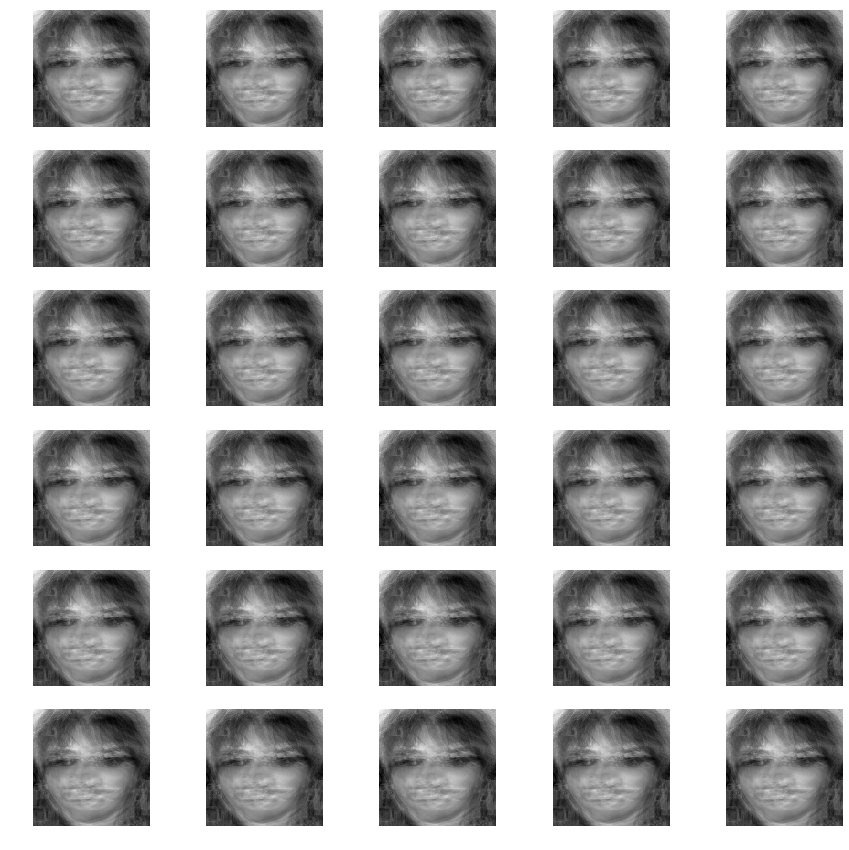

In [124]:
test_image_gray = test_image 
test_image_gray = cv2.cvtColor(test_image_gray, cv2.COLOR_BGR2GRAY)
test_average_face = average_face 

test_new_matrix = new_matrix
print(test_new_matrix.shape)
print(image.shape)

# Normalize the training set 
new_image_vector_list = []
for image_vector in image_vector_list: 
    image_vector = np.subtract(image_vector, average_face).ravel()
    new_image_vector_list.append(image_vector)


# Create a sliding window to extract small portion of image from the test image 
def slidingWindow(image, stepSize, windowSize, test_new_matrix):
    h = image.shape[0]
    w = image.shape[1]
    y1 = windowSize[0]
    x1 = windowSize[1]
    
    reconstruction_term = [] 
    # define window size and step size 
    for y in range (0, h, stepSize): 
        for x in range (0, w, stepSize):
    
            # Extract image
            window_image = image[y:y + y1, x: x + x1]
            window_image = cv2.resize(window_image, (y1, x1))
            window_image = np.reshape(window_image, (1, -1))
            window_image = np.subtract(window_image, test_average_face).ravel() 
            
            # Reconstruction 
            reconstruction_value = 0
            for i in range (len(new_matrix[1])):
                value = np.dot(window_image, new_matrix[:,i])
                reconstruction_value += value*new_matrix[:,i]
                reconstruction_term.append(reconstruction_value)
#             # Reconstruction 
#             reconstruction_term = []
#             for i in range(len(new_matrix[0])): 
#                 test_new_matrix[i] = test_new_matrix[i].ravel()
#                 print(test_new_matrix[i].shape)

#                 reconstruction_term = np.dot(image, test_new_matrix[i])

#             reconstruction_value = 0
#             for j in range(len(new_matrix[1])):
#                 reconstruction_value += reconstruction_term[i]*new_matrix[j]

#             reconstruction_value += test_average_face

            print("reconstruct ", reconstruction_value)
   
    return reconstruction_term 
#             yield (y, x, image)
            
stepSize = 5
windowSize = [128, 128]
threshold = 100
# Extract window from test image 
reconstruction_term = slidingWindow(test_image_gray, stepSize, windowSize, test_new_matrix)            


# Display average faces 
plt.figure(figsize=(15,15))
for i in range (1, len(reconstruction_term)): 
    plt.subplot(6, 5, i) 
    plt.axis('off')
    plt.imshow(reconstruction_term[i].reshape(128, 128), cmap='gray')    
# TODO: compare the eigenspace face with the mean face 
# OR: comapre W with weight vectors Wm of images in the database, find euclidean distance 
#  ref: wiki

#### 2 For the windows in which a face is correctly detected, project the contents of the window to your eigenspace and find the nearest neighbour from your data. The identity of the detected face will be based on the identity of the closest person in the training set

#### 3 How well does the method work? How many false positive face detections do you get?

#### 4 For mis-identified faces, report the number of neighbours you need before getting the correct label (correct identification would use 1)

#### 5 In which situations would expect the approach to fail, and what could you do to improve it?